In [56]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from collections import Counter
import math



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [224]:
#Reading the data
query=pd.read_json("C:\\Users\\lenovo\\Desktop\\IR\\Assignment\\assignment 5\\cran.qry.json")
doc=pd.read_json("C:\\Users\\lenovo\\Desktop\\IR\\Assignment\\assignment 5\\cranfield_data.json",lines=False)
relv=pd.read_json("C:\\Users\\lenovo\\Desktop\\IR\\Assignment\\assignment 5\\cranqrel.json")

In [241]:
query.head()

query number                                              query
0             1  what similarity laws must be obeyed when const...
1             2  what are the structural and aeroelastic proble...
2             3  what problems of heat conduction in composite ...
3             4  can a criterion be developed to show empirical...
4             5  what chemical kinetic system is applicable to ...

In [240]:
query = query[["query number","query"]]

In [226]:
doc.head()

author                                       bibliography  \
0   brenckman,m.                         j. ae. scs. 25, 1958, 324.   
1      ting-yili  department of aeronautical engineering, rensse...   
2  m. b. glauert  department of mathematics, university of manch...   
3       yen,k.t.                         j. ae. scs. 22, 1955, 728.   
4   wasserman,b.                         j. ae. scs. 24, 1957, 924.   

                                                body  id  \
0  experimental investigation of the aerodynamics...   1   
1  simple shear flow past a flat plate in an inco...   2   
2  the boundary layer in simple shear flow past a...   3   
3  approximate solutions of the incompressible la...   4   
4  one-dimensional transient heat conduction into...   5   

                                               title  
0  experimental investigation of the aerodynamics...  
1  simple shear flow past a flat plate in an inco...  
2  the boundary layer in simple shear flow past a...  
3  approximate solutions of the incompressible la...  
4  one-dimensional transient heat conduction into...

In [16]:
relv.head()

id  position  query_num
0  184         2          1
1   29         2          1
2   31         2          1
3   12         3          1
4   51         3          1

In [19]:
relv.position.unique()

array([2, 3, 4, 1], dtype=int64)

In [21]:
relv.describe()

id     position    query_num
count  1837.000000  1837.000000  1837.000000
mean    685.481764     2.602613   115.876429
std     372.478375     1.009731    68.639514
min       2.000000     1.000000     1.000000
25%     406.000000     2.000000    56.000000
50%     687.000000     3.000000   115.000000
75%     967.000000     3.000000   180.000000
max    1400.000000     4.000000   225.000000

In [22]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 5 columns):
author          1400 non-null object
bibliography    1400 non-null object
body            1400 non-null object
id              1400 non-null int64
title           1400 non-null object
dtypes: int64(1), object(4)
memory usage: 54.8+ KB


In [24]:
doc=doc.drop(columns=["bibliography","author","title"])

In [227]:
doc=doc[["id","body"]]

In [228]:
doc.sample(5)

id                                               body
465    466  development of the vapour screen method of flo...
804    805  ground measurements of the shock wave noise fr...
461    462  photo-thermoelasticity .   this paper summariz...
1350  1351  exploratory tests of the effects of jet plumes...
689    690  investigaion of the flow over a spiked-nose he...

# Q3 Language Model Implementation 

## Q3.a)

In [397]:
def JM_Score(query,doc,lamda):
    
    q_token=word_tokenize(query) #query tokenize
    doc_token=word_tokenize(doc) #document tokeinze
    
    stop_words=stopwords.words('english')
    q_list = {i for i in q_token if not i in stop_words}
    d_list = {i for i in doc_token if not i in stop_words}
    #print("q_list",q_list)
    #print("d_lsit",d_list)
    
    vocab = q_list.union(d_list)
    q_tf = [0]*len(vocab)
    d_tf = [0]*len(vocab)
    
    
    #counting frequency 
    index=0
    for word in vocab:
        if word in q_list:
            q_tf[index] = q_token.count(word)   #c(w,Q)
        if word in d_list:
            d_tf[index] = doc_token.count(word)   #c(w,D)
        index+=1
        
    #print("vocab",vocab,len(vocab),"\n")  
    #print("q_tf ",q_tf,"\n")
    #print("d_tf",d_tf,"\n")
    P_ref = 0.01
    #print("len_d_list",len(d_list))
    # now substituting value Jm formula 
    JM_score=0
    test_count=0
    for i in range(len(vocab)):
        numerator = float((1-lamda) * d_tf[i] )  # (1-lamda)*c(w,D)
        denominator= float((lamda+0.00001)*P_ref*len(d_list))
        frac = ( numerator/denominator )if denominator != 0 else 0.001
        JM_score+= q_tf[i]*math.log(1+frac)
     
    #print("JM",JM_score)
    return JM_score

In [371]:
a = 8
b = 0
c = ( a / b ) if b != 0 else 1
print(c)

1


In [388]:
JM_Score(query.iloc[0,1],doc.iloc[0,1],0.00009)

vocab {'free', 'found', 'effects', 'laws', 'different', 'empirical', 'due', 'obeyed', 'configuration', 'evidence', 'study', 'increment', 'flow', 'slipstream', 'similarity', 'aerodynamics', 'order', 'models', 'determine', 'destalling', 'well', 'high', '/destalling/', 'distribution', 'stream', 'potential', 'specific', 'theory', 'evaluation', 'heated', 'speed', 'produced', 'increase', 'together', 'span', 'comparative', 'part', 'remaining', 'constructing', 'investigation', 'boundary-layer-control', 'agree', 'theoretical', 'ratios', 'showed', 'integrated', 'aircraft', 'lift', 'substantial', 'aeroelastic', 'experimental', 'treatments', 'wing', '.', 'problem', 'made', ',', 'basis', 'results', 'propeller', 'must', 'supporting', 'angles', 'velocity', 'effect', 'intended', 'loading', 'subtracting', 'spanwise', 'curves', 'experiment', 'attack'} 72 

q_tf  [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0

11.496316326498834

In [335]:
def DP_Score(query, doc, mu):
    q_token=word_tokenize(query) #query tokenize
    doc_token=word_tokenize(doc) #document tokeinze
    
    stop_words=stopwords.words('english')
    q_list = {i for i in q_token if not i in stop_words}
    d_list = {i for i in doc_token if not i in stop_words}
    #print("q_list",q_list)
    #print("d_lsit",d_list)
    
    vocab = q_list.union(d_list)
    q_tf = [0]*len(vocab)
    d_tf = [0]*len(vocab)
    #print("Vocab",vocab)
    
    #counting frequency 
    index=0
    for word in vocab:
        if word in q_list:
            q_tf[index] = q_token.count(word)   #c(w,Q)
        if word in d_list:
            d_tf[index] = doc_token.count(word)   #c(w,D)
        index+=1
        
    #print("q_tf",q_tf)
    #print("d_tf",d_tf)
    P_ref = 0.01
    #print("len_d_list",len(d_list))
    # now substituting value DP formula
    DP_score=0
    P_ref=0.01
    for i in range(len(vocab)):
        numerator = d_tf[i]
        denominator = mu*P_ref
        frac=float(numerator/denominator)
        doc_normalization=len(q_list)*math.log(len(d_list) + mu)
        DP_score += q_tf[i]*math.log(1+frac)-doc_normalization
        
    return DP_score

In [244]:
DP_Score(query.iloc[0,1],doc.iloc[0,1],100)

-4388.387461197518

In [364]:
JM_Score(query.iloc[0,1],doc.iloc[0,1],0.000005)

q_tf [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d_tf [1, 1, 1, 0, 3, 1, 2, 0, 1, 1, 1, 2, 1, 5, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 4, 1, 0, 2, 1, 3, 6, 1, 2, 4, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


13.393512672898861

# Q3.b)


### i)

In [361]:
# JM 
print(len(query))
print(len(doc))
query.head()

226
1400


query number                                              query
0             1  what similarity laws must be obeyed when const...
1             2  what are the structural and aeroelastic proble...
2             3  what problems of heat conduction in composite ...
3             4  can a criterion be developed to show empirical...
4             5  what chemical kinetic system is applicable to ...

In [436]:
#Setting lamda ~ 0

for que in range(len(query)):
    x, y = (len(doc), 2) 
    jm_s = [[0]*y]*x
    score_0=[]
    for docs in range(len(doc)):
        #print(doc.iloc[d,1])
        print("i,j",que,docs)
        jm_s[docs][0] = doc.iloc[docs,0]
        jm_s[docs][1] = print(JM_Score(query.iloc[que,1],doc.iloc[docs,1],0.00))
        score_0.append(JM_Score(query.iloc[que,1],doc.iloc[docs,1],0.00))

    

i,j 0 0
13.798982272679213
i,j 0 1
26.013424450802596
i,j 0 2
14.038654909278163
i,j 0 3
13.949042825588414
i,j 0 4
13.815511557963774
i,j 0 5
13.284884006900658
i,j 0 6
12.879419748790689
i,j 0 7
13.299699067685841
i,j 0 8
13.929455709620786
i,j 0 9
14.081214490363653
i,j 0 10
13.738550596827562
i,j 0 11
63.2870303254072
i,j 0 12
51.919501325738786
i,j 0 13
47.29804374593507
i,j 0 14
13.7509731034928
i,j 0 15
13.705163617461452
i,j 0 16
13.537880141365124
i,j 0 17
14.347390178427924
i,j 0 18
26.244731754800156
i,j 0 19
25.720006892509545
i,j 0 20
13.849413076306154
i,j 0 21
13.720201478159344
i,j 0 22
13.776290884810452
i,j 0 23
36.90199018976077
i,j 0 24
37.299083513221056
i,j 0 25
13.884504362784122
i,j 0 26
25.993419183652243
i,j 0 27
25.833334339730552
i,j 0 28
37.78466821522851
i,j 0 29
13.667091712845329
i,j 0 30
14.326336781730085
i,j 0 31
25.80279950975402
i,j 0 32
25.768993800851792
i,j 0 33
37.03771998130534
i,j 0 34
25.87662508322078
i,j 0 35
37.47021417340117
i,j 0 36
13.7

i,j 0 296
26.28208707467934
i,j 0 297
14.038654909278163
i,j 0 298
14.377630046117654
i,j 0 299
25.857111377784058
i,j 0 300
13.782721768474083
i,j 0 301
37.63111669275117
i,j 0 302
13.654243585367462
i,j 0 303
24.943564400237197
i,j 0 304
14.326336781730085
i,j 0 305
14.154486637303352
i,j 0 306
13.801326937257517
i,j 0 307
13.53409942352521
i,j 0 308
38.00920724558167
i,j 0 309
14.372856770092266
i,j 0 310
37.07070488071973
i,j 0 311
13.122365377402328
i,j 0 312
13.849413076306154
i,j 0 313
25.125503928911783
i,j 0 314
37.22909588069581
i,j 0 315
26.897054857512845
i,j 0 316
13.856333512484069
i,j 0 317
14.158001576910799
i,j 0 318
13.720201478159344
i,j 0 319
14.172186201902761
i,j 0 320
13.68448343555722
i,j 0 321
13.920871973621695
i,j 0 322
13.6331902011696
i,j 0 323
13.661361044803002
i,j 0 324
13.246417792739415
i,j 0 325
13.997832948091215
i,j 0 326
27.198700228649244
i,j 0 327
25.13370634605046
i,j 0 328
47.31302224858441
i,j 0 329
13.738550596827562
i,j 0 330
14.013962316687

13.675749765588455
i,j 0 583
26.204139529257098
i,j 0 584
13.939564089967195
i,j 0 585
13.898893086902902
i,j 0 586
13.90252285162015
i,j 0 587
25.58647797605194
i,j 0 588
25.561513445406405
i,j 0 589
13.720201478159344
i,j 0 590
26.897055274178207
i,j 0 591
26.054111895189724
i,j 0 592
39.471899570428555
i,j 0 593
13.815511557963774
i,j 0 594
14.001840966155424
i,j 0 595
13.920871973621695
i,j 0 596
13.720201478159344
i,j 0 597
13.782721768474083
i,j 0 598
13.661361044803002
i,j 0 599
13.77354740172184
i,j 0 600
25.55117361098181
i,j 0 601
13.889619458688994
i,j 0 602
37.321457146174595
i,j 0 603
14.39532961321706
i,j 0 604
13.690348548342959
i,j 0 605
38.69430012789043
i,j 0 606
13.884504362784122
i,j 0 607
14.0035636180383
i,j 0 608
13.579123046565908
i,j 0 609
14.054403253746313
i,j 0 610
13.38372968153755
i,j 0 611
13.966334307698489
i,j 0 612
14.103193380415775
i,j 0 613
14.005132244512225
i,j 0 614
26.524823915125822
i,j 0 615
13.866804802351373
i,j 0 616
13.410046949854985
i,j 

i,j 0 889
13.832318659613506
i,j 0 890
13.733273545440998
i,j 0 891
13.74319097138407
i,j 0 892
13.720201478159344
i,j 0 893
25.70086588632673
i,j 0 894
13.989864785108699
i,j 0 895
13.898893086902902
i,j 0 896
13.6331902011696
i,j 0 897
14.246294124056517
i,j 0 898
14.011255957312253
i,j 0 899
13.949042825588414
i,j 0 900
13.522842284000557
i,j 0 901
13.932045264219829
i,j 0 902
25.634477052195464
i,j 0 903
26.129398526106087
i,j 0 904
14.059708301809343
i,j 0 905
14.00788327561139
i,j 0 906
13.7935326734672
i,j 0 907
37.01895222168842
i,j 0 908
26.341792867645736
i,j 0 909
14.125666219601179
i,j 0 910
25.867667601207025
i,j 0 911
13.880050016601405
i,j 0 912
13.68448343555722
i,j 0 913
38.93860977409222
i,j 0 914
13.720201478159344
i,j 0 915
25.656749811149318
i,j 0 916
36.299852639600324
i,j 0 917
13.515407315513025
i,j 0 918
25.798447985485097
i,j 0 919
14.038654909278163
i,j 0 920
13.778697622341019
i,j 0 921
13.866804802351373
i,j 0 922
25.80279950975402
i,j 0 923
25.227437879118

i,j 0 1182
13.361256860685437
i,j 0 1183
26.358061154388622
i,j 0 1184
13.905123630939258
i,j 0 1185
26.823358575256805
i,j 0 1186
13.667091712845329
i,j 0 1187
13.828090327670646
i,j 0 1188
14.059708301809343
i,j 0 1189
14.020955346464465
i,j 0 1190
26.645741083992313
i,j 0 1191
13.738550596827562
i,j 0 1192
14.29354697890708
i,j 0 1193
13.997832948091215
i,j 0 1194
25.12550684554867
i,j 0 1195
14.172186201902761
i,j 0 1196
26.499354290019518
i,j 0 1197
13.776290884810452
i,j 0 1198
13.997832948091215
i,j 0 1199
13.949042825588414
i,j 0 1200
13.913491872990733
i,j 0 1201
25.49256454558533
i,j 0 1202
25.573979721678533
i,j 0 1203
13.823233596365384
i,j 0 1204
13.994203183070937
i,j 0 1205
13.874352000843906
i,j 0 1206
13.94587325360491
i,j 0 1207
13.87738690168192
i,j 0 1208
13.891019037744716
i,j 0 1209
14.075022524877632
i,j 0 1210
13.720201478159344
i,j 0 1211
14.196283736815166
i,j 0 1212
25.634477052195464
i,j 0 1213
13.61939689570391
i,j 0 1214
13.553147593495938
i,j 0 1215
13.82

i,j 1 63
14.345028903631134
i,j 1 64
13.76672144379429
i,j 1 65
13.884504362784122
i,j 1 66
38.74990515059022
i,j 1 67
13.757242709839737
i,j 1 68
38.92216958811524
i,j 1 69
25.685118966848236
i,j 1 70
13.840829340948089
i,j 1 71
14.13218089586047
i,j 1 72
25.304733096234948
i,j 1 73
13.920871973621695
i,j 1 74
38.17910598238063
i,j 1 75
37.59563421933553
i,j 1 76
27.132787329096544
i,j 1 77
48.58248149506807
i,j 1 78
26.024038084892652
i,j 1 79
13.730353838512263
i,j 1 80
13.720201478159344
i,j 1 81
49.914769188706465
i,j 1 82
25.377424485131463
i,j 1 83
14.076876092098384
i,j 1 84
25.469943224076594
i,j 1 85
14.120000486232165
i,j 1 86
13.649997299486005
i,j 1 87
13.649997299486005
i,j 1 88
13.84536449170172
i,j 1 89
14.081214490363653
i,j 1 90
13.705163617461452
i,j 1 91
26.675128699458263
i,j 1 92
13.720201478159344
i,j 1 93
13.82220053944791
i,j 1 94
14.125666219601179
i,j 1 95
25.957050015681318
i,j 1 96
25.70531997417777
i,j 1 97
14.038654909278163
i,j 1 98
25.300278003038297
i,

i,j 1 367
27.546854529403568
i,j 1 368
25.526343155104797
i,j 1 369
25.55158857421621
i,j 1 370
13.396801743104934
i,j 1 371
13.898893086902902
i,j 1 372
36.963998538412525
i,j 1 373
49.84006703403057
i,j 1 374
13.410046949854985
i,j 1 375
14.14401534493605
i,j 1 376
13.849413076306154
i,j 1 377
39.52097666536616
i,j 1 378
25.59136788424057
i,j 1 379
25.867667601207025
i,j 1 380
13.825561883817285
i,j 1 381
13.815511557963774
i,j 1 382
13.553147593495938
i,j 1 383
13.815511557963774
i,j 1 384
13.884504362784122
i,j 1 385
13.74319097138407
i,j 1 386
14.038654909278163
i,j 1 387
14.02486159825693
i,j 1 388
13.997832948091215
i,j 1 389
25.773689234368092
i,j 1 390
25.62388880598477
i,j 1 391
13.790818970373378
i,j 1 392
14.038654909278163
i,j 1 393
13.410046949854985
i,j 1 394
36.73371809489992
i,j 1 395
13.605791260314778
i,j 1 396
14.151983508870947
i,j 1 397
26.600215797273798
i,j 1 398
13.553147593495938
i,j 1 399
13.690348548342959
i,j 1 400
36.4333839125821
i,j 1 401
14.018035638742

i,j 1 659
25.12859041462614
i,j 1 660
13.754886998647274
i,j 1 661
13.479039721342081
i,j 1 662
26.557486579092732
i,j 1 663
13.949042825588414
i,j 1 664
26.229534582922298
i,j 1 665
26.06122205843338
i,j 1 666
14.00788327561139
i,j 1 667
13.87738690168192
i,j 1 668
14.14401534493605
i,j 1 669
26.49159058273628
i,j 1 670
25.57178928154957
i,j 1 671
38.883293914410125
i,j 1 672
25.163557433153173
i,j 1 673
25.527870727610097
i,j 1 674
25.656947289887817
i,j 1 675
13.893473024433558
i,j 1 676
25.059116179987413
i,j 1 677
13.720201478159344
i,j 1 678
25.601190911505125
i,j 1 679
13.969662094934023
i,j 1 680
25.830969443870067
i,j 1 681
13.908601892140982
i,j 1 682
25.452197170326055
i,j 1 683
26.69101785743164
i,j 1 684
25.598595247370874
i,j 1 685
25.875638933687803
i,j 1 686
27.44592784891728
i,j 1 687
13.489296207223576
i,j 1 688
13.304686600863562
i,j 1 689
13.53409942352521
i,j 1 690
13.227725693060535
i,j 1 691
13.815511557963774
i,j 1 692
13.493428438794208
i,j 1 693
13.90707866398

13.992845410746838
i,j 1 964
13.6331902011696
i,j 1 965
14.058072979750662
i,j 1 966
13.884504362784122
i,j 1 967
26.917257856496093
i,j 1 968
26.702311239052673
i,j 1 969
14.172186201902761
i,j 1 970
13.776290884810452
i,j 1 971
13.605791260314778
i,j 1 972
13.675749765588455
i,j 1 973
14.172186201902761
i,j 1 974
13.73163016148298
i,j 1 975
24.473188192756023
i,j 1 976
14.097151070505262
i,j 1 977
13.815511557963774
i,j 1 978
13.345508528717259
i,j 1 979
26.413150173092305
i,j 1 980
25.57178928154957
i,j 1 981
38.04280557766715
i,j 1 982
26.145339650919134
i,j 1 983
14.059708301809343
i,j 1 984
13.801326937257517
i,j 1 985
36.527164312459576
i,j 1 986
13.651882311959556
i,j 1 987
13.697728647307258
i,j 1 988
13.787340709568477
i,j 1 989
25.40662196397448
i,j 1 990
25.595743885847014
i,j 1 991
13.515407315513025
i,j 1 992
13.978030337461687
i,j 1 993
13.969662094934023
i,j 1 994
0.008995502997750808
i,j 1 995
13.972696996031775
i,j 1 996
38.13688558884076
i,j 1 997
13.920871973621695


i,j 1 1244
14.39258612880977
i,j 1 1245
36.364835888736096
i,j 1 1246
25.685118966848236
i,j 1 1247
24.660238683801914
i,j 1 1248
13.893473024433558
i,j 1 1249
13.858071130715944
i,j 1 1250
13.933294482509151
i,j 1 1251
13.844499066265627
i,j 1 1252
13.835714245281313
i,j 1 1253
13.6331902011696
i,j 1 1254
25.654174712994482
i,j 1 1255
13.997832948091215
i,j 1 1256
13.829900281130174
i,j 1 1257
13.44394845153074
i,j 1 1258
13.963431550540525
i,j 1 1259
13.90252285162015
i,j 1 1260
13.570389377708251
i,j 1 1261
13.68448343555722
i,j 1 1262
49.51803247740728
i,j 1 1263
14.061644409321058
i,j 1 1264
25.96521053670091
i,j 1 1265
14.103193380415775
i,j 1 1266
13.579123046565908
i,j 1 1267
13.966334307698487
i,j 1 1268
14.298937824208627
i,j 1 1269
26.69101785743164
i,j 1 1270
37.20156989390235
i,j 1 1271
13.856333512484069
i,j 1 1272
13.829900281130174
i,j 1 1273
14.028292130575943
i,j 1 1274
13.943344809473771
i,j 1 1275
12.860001712933459
i,j 1 1276
25.39423124675727
i,j 1 1277
14.1962837

13.564197415396826
i,j 2 138
13.832318659613506
i,j 2 139
13.695710485423746
i,j 2 140
13.702182992656644
i,j 2 141
25.59136788424057
i,j 2 142
14.208553821073654
i,j 2 143
52.92332769222702
i,j 2 144
27.473663513492404
i,j 2 145
13.805561237110595
i,j 2 146
13.803089050465204
i,j 2 147
13.057826989597816
i,j 2 148
25.13782776326475
i,j 2 149
14.33924017887369
i,j 2 150
13.840829340948089
i,j 2 151
13.697728647307258
i,j 2 152
13.515407315513025
i,j 2 153
13.432519772373759
i,j 2 154
14.194409323302867
i,j 2 155
13.778697622341019
i,j 2 156
14.25734395310025
i,j 2 157
25.59136788424057
i,j 2 158
38.17910598238063
i,j 2 159
14.269641473053518
i,j 2 160
14.116616390747922
i,j 2 161
13.978030337461687
i,j 2 162
24.796906607468607
i,j 2 163
24.94572625626197
i,j 2 164
14.030872775086104
i,j 2 165
13.933294482509151
i,j 2 166
13.832318659613506
i,j 2 167
36.723721188336185
i,j 2 168
37.263946463873594
i,j 2 169
14.027355363115133
i,j 2 170
13.073575313232691
i,j 2 171
26.53549492456025
i,j 

i,j 2 430
14.023150735242188
i,j 2 431
25.4779609654683
i,j 2 432
13.699439509787812
i,j 2 433
13.654243585367462
i,j 2 434
25.073287408815155
i,j 2 435
27.034938398209768
i,j 2 436
26.659706133861107
i,j 2 437
26.147151676460425
i,j 2 438
25.474626933085943
i,j 2 439
13.388068076469493
i,j 2 440
13.667091712845329
i,j 2 441
13.943344809473771
i,j 2 442
13.815511557963774
i,j 2 443
14.125666219601179
i,j 2 444
26.295367245769157
i,j 2 445
13.884504362784122
i,j 2 446
13.856333512484069
i,j 2 447
13.787340709568477
i,j 2 448
13.795708950667574
i,j 2 449
13.866804802351373
i,j 2 450
26.511793915051193
i,j 2 451
25.937249655037256
i,j 2 452
13.782721768474083
i,j 2 453
13.645166377930618
i,j 2 454
13.6331902011696
i,j 2 455
13.675749765588455
i,j 2 456
14.112762824289073
i,j 2 457
25.510768413011444
i,j 2 458
25.119728202223797
i,j 2 459
13.856333512484069
i,j 2 460
13.654243585367462
i,j 2 461
25.41982921804155
i,j 2 462
37.99678460558649
i,j 2 463
13.866804802351373
i,j 2 464
13.5154073

25.606969727563296
i,j 2 731
25.745813591071034
i,j 2 732
26.62535053541555
i,j 2 733
13.720201478159344
i,j 2 734
13.6331902011696
i,j 2 735
13.866804802351373
i,j 2 736
13.966334307698489
i,j 2 737
14.11062835334774
i,j 2 738
13.895554188714307
i,j 2 739
13.720201478159344
i,j 2 740
14.125666219601179
i,j 2 741
13.553147593495938
i,j 2 742
13.702182992656644
i,j 2 743
14.227245941585814
i,j 2 744
14.208553821073654
i,j 2 745
26.975232555243615
i,j 2 746
13.866804802351373
i,j 2 747
13.920871973621695
i,j 2 748
13.997832948091215
i,j 2 749
13.74319097138407
i,j 2 750
13.849413076306154
i,j 2 751
14.038654909278163
i,j 2 752
13.951643605015747
i,j 2 753
26.812504016156698
i,j 2 754
13.720201478159344
i,j 2 755
14.06397269726247
i,j 2 756
13.953132807268513
i,j 2 757
13.497058201844794
i,j 2 758
13.920871973621695
i,j 2 759
13.893473024433558
i,j 2 760
13.840829340948089
i,j 2 761
13.874352000843906
i,j 2 762
13.74319097138407
i,j 2 763
13.992845410746838
i,j 2 764
13.920871973621695
i,

i,j 2 1019
13.936872300682435
i,j 2 1020
14.413348108719743
i,j 2 1021
13.920871973621695
i,j 2 1022
13.884504362784122
i,j 2 1023
13.815511557963774
i,j 2 1024
13.958612268271239
i,j 2 1025
14.172186201902761
i,j 2 1026
13.776290884810452
i,j 2 1027
13.74651875790532
i,j 2 1028
27.51324033027076
i,j 2 1029
26.897055274178207
i,j 2 1030
13.667091712845329
i,j 2 1031
25.943148017173826
i,j 2 1032
13.612570938966833
i,j 2 1033
13.989864785108699
i,j 2 1034
25.456153028637374
i,j 2 1035
14.0035636180383
i,j 2 1036
13.675749765588455
i,j 2 1037
13.432519772373759
i,j 2 1038
13.900871325096828
i,j 2 1039
26.344871479073163
i,j 2 1040
13.60040041834656
i,j 2 1041
26.958079442684163
i,j 2 1042
25.774731925530602
i,j 2 1043
13.936872300682435
i,j 2 1044
14.103193380415775
i,j 2 1045
13.920871973621695
i,j 2 1046
25.52674364671828
i,j 2 1047
13.920871973621695
i,j 2 1048
14.172186201902761
i,j 2 1049
13.949042825588414
i,j 2 1050
14.061644409321058
i,j 2 1051
25.681908460917363
i,j 2 1052
26.19

i,j 2 1313
13.949042825588414
i,j 2 1314
13.25589652002732
i,j 2 1315
14.038654909278163
i,j 2 1316
14.081214490363653
i,j 2 1317
13.866804802351373
i,j 2 1318
13.951643605015747
i,j 2 1319
13.815511557963774
i,j 2 1320
14.15044623065096
i,j 2 1321
13.52071236059987
i,j 2 1322
13.304686600863562
i,j 2 1323
13.997832948091215
i,j 2 1324
13.758816272620502
i,j 2 1325
14.201173718776028
i,j 2 1326
14.02486159825693
i,j 2 1327
27.90480203821056
i,j 2 1328
13.77354740172184
i,j 2 1329
25.495209360769863
i,j 2 1330
13.720201478159344
i,j 2 1331
13.44394845153074
i,j 2 1332
13.966334307698489
i,j 2 1333
13.537880141365124
i,j 2 1334
25.406947926051902
i,j 2 1335
13.74319097138407
i,j 2 1336
13.934858203096447
i,j 2 1337
13.479039721342081
i,j 2 1338
13.64366148853691
i,j 2 1339
14.103193380415775
i,j 2 1340
13.853732733284009
i,j 2 1341
13.68448343555722
i,j 2 1342
13.978030337461687
i,j 2 1343
13.997832948091215
i,j 2 1344
25.867667601207025
i,j 2 1345
26.179153998032106
i,j 2 1346
13.872669

25.048547787721752
i,j 3 202
26.455452286117424
i,j 3 203
25.36649295720902
i,j 3 204
26.28208707467934
i,j 3 205
26.85744966125373
i,j 3 206
37.48128009138917
i,j 3 207
40.08407993558153
i,j 3 208
25.420485101185903
i,j 3 209
13.905123630939258
i,j 3 210
26.937876935366102
i,j 3 211
47.97838823239749
i,j 3 212
38.51957981666111
i,j 3 213
25.830969443870067
i,j 3 214
26.22411213426578
i,j 3 215
26.955806063615434
i,j 3 216
40.54622262153703
i,j 3 217
25.116913093192743
i,j 3 218
25.243187178934072
i,j 3 219
13.675749765588455
i,j 3 220
26.82009464970744
i,j 3 221
27.631023115927547
i,j 3 222
13.675749765588455
i,j 3 223
26.69101785743164
i,j 3 224
36.2806046183147
i,j 3 225
13.949042825588414
i,j 3 226
26.777791770018595
i,j 3 227
39.55560042223713
i,j 3 228
25.524730842263963
i,j 3 229
60.398218790055395
i,j 3 230
38.98547111356807
i,j 3 231
25.64452656987477
i,j 3 232
13.87738690168192
i,j 3 233
36.96429641270574
i,j 3 234
13.936872300682435
i,j 3 235
64.77298593003945
i,j 3 236
37.5

i,j 3 495
50.23482674875232
i,j 3 496
48.941232778495234
i,j 3 497
39.662560641962926
i,j 3 498
36.97123002569198
i,j 3 499
38.63488184015208
i,j 3 500
26.403336051646274
i,j 3 501
14.172186201902761
i,j 3 502
25.830969443870067
i,j 3 503
25.64452656987477
i,j 3 504
13.76672144379429
i,j 3 505
14.0035636180383
i,j 3 506
27.51324033027076
i,j 3 507
50.27686228190056
i,j 3 508
13.720201478159344
i,j 3 509
13.920871973621695
i,j 3 510
38.13372128615484
i,j 3 511
13.815511557963774
i,j 3 512
13.461340169242645
i,j 3 513
26.414629541600398
i,j 3 514
13.815511557963774
i,j 3 515
13.776290884810452
i,j 3 516
50.68124514939356
i,j 3 517
37.81745526682623
i,j 3 518
14.038654909278163
i,j 3 519
14.139750949226514
i,j 3 520
38.13688501384324
i,j 3 521
38.10559665898181
i,j 3 522
40.402413025047885
i,j 3 523
26.917257564830322
i,j 3 524
27.174956449537365
i,j 3 525
39.662294457071624
i,j 3 526
38.98141948152164
i,j 3 527
50.4974198431157
i,j 3 528
37.600452270250656
i,j 3 529
39.277714671061695
i,

36.415264728553694
i,j 3 799
37.44154462363759
i,j 3 800
25.2390619117661
i,j 3 801
38.86140381767925
i,j 3 802
40.20504795272848
i,j 3 803
13.801326937257517
i,j 3 804
14.005132244512225
i,j 3 805
13.9098221474351
i,j 3 806
13.6331902011696
i,j 3 807
25.595743885847014
i,j 3 808
14.038654909278163
i,j 3 809
13.94587325360491
i,j 3 810
25.311288787200546
i,j 3 811
25.602223965186397
i,j 3 812
26.204139529257098
i,j 3 813
49.98359194014442
i,j 3 814
36.82739907238414
i,j 3 815
37.40057586257193
i,j 3 816
26.22411213426578
i,j 3 817
26.59819627780237
i,j 3 818
39.30431062410173
i,j 3 819
63.48318975222319
i,j 3 820
13.6331902011696
i,j 3 821
25.272066039455414
i,j 3 822
39.15948968751465
i,j 3 823
25.66937149876159
i,j 3 824
36.66657702341988
i,j 3 825
36.76376295786386
i,j 3 826
38.93530868891702
i,j 3 827
25.606969727563296
i,j 3 828
37.44154462363759
i,j 3 829
37.11951966447642
i,j 3 830
27.093799793305887
i,j 3 831
14.172186201902761
i,j 3 832
13.612570938966833
i,j 3 833
13.92087197

i,j 3 1083
27.5902012047405
i,j 3 1084
78.0353321411534
i,j 3 1085
26.97765852537545
i,j 3 1086
25.9418548854589
i,j 3 1087
14.028292130575943
i,j 3 1088
13.393517672903736
i,j 3 1089
14.103193380415775
i,j 3 1090
13.649997299486005
i,j 3 1091
36.422099810646344
i,j 3 1092
25.67752693092814
i,j 3 1093
13.849413076306154
i,j 3 1094
13.605791260314778
i,j 3 1095
13.697728647307258
i,j 3 1096
14.183236030397044
i,j 3 1097
13.874352000843906
i,j 3 1098
13.978030337461687
i,j 3 1099
37.78240859363549
i,j 3 1100
25.83885119180252
i,j 3 1101
13.958612268271239
i,j 3 1102
13.36656190458181
i,j 3 1103
48.1796237736213
i,j 3 1104
51.15551801858691
i,j 3 1105
27.323328719924383
i,j 3 1106
50.527813892416354
i,j 3 1107
39.172357455378176
i,j 3 1108
50.162753043406596
i,j 3 1109
38.884116474395405
i,j 3 1110
13.690348548342959
i,j 3 1111
38.76314786377081
i,j 3 1112
25.58894329410205
i,j 3 1113
13.933294482509151
i,j 3 1114
13.782721768474083
i,j 3 1115
26.650196529575265
i,j 3 1116
13.592368256649

i,j 3 1378
13.939564089967195
i,j 3 1379
13.832318659613506
i,j 3 1380
25.0656986919751
i,j 3 1381
25.36885221752104
i,j 3 1382
37.95222184752998
i,j 3 1383
26.378262647426553
i,j 3 1384
37.44154462363759
i,j 3 1385
50.88358578166274
i,j 3 1386
25.344429721057896
i,j 3 1387
26.188351941361546
i,j 3 1388
14.137094907091473
i,j 3 1389
38.61637584723417
i,j 3 1390
61.798712412301605
i,j 3 1391
13.661361044803002
i,j 3 1392
50.891833691029206
i,j 3 1393
39.257096058854074
i,j 3 1394
25.880089641208507
i,j 3 1395
13.592368256649284
i,j 3 1396
13.893473024433558
i,j 3 1397
14.215988794561175
i,j 3 1398
13.997832948091215
i,j 3 1399
13.898893086902902
i,j 4 0
13.798982272679213
i,j 4 1
26.706568081381448
i,j 4 2
14.038654909278163
i,j 4 3
13.949042825588414
i,j 4 4
26.53241282725544
i,j 4 5
13.284884006900658
i,j 4 6
12.879419748790689
i,j 4 7
13.299699067685841
i,j 4 8
25.987114150015866
i,j 4 9
14.081214490363653
i,j 4 10
26.560812081777907
i,j 4 11
25.927839766576444
i,j 4 12
25.7247501532

i,j 4 271
36.889844284531144
i,j 4 272
13.835714245281313
i,j 4 273
25.069165424945382
i,j 4 274
14.020955346464465
i,j 4 275
13.579123046565908
i,j 4 276
25.272066039455414
i,j 4 277
13.829900281130174
i,j 4 278
13.572565654353072
i,j 4 279
13.920871973621695
i,j 4 280
14.081214490363653
i,j 4 281
14.01618207160791
i,j 4 282
13.697728647307258
i,j 4 283
13.87738690168192
i,j 4 284
27.030815306024
i,j 4 285
13.720201478159344
i,j 4 286
26.434832173918128
i,j 4 287
13.74651875790532
i,j 4 288
13.708901935405397
i,j 4 289
25.33622408523238
i,j 4 290
13.690348548342959
i,j 4 291
13.843163062021583
i,j 4 292
13.735468933623483
i,j 4 293
26.427360728172765
i,j 4 294
26.23230963479957
i,j 4 295
13.6331902011696
i,j 4 296
25.58894329410205
i,j 4 297
14.038654909278163
i,j 4 298
14.377630046117654
i,j 4 299
13.680592384508692
i,j 4 300
13.782721768474083
i,j 4 301
13.616660919218365
i,j 4 302
13.654243585367462
i,j 4 303
24.943564400237197
i,j 4 304
27.448702159132413
i,j 4 305
14.154486637303

i,j 4 575
36.39641012123024
i,j 4 576
27.266381002337578
i,j 4 577
27.16102028668049
i,j 4 578
26.528946515112708
i,j 4 579
25.76230870553804
i,j 4 580
14.06397269726247
i,j 4 581
13.790818970373378
i,j 4 582
25.55974581192571
i,j 4 583
14.075022524877632
i,j 4 584
26.08737312735935
i,j 4 585
13.898893086902902
i,j 4 586
38.1240587830416
i,j 4 587
26.97276453722253
i,j 4 588
13.932045264219829
i,j 4 589
26.341792867645736
i,j 4 590
13.997832948091215
i,j 4 591
26.054111895189724
i,j 4 592
14.02486159825693
i,j 4 593
13.815511557963774
i,j 4 594
14.001840966155424
i,j 4 595
13.920871973621695
i,j 4 596
13.720201478159344
i,j 4 597
26.466833314942452
i,j 4 598
25.12550684554867
i,j 4 599
13.77354740172184
i,j 4 600
14.01803563874208
i,j 4 601
25.833334339730552
i,j 4 602
25.73595168841278
i,j 4 603
27.181223553996254
i,j 4 604
13.690348548342959
i,j 4 605
26.61925067811122
i,j 4 606
27.363544084126204
i,j 4 607
26.06122205843338
i,j 4 608
13.579123046565908
i,j 4 609
14.054403253746313
i

i,j 4 889
13.832318659613506
i,j 4 890
13.733273545440998
i,j 4 891
38.456990641895096
i,j 4 892
13.720201478159344
i,j 4 893
36.471869756471115
i,j 4 894
13.989864785108699
i,j 4 895
38.47781079582019
i,j 4 896
13.6331902011696
i,j 4 897
14.246294124056517
i,j 4 898
38.332475353346275
i,j 4 899
13.949042825588414
i,j 4 900
13.522842284000557
i,j 4 901
13.932045264219829
i,j 4 902
14.01618207160791
i,j 4 903
14.215988794561175
i,j 4 904
14.059708301809343
i,j 4 905
14.00788327561139
i,j 4 906
13.7935326734672
i,j 4 907
25.411706977288354
i,j 4 908
13.720201478159344
i,j 4 909
14.125666219601179
i,j 4 910
13.738550596827562
i,j 4 911
25.68066505399529
i,j 4 912
13.68448343555722
i,j 4 913
26.02596446100634
i,j 4 914
13.720201478159344
i,j 4 915
13.801326937257517
i,j 4 916
25.079583388682696
i,j 4 917
13.515407315513025
i,j 4 918
25.798447985485097
i,j 4 919
14.038654909278163
i,j 4 920
26.57656772083369
i,j 4 921
13.866804802351373
i,j 4 922
13.874352000843906
i,j 4 923
13.586670242677

25.76230870553804
i,j 4 1173
14.279816794666603
i,j 4 1174
14.001840966155424
i,j 4 1175
27.245761515135452
i,j 4 1176
14.220976332738882
i,j 4 1177
13.87738690168192
i,j 4 1178
25.590519456937898
i,j 4 1179
37.36818116612785
i,j 4 1180
14.172186201902761
i,j 4 1181
13.837984391593633
i,j 4 1182
25.33622408523238
i,j 4 1183
14.151983508870947
i,j 4 1184
26.557486579092732
i,j 4 1185
25.724750153240407
i,j 4 1186
13.667091712845329
i,j 4 1187
13.828090327670646
i,j 4 1188
14.059708301809343
i,j 4 1189
26.09600542957199
i,j 4 1190
13.74651875790532
i,j 4 1191
13.738550596827562
i,j 4 1192
14.29354697890708
i,j 4 1193
13.997832948091215
i,j 4 1194
25.12550684554867
i,j 4 1195
14.172186201902761
i,j 4 1196
26.9048183814636
i,j 4 1197
26.34861139195617
i,j 4 1198
25.510768413011444
i,j 4 1199
38.786865265380555
i,j 4 1200
37.42300382533396
i,j 4 1201
25.49256454558533
i,j 4 1202
13.759941763951762
i,j 4 1203
26.180133431620895
i,j 4 1204
26.28366203752958
i,j 4 1205
25.80279950975402
i,j 4 

38.25247093432012
i,j 5 58
26.609373479503937
i,j 5 59
25.55974581192571
i,j 5 60
27.245761515135452
i,j 5 61
13.779793511725295
i,j 5 62
26.37232774524083
i,j 5 63
26.492837941023286
i,j 5 64
13.76672144379429
i,j 5 65
13.884504362784122
i,j 5 66
13.840829340948089
i,j 5 67
13.757242709839737
i,j 5 68
37.82356156609559
i,j 5 69
38.247870056311015
i,j 5 70
13.840829340948089
i,j 5 71
38.21705245981888
i,j 5 72
25.99787387685633
i,j 5 73
51.54832988772286
i,j 5 74
13.920871973621695
i,j 5 75
13.598098924215419
i,j 5 76
13.912966801257433
i,j 5 77
37.6793078017928
i,j 5 78
14.11062835334774
i,j 5 79
36.79662978299172
i,j 5 80
26.524113874441355
i,j 5 81
25.048547787721752
i,j 5 82
13.493428438794208
i,j 5 83
51.88466626249574
i,j 5 84
37.85834159305871
i,j 5 85
27.259172948617607
i,j 5 86
26.3837056370942
i,j 5 87
27.076851342657406
i,j 5 88
38.354582495567385
i,j 5 89
14.081214490363653
i,j 5 90
26.31171717958314
i,j 5 91
13.795708950667574
i,j 5 92
25.830969443870067
i,j 5 93
26.545790

i,j 5 362
38.66962242315876
i,j 5 363
13.978030337461687
i,j 5 364
38.001156747308826
i,j 5 365
37.3636185894247
i,j 5 366
13.884504362784122
i,j 5 367
14.120000486232165
i,j 5 368
25.526343155104797
i,j 5 369
50.12234956208431
i,j 5 370
26.282778875775158
i,j 5 371
40.26956489839892
i,j 5 372
25.728691610127697
i,j 5 373
13.667091712845329
i,j 5 374
26.974244365251813
i,j 5 375
39.90632135049231
i,j 5 376
52.219605241524185
i,j 5 377
38.8278313848008
i,j 5 378
27.383122186820643
i,j 5 379
25.867667601207025
i,j 5 380
37.56467551596344
i,j 5 381
26.937876935366102
i,j 5 382
26.818613547872772
i,j 5 383
13.815511557963774
i,j 5 384
40.1494380249054
i,j 5 385
40.536426808590534
i,j 5 386
27.384163437995422
i,j 5 387
27.238793994185084
i,j 5 388
27.5902012047405
i,j 5 389
13.782721768474083
i,j 5 390
25.62388880598477
i,j 5 391
13.790818970373378
i,j 5 392
28.077309818556326
i,j 5 393
27.22555850781876
i,j 5 394
27.080191131077797
i,j 5 395
13.605791260314778
i,j 5 396
50.77021644542397
i

25.326177328889838
i,j 5 658
26.566026997221698
i,j 5 659
27.208020931384112
i,j 5 660
26.528946515112708
i,j 5 661
49.403944544938255
i,j 5 662
51.16906849482437
i,j 5 663
13.949042825588414
i,j 5 664
26.634998741032717
i,j 5 665
39.91063320141741
i,j 5 666
26.62947466509778
i,j 5 667
26.145339650919134
i,j 5 668
28.064887318557744
i,j 5 669
26.49159058273628
i,j 5 670
25.57178928154957
i,j 5 671
13.654243585367462
i,j 5 672
13.93579761050505
i,j 5 673
13.568651760031928
i,j 5 674
37.39302630611026
i,j 5 675
13.893473024433558
i,j 5 676
13.72850027188314
i,j 5 677
38.3880223122201
i,j 5 678
25.601190911505125
i,j 5 679
25.993419183652243
i,j 5 680
13.720201478159344
i,j 5 681
26.31312957638659
i,j 5 682
26.838484481487363
i,j 5 683
14.038654909278163
i,j 5 684
26.69720040275653
i,j 5 685
25.875638933687803
i,j 5 686
26.347318093576085
i,j 5 687
49.21808514649051
i,j 5 688
37.02369971130146
i,j 5 689
26.37505299148784
i,j 5 690
26.04998717801088
i,j 5 691
25.685118966848236
i,j 5 692
2

39.98616459999709
i,j 5 954
39.13097926736242
i,j 5 955
25.71019207107097
i,j 5 956
13.939564089967195
i,j 5 957
14.093714643604082
i,j 5 958
62.4340430594152
i,j 5 959
39.58741863643876
i,j 5 960
37.3880176794053
i,j 5 961
13.428396061250494
i,j 5 962
14.103193380415775
i,j 5 963
37.81966487383666
i,j 5 964
39.80096071483493
i,j 5 965
37.04433905499472
i,j 5 966
27.363544084126204
i,j 5 967
13.949042825588414
i,j 5 968
13.697728647307258
i,j 5 969
26.840297457024533
i,j 5 970
13.776290884810452
i,j 5 971
26.11297269862203
i,j 5 972
13.675749765588455
i,j 5 973
38.41392539063492
i,j 5 974
25.383826393748873
i,j 5 975
26.26493366212128
i,j 5 976
26.48955744421832
i,j 5 977
13.815511557963774
i,j 5 978
25.997871476870735
i,j 5 979
25.720006892509545
i,j 5 980
25.57178928154957
i,j 5 981
13.522842284000557
i,j 5 982
26.145339650919134
i,j 5 983
40.67504946698225
i,j 5 984
25.656749811149318
i,j 5 985
37.62576873452291
i,j 5 986
26.49283587992219
i,j 5 987
26.702311239052673
i,j 5 988
27.5

26.812504016156698
i,j 5 1238
37.65313395022636
i,j 5 1239
13.966334307698489
i,j 5 1240
38.990034398598574
i,j 5 1241
25.981984068888565
i,j 5 1242
26.145339650919134
i,j 5 1243
38.48463331034827
i,j 5 1244
28.01198302451368
i,j 5 1245
36.364835888736096
i,j 5 1246
13.815511557963774
i,j 5 1247
25.75884077257406
i,j 5 1248
27.499264284748335
i,j 5 1249
25.924387583854426
i,j 5 1250
25.66937149876159
i,j 5 1251
25.743093812024718
i,j 5 1252
27.160603520129115
i,j 5 1253
26.350091470461265
i,j 5 1254
26.752781935021595
i,j 5 1255
27.5902012047405
i,j 5 1256
26.407040058045226
i,j 5 1257
13.44394845153074
i,j 5 1258
26.94603528556705
i,j 5 1259
26.013290817330873
i,j 5 1260
37.009880853375684
i,j 5 1261
38.5277279323444
i,j 5 1262
49.74117545372298
i,j 5 1263
25.72540136398889
i,j 5 1264
25.96521053670091
i,j 5 1265
26.82009464970744
i,j 5 1266
26.752781618355982
i,j 5 1267
49.12750743343671
i,j 5 1268
40.00644603138821
i,j 5 1269
26.69101785743164
i,j 5 1270
13.928840136128022
i,j 5 127

i,j 6 138
26.971491121998948
i,j 6 139
38.7762525392383
i,j 6 140
25.794932552864132
i,j 6 141
26.28451196481493
i,j 6 142
27.72396113658668
i,j 6 143
13.6331902011696
i,j 6 144
26.08737312735935
i,j 6 145
13.805561237110595
i,j 6 146
51.746627386544176
i,j 6 147
25.710189937751288
i,j 6 148
25.13782776326475
i,j 6 149
14.33924017887369
i,j 6 150
13.840829340948089
i,j 6 151
25.316023627894815
i,j 6 152
26.33766880046337
i,j 6 153
26.865039544747518
i,j 6 154
25.82387750448944
i,j 6 155
13.778697622341019
i,j 6 156
14.25734395310025
i,j 6 157
25.59136788424057
i,j 6 158
26.04998897800116
i,j 6 159
26.23670356809303
i,j 6 160
14.116616390747922
i,j 6 161
38.715221987499525
i,j 6 162
35.80907328439022
i,j 6 163
24.94572625626197
i,j 6 164
60.16266104988195
i,j 6 165
25.66937149876159
i,j 6 166
25.8728827666487
i,j 6 167
48.89057832069956
i,j 6 168
37.9570904444489
i,j 6 169
25.65682354430171
i,j 6 170
13.073575313232691
i,j 6 171
14.000914612064522
i,j 6 172
74.58261046206862
i,j 6 173
7

i,j 6 427
37.48140151674785
i,j 6 428
14.038654909278163
i,j 6 429
65.14030579096203
i,j 6 430
27.353155102423443
i,j 6 431
25.4779609654683
i,j 6 432
81.892741045928
i,j 6 433
86.3219659821853
i,j 6 434
37.81266146729241
i,j 6 435
13.720201478159344
i,j 6 436
14.302806298605596
i,j 6 437
13.76672144379429
i,j 6 438
84.68181059266766
i,j 6 439
37.96698578538678
i,j 6 440
82.5473354521638
i,j 6 441
25.584112445915167
i,j 6 442
100.23114425748341
i,j 6 443
14.125666219601179
i,j 6 444
13.840829340948089
i,j 6 445
25.977253922991615
i,j 6 446
26.79637773309156
i,j 6 447
13.787340709568477
i,j 6 448
13.795708950667574
i,j 6 449
13.866804802351373
i,j 6 450
13.949042825588414
i,j 6 451
36.44956363953774
i,j 6 452
25.368227226235902
i,j 6 453
37.73683609477095
i,j 6 454
13.6331902011696
i,j 6 455
49.18155769439437
i,j 6 456
14.112762824289073
i,j 6 457
37.02370387793167
i,j 6 458
48.63002293199871
i,j 6 459
13.856333512484069
i,j 6 460
25.922196334604678
i,j 6 461
13.605791260314778
i,j 6 46

25.2145218432483
i,j 6 729
13.825561883817285
i,j 6 730
26.300112558151625
i,j 6 731
13.971515661996044
i,j 6 732
37.9435413735559
i,j 6 733
25.36096911460074
i,j 6 734
13.6331902011696
i,j 6 735
13.866804802351373
i,j 6 736
13.966334307698489
i,j 6 737
26.024038084892652
i,j 6 738
13.895554188714307
i,j 6 739
13.720201478159344
i,j 6 740
14.125666219601179
i,j 6 741
13.553147593495938
i,j 6 742
25.794932552864132
i,j 6 743
26.375054978977964
i,j 6 744
27.030815306024
i,j 6 745
61.28472753137933
i,j 6 746
13.866804802351373
i,j 6 747
38.56395045329041
i,j 6 748
13.997832948091215
i,j 6 749
13.74319097138407
i,j 6 750
13.849413076306154
i,j 6 751
14.038654909278163
i,j 6 752
37.75230010449906
i,j 6 753
13.829900281130174
i,j 6 754
13.720201478159344
i,j 6 755
14.06397269726247
i,j 6 756
48.5885343063362
i,j 6 757
38.81720275528113
i,j 6 758
39.565394943522385
i,j 6 759
13.893473024433558
i,j 6 760
39.44305038115587
i,j 6 761
13.874352000843906
i,j 6 762
27.198700228649244
i,j 6 763
13.9

i,j 6 1023
13.815511557963774
i,j 6 1024
13.958612268271239
i,j 6 1025
14.172186201902761
i,j 6 1026
13.776290884810452
i,j 6 1027
25.547133795299203
i,j 6 1028
14.103193380415775
i,j 6 1029
13.997832948091215
i,j 6 1030
25.724750153240407
i,j 6 1031
13.776290884810452
i,j 6 1032
26.531995922371472
i,j 6 1033
25.677152037188424
i,j 6 1034
25.456153028637374
i,j 6 1035
14.0035636180383
i,j 6 1036
13.675749765588455
i,j 6 1037
13.432519772373759
i,j 6 1038
61.70455994733936
i,j 6 1039
109.99507301608199
i,j 6 1040
13.60040041834656
i,j 6 1041
25.859469954008212
i,j 6 1042
49.24688595803548
i,j 6 1043
25.927839766576444
i,j 6 1044
14.103193380415775
i,j 6 1045
13.920871973621695
i,j 6 1046
25.52674364671828
i,j 6 1047
13.920871973621695
i,j 6 1048
14.172186201902761
i,j 6 1049
13.949042825588414
i,j 6 1050
49.74605815391223
i,j 6 1051
13.53409942352521
i,j 6 1052
37.21358817769427
i,j 6 1053
38.17910598238063
i,j 6 1054
25.741688668341233
i,j 6 1055
36.58285128906217
i,j 6 1056
25.3362240

85.3858489355205
i,j 6 1304
13.690348548342959
i,j 6 1305
26.26493366212128
i,j 6 1306
113.50494777166408
i,j 6 1307
26.568781614278123
i,j 6 1308
84.17404830413321
i,j 6 1309
61.21479536859755
i,j 6 1310
51.50863558992003
i,j 6 1311
26.009166308485135
i,j 6 1312
49.4225033440379
i,j 6 1313
13.949042825588414
i,j 6 1314
26.224111550935
i,j 6 1315
26.285554349317074
i,j 6 1316
14.081214490363653
i,j 6 1317
13.866804802351373
i,j 6 1318
38.445444885067644
i,j 6 1319
13.815511557963774
i,j 6 1320
38.70774453233503
i,j 6 1321
26.70495302172052
i,j 6 1322
38.40998657246823
i,j 6 1323
26.491591416066136
i,j 6 1324
36.30665880145867
i,j 6 1325
27.19837621989045
i,j 6 1326
14.02486159825693
i,j 6 1327
26.518510602083538
i,j 6 1328
13.77354740172184
i,j 6 1329
25.495209360769863
i,j 6 1330
26.054111895189724
i,j 6 1331
27.11104016437607
i,j 6 1332
13.966334307698489
i,j 6 1333
27.075760282730247
i,j 6 1334
49.42760471597525
i,j 6 1335
61.091361670643074
i,j 6 1336
37.64570395088005
i,j 6 1337
1

i,j 7 193
13.849413076306154
i,j 7 194
26.37380848457633
i,j 7 195
40.377899786688786
i,j 7 196
64.8109977269842
i,j 7 197
24.932167481493188
i,j 7 198
38.09691285352716
i,j 7 199
13.345508528717259
i,j 7 200
25.524730842263963
i,j 7 201
37.42897802038789
i,j 7 202
13.920871973621695
i,j 7 203
25.36649295720902
i,j 7 204
25.876623666563948
i,j 7 205
13.572565654353072
i,j 7 206
25.68066505399529
i,j 7 207
26.12546940063461
i,j 7 208
14.029765969003769
i,j 7 209
13.905123630939258
i,j 7 210
26.244731754800156
i,j 7 211
25.487050119745238
i,j 7 212
25.78587147905292
i,j 7 213
13.720201478159344
i,j 7 214
13.661361044803002
i,j 7 215
13.955658058937907
i,j 7 216
14.208553821073654
i,j 7 217
13.531407635430924
i,j 7 218
13.720201478159344
i,j 7 219
13.675749765588455
i,j 7 220
14.103193380415775
i,j 7 221
25.55158857421621
i,j 7 222
13.675749765588455
i,j 7 223
14.038654909278163
i,j 7 224
38.47781079582019
i,j 7 225
13.949042825588414
i,j 7 226
13.735468933623483
i,j 7 227
26.505555556414

i,j 7 482
14.172186201902761
i,j 7 483
25.452197170326055
i,j 7 484
13.675749765588455
i,j 7 485
13.614841084723599
i,j 7 486
14.13218089586047
i,j 7 487
25.056740624971745
i,j 7 488
14.089948163665746
i,j 7 489
13.989864785108699
i,j 7 490
13.815511557963774
i,j 7 491
69.17823598257046
i,j 7 492
26.198543045054656
i,j 7 493
37.68613360085489
i,j 7 494
13.795708950667574
i,j 7 495
13.90252285162015
i,j 7 496
13.579123046565908
i,j 7 497
50.538917677837354
i,j 7 498
47.42638679633292
i,j 7 499
13.720201478159344
i,j 7 500
39.055698999799745
i,j 7 501
14.172186201902761
i,j 7 502
13.720201478159344
i,j 7 503
13.920871973621695
i,j 7 504
13.76672144379429
i,j 7 505
14.0035636180383
i,j 7 506
14.103193380415775
i,j 7 507
27.32943847830639
i,j 7 508
13.720201478159344
i,j 7 509
13.920871973621695
i,j 7 510
26.88315196067719
i,j 7 511
13.815511557963774
i,j 7 512
13.461340169242645
i,j 7 513
25.72148461103286
i,j 7 514
25.839268646681994
i,j 7 515
13.776290884810452
i,j 7 516
13.877386901681

13.25589652002732
i,j 7 787
25.160392837896005
i,j 7 788
13.527829818844937
i,j 7 789
37.00776470532905
i,j 7 790
13.898893086902902
i,j 7 791
35.47221206098524
i,j 7 792
13.7509731034928
i,j 7 793
13.782721768474083
i,j 7 794
14.103193380415775
i,j 7 795
13.708901935405397
i,j 7 796
14.060960649145418
i,j 7 797
35.418369399901586
i,j 7 798
13.524709695675355
i,j 7 799
13.866804802351373
i,j 7 800
49.379514234856806
i,j 7 801
27.080592957568232
i,j 7 802
27.713951887176805
i,j 7 803
13.801326937257517
i,j 7 804
26.30552011950329
i,j 7 805
25.517067391835166
i,j 7 806
13.6331902011696
i,j 7 807
38.68129329014585
i,j 7 808
38.224154029693146
i,j 7 809
38.541791672554275
i,j 7 810
13.9381137646716
i,j 7 811
13.840829340948089
i,j 7 812
14.075022524877632
i,j 7 813
25.33837011659197
i,j 7 814
63.0922230560024
i,j 7 815
26.22411213426578
i,j 7 816
13.661361044803002
i,j 7 817
13.757242709839737
i,j 7 818
13.943344809473771
i,j 7 819
14.073340439993348
i,j 7 820
13.6331902011696
i,j 7 821
13

i,j 7 1090
13.649997299486005
i,j 7 1091
13.675749765588455
i,j 7 1092
25.67752693092814
i,j 7 1093
25.907071516701237
i,j 7 1094
25.41982921804155
i,j 7 1095
13.697728647307258
i,j 7 1096
14.183236030397044
i,j 7 1097
13.874352000843906
i,j 7 1098
13.978030337461687
i,j 7 1099
13.667091712845329
i,j 7 1100
13.612570938966833
i,j 7 1101
13.958612268271239
i,j 7 1102
25.634514653819025
i,j 7 1103
60.19508210952452
i,j 7 1104
39.026401014207444
i,j 7 1105
61.3658844664792
i,j 7 1106
37.40544851501403
i,j 7 1107
37.5629267429052
i,j 7 1108
26.670398303563317
i,j 7 1109
50.30629609273349
i,j 7 1110
26.28208707467934
i,j 7 1111
27.923159272062286
i,j 7 1112
25.58894329410205
i,j 7 1113
51.2209550730183
i,j 7 1114
39.71056153505053
i,j 7 1115
14.220976332738882
i,j 7 1116
37.19359833143705
i,j 7 1117
13.893473024433558
i,j 7 1118
13.779793511725295
i,j 7 1119
14.038654909278163
i,j 7 1120
13.757242709839737
i,j 7 1121
13.44394845153074
i,j 7 1122
13.675749765588455
i,j 7 1123
27.204939345615

i,j 7 1375
14.06397269726247
i,j 7 1376
26.09600542957199
i,j 7 1377
13.815511557963774
i,j 7 1378
13.939564089967195
i,j 7 1379
25.17974148603654
i,j 7 1380
37.65743721831148
i,j 7 1381
13.835714245281313
i,j 7 1382
37.952221847529984
i,j 7 1383
37.5547263757327
i,j 7 1384
37.44154462363759
i,j 7 1385
26.337669700459323
i,j 7 1386
13.645166377930618
i,j 7 1387
26.188351941361546
i,j 7 1388
14.137094907091473
i,j 7 1389
26.161835992430206
i,j 7 1390
37.646874181262106
i,j 7 1391
48.05379844704001
i,j 7 1392
27.322620195661813
i,j 7 1393
26.588983228743466
i,j 7 1394
13.6331902011696
i,j 7 1395
13.592368256649284
i,j 7 1396
13.893473024433558
i,j 7 1397
14.215988794561175
i,j 7 1398
13.997832948091215
i,j 7 1399
13.898893086902902
i,j 8 0
13.798982272679213
i,j 8 1
14.158001576910799
i,j 8 2
14.038654909278163
i,j 8 3
13.949042825588414
i,j 8 4
40.635606207671216
i,j 8 5
26.569768013801315
i,j 8 6
12.879419748790689
i,j 8 7
13.299699067685841
i,j 8 8
25.293972769405464
i,j 8 9
14.081214

i,j 8 264
14.06397269726247
i,j 8 265
25.356847197397478
i,j 8 266
38.65508399747368
i,j 8 267
37.94173740958079
i,j 8 268
41.37245691112013
i,j 8 269
62.307137045461005
i,j 8 270
13.997832948091215
i,j 8 271
13.913951537027115
i,j 8 272
13.835714245281313
i,j 8 273
38.99003199861567
i,j 8 274
26.09600542957199
i,j 8 275
13.579123046565908
i,j 8 276
13.675749765588455
i,j 8 277
13.829900281130174
i,j 8 278
13.572565654353072
i,j 8 279
13.920871973621695
i,j 8 280
14.081214490363653
i,j 8 281
14.01618207160791
i,j 8 282
36.93431860848237
i,j 8 283
13.87738690168192
i,j 8 284
14.208553821073654
i,j 8 285
13.720201478159344
i,j 8 286
13.361256860685437
i,j 8 287
13.74651875790532
i,j 8 288
13.708901935405397
i,j 8 289
13.361256860685437
i,j 8 290
13.690348548342959
i,j 8 291
13.843163062021583
i,j 8 292
25.67918381466504
i,j 8 293
38.90787401939748
i,j 8 294
40.74096587333167
i,j 8 295
13.6331902011696
i,j 8 296
13.690348548342959
i,j 8 297
14.038654909278163
i,j 8 298
14.377630046117654


13.871600970069416
i,j 8 563
39.19451179122919
i,j 8 564
37.153805540837936
i,j 8 565
39.117534779816694
i,j 8 566
13.829900281130174
i,j 8 567
13.958612268271239
i,j 8 568
13.982565488780928
i,j 8 569
13.76672144379429
i,j 8 570
40.30448279476819
i,j 8 571
35.945093138140265
i,j 8 572
13.880050016601405
i,j 8 573
13.432519772373759
i,j 8 574
36.650764128174586
i,j 8 575
47.31602684075893
i,j 8 576
14.326336781730085
i,j 8 577
14.038654909278163
i,j 8 578
26.123482823666194
i,j 8 579
13.920871973621695
i,j 8 580
26.518510602083538
i,j 8 581
26.195346654618987
i,j 8 582
13.675749765588455
i,j 8 583
40.12500970288851
i,j 8 584
39.333790920098764
i,j 8 585
26.881496821929424
i,j 8 586
26.706435247902164
i,j 8 587
26.279619956652446
i,j 8 588
13.932045264219829
i,j 8 589
13.720201478159344
i,j 8 590
13.997832948091215
i,j 8 591
13.720201478159344
i,j 8 592
14.02486159825693
i,j 8 593
13.815511557963774
i,j 8 594
14.001840966155424
i,j 8 595
13.920871973621695
i,j 8 596
13.720201478159344
i

i,j 8 862
13.776290884810452
i,j 8 863
13.958612268271239
i,j 8 864
14.093714643604082
i,j 8 865
13.757242709839737
i,j 8 866
14.201173718776028
i,j 8 867
14.013962316687776
i,j 8 868
38.80154819207591
i,j 8 869
25.40074555967014
i,j 8 870
14.137094907091473
i,j 8 871
40.21929480373451
i,j 8 872
40.18931948004291
i,j 8 873
14.151983508870947
i,j 8 874
27.030815306024
i,j 8 875
13.690348548342959
i,j 8 876
14.285514812209815
i,j 8 877
13.76672144379429
i,j 8 878
14.038654909278163
i,j 8 879
13.690348548342959
i,j 8 880
13.978030337461687
i,j 8 881
13.997832948091215
i,j 8 882
13.757242709839737
i,j 8 883
14.070403582592764
i,j 8 884
14.172186201902761
i,j 8 885
13.978030337461687
i,j 8 886
13.87738690168192
i,j 8 887
13.856333512484069
i,j 8 888
13.920871973621695
i,j 8 889
13.832318659613506
i,j 8 890
13.733273545440998
i,j 8 891
13.74319097138407
i,j 8 892
13.720201478159344
i,j 8 893
13.543578154979771
i,j 8 894
13.989864785108699
i,j 8 895
13.898893086902902
i,j 8 896
13.63319020116

13.479039721342081
i,j 8 1145
14.081214490363653
i,j 8 1146
48.73329412667843
i,j 8 1147
26.62947466509778
i,j 8 1148
13.884504362784122
i,j 8 1149
13.898893086902902
i,j 8 1150
13.787340709568477
i,j 8 1151
27.631023615926424
i,j 8 1152
13.284884006900658
i,j 8 1153
13.53409942352521
i,j 8 1154
13.553147593495938
i,j 8 1155
25.972628185022323
i,j 8 1156
13.86097388759613
i,j 8 1157
13.815511557963774
i,j 8 1158
39.27397087421504
i,j 8 1159
26.492837941023286
i,j 8 1160
39.49629431067737
i,j 8 1161
14.05667340049514
i,j 8 1162
13.579123046565908
i,j 8 1163
25.478752028035025
i,j 8 1164
13.675749765588455
i,j 8 1165
13.866804802351373
i,j 8 1166
13.681980308196241
i,j 8 1167
13.757242709839737
i,j 8 1168
13.907078663989349
i,j 8 1169
13.997832948091215
i,j 8 1170
14.00788327561139
i,j 8 1171
13.675749765588455
i,j 8 1172
13.920871973621695
i,j 8 1173
14.279816794666603
i,j 8 1174
14.001840966155424
i,j 8 1175
14.172186201902761
i,j 8 1176
14.220976332738882
i,j 8 1177
13.87738690168192


13.832318659613506
i,j 9 39
25.314542217734246
i,j 9 40
13.978030337461687
i,j 9 41
13.90252285162015
i,j 9 42
13.479039721342081
i,j 9 43
24.838421592904485
i,j 9 44
13.735468933623483
i,j 9 45
14.116616390747922
i,j 9 46
13.9098221474351
i,j 9 47
26.285554349317074
i,j 9 48
24.833943138931218
i,j 9 49
25.685118966848236
i,j 9 50
13.690348548342959
i,j 9 51
14.011255957312253
i,j 9 52
25.55158857421621
i,j 9 53
13.708901935405397
i,j 9 54
25.724750153240407
i,j 9 55
26.321173992941176
i,j 9 56
13.844499066265627
i,j 9 57
13.984587732452296
i,j 9 58
25.22308661833717
i,j 9 59
13.675749765588455
i,j 9 60
14.172186201902761
i,j 9 61
13.779793511725295
i,j 9 62
26.37232774524083
i,j 9 63
26.492837941023286
i,j 9 64
13.76672144379429
i,j 9 65
13.884504362784122
i,j 9 66
13.840829340948089
i,j 9 67
27.00366050257915
i,j 9 68
50.475924514249066
i,j 9 69
37.5547263757327
i,j 9 70
38.74990515059022
i,j 9 71
14.13218089586047
i,j 9 72
14.038654909278163
i,j 9 73
13.920871973621695
i,j 9 74
13.9

25.65682354430171
i,j 9 341
25.269329748397837
i,j 9 342
26.244314258252437
i,j 9 343
13.238898973658696
i,j 9 344
13.7509731034928
i,j 9 345
13.815511557963774
i,j 9 346
13.584400097000094
i,j 9 347
25.773689234368092
i,j 9 348
24.969987212114525
i,j 9 349
14.360238313405778
i,j 9 350
13.553147593495938
i,j 9 351
25.293924068020722
i,j 9 352
13.874352000843906
i,j 9 353
13.849413076306154
i,j 9 354
27.804781287061154
i,j 9 355
13.265465954376833
i,j 9 356
14.00788327561139
i,j 9 357
13.893473024433558
i,j 9 358
13.675749765588455
i,j 9 359
49.32322266809547
i,j 9 360
14.651759015498133
i,j 9 361
14.172186201902761
i,j 9 362
13.776290884810452
i,j 9 363
26.282087924675125
i,j 9 364
37.30801336672722
i,j 9 365
25.602223965186397
i,j 9 366
13.884504362784122
i,j 9 367
14.120000486232165
i,j 9 368
13.96211489579214
i,j 9 369
25.55158857421621
i,j 9 370
13.396801743104934
i,j 9 371
13.898893086902902
i,j 9 372
13.800244101217585
i,j 9 373
13.667091712845329
i,j 9 374
13.410046949854985
i,j

14.06397269726247
i,j 9 639
47.41627438572873
i,j 9 640
13.9864691989647
i,j 9 641
13.920871973621695
i,j 9 642
25.62388880598477
i,j 9 643
13.790818970373378
i,j 9 644
25.64452656987477
i,j 9 645
36.84138248780423
i,j 9 646
13.7509731034928
i,j 9 647
13.989864785108699
i,j 9 648
26.9547457143183
i,j 9 649
13.866804802351373
i,j 9 650
37.48753803986114
i,j 9 651
13.790818970373378
i,j 9 652
13.969662094934023
i,j 9 653
14.172186201902761
i,j 9 654
13.74319097138407
i,j 9 655
38.28745457360279
i,j 9 656
25.607826167555515
i,j 9 657
25.326177328889838
i,j 9 658
13.832318659613506
i,j 9 659
13.846764070698677
i,j 9 660
13.754886998647274
i,j 9 661
24.760866065269546
i,j 9 662
13.905123630939258
i,j 9 663
13.949042825588414
i,j 9 664
13.461340169242645
i,j 9 665
14.0035636180383
i,j 9 666
26.224011206982816
i,j 9 667
27.24394880626373
i,j 9 668
14.14401534493605
i,j 9 669
13.592368256649284
i,j 9 670
13.479039721342081
i,j 9 671
13.654243585367462
i,j 9 672
13.93579761050505
i,j 9 673
25.5

13.447787222282358
i,j 9 933
14.001840966155424
i,j 9 934
14.00788327561139
i,j 9 935
25.648648987069457
i,j 9 936
13.757242709839737
i,j 9 937
13.815511557963774
i,j 9 938
13.757242709839737
i,j 9 939
13.87738690168192
i,j 9 940
13.76672144379429
i,j 9 941
13.936872300682435
i,j 9 942
14.054403253746313
i,j 9 943
13.720201478159344
i,j 9 944
13.997832948091215
i,j 9 945
37.29756260638337
i,j 9 946
38.667817323194114
i,j 9 947
13.893473024433558
i,j 9 948
52.612645606311354
i,j 9 949
13.76672144379429
i,j 9 950
14.125666219601179
i,j 9 951
13.832318659613506
i,j 9 952
13.44394845153074
i,j 9 953
13.790818970373378
i,j 9 954
14.116616390747922
i,j 9 955
13.7509731034928
i,j 9 956
13.939564089967195
i,j 9 957
26.934668211566716
i,j 9 958
14.02486159825693
i,j 9 959
14.120000486232165
i,j 9 960
13.759941763951762
i,j 9 961
13.428396061250494
i,j 9 962
14.103193380415775
i,j 9 963
25.906255142291748
i,j 9 964
13.6331902011696
i,j 9 965
26.244348097971653
i,j 9 966
13.884504362784122
i,j 9 

26.600811421060776
i,j 9 1212
14.01618207160791
i,j 9 1213
52.280369697119255
i,j 9 1214
13.553147593495938
i,j 9 1215
25.456153028637374
i,j 9 1216
13.667091712845329
i,j 9 1217
25.33622408523238
i,j 9 1218
25.496862474537494
i,j 9 1219
13.708901935405397
i,j 9 1220
13.592368256649284
i,j 9 1221
13.849413076306154
i,j 9 1222
14.103193380415775
i,j 9 1223
48.128508590966526
i,j 9 1224
25.007723955725442
i,j 9 1225
36.90199018976077
i,j 9 1226
38.54014962901533
i,j 9 1227
13.884504362784122
i,j 9 1228
13.78860413231655
i,j 9 1229
26.94603528556705
i,j 9 1230
13.733273545440998
i,j 9 1231
13.6331902011696
i,j 9 1232
13.835714245281313
i,j 9 1233
13.654243585367462
i,j 9 1234
14.058072979750662
i,j 9 1235
13.324889274847802
i,j 9 1236
38.0700034831991
i,j 9 1237
13.829900281130174
i,j 9 1238
14.051900125501877
i,j 9 1239
13.966334307698489
i,j 9 1240
13.920871973621695
i,j 9 1241
13.795708950667574
i,j 9 1242
13.87738690168192
i,j 9 1243
13.888714891398902
i,j 9 1244
14.39258612880977
i,j

i,j 10 95
39.07941839306115
i,j 10 96
51.02288333306507
i,j 10 97
40.0365263861489
i,j 10 98
39.963081278586266
i,j 10 99
27.42808248859729
i,j 10 100
38.445429303772094
i,j 10 101
27.198700228649244
i,j 10 102
27.95919625211529
i,j 10 103
40.29648465155182
i,j 10 104
27.852159548511906
i,j 10 105
26.403336051646274
i,j 10 106
76.80666409561907
i,j 10 107
38.29232653299798
i,j 10 108
26.140183936067125
i,j 10 109
85.2509054709734
i,j 10 110
53.20683351238849
i,j 10 111
50.35283840815053
i,j 10 112
27.22407822264807
i,j 10 113
41.26341595795168
i,j 10 114
39.169478568488394
i,j 10 115
27.35149953117691
i,j 10 116
39.6051903988039
i,j 10 117
51.50021606151492
i,j 10 118
25.90766492383346
i,j 10 119
27.57464285249136
i,j 10 120
39.81671117179033
i,j 10 121
26.97680691809746
i,j 10 122
27.4194898162296
i,j 10 123
27.48638194276814
i,j 10 124
27.979729570217398
i,j 10 125
26.43483269891606
i,j 10 126
26.971491121998948
i,j 10 127
26.57656772083369
i,j 10 128
26.934668211566716
i,j 10 129
26

i,j 10 381
13.815511557963774
i,j 10 382
27.66591041778501
i,j 10 383
41.04107106577953
i,j 10 384
39.456292244342514
i,j 10 385
40.066425114338074
i,j 10 386
27.384163437995422
i,j 10 387
38.77875603984862
i,j 10 388
40.489423530827494
i,j 10 389
51.36505711860866
i,j 10 390
52.12324309600428
i,j 10 391
27.804781287061154
i,j 10 392
41.01735403916382
i,j 10 393
39.536995169001635
i,j 10 394
39.036293557950636
i,j 10 395
26.11297269862203
i,j 10 396
38.564138799906296
i,j 10 397
13.849413076306154
i,j 10 398
13.553147593495938
i,j 10 399
27.891522267118987
i,j 10 400
50.21859015181975
i,j 10 401
52.48863178315553
i,j 10 402
27.8050457032403
i,j 10 403
53.62687999776632
i,j 10 404
29.20882303627622
i,j 10 405
27.736257298520528
i,j 10 406
28.209651389711933
i,j 10 407
27.030815306024
i,j 10 408
27.733609604702746
i,j 10 409
64.9423107807507
i,j 10 410
14.29354697890708
i,j 10 411
26.702311239052673
i,j 10 412
25.966865616283748
i,j 10 413
38.99240741001003
i,j 10 414
38.457800780836465


i,j 10 674
26.573234421777094
i,j 10 675
26.40065446274081
i,j 10 676
50.02291748931313
i,j 10 677
27.663546287633118
i,j 10 678
27.210622983964804
i,j 10 679
27.37970904478901
i,j 10 680
27.21725968000414
i,j 10 681
63.056714739834305
i,j 10 682
39.10644075569352
i,j 10 683
28.077309818556326
i,j 10 684
28.237642641328797
i,j 10 685
27.955072600407508
i,j 10 686
26.347318093576085
i,j 10 687
40.159587993363814
i,j 10 688
37.02369971130146
i,j 10 689
26.37505299148784
i,j 10 690
27.43627951413419
i,j 10 691
27.631023115927547
i,j 10 692
26.986856877588416
i,j 10 693
25.73472217377263
i,j 10 694
39.108549551172196
i,j 10 695
26.877154645805135
i,j 10 696
25.59136788424057
i,j 10 697
39.605192601568916
i,j 10 698
28.078553508639736
i,j 10 699
52.38765777846453
i,j 10 700
38.66852356879793
i,j 10 701
27.995894498499325
i,j 10 702
27.531630487049384
i,j 10 703
37.536710942904065
i,j 10 704
27.152721250533105
i,j 10 705
26.79637773309156
i,j 10 706
39.669154368666
i,j 10 707
26.975232555243

i,j 10 962
14.103193380415775
i,j 10 963
27.985690821493677
i,j 10 964
26.167770513665328
i,j 10 965
40.376528993832125
i,j 10 966
27.769008725568245
i,j 10 967
28.383593130420305
i,j 10 968
27.107775597162245
i,j 10 969
14.172186201902761
i,j 10 970
27.552581769620904
i,j 10 971
38.33247453112743
i,j 10 972
27.063817842057947
i,j 10 973
39.10707064620043
i,j 10 974
26.482432882450624
i,j 10 975
49.50598197357101
i,j 10 976
51.49751872291524
i,j 10 977
39.36709713220249
i,j 10 978
25.304727496295428
i,j 10 979
38.86768807791337
i,j 10 980
63.64179089809247
i,j 10 981
51.054825364551824
i,j 10 982
27.24394880626373
i,j 10 983
27.93709520349126
i,j 10 984
27.602653874515035
i,j 10 985
27.48231595909951
i,j 10 986
49.402167543533935
i,j 10 987
13.697728647307258
i,j 10 988
25.62877744148482
i,j 10 989
27.60384049688909
i,j 10 990
27.387496438441893
i,j 10 991
27.516321927577547
i,j 10 992
27.668378885804646
i,j 10 993
27.37970904478901
i,j 10 994
0.012993504330084497
i,j 10 995
27.8500838

i,j 10 1238
50.14689429318547
i,j 10 1239
38.3924547724018
i,j 10 1240
26.86091619422919
i,j 10 1241
63.16942250291559
i,j 10 1242
27.93709520349126
i,j 10 1243
38.638790385322835
i,j 10 1244
38.74101667895627
i,j 10 1245
50.73165709378944
i,j 10 1246
26.378262647426553
i,j 10 1247
61.25544042538501
i,j 10 1248
26.40065446274081
i,j 10 1249
27.533820896304398
i,j 10 1250
52.03188617810712
i,j 10 1251
53.52925261683743
i,j 10 1252
39.3868837729648
i,j 10 1253
26.75555557857193
i,j 10 1254
51.020667670203494
i,j 10 1255
27.5902012047405
i,j 10 1256
49.48188842014194
i,j 10 1257
61.844485599859155
i,j 10 1258
38.42456737379284
i,j 10 1259
27.622724329779494
i,j 10 1260
38.396170902011065
i,j 10 1261
26.858142007347297
i,j 10 1262
50.52963155954389
i,j 10 1263
26.82400791935654
i,j 10 1264
41.53807447969839
i,j 10 1265
39.536995918999104
i,j 10 1266
38.54014962901533
i,j 10 1267
25.91777118483428
i,j 10 1268
53.20677372525669
i,j 10 1269
40.259669617463565
i,j 10 1270
39.073366782361475
i,

i,j 11 115
26.65835350061498
i,j 11 116
38.91204626823
i,j 11 117
27.439464542172594
i,j 11 118
25.90766492383346
i,j 11 119
38.254667474505744
i,j 11 120
27.50527207062179
i,j 11 121
25.590519456937898
i,j 11 122
37.7522356269147
i,j 11 123
26.50555448141955
i,j 11 124
38.750725250440965
i,j 11 125
13.76672144379429
i,j 11 126
13.832318659613506
i,j 11 127
26.57656772083369
i,j 11 128
37.696190837786304
i,j 11 129
13.840829340948089
i,j 11 130
49.26528584268687
i,j 11 131
24.89903185553683
i,j 11 132
39.220587807209036
i,j 11 133
27.238209593943807
i,j 11 134
26.901407398441492
i,j 11 135
13.675749765588455
i,j 11 136
27.756964255952106
i,j 11 137
25.875635076574703
i,j 11 138
13.832318659613506
i,j 11 139
13.695710485423746
i,j 11 140
25.794932552864132
i,j 11 141
25.59136788424057
i,j 11 142
14.208553821073654
i,j 11 143
26.350091470461265
i,j 11 144
38.2351821647515
i,j 11 145
26.407152026556766
i,j 11 146
37.25039824297136
i,j 11 147
26.403335518315075
i,j 11 148
25.83096944387006

26.358061154388622
i,j 11 397
27.293361527836893
i,j 11 398
13.553147593495938
i,j 11 399
13.690348548342959
i,j 11 400
26.822541854184756
i,j 11 401
26.24431589157777
i,j 11 402
13.90252285162015
i,j 11 403
28.015868589611067
i,j 11 404
13.978030337461687
i,j 11 405
36.96783829777854
i,j 11 406
40.044164248804535
i,j 11 407
14.208553821073654
i,j 11 408
26.347318093576085
i,j 11 409
27.122645906914045
i,j 11 410
14.29354697890708
i,j 11 411
13.697728647307258
i,j 11 412
14.023150735242188
i,j 11 413
14.13396501635527
i,j 11 414
26.466833314942452
i,j 11 415
24.91442121408945
i,j 11 416
48.61298791503629
i,j 11 417
26.62947466509778
i,j 11 418
13.87738690168192
i,j 11 419
27.25917270278491
i,j 11 420
25.798447985485097
i,j 11 421
13.584400097000094
i,j 11 422
25.940452454496224
i,j 11 423
13.866804802351373
i,j 11 424
14.038654909278163
i,j 11 425
38.5167055466709
i,j 11 426
28.839962620754022
i,j 11 427
26.413150173092305
i,j 11 428
14.038654909278163
i,j 11 429
27.581043358622214
i,j

50.681247499368716
i,j 11 683
14.038654909278163
i,j 11 684
38.1424779191957
i,j 11 685
38.18707659486568
i,j 11 686
26.347318093576085
i,j 11 687
49.21808514649051
i,j 11 688
47.843492995624246
i,j 11 689
38.52286202887999
i,j 11 690
38.17910418239035
i,j 11 691
25.685118966848236
i,j 11 692
25.377424485131463
i,j 11 693
13.907078663989349
i,j 11 694
26.26030680295001
i,j 11 695
26.589473415017544
i,j 11 696
25.59136788424057
i,j 11 697
38.91204694600548
i,j 11 698
37.48128009138917
i,j 11 699
25.64452431989249
i,j 11 700
26.572193727267045
i,j 11 701
26.204139529257098
i,j 11 702
13.654243585367462
i,j 11 703
47.1037514586269
i,j 11 704
26.4595755366366
i,j 11 705
13.856333512484069
i,j 11 706
25.250444319746045
i,j 11 707
38.87382560101572
i,j 11 708
25.4779609654683
i,j 11 709
27.06381822539018
i,j 11 710
26.53241282725544
i,j 11 711
26.077294155965703
i,j 11 712
25.46632765027524
i,j 11 713
38.1100051495372
i,j 11 714
40.33550151522209
i,j 11 715
26.37029501777483
i,j 11 716
36.97

i,j 11 977
26.244731754800156
i,j 11 978
25.997871476870735
i,j 11 979
25.720006892509545
i,j 11 980
37.664538841757064
i,j 11 981
38.04280557766715
i,j 11 982
38.41329240015635
i,j 11 983
27.713951887176805
i,j 11 984
25.656749811149318
i,j 11 985
36.527164312459576
i,j 11 986
26.49283587992219
i,j 11 987
26.702311239052673
i,j 11 988
27.574681419136954
i,j 11 989
26.50522971932981
i,j 11 990
25.595743885847014
i,j 11 991
26.33766880046337
i,j 11 992
38.46836360955716
i,j 11 993
26.686563364225687
i,j 11 994
0.008995502997750808
i,j 11 995
37.12231753332004
i,j 11 996
13.675749765588455
i,j 11 997
27.995894498499325
i,j 11 998
27.08081782710169
i,j 11 999
25.389365107856406
i,j 11 1000
26.04998897800116
i,j 11 1001
37.347748832693085
i,j 11 1002
39.009186015193706
i,j 11 1003
25.8728827666487
i,j 11 1004
25.58894329410205
i,j 11 1005
39.45142090577611
i,j 11 1006
27.040463374141446
i,j 11 1007
26.600811421060776
i,j 11 1008
39.961873010965824
i,j 11 1009
39.57702161325328
i,j 11 1010


25.743093812024718
i,j 11 1252
27.160603520129115
i,j 11 1253
26.350091470461265
i,j 11 1254
38.5401518456647
i,j 11 1255
27.5902012047405
i,j 11 1256
13.829900281130174
i,j 11 1257
13.44394845153074
i,j 11 1258
38.83003133190431
i,j 11 1259
26.013290817330873
i,j 11 1260
24.943564400237197
i,j 11 1261
26.452677849236874
i,j 11 1262
36.75857171869645
i,j 11 1263
14.061644409321058
i,j 11 1264
25.96521053670091
i,j 11 1265
26.82009464970744
i,j 11 1266
26.752781618355982
i,j 11 1267
25.22463045421193
i,j 11 1268
26.806119262515878
i,j 11 1269
26.69101785743164
i,j 11 1270
13.928840136128022
i,j 11 1271
39.73642195369905
i,j 11 1272
27.323328719924383
i,j 11 1273
38.50136796155572
i,j 11 1274
28.06901102907495
i,j 11 1275
12.860001712933459
i,j 11 1276
25.39423124675727
i,j 11 1277
25.907668340475613
i,j 11 1278
13.720201478159344
i,j 11 1279
26.12546940063461
i,j 11 1280
26.30649570322445
i,j 11 1281
39.07242293699582
i,j 11 1282
27.26360673545582
i,j 11 1283
25.55974581192571
i,j 11 12

i,j 12 133
13.787340709568477
i,j 12 134
13.874352000843906
i,j 12 135
13.675749765588455
i,j 12 136
14.081214490363653
i,j 12 137
13.564197415396826
i,j 12 138
13.832318659613506
i,j 12 139
25.686677951317755
i,j 12 140
13.702182992656644
i,j 12 141
13.60040041834656
i,j 12 142
27.030815306024
i,j 12 143
13.6331902011696
i,j 12 144
13.939564089967195
i,j 12 145
13.805561237110595
i,j 12 146
13.803089050465204
i,j 12 147
13.057826989597816
i,j 12 148
13.720201478159344
i,j 12 149
14.33924017887369
i,j 12 150
13.840829340948089
i,j 12 151
13.697728647307258
i,j 12 152
13.515407315513025
i,j 12 153
13.432519772373759
i,j 12 154
14.194409323302867
i,j 12 155
13.778697622341019
i,j 12 156
25.875638933687803
i,j 12 157
13.60040041834656
i,j 12 158
13.920871973621695
i,j 12 159
14.269641473053518
i,j 12 160
14.116616390747922
i,j 12 161
13.978030337461687
i,j 12 162
13.784739930546989
i,j 12 163
24.94572625626197
i,j 12 164
14.030872775086104
i,j 12 165
13.933294482509151
i,j 12 166
13.83231

i,j 12 417
14.00788327561139
i,j 12 418
13.87738690168192
i,j 12 419
13.832318659613506
i,j 12 420
13.997832948091215
i,j 12 421
13.584400097000094
i,j 12 422
13.519531027141339
i,j 12 423
13.866804802351373
i,j 12 424
14.038654909278163
i,j 12 425
13.905123630939258
i,j 12 426
15.185719035386562
i,j 12 427
13.958612268271239
i,j 12 428
14.038654909278163
i,j 12 429
14.137094907091473
i,j 12 430
25.966865616283748
i,j 12 431
13.778697622341019
i,j 12 432
24.833943138931218
i,j 12 433
13.654243585367462
i,j 12 434
13.432519772373759
i,j 12 435
13.720201478159344
i,j 12 436
14.302806298605596
i,j 12 437
13.76672144379429
i,j 12 438
25.474626933085943
i,j 12 439
38.66013066595466
i,j 12 440
13.667091712845329
i,j 12 441
13.943344809473771
i,j 12 442
13.815511557963774
i,j 12 443
14.125666219601179
i,j 12 444
13.840829340948089
i,j 12 445
13.884504362784122
i,j 12 446
13.856333512484069
i,j 12 447
13.787340709568477
i,j 12 448
13.795708950667574
i,j 12 449
13.866804802351373
i,j 12 450
13.

i,j 12 693
13.907078663989349
i,j 12 694
13.779793511725295
i,j 12 695
13.987882625571373
i,j 12 696
13.60040041834656
i,j 12 697
14.204447041898776
i,j 12 698
13.880050016601405
i,j 12 699
13.515407315513025
i,j 12 700
25.473587638560495
i,j 12 701
14.075022524877632
i,j 12 702
13.654243585367462
i,j 12 703
13.574349773873848
i,j 12 704
13.720201478159344
i,j 12 705
13.856333512484069
i,j 12 706
25.250444319746045
i,j 12 707
13.690348548342959
i,j 12 708
26.171103996054075
i,j 12 709
14.081214490363653
i,j 12 710
25.839268646681994
i,j 12 711
25.384152075366742
i,j 12 712
26.15947153085152
i,j 12 713
13.776290884810452
i,j 12 714
13.920871973621695
i,j 12 715
13.989864785108699
i,j 12 716
13.424972577849472
i,j 12 717
13.647176426477692
i,j 12 718
13.958612268271239
i,j 12 719
14.026232399279598
i,j 12 720
14.08517488854945
i,j 12 721
13.934858203096447
i,j 12 722
13.330004367181253
i,j 12 723
13.859314137765066
i,j 12 724
13.978030337461687
i,j 12 725
13.720201478159344
i,j 12 726
13

i,j 12 969
14.172186201902761
i,j 12 970
13.776290884810452
i,j 12 971
13.605791260314778
i,j 12 972
13.675749765588455
i,j 12 973
14.172186201902761
i,j 12 974
13.73163016148298
i,j 12 975
24.473188192756023
i,j 12 976
14.097151070505262
i,j 12 977
13.815511557963774
i,j 12 978
13.345508528717259
i,j 12 979
13.958612268271239
i,j 12 980
13.479039721342081
i,j 12 981
13.522842284000557
i,j 12 982
13.87738690168192
i,j 12 983
14.059708301809343
i,j 12 984
13.801326937257517
i,j 12 985
13.832318659613506
i,j 12 986
13.651882311959556
i,j 12 987
13.697728647307258
i,j 12 988
13.787340709568477
i,j 12 989
13.508027218215389
i,j 12 990
26.288886916432794
i,j 12 991
13.515407315513025
i,j 12 992
13.978030337461687
i,j 12 993
13.969662094934023
i,j 12 994
0.005997001998500539
i,j 12 995
13.972696996031775
i,j 12 996
13.675749765588455
i,j 12 997
13.920871973621695
i,j 12 998
14.233555106612416
i,j 12 999
13.845970735448512
i,j 12 1000
13.920871973621695
i,j 12 1001
13.74651875790532
i,j 12 10

i,j 12 1239
13.966334307698489
i,j 12 1240
13.920871973621695
i,j 12 1241
26.675128699458263
i,j 12 1242
13.87738690168192
i,j 12 1243
13.888714891398902
i,j 12 1244
14.39258612880977
i,j 12 1245
13.720201478159344
i,j 12 1246
13.815511557963774
i,j 12 1247
24.660238683801914
i,j 12 1248
13.893473024433558
i,j 12 1249
13.858071130715944
i,j 12 1250
13.933294482509151
i,j 12 1251
13.844499066265627
i,j 12 1252
13.835714245281313
i,j 12 1253
13.6331902011696
i,j 12 1254
13.866804802351373
i,j 12 1255
13.997832948091215
i,j 12 1256
13.829900281130174
i,j 12 1257
13.44394845153074
i,j 12 1258
13.963431550540525
i,j 12 1259
26.013290817330873
i,j 12 1260
13.570389377708251
i,j 12 1261
13.68448343555722
i,j 12 1262
14.012221673638562
i,j 12 1263
14.061644409321058
i,j 12 1264
14.081214490363653
i,j 12 1265
14.103193380415775
i,j 12 1266
13.579123046565908
i,j 12 1267
27.17052954620589
i,j 12 1268
14.298937824208627
i,j 12 1269
14.038654909278163
i,j 12 1270
13.928840136128022
i,j 12 1271
13.

i,j 13 121
13.994203183070937
i,j 13 122
13.888082180798676
i,j 13 123
25.406947926051902
i,j 13 124
13.989864785108699
i,j 13 125
13.76672144379429
i,j 13 126
13.832318659613506
i,j 13 127
13.778697622341019
i,j 13 128
14.093714643604082
i,j 13 129
13.840829340948089
i,j 13 130
14.020955346464465
i,j 13 131
24.89903185553683
i,j 13 132
13.77354740172184
i,j 13 133
27.01506640262901
i,j 13 134
13.874352000843906
i,j 13 135
13.675749765588455
i,j 13 136
14.081214490363653
i,j 13 137
13.564197415396826
i,j 13 138
13.832318659613506
i,j 13 139
13.695710485423746
i,j 13 140
13.702182992656644
i,j 13 141
13.60040041834656
i,j 13 142
14.208553821073654
i,j 13 143
13.6331902011696
i,j 13 144
13.939564089967195
i,j 13 145
13.805561237110595
i,j 13 146
26.62535053541555
i,j 13 147
13.057826989597816
i,j 13 148
13.720201478159344
i,j 13 149
14.33924017887369
i,j 13 150
13.840829340948089
i,j 13 151
13.697728647307258
i,j 13 152
13.515407315513025
i,j 13 153
13.432519772373759
i,j 13 154
14.19440

i,j 13 412
14.023150735242188
i,j 13 413
14.13396501635527
i,j 13 414
25.773689234368092
i,j 13 415
13.608497618579191
i,j 13 416
25.490053272403948
i,j 13 417
14.00788327561139
i,j 13 418
13.87738690168192
i,j 13 419
13.832318659613506
i,j 13 420
13.997832948091215
i,j 13 421
13.584400097000094
i,j 13 422
13.519531027141339
i,j 13 423
13.866804802351373
i,j 13 424
14.038654909278163
i,j 13 425
13.905123630939258
i,j 13 426
15.185719035386562
i,j 13 427
13.958612268271239
i,j 13 428
14.038654909278163
i,j 13 429
14.137094907091473
i,j 13 430
14.023150735242188
i,j 13 431
13.778697622341019
i,j 13 432
13.699439509787812
i,j 13 433
13.654243585367462
i,j 13 434
13.432519772373759
i,j 13 435
13.720201478159344
i,j 13 436
14.302806298605596
i,j 13 437
13.76672144379429
i,j 13 438
39.10781473427282
i,j 13 439
13.388068076469493
i,j 13 440
13.667091712845329
i,j 13 441
13.943344809473771
i,j 13 442
13.815511557963774
i,j 13 443
14.125666219601179
i,j 13 444
13.840829340948089
i,j 13 445
13.8

25.64452431989249
i,j 13 700
13.888082180798676
i,j 13 701
14.075022524877632
i,j 13 702
13.654243585367462
i,j 13 703
13.574349773873848
i,j 13 704
13.720201478159344
i,j 13 705
13.856333512484069
i,j 13 706
13.664938861984224
i,j 13 707
13.690348548342959
i,j 13 708
13.778697622341019
i,j 13 709
14.081214490363653
i,j 13 710
13.815511557963774
i,j 13 711
13.891019037744716
i,j 13 712
13.537880141365124
i,j 13 713
13.776290884810452
i,j 13 714
13.920871973621695
i,j 13 715
13.989864785108699
i,j 13 716
13.424972577849472
i,j 13 717
13.647176426477692
i,j 13 718
13.958612268271239
i,j 13 719
14.026232399279598
i,j 13 720
14.08517488854945
i,j 13 721
13.934858203096447
i,j 13 722
13.330004367181253
i,j 13 723
13.859314137765066
i,j 13 724
13.978030337461687
i,j 13 725
13.720201478159344
i,j 13 726
13.803089050465204
i,j 13 727
13.579123046565908
i,j 13 728
13.503137239587854
i,j 13 729
13.825561883817285
i,j 13 730
13.954773495297403
i,j 13 731
13.971515661996044
i,j 13 732
13.803089050

13.345508528717259
i,j 13 979
13.958612268271239
i,j 13 980
13.479039721342081
i,j 13 981
13.522842284000557
i,j 13 982
13.87738690168192
i,j 13 983
14.059708301809343
i,j 13 984
13.801326937257517
i,j 13 985
13.832318659613506
i,j 13 986
13.651882311959556
i,j 13 987
13.697728647307258
i,j 13 988
13.787340709568477
i,j 13 989
13.508027218215389
i,j 13 990
13.896480542719738
i,j 13 991
13.515407315513025
i,j 13 992
13.978030337461687
i,j 13 993
13.969662094934023
i,j 13 994
0.004997501665417116
i,j 13 995
13.972696996031775
i,j 13 996
13.675749765588455
i,j 13 997
13.920871973621695
i,j 13 998
14.233555106612416
i,j 13 999
13.845970735448512
i,j 13 1000
13.920871973621695
i,j 13 1001
13.74651875790532
i,j 13 1002
13.330004367181253
i,j 13 1003
13.832318659613506
i,j 13 1004
13.690348548342959
i,j 13 1005
13.612570938966833
i,j 13 1006
13.866804802351373
i,j 13 1007
14.196283736815166
i,j 13 1008
13.782721768474083
i,j 13 1009
13.953132807268513
i,j 13 1010
13.978030337461687
i,j 13 101

13.570389377708251
i,j 13 1261
13.68448343555722
i,j 13 1262
14.012221673638562
i,j 13 1263
14.061644409321058
i,j 13 1264
14.081214490363653
i,j 13 1265
26.82009464970744
i,j 13 1266
26.05963633779062
i,j 13 1267
13.966334307698487
i,j 13 1268
26.806119262515878
i,j 13 1269
14.038654909278163
i,j 13 1270
13.928840136128022
i,j 13 1271
13.856333512484069
i,j 13 1272
13.829900281130174
i,j 13 1273
25.571686502983837
i,j 13 1274
13.943344809473771
i,j 13 1275
25.720003425866917
i,j 13 1276
13.939564089967195
i,j 13 1277
14.196283736815166
i,j 13 1278
25.494499407234336
i,j 13 1279
13.958612268271239
i,j 13 1280
13.64366148853691
i,j 13 1281
13.859314137765066
i,j 13 1282
14.089948163665746
i,j 13 1283
13.675749765588455
i,j 13 1284
14.00788327561139
i,j 13 1285
13.835714245281313
i,j 13 1286
13.6331902011696
i,j 13 1287
26.634999216031026
i,j 13 1288
13.702182992656644
i,j 13 1289
13.971515661996044
i,j 13 1290
14.233555106612416
i,j 13 1291
13.900871325096828
i,j 13 1292
14.103193380415

i,j 14 148
13.720201478159344
i,j 14 149
14.33924017887369
i,j 14 150
25.196762757040208
i,j 14 151
13.697728647307258
i,j 14 152
13.515407315513025
i,j 14 153
13.432519772373759
i,j 14 154
14.194409323302867
i,j 14 155
13.778697622341019
i,j 14 156
14.25734395310025
i,j 14 157
13.60040041834656
i,j 14 158
26.04998897800116
i,j 14 159
14.269641473053518
i,j 14 160
14.116616390747922
i,j 14 161
13.978030337461687
i,j 14 162
13.784739930546989
i,j 14 163
13.671804991842887
i,j 14 164
14.030872775086104
i,j 14 165
13.933294482509151
i,j 14 166
25.8728827666487
i,j 14 167
13.776290884810452
i,j 14 168
25.304727496295428
i,j 14 169
14.027355363115133
i,j 14 170
13.073575313232691
i,j 14 171
14.000914612064522
i,j 14 172
14.163297260735511
i,j 14 173
13.697728647307258
i,j 14 174
14.038654909278163
i,j 14 175
13.943344809473771
i,j 14 176
14.217137558995818
i,j 14 177
13.6331902011696
i,j 14 178
13.888082180798676
i,j 14 179
14.285514812209815
i,j 14 180
14.172186201902761
i,j 14 181
13.4613

13.866804802351373
i,j 14 424
14.038654909278163
i,j 14 425
13.905123630939258
i,j 14 426
15.185719035386562
i,j 14 427
13.958612268271239
i,j 14 428
14.038654909278163
i,j 14 429
14.137094907091473
i,j 14 430
14.023150735242188
i,j 14 431
13.778697622341019
i,j 14 432
13.699439509787812
i,j 14 433
13.654243585367462
i,j 14 434
25.073287408815155
i,j 14 435
13.720201478159344
i,j 14 436
14.302806298605596
i,j 14 437
13.76672144379429
i,j 14 438
13.6331902011696
i,j 14 439
13.388068076469493
i,j 14 440
13.667091712845329
i,j 14 441
13.943344809473771
i,j 14 442
13.815511557963774
i,j 14 443
14.125666219601179
i,j 14 444
13.840829340948089
i,j 14 445
13.884504362784122
i,j 14 446
26.10323295252298
i,j 14 447
13.787340709568477
i,j 14 448
13.795708950667574
i,j 14 449
13.866804802351373
i,j 14 450
13.949042825588414
i,j 14 451
14.038654909278163
i,j 14 452
13.782721768474083
i,j 14 453
13.645166377930618
i,j 14 454
13.6331902011696
i,j 14 455
25.0489247881174
i,j 14 456
14.112762824289073

13.815511557963774
i,j 14 711
13.891019037744716
i,j 14 712
13.537880141365124
i,j 14 713
13.776290884810452
i,j 14 714
13.920871973621695
i,j 14 715
26.37029501777483
i,j 14 716
13.424972577849472
i,j 14 717
13.647176426477692
i,j 14 718
13.958612268271239
i,j 14 719
14.026232399279598
i,j 14 720
14.08517488854945
i,j 14 721
13.934858203096447
i,j 14 722
13.330004367181253
i,j 14 723
13.859314137765066
i,j 14 724
13.978030337461687
i,j 14 725
13.720201478159344
i,j 14 726
13.803089050465204
i,j 14 727
13.579123046565908
i,j 14 728
13.503137239587854
i,j 14 729
13.825561883817285
i,j 14 730
13.954773495297403
i,j 14 731
13.971515661996044
i,j 14 732
13.803089050465204
i,j 14 733
13.720201478159344
i,j 14 734
13.6331902011696
i,j 14 735
13.866804802351373
i,j 14 736
13.966334307698489
i,j 14 737
14.11062835334774
i,j 14 738
13.895554188714307
i,j 14 739
25.36096911460074
i,j 14 740
14.125666219601179
i,j 14 741
13.553147593495938
i,j 14 742
13.702182992656644
i,j 14 743
14.2272459415858

13.978030337461687
i,j 14 993
13.969662094934023
i,j 14 994
0.004997501665417116
i,j 14 995
13.972696996031775
i,j 14 996
13.675749765588455
i,j 14 997
13.920871973621695
i,j 14 998
14.233555106612416
i,j 14 999
13.845970735448512
i,j 14 1000
13.920871973621695
i,j 14 1001
13.74651875790532
i,j 14 1002
25.27371924822281
i,j 14 1003
13.832318659613506
i,j 14 1004
13.690348548342959
i,j 14 1005
13.612570938966833
i,j 14 1006
13.866804802351373
i,j 14 1007
14.196283736815166
i,j 14 1008
25.773689234368092
i,j 14 1009
27.058968916052898
i,j 14 1010
26.569768863798068
i,j 14 1011
13.936872300682435
i,j 14 1012
13.866804802351373
i,j 14 1013
14.208553821073654
i,j 14 1014
26.722514508868084
i,j 14 1015
14.196283736815166
i,j 14 1016
13.738550596827562
i,j 14 1017
14.093714643604082
i,j 14 1018
14.21385886973192
i,j 14 1019
13.936872300682435
i,j 14 1020
14.413348108719743
i,j 14 1021
13.920871973621695
i,j 14 1022
13.884504362784122
i,j 14 1023
37.980808771052594
i,j 14 1024
39.5608333084790

13.829900281130174
i,j 14 1273
14.028292130575943
i,j 14 1274
13.943344809473771
i,j 14 1275
12.860001712933459
i,j 14 1276
25.39423124675727
i,j 14 1277
14.196283736815166
i,j 14 1278
37.96194066689151
i,j 14 1279
13.958612268271239
i,j 14 1280
13.64366148853691
i,j 14 1281
13.859314137765066
i,j 14 1282
14.089948163665746
i,j 14 1283
13.675749765588455
i,j 14 1284
14.00788327561139
i,j 14 1285
13.835714245281313
i,j 14 1286
25.880089641208507
i,j 14 1287
13.866804802351373
i,j 14 1288
13.702182992656644
i,j 14 1289
13.971515661996044
i,j 14 1290
14.233555106612416
i,j 14 1291
13.900871325096828
i,j 14 1292
14.103193380415775
i,j 14 1293
13.896480542719738
i,j 14 1294
13.907078663989349
i,j 14 1295
13.951643605015747
i,j 14 1296
13.866804802351373
i,j 14 1297
25.9418548854589
i,j 14 1298
14.220976332738882
i,j 14 1299
13.776290884810452
i,j 14 1300
13.963431550540525
i,j 14 1301
13.853732733284009
i,j 14 1302
13.669557802483382
i,j 14 1303
14.253311692169712
i,j 14 1304
26.28208707467

i,j 15 164
37.24060579873534
i,j 15 165
26.76797845412481
i,j 15 166
27.48231595909951
i,j 15 167
13.776290884810452
i,j 15 168
25.304727496295428
i,j 15 169
25.65682354430171
i,j 15 170
36.44814981739214
i,j 15 171
14.000914612064522
i,j 15 172
38.04334028049131
i,j 15 173
48.55261358906993
i,j 15 174
26.69101785743164
i,j 15 175
26.277255226504153
i,j 15 176
25.86933379126171
i,j 15 177
13.6331902011696
i,j 15 178
51.28364326234562
i,j 15 179
27.8778830688591
i,j 15 180
14.172186201902761
i,j 15 181
25.53639025235017
i,j 15 182
27.28212883430713
i,j 15 183
25.685118966848236
i,j 15 184
13.616660919218365
i,j 15 185
38.89754234013162
i,j 15 186
26.40674111212543
i,j 15 187
51.53662199119664
i,j 15 188
27.651054518929598
i,j 15 189
25.68066505399529
i,j 15 190
27.311710780747205
i,j 15 191
51.90922876779701
i,j 15 192
27.286961163372396
i,j 15 193
26.600215797273798
i,j 15 194
13.880050016601405
i,j 15 195
52.27649453244787
i,j 15 196
51.35548918638183
i,j 15 197
24.932167481493188
i,j

i,j 15 449
13.866804802351373
i,j 15 450
13.949042825588414
i,j 15 451
49.26444503719041
i,j 15 452
25.368227226235902
i,j 15 453
13.645166377930618
i,j 15 454
26.013620433835733
i,j 15 455
38.031528523143926
i,j 15 456
26.279619956652446
i,j 15 457
26.20391059360889
i,j 15 458
26.50601423840144
i,j 15 459
13.856333512484069
i,j 15 460
25.922196334604678
i,j 15 461
13.605791260314778
i,j 15 462
13.738550596827562
i,j 15 463
26.347318093576085
i,j 15 464
50.5959028092223
i,j 15 465
26.481809940405313
i,j 15 466
25.39321239873646
i,j 15 467
52.98318116547255
i,j 15 468
38.86140381767925
i,j 15 469
38.32060396966301
i,j 15 470
0.00999500333083423
i,j 15 471
27.448285184248146
i,j 15 472
14.450389360400104
i,j 15 473
26.720177536572894
i,j 15 474
26.10323295252298
i,j 15 475
13.76672144379429
i,j 15 476
25.773689234368092
i,j 15 477
13.795708950667574
i,j 15 478
13.522842284000557
i,j 15 479
13.898893086902902
i,j 15 480
26.04998717801088
i,j 15 481
13.849413076306154
i,j 15 482
27.2457615

i,j 15 734
13.6331902011696
i,j 15 735
13.866804802351373
i,j 15 736
13.966334307698489
i,j 15 737
14.11062835334774
i,j 15 738
25.22617009681858
i,j 15 739
13.720201478159344
i,j 15 740
14.125666219601179
i,j 15 741
13.553147593495938
i,j 15 742
13.702182992656644
i,j 15 743
38.522864016370114
i,j 15 744
27.030815306024
i,j 15 745
13.690348548342959
i,j 15 746
27.040463374141446
i,j 15 747
25.895839198168638
i,j 15 748
26.20391059360889
i,j 15 749
38.456990641895096
i,j 15 750
27.293361527836893
i,j 15 751
14.038654909278163
i,j 15 752
13.951643605015747
i,j 15 753
25.71389632746743
i,j 15 754
13.720201478159344
i,j 15 755
14.06397269726247
i,j 15 756
27.21311930540451
i,j 15 757
13.497058201844794
i,j 15 758
13.920871973621695
i,j 15 759
13.893473024433558
i,j 15 760
26.295367245769157
i,j 15 761
37.731247018664135
i,j 15 762
13.74319097138407
i,j 15 763
13.992845410746838
i,j 15 764
25.895839198168638
i,j 15 765
14.087925919823439
i,j 15 766
36.55545404837015
i,j 15 767
13.690348548

13.776290884810452
i,j 15 1027
13.74651875790532
i,j 15 1028
26.82009464970744
i,j 15 1029
13.997832948091215
i,j 15 1030
13.667091712845329
i,j 15 1031
13.776290884810452
i,j 15 1032
13.612570938966833
i,j 15 1033
13.989864785108699
i,j 15 1034
13.8266848474508
i,j 15 1035
26.75436633900594
i,j 15 1036
38.254667474505744
i,j 15 1037
25.76643018940414
i,j 15 1038
25.403856559162882
i,j 15 1039
48.450842287393606
i,j 15 1040
13.60040041834656
i,j 15 1041
25.859469954008212
i,j 15 1042
38.203952122366985
i,j 15 1043
13.936872300682435
i,j 15 1044
14.103193380415775
i,j 15 1045
13.920871973621695
i,j 15 1046
13.803089050465204
i,j 15 1047
26.74313345857204
i,j 15 1048
14.172186201902761
i,j 15 1049
13.949042825588414
i,j 15 1050
14.061644409321058
i,j 15 1051
13.53409942352521
i,j 15 1052
13.790818970373378
i,j 15 1053
13.920871973621695
i,j 15 1054
13.76672144379429
i,j 15 1055
13.729333951722628
i,j 15 1056
13.361256860685437
i,j 15 1057
26.41463104159365
i,j 15 1058
14.203276767544235


i,j 15 1296
13.866804802351373
i,j 15 1297
25.9418548854589
i,j 15 1298
14.220976332738882
i,j 15 1299
13.776290884810452
i,j 15 1300
65.65828329431618
i,j 15 1301
27.41978371494921
i,j 15 1302
25.39321239873646
i,j 15 1303
51.205867575002806
i,j 15 1304
13.690348548342959
i,j 15 1305
39.050827602900476
i,j 15 1306
25.818546511374223
i,j 15 1307
14.25734395310025
i,j 15 1308
38.12230894442416
i,j 15 1309
38.11662666695453
i,j 15 1310
13.527829818844937
i,j 15 1311
13.697728647307258
i,j 15 1312
26.09976619788284
i,j 15 1313
13.949042825588414
i,j 15 1314
25.125503928911783
i,j 15 1315
14.038654909278163
i,j 15 1316
14.081214490363653
i,j 15 1317
38.8278313848008
i,j 15 1318
39.13858726566215
i,j 15 1319
13.815511557963774
i,j 15 1320
27.345382160888395
i,j 15 1321
25.095522629244005
i,j 15 1322
26.203908926950554
i,j 15 1323
26.897055274178207
i,j 15 1324
26.41902237323508
i,j 15 1325
26.09976846453512
i,j 15 1326
14.02486159825693
i,j 15 1327
39.66619373747025
i,j 15 1328
13.773547401

i,j 16 185
73.92390102342726
i,j 16 186
26.40674111212543
i,j 16 187
64.32251593197584
i,j 16 188
27.651054518929598
i,j 16 189
25.68066505399529
i,j 16 190
27.311710780747205
i,j 16 191
51.90922876779701
i,j 16 192
27.286961163372396
i,j 16 193
13.849413076306154
i,j 16 194
13.880050016601405
i,j 16 195
52.27649453244787
i,j 16 196
51.35548918638183
i,j 16 197
24.932167481493188
i,j 16 198
36.99830796480429
i,j 16 199
13.345508528717259
i,j 16 200
61.20914458685514
i,j 16 201
13.76672144379429
i,j 16 202
26.455452286117424
i,j 16 203
37.153862867852126
i,j 16 204
61.45462826814439
i,j 16 205
39.043724779474715
i,j 16 206
37.48128009138917
i,j 16 207
39.67861569413816
i,j 16 208
14.029765969003769
i,j 16 209
13.905123630939258
i,j 16 210
39.36709713220249
i,j 16 211
37.62858957745695
i,j 16 212
26.47901570962592
i,j 16 213
13.720201478159344
i,j 16 214
26.22411213426578
i,j 16 215
26.955806063615434
i,j 16 216
39.85307814096615
i,j 16 217
13.531407635430924
i,j 16 218
13.72020147815934

13.9864691989647
i,j 16 474
26.10323295252298
i,j 16 475
13.76672144379429
i,j 16 476
25.773689234368092
i,j 16 477
13.795708950667574
i,j 16 478
13.522842284000557
i,j 16 479
38.47781079582019
i,j 16 480
26.04998717801088
i,j 16 481
13.849413076306154
i,j 16 482
27.245761515135452
i,j 16 483
26.145339650919134
i,j 16 484
26.65835350061498
i,j 16 485
49.25400330125045
i,j 16 486
40.296484651551815
i,j 16 487
13.33308602871867
i,j 16 488
14.089948163665746
i,j 16 489
27.46890450645078
i,j 16 490
27.407879814613057
i,j 16 491
13.997832948091215
i,j 16 492
26.198543045054656
i,j 16 493
64.50867327755391
i,j 16 494
26.675128699458263
i,j 16 495
38.1240587830416
i,j 16 496
13.579123046565908
i,j 16 497
66.38507278834496
i,j 16 498
62.040390650683435
i,j 16 499
38.634881840152076
i,j 16 500
26.403336051646274
i,j 16 501
14.172186201902761
i,j 16 502
25.830969443870067
i,j 16 503
62.2017766198031
i,j 16 504
13.76672144379429
i,j 16 505
14.0035636180383
i,j 16 506
27.51324033027076
i,j 16 507


i,j 16 762
13.74319097138407
i,j 16 763
13.992845410746838
i,j 16 764
25.895839198168638
i,j 16 765
25.610911620598166
i,j 16 766
25.13782776326475
i,j 16 767
13.690348548342959
i,j 16 768
39.6409572356415
i,j 16 769
26.65835350061498
i,j 16 770
39.72335572958625
i,j 16 771
38.2351821647515
i,j 16 772
37.09087124887323
i,j 16 773
28.077309818556326
i,j 16 774
41.1969733750734
i,j 16 775
13.720201478159344
i,j 16 776
13.38372968153755
i,j 16 777
13.920871973621695
i,j 16 778
39.351080689661316
i,j 16 779
13.284884006900658
i,j 16 780
25.204838882895828
i,j 16 781
37.00173675104213
i,j 16 782
13.936872300682435
i,j 16 783
26.086126724624208
i,j 16 784
50.30856342013009
i,j 16 785
48.991481960324066
i,j 16 786
36.995111337796246
i,j 16 787
13.553147593495938
i,j 16 788
25.957050015681318
i,j 16 789
13.6331902011696
i,j 16 790
13.898893086902902
i,j 16 791
25.71019207107097
i,j 16 792
27.096481632210057
i,j 16 793
26.179152275820265
i,j 16 794
26.82009464970744
i,j 16 795
13.70890193540539

25.403856559162882
i,j 16 1039
48.450842287393606
i,j 16 1040
13.60040041834656
i,j 16 1041
25.859469954008212
i,j 16 1042
38.203952122366985
i,j 16 1043
25.927839766576444
i,j 16 1044
14.103193380415775
i,j 16 1045
13.920871973621695
i,j 16 1046
13.803089050465204
i,j 16 1047
26.74313345857204
i,j 16 1048
14.172186201902761
i,j 16 1049
13.949042825588414
i,j 16 1050
37.389158318656726
i,j 16 1051
13.53409942352521
i,j 16 1052
37.21358817769427
i,j 16 1053
13.920871973621695
i,j 16 1054
13.76672144379429
i,j 16 1055
36.58285128906217
i,j 16 1056
13.361256860685437
i,j 16 1057
26.41463104159365
i,j 16 1058
14.203276767544235
i,j 16 1059
13.690348548342959
i,j 16 1060
58.854501330296834
i,j 16 1061
25.9652086200471
i,j 16 1062
13.920871973621695
i,j 16 1063
24.96033690133254
i,j 16 1064
25.377424485131463
i,j 16 1065
14.140933680620863
i,j 16 1066
13.720201478159344
i,j 16 1067
38.744309435418984
i,j 16 1068
13.661361044803002
i,j 16 1069
14.148655721159223
i,j 16 1070
26.061994498117002

i,j 16 1309
49.43071347310517
i,j 16 1310
38.3862702125177
i,j 16 1311
13.697728647307258
i,j 16 1312
26.09976619788284
i,j 16 1313
13.949042825588414
i,j 16 1314
25.125503928911783
i,j 16 1315
14.038654909278163
i,j 16 1316
14.081214490363653
i,j 16 1317
38.8278313848008
i,j 16 1318
50.69234432510655
i,j 16 1319
37.05210151913889
i,j 16 1320
27.345382160888395
i,j 16 1321
25.095522629244005
i,j 16 1322
26.203908926950554
i,j 16 1323
26.897055274178207
i,j 16 1324
26.41902237323508
i,j 16 1325
14.201173718776028
i,j 16 1326
14.02486159825693
i,j 16 1327
52.52619545040372
i,j 16 1328
25.601190911505125
i,j 16 1329
13.898893086902902
i,j 16 1330
13.720201478159344
i,j 16 1331
25.50160689192582
i,j 16 1332
37.29384821703415
i,j 16 1333
25.46632765027524
i,j 16 1334
13.74319097138407
i,j 16 1335
25.406947926051902
i,j 16 1336
13.934858203096447
i,j 16 1337
13.479039721342081
i,j 16 1338
48.33634626647488
i,j 16 1339
14.103193380415775
i,j 16 1340
37.402328591433985
i,j 16 1341
25.066392038

i,j 17 191
62.68022855465826
i,j 17 192
48.57006347277334
i,j 17 193
26.600215797273798
i,j 17 194
51.073645848057204
i,j 17 195
75.78600251817983
i,j 17 196
102.46948217765845
i,j 17 197
24.932167481493188
i,j 17 198
26.688336303942776
i,j 17 199
13.345508528717259
i,j 17 200
13.86097388759613
i,j 17 201
36.330374131649215
i,j 17 202
38.990032598613155
i,j 17 203
25.36649295720902
i,j 17 204
50.65463986109206
i,j 17 205
48.74510684781812
i,j 17 206
26.37380848457633
i,j 17 207
13.958612268271239
i,j 17 208
26.51908985657743
i,j 17 209
25.17120181789604
i,j 17 210
26.244731754800156
i,j 17 211
48.67152741305345
i,j 17 212
38.92504394143836
i,j 17 213
13.720201478159344
i,j 17 214
26.22411213426578
i,j 17 215
49.51409851669996
i,j 17 216
14.208553821073654
i,j 17 217
13.531407635430924
i,j 17 218
13.720201478159344
i,j 17 219
37.44374185826297
i,j 17 220
14.103193380415775
i,j 17 221
61.45296280355747
i,j 17 222
13.675749765588455
i,j 17 223
14.038654909278163
i,j 17 224
96.223832993733

13.795708950667574
i,j 17 478
13.522842284000557
i,j 17 479
13.898893086902902
i,j 17 480
13.227725693060535
i,j 17 481
13.849413076306154
i,j 17 482
14.172186201902761
i,j 17 483
49.70042372965504
i,j 17 484
13.675749765588455
i,j 17 485
25.032467369829003
i,j 17 486
26.31845601408146
i,j 17 487
13.33308602871867
i,j 17 488
25.877318074308853
i,j 17 489
13.989864785108699
i,j 17 490
27.120198158827336
i,j 17 491
68.07962536056623
i,j 17 492
13.951643605015747
i,j 17 493
51.67897482413013
i,j 17 494
38.86140381767925
i,j 17 495
38.1240587830416
i,j 17 496
25.36649295720902
i,j 17 497
101.43450908461678
i,j 17 498
13.981496542497
i,j 17 499
13.720201478159344
i,j 17 500
39.055698999799745
i,j 17 501
14.172186201902761
i,j 17 502
25.830969443870067
i,j 17 503
25.64452656987477
i,j 17 504
26.147151676460425
i,j 17 505
26.06122205843338
i,j 17 506
14.103193380415775
i,j 17 507
25.943148017173826
i,j 17 508
13.720201478159344
i,j 17 509
13.920871973621695
i,j 17 510
38.82686684171875
i,j 17

i,j 17 766
38.347200684364026
i,j 17 767
13.690348548342959
i,j 17 768
25.9652086200471
i,j 17 769
38.254667474505744
i,j 17 770
14.172186201902761
i,j 17 771
51.07613573271413
i,j 17 772
24.794139668418687
i,j 17 773
14.038654909278163
i,j 17 774
14.00788327561139
i,j 17 775
13.720201478159344
i,j 17 776
13.38372968153755
i,j 17 777
13.920871973621695
i,j 17 778
13.984587732452296
i,j 17 779
13.284884006900658
i,j 17 780
37.52744979467205
i,j 17 781
25.36096911460074
i,j 17 782
25.927839766576444
i,j 17 783
13.592368256649284
i,j 17 784
13.963431550540525
i,j 17 785
13.707298087609136
i,j 17 786
13.25589652002732
i,j 17 787
13.553147593495938
i,j 17 788
13.527829818844937
i,j 17 789
48.69505195740878
i,j 17 790
26.188351941361546
i,j 17 791
24.61159258223902
i,j 17 792
13.7509731034928
i,j 17 793
38.457800780836465
i,j 17 794
14.103193380415775
i,j 17 795
13.708901935405397
i,j 17 796
14.060960649145418
i,j 17 797
36.80464808622623
i,j 17 798
13.524709695675355
i,j 17 799
37.441544623

24.83360456605992
i,j 17 1047
13.920871973621695
i,j 17 1048
26.73493729136554
i,j 17 1049
13.949042825588414
i,j 17 1050
49.74605815391223
i,j 17 1051
13.53409942352521
i,j 17 1052
25.502203574033825
i,j 17 1053
26.04998897800116
i,j 17 1054
25.741688668341233
i,j 17 1055
25.1560926203924
i,j 17 1056
25.33622408523238
i,j 17 1057
14.103193380415775
i,j 17 1058
14.203276767544235
i,j 17 1059
13.690348548342959
i,j 17 1060
25.032737537039587
i,j 17 1061
51.23727120953227
i,j 17 1062
13.920871973621695
i,j 17 1063
48.311242690196295
i,j 17 1064
13.493428438794208
i,j 17 1065
48.585796962498904
i,j 17 1066
26.341792867645736
i,j 17 1067
26.601206855726673
i,j 17 1068
26.22411213426578
i,j 17 1069
40.2487465277988
i,j 17 1070
27.160603520129115
i,j 17 1071
24.961035132347895
i,j 17 1072
13.410046949854985
i,j 17 1073
64.3604248961067
i,j 17 1074
50.14651331107304
i,j 17 1075
37.90246740305624
i,j 17 1076
40.672685390893825
i,j 17 1077
26.241523680996234
i,j 17 1078
13.36656190458181
i,j 17

13.758816272620502
i,j 17 1325
27.19837621989045
i,j 17 1326
14.02486159825693
i,j 17 1327
25.825367321500778
i,j 17 1328
13.77354740172184
i,j 17 1329
13.898893086902902
i,j 17 1330
26.054111895189724
i,j 17 1331
27.11104016437607
i,j 17 1332
13.966334307698489
i,j 17 1333
27.075760282730247
i,j 17 1334
26.100090806639585
i,j 17 1335
61.09136167064308
i,j 17 1336
38.33884758145889
i,j 17 1337
26.041790810804862
i,j 17 1338
49.029488697068665
i,j 17 1339
14.103193380415775
i,j 17 1340
37.402328591433985
i,j 17 1341
13.68448343555722
i,j 17 1342
36.96429641270574
i,j 17 1343
25.798447985485097
i,j 17 1344
13.738550596827562
i,j 17 1345
14.188186532138099
i,j 17 1346
41.61800974874466
i,j 17 1347
13.840829340948089
i,j 17 1348
25.320477453249325
i,j 17 1349
64.83049219762052
i,j 17 1350
61.343184222791834
i,j 17 1351
87.92083790967202
i,j 17 1352
14.038654909278163
i,j 17 1353
25.685118966848236
i,j 17 1354
50.36034112537508
i,j 17 1355
49.7463794068776
i,j 17 1356
13.515407315513025
i,j

13.815511557963774
i,j 18 211
24.793910939089294
i,j 18 212
13.745307372017724
i,j 18 213
13.720201478159344
i,j 18 214
13.661361044803002
i,j 18 215
25.34637719112004
i,j 18 216
26.337670825453117
i,j 18 217
25.116913093192743
i,j 18 218
36.7661728797088
i,j 18 219
13.675749765588455
i,j 18 220
14.103193380415775
i,j 18 221
38.38627254583187
i,j 18 222
13.675749765588455
i,j 18 223
14.038654909278163
i,j 18 224
37.379207707067444
i,j 18 225
26.511793915051193
i,j 18 226
37.622898695706596
i,j 18 227
14.148655721159223
i,j 18 228
25.524730842263963
i,j 18 229
13.74319097138407
i,j 18 230
26.12546940063461
i,j 18 231
38.466788054825116
i,j 18 232
26.145339650919134
i,j 18 233
39.26686824578874
i,j 18 234
25.927839766576444
i,j 18 235
37.42883442128841
i,j 18 236
25.648648987069457
i,j 18 237
13.675749765588455
i,j 18 238
25.530968453687464
i,j 18 239
25.75884077257406
i,j 18 240
26.295367245769157
i,j 18 241
38.963384257132134
i,j 18 242
14.116616390747922
i,j 18 243
14.059708301809343


i,j 18 503
25.64452656987477
i,j 18 504
26.147151676460425
i,j 18 505
26.75436633900594
i,j 18 506
14.103193380415775
i,j 18 507
13.776290884810452
i,j 18 508
26.341792867645736
i,j 18 509
13.920871973621695
i,j 18 510
25.496862474537494
i,j 18 511
13.815511557963774
i,j 18 512
25.53639025235017
i,j 18 513
26.414629541600398
i,j 18 514
13.815511557963774
i,j 18 515
25.943148017173826
i,j 18 516
39.10643723072458
i,j 18 517
38.222918858273474
i,j 18 518
26.285554349317074
i,j 18 519
49.96278777719964
i,j 18 520
13.270285232479463
i,j 18 521
38.79874061455736
i,j 18 522
26.810046018391567
i,j 18 523
13.661361044803002
i,j 18 524
38.74976436820635
i,j 18 525
13.757242709839737
i,j 18 526
13.835714245281313
i,j 18 527
26.347319676900646
i,j 18 528
37.60045227025065
i,j 18 529
13.920871973621695
i,j 18 530
25.690561406521198
i,j 18 531
13.815511557963774
i,j 18 532
13.592368256649284
i,j 18 533
26.455452286117424
i,j 18 534
26.20391059360889
i,j 18 535
36.880197051045506
i,j 18 536
14.03865

26.188351941361546
i,j 18 791
35.47221206098524
i,j 18 792
13.7509731034928
i,j 18 793
36.37837473902689
i,j 18 794
14.103193380415775
i,j 18 795
13.708901935405397
i,j 18 796
49.13052117834234
i,j 18 797
37.21011145267531
i,j 18 798
38.36116570623651
i,j 18 799
13.866804802351373
i,j 18 800
25.2390619117661
i,j 18 801
26.675128699458263
i,j 18 802
38.59561380028377
i,j 18 803
25.656749811149318
i,j 18 804
25.61237748891229
i,j 18 805
48.73155788063529
i,j 18 806
26.573234421777094
i,j 18 807
25.595743885847014
i,j 18 808
38.22415402969314
i,j 18 809
13.94587325360491
i,j 18 810
26.409893409260768
i,j 18 811
25.602223965186397
i,j 18 812
26.204139529257098
i,j 18 813
37.6609810283682
i,j 18 814
25.977147030571473
i,j 18 815
26.62957607571068
i,j 18 816
13.661361044803002
i,j 18 817
26.59819627780237
i,j 18 818
26.970400207071357
i,j 18 819
14.073340439993348
i,j 18 820
13.6331902011696
i,j 18 821
37.56152489391406
i,j 18 822
53.76123648244476
i,j 18 823
13.933294482509151
i,j 18 824
25

24.961035132347895
i,j 18 1072
13.410046949854985
i,j 18 1073
13.7509731034928
i,j 18 1074
50.839656791653525
i,j 18 1075
38.59561223362447
i,j 18 1076
27.075863100560618
i,j 18 1077
51.23028628635102
i,j 18 1078
25.634514653819025
i,j 18 1079
26.96295062053707
i,j 18 1080
38.53245378935598
i,j 18 1081
37.91013726062282
i,j 18 1082
13.866804802351373
i,j 18 1083
13.592368256649284
i,j 18 1084
13.690348548342959
i,j 18 1085
14.29354697890708
i,j 18 1086
13.866804802351373
i,j 18 1087
14.028292130575943
i,j 18 1088
13.393517672903736
i,j 18 1089
27.91870493837955
i,j 18 1090
13.649997299486005
i,j 18 1091
36.422099810646344
i,j 18 1092
26.776136152938985
i,j 18 1093
39.06333837911271
i,j 18 1094
13.605791260314778
i,j 18 1095
13.697728647307258
i,j 18 1096
27.593282980252027
i,j 18 1097
13.874352000843906
i,j 18 1098
26.569768863798068
i,j 18 1099
37.78240859363549
i,j 18 1100
25.83885119180252
i,j 18 1101
13.958612268271239
i,j 18 1102
13.36656190458181
i,j 18 1103
25.940452454496224
i,

i,j 18 1351
39.70802285250948
i,j 18 1352
26.131404469485652
i,j 18 1353
25.685118966848236
i,j 18 1354
37.25039824297136
i,j 18 1355
13.912361291646087
i,j 18 1356
13.515407315513025
i,j 18 1357
13.76672144379429
i,j 18 1358
27.78962801277096
i,j 18 1359
13.757242709839737
i,j 18 1360
38.58614655076917
i,j 18 1361
25.95786262260618
i,j 18 1362
25.818650234472877
i,j 18 1363
26.187642737816514
i,j 18 1364
25.50259930036949
i,j 18 1365
25.64452656987477
i,j 18 1366
38.8278313848008
i,j 18 1367
13.856333512484069
i,j 18 1368
13.503137239587854
i,j 18 1369
13.849413076306154
i,j 18 1370
26.013424450802596
i,j 18 1371
25.55158857421621
i,j 18 1372
25.529602426836263
i,j 18 1373
25.685118966848236
i,j 18 1374
47.89539322572044
i,j 18 1375
14.06397269726247
i,j 18 1376
14.020955346464465
i,j 18 1377
13.815511557963774
i,j 18 1378
38.2351821647515
i,j 18 1379
25.17974148603654
i,j 18 1380
36.55883172959713
i,j 18 1381
36.90199018976077
i,j 18 1382
25.571791614863848
i,j 18 1383
25.68511896684

54.52852568024981
i,j 19 243
51.50048212979337
i,j 19 244
53.014272679610166
i,j 19 245
53.99997170392929
i,j 19 246
53.821003574516695
i,j 19 247
40.54622194653908
i,j 19 248
52.61835291953951
i,j 19 249
14.081214490363653
i,j 19 250
41.44653467389132
i,j 19 251
41.824892375702916
i,j 19 252
39.431081886486545
i,j 19 253
14.208553821073654
i,j 19 254
54.34333065543397
i,j 19 255
38.065131444638205
i,j 19 256
39.957212539719656
i,j 19 257
41.67142961824441
i,j 19 258
43.10613031822316
i,j 19 259
40.32127602707137
i,j 19 260
40.984083134409005
i,j 19 261
53.044162252428535
i,j 19 262
53.157346420286935
i,j 19 263
40.73730997936764
i,j 19 264
26.518510602083538
i,j 19 265
65.36852870354834
i,j 19 266
77.56148260655192
i,j 19 267
89.96831675258753
i,j 19 268
52.3906922842427
i,j 19 269
104.58057391012034
i,j 19 270
41.18256946138978
i,j 19 271
40.35556206245899
i,j 19 272
40.48549279497692
i,j 19 273
52.5462666186005
i,j 19 274
14.020955346464465
i,j 19 275
41.5482985114705
i,j 19 276
53.

39.92834222425689
i,j 19 531
40.63560545767375
i,j 19 532
40.777104769947854
i,j 19 533
52.91090367223849
i,j 19 534
41.993498844273645
i,j 19 535
42.01007490455705
i,j 19 536
52.712605860919204
i,j 19 537
52.27855689593349
i,j 19 538
42.38037777501374
i,j 19 539
76.16193954393222
i,j 19 540
65.66081449582082
i,j 19 541
51.07369966385891
i,j 19 542
42.023649826834166
i,j 19 543
40.02693500900404
i,j 19 544
65.36800915642544
i,j 19 545
63.29962171196241
i,j 19 546
40.403696265025836
i,j 19 547
53.38995114273763
i,j 19 548
26.40065446274081
i,j 19 549
64.45271971431151
i,j 19 550
53.92490916819657
i,j 19 551
52.51318353618257
i,j 19 552
50.004794485896895
i,j 19 553
52.08422882760589
i,j 19 554
40.08377058205631
i,j 19 555
52.22594508891258
i,j 19 556
41.29238416073055
i,j 19 557
37.94173740958079
i,j 19 558
41.66967802520571
i,j 19 559
40.02297481527265
i,j 19 560
51.383923679951835
i,j 19 561
61.339769621130166
i,j 19 562
54.80743276971964
i,j 19 563
64.22244215840794
i,j 19 564
40.372

40.984083134409005
i,j 19 817
41.63637088977413
i,j 19 818
40.80838435422129
i,j 19 819
41.316051955609936
i,j 19 820
38.70235082616106
i,j 19 821
50.66191089793412
i,j 19 822
53.76123648244476
i,j 19 823
37.40544851501403
i,j 19 824
51.34010304518603
i,j 19 825
52.84547603143296
i,j 19 826
51.20752932689767
i,j 19 827
52.49486663062478
i,j 19 828
41.02505089548319
i,j 19 829
51.97914904586035
i,j 19 830
41.10505554506311
i,j 19 831
41.70562908949134
i,j 19 832
41.956943342772355
i,j 19 833
40.95168660464775
i,j 19 834
13.958612268271239
i,j 19 835
52.565804624622345
i,j 19 836
77.78711877070552
i,j 19 837
13.978030337461687
i,j 19 838
39.92846279603907
i,j 19 839
38.611165643534534
i,j 19 840
40.53723612253792
i,j 19 841
40.63560545767375
i,j 19 842
73.44273737545578
i,j 19 843
52.89088974004944
i,j 19 844
52.41037174958237
i,j 19 845
54.19545496956175
i,j 19 846
38.47781079582019
i,j 19 847
26.40065446274081
i,j 19 848
64.9232728930055
i,j 19 849
40.583489456534814
i,j 19 850
52.9233

i,j 19 1108
53.62847774624748
i,j 19 1109
54.40892983507588
i,j 19 1110
41.071045645028875
i,j 19 1111
40.26722059389653
i,j 19 1112
53.277941426633305
i,j 19 1113
37.40544851501403
i,j 19 1114
49.75562416615611
i,j 19 1115
66.13507636410152
i,j 19 1116
41.08540577245992
i,j 19 1117
54.633887244236654
i,j 19 1118
53.05539698812025
i,j 19 1119
40.72967196671268
i,j 19 1120
51.58695888315715
i,j 19 1121
41.14277460414305
i,j 19 1122
39.6409572356415
i,j 19 1123
54.40987956622802
i,j 19 1124
40.07803400986126
i,j 19 1125
40.4300153156068
i,j 19 1126
41.767736367582174
i,j 19 1127
40.31609734286125
i,j 19 1128
66.94351712463235
i,j 19 1129
56.479684598157085
i,j 19 1130
38.0700034831991
i,j 19 1131
50.81904609053684
i,j 19 1132
39.94245977711042
i,j 19 1133
63.068323770142314
i,j 19 1134
39.62147122589246
i,j 19 1135
53.56602139660437
i,j 19 1136
52.73265166529331
i,j 19 1137
40.37632335974276
i,j 19 1138
53.911028978149645
i,j 19 1139
39.456292244342514
i,j 19 1140
39.34338080558511
i,j 1

41.62631602948408
i,j 19 1398
41.993498844273645
i,j 19 1399
39.86410055695595
i,j 20 0
13.798982272679213
i,j 20 1
14.158001576910799
i,j 20 2
14.038654909278163
i,j 20 3
13.949042825588414
i,j 20 4
13.815511557963774
i,j 20 5
13.284884006900658
i,j 20 6
12.879419748790689
i,j 20 7
25.90625262980753
i,j 20 8
26.392577324800044
i,j 20 9
14.081214490363653
i,j 20 10
13.738550596827562
i,j 20 11
37.918807232470456
i,j 20 12
13.667091712845329
i,j 20 13
35.29081585916866
i,j 20 14
13.7509731034928
i,j 20 15
27.22800590146201
i,j 20 16
38.08791903976163
i,j 20 17
14.347390178427924
i,j 20 18
38.67395195163654
i,j 20 19
13.958612268271239
i,j 20 20
13.849413076306154
i,j 20 21
13.720201478159344
i,j 20 22
13.776290884810452
i,j 20 23
48.435128162000495
i,j 20 24
35.68965808067014
i,j 20 25
13.884504362784122
i,j 20 26
25.993419183652243
i,j 20 27
13.889619458688994
i,j 20 28
13.898893086902902
i,j 20 29
13.667091712845329
i,j 20 30
14.326336781730085
i,j 20 31
38.424390899240414
i,j 20 32
4

i,j 20 283
13.87738690168192
i,j 20 284
27.72396113658668
i,j 20 285
13.720201478159344
i,j 20 286
25.33622408523238
i,j 20 287
25.547133795299203
i,j 20 288
13.708901935405397
i,j 20 289
13.361256860685437
i,j 20 290
13.690348548342959
i,j 20 291
48.17899561133909
i,j 20 292
26.37232774524083
i,j 20 293
26.715041850627706
i,j 20 294
27.33091892347668
i,j 20 295
25.069165424945382
i,j 20 296
38.87382560101572
i,j 20 297
14.038654909278163
i,j 20 298
14.377630046117654
i,j 20 299
13.680592384508692
i,j 20 300
13.782721768474083
i,j 20 301
64.28462151735998
i,j 20 302
25.922196334604678
i,j 20 303
48.38305587590463
i,j 20 304
14.326336781730085
i,j 20 305
14.154486637303352
i,j 20 306
13.801326937257517
i,j 20 307
13.53409942352521
i,j 20 308
49.85064397749802
i,j 20 309
14.372856770092266
i,j 20 310
13.74319097138407
i,j 20 311
13.122365377402328
i,j 20 312
13.849413076306154
i,j 20 313
13.25589652002732
i,j 20 314
26.210850257696165
i,j 20 315
26.897054857512845
i,j 20 316
13.856333512

13.982565488780928
i,j 20 569
13.76672144379429
i,j 20 570
25.456153028637374
i,j 20 571
48.75507909725503
i,j 20 572
25.68066505399529
i,j 20 573
25.073287408815155
i,j 20 574
13.815511557963774
i,j 20 575
36.39641012123024
i,j 20 576
14.326336781730085
i,j 20 577
26.467875106114548
i,j 20 578
13.754886998647274
i,j 20 579
13.920871973621695
i,j 20 580
14.06397269726247
i,j 20 581
13.790818970373378
i,j 20 582
25.55974581192571
i,j 20 583
14.075022524877632
i,j 20 584
13.939564089967195
i,j 20 585
13.898893086902902
i,j 20 586
13.90252285162015
i,j 20 587
25.58647797605194
i,j 20 588
37.19098162659298
i,j 20 589
26.341792867645736
i,j 20 590
13.997832948091215
i,j 20 591
38.3880223122201
i,j 20 592
51.29954308021185
i,j 20 593
13.815511557963774
i,j 20 594
38.093510682995756
i,j 20 595
13.920871973621695
i,j 20 596
13.720201478159344
i,j 20 597
27.159978945506
i,j 20 598
13.661361044803002
i,j 20 599
13.77354740172184
i,j 20 600
25.55117361098181
i,j 20 601
25.833334339730552
i,j 20 6

13.898893086902902
i,j 20 847
13.893473024433558
i,j 20 848
13.654243585367462
i,j 20 849
13.527829818844937
i,j 20 850
13.6331902011696
i,j 20 851
13.423469950187155
i,j 20 852
13.997832948091215
i,j 20 853
13.920871973621695
i,j 20 854
14.201173718776028
i,j 20 855
25.36885221752104
i,j 20 856
25.653483231893567
i,j 20 857
13.74319097138407
i,j 20 858
13.572565654353072
i,j 20 859
25.40074555967014
i,j 20 860
13.246417792739415
i,j 20 861
14.208553821073654
i,j 20 862
25.943148017173826
i,j 20 863
13.958612268271239
i,j 20 864
26.241523680996234
i,j 20 865
27.29134213336495
i,j 20 866
14.201173718776028
i,j 20 867
14.013962316687776
i,j 20 868
13.815511557963774
i,j 20 869
13.393517672903736
i,j 20 870
14.137094907091473
i,j 20 871
13.87266991624822
i,j 20 872
14.103193380415775
i,j 20 873
49.78939552567752
i,j 20 874
14.208553821073654
i,j 20 875
38.18068182043843
i,j 20 876
14.285514812209815
i,j 20 877
39.22072698969312
i,j 20 878
14.038654909278163
i,j 20 879
26.28208707467934
i,

i,j 20 1136
25.812869832829946
i,j 20 1137
13.920871973621695
i,j 20 1138
14.272269593793121
i,j 20 1139
26.670398303563317
i,j 20 1140
14.038654909278163
i,j 20 1141
13.849413076306154
i,j 20 1142
27.075862478340326
i,j 20 1143
47.86771994003981
i,j 20 1144
13.479039721342081
i,j 20 1145
14.081214490363653
i,j 20 1146
38.02459250656682
i,j 20 1147
14.00788327561139
i,j 20 1148
13.884504362784122
i,j 20 1149
39.17095567638807
i,j 20 1150
49.31165090531751
i,j 20 1151
14.508658238524093
i,j 20 1152
13.284884006900658
i,j 20 1153
13.53409942352521
i,j 20 1154
26.413149306429396
i,j 20 1155
51.62679814805335
i,j 20 1156
50.93167554334187
i,j 20 1157
26.937876935366102
i,j 20 1158
38.98629066842034
i,j 20 1159
26.492837941023286
i,j 20 1160
51.37547110391404
i,j 20 1161
26.167441366205864
i,j 20 1162
25.36649295720902
i,j 20 1163
25.478752028035025
i,j 20 1164
25.55974581192571
i,j 20 1165
25.654174712994482
i,j 20 1166
25.41805732444868
i,j 20 1167
13.757242709839737
i,j 20 1168
25.734722

14.081214490363653
i,j 21 10
13.738550596827562
i,j 21 11
13.936872300682435
i,j 21 12
26.417894433812968
i,j 21 13
13.473560263269752
i,j 21 14
13.7509731034928
i,j 21 15
62.45741036566248
i,j 21 16
38.78106292033791
i,j 21 17
14.347390178427924
i,j 21 18
13.815511557963774
i,j 21 19
13.958612268271239
i,j 21 20
39.35101851824144
i,j 21 21
26.524113874441355
i,j 21 22
13.776290884810452
i,j 21 23
13.835714245281313
i,j 21 24
13.553147593495938
i,j 21 25
13.884504362784122
i,j 21 26
13.969662094934023
i,j 21 27
13.889619458688994
i,j 21 28
50.47959371110632
i,j 21 29
26.417894433812968
i,j 21 30
27.55406247479062
i,j 21 31
13.874352000843906
i,j 21 32
13.736868512462758
i,j 21 33
37.73086321188869
i,j 21 34
13.978030337461687
i,j 21 35
13.787340709568477
i,j 21 36
13.705163617461452
i,j 21 37
14.116616390747922
i,j 21 38
13.832318659613506
i,j 21 39
13.553147593495938
i,j 21 40
26.569768863798068
i,j 21 41
13.90252285162015
i,j 21 42
37.911398219689325
i,j 21 43
13.618152341986855
i,j 

25.67918381466504
i,j 21 293
26.938184831943378
i,j 21 294
13.920871973621695
i,j 21 295
13.6331902011696
i,j 21 296
13.690348548342959
i,j 21 297
14.038654909278163
i,j 21 298
14.377630046117654
i,j 21 299
26.262574769232927
i,j 21 300
13.782721768474083
i,j 21 301
37.63111669275117
i,j 21 302
13.654243585367462
i,j 21 303
24.943564400237197
i,j 21 304
38.373850959166525
i,j 21 305
51.072781217198056
i,j 21 306
73.07844130671651
i,j 21 307
13.53409942352521
i,j 21 308
13.6331902011696
i,j 21 309
14.372856770092266
i,j 21 310
25.406947926051902
i,j 21 311
13.122365377402328
i,j 21 312
13.849413076306154
i,j 21 313
13.25589652002732
i,j 21 314
26.547321557177156
i,j 21 315
13.592368256649284
i,j 21 316
26.10323295252298
i,j 21 317
14.158001576910799
i,j 21 318
13.720201478159344
i,j 21 319
14.172186201902761
i,j 21 320
13.68448343555722
i,j 21 321
39.565394943522385
i,j 21 322
13.6331902011696
i,j 21 323
13.661361044803002
i,j 21 324
37.542035867523715
i,j 21 325
13.997832948091215
i,j 

i,j 21 569
13.76672144379429
i,j 21 570
26.149295759227023
i,j 21 571
25.619986495801427
i,j 21 572
25.68066505399529
i,j 21 573
13.432519772373759
i,j 21 574
25.23313784306918
i,j 21 575
13.86403855149006
i,j 21 576
14.326336781730085
i,j 21 577
14.038654909278163
i,j 21 578
26.123482823666194
i,j 21 579
25.76230870553804
i,j 21 580
26.518510602083538
i,j 21 581
27.29395620996123
i,j 21 582
25.55974581192571
i,j 21 583
26.897284009827978
i,j 21 584
27.18598188270661
i,j 21 585
26.881496821929424
i,j 21 586
26.013290817330873
i,j 21 587
14.112762824289073
i,j 21 588
13.932045264219829
i,j 21 589
13.720201478159344
i,j 21 590
13.997832948091215
i,j 21 591
26.054111895189724
i,j 21 592
14.02486159825693
i,j 21 593
13.815511557963774
i,j 21 594
14.001840966155424
i,j 21 595
26.23230963479957
i,j 21 596
13.720201478159344
i,j 21 597
13.782721768474083
i,j 21 598
13.661361044803002
i,j 21 599
13.77354740172184
i,j 21 600
14.01803563874208
i,j 21 601
25.833334339730552
i,j 21 602
26.83455777

13.978030337461687
i,j 21 857
37.07070488071973
i,j 21 858
13.572565654353072
i,j 21 859
26.09388969024404
i,j 21 860
51.07613529104893
i,j 21 861
14.208553821073654
i,j 21 862
25.943148017173826
i,j 21 863
13.958612268271239
i,j 21 864
39.487941473735646
i,j 21 865
25.905051747231887
i,j 21 866
26.792912245112404
i,j 21 867
27.111635131499632
i,j 21 868
38.95569964570451
i,j 21 869
13.393517672903736
i,j 21 870
14.137094907091473
i,j 21 871
38.60986369126574
i,j 21 872
26.596951848390695
i,j 21 873
14.151983508870947
i,j 21 874
14.208553821073654
i,j 21 875
38.18068182043843
i,j 21 876
14.285514812209815
i,j 21 877
13.76672144379429
i,j 21 878
14.038654909278163
i,j 21 879
13.690348548342959
i,j 21 880
13.978030337461687
i,j 21 881
27.5902012047405
i,j 21 882
13.757242709839737
i,j 21 883
14.070403582592764
i,j 21 884
26.73493729136554
i,j 21 885
13.978030337461687
i,j 21 886
26.838484481487363
i,j 21 887
27.201842041201328
i,j 21 888
13.920871973621695
i,j 21 889
26.971491121998948
i

13.939564089967195
i,j 21 1135
13.531407635430924
i,j 21 1136
13.711151652639415
i,j 21 1137
13.920871973621695
i,j 21 1138
14.272269593793121
i,j 21 1139
13.884504362784122
i,j 21 1140
14.038654909278163
i,j 21 1141
13.849413076306154
i,j 21 1142
13.884504362784122
i,j 21 1143
13.614841084723599
i,j 21 1144
13.479039721342081
i,j 21 1145
14.081214490363653
i,j 21 1146
39.32387187858728
i,j 21 1147
14.00788327561139
i,j 21 1148
28.056690564686882
i,j 21 1149
13.898893086902902
i,j 21 1150
13.787340709568477
i,j 21 1151
14.508658238524093
i,j 21 1152
13.284884006900658
i,j 21 1153
36.44343373710536
i,j 21 1154
13.553147593495938
i,j 21 1155
14.185258274379212
i,j 21 1156
25.524730842263963
i,j 21 1157
26.244731754800156
i,j 21 1158
25.794932552864132
i,j 21 1159
14.345028903631134
i,j 21 1160
13.776290884810452
i,j 21 1161
14.05667340049514
i,j 21 1162
13.579123046565908
i,j 21 1163
13.837984391593633
i,j 21 1164
25.55974581192571
i,j 21 1165
13.866804802351373
i,j 21 1166
13.6819803081

i,j 22 2
14.038654909278163
i,j 22 3
26.511793915051193
i,j 22 4
13.815511557963774
i,j 22 5
13.284884006900658
i,j 22 6
12.879419748790689
i,j 22 7
13.299699067685841
i,j 22 8
25.987114150015866
i,j 22 9
27.06381822539018
i,j 22 10
37.99678460558649
i,j 22 11
25.927839766576444
i,j 22 12
25.724750153240407
i,j 22 13
47.58571971848917
i,j 22 14
13.7509731034928
i,j 22 15
13.705163617461452
i,j 22 16
13.537880141365124
i,j 22 17
14.347390178427924
i,j 22 18
13.815511557963774
i,j 22 19
13.958612268271239
i,j 22 20
13.849413076306154
i,j 22 21
13.720201478159344
i,j 22 22
13.776290884810452
i,j 22 23
25.36885221752104
i,j 22 24
13.553147593495938
i,j 22 25
13.884504362784122
i,j 22 26
13.969662094934023
i,j 22 27
38.4701931513479
i,j 22 28
13.898893086902902
i,j 22 29
13.667091712845329
i,j 22 30
14.326336781730085
i,j 22 31
13.874352000843906
i,j 22 32
25.075852570238744
i,j 22 33
13.540408584385153
i,j 22 34
13.978030337461687
i,j 22 35
13.787340709568477
i,j 22 36
13.705163617461452
i

13.74651875790532
i,j 22 288
36.96783829777854
i,j 22 289
13.361256860685437
i,j 22 290
13.690348548342959
i,j 22 291
13.843163062021583
i,j 22 292
13.735468933623483
i,j 22 293
13.946847436948053
i,j 22 294
13.920871973621695
i,j 22 295
36.50514064872117
i,j 22 296
25.58894329410205
i,j 22 297
14.038654909278163
i,j 22 298
14.377630046117654
i,j 22 299
25.16396934718433
i,j 22 300
26.466833314942452
i,j 22 301
13.616660919218365
i,j 22 302
25.922196334604678
i,j 22 303
25.636705830846736
i,j 22 304
14.326336781730085
i,j 22 305
26.229536720410877
i,j 22 306
25.656749811149318
i,j 22 307
13.53409942352521
i,j 22 308
13.6331902011696
i,j 22 309
14.372856770092266
i,j 22 310
25.406947926051902
i,j 22 311
13.122365377402328
i,j 22 312
13.849413076306154
i,j 22 313
13.25589652002732
i,j 22 314
36.31281006879341
i,j 22 315
13.592368256649284
i,j 22 316
25.41009057192847
i,j 22 317
26.706568081381448
i,j 22 318
13.720201478159344
i,j 22 319
14.172186201902761
i,j 22 320
25.759533518664746
i,

i,j 22 572
13.880050016601405
i,j 22 573
13.432519772373759
i,j 22 574
25.23313784306918
i,j 22 575
13.86403855149006
i,j 22 576
14.326336781730085
i,j 22 577
14.038654909278163
i,j 22 578
13.754886998647274
i,j 22 579
13.920871973621695
i,j 22 580
14.06397269726247
i,j 22 581
13.790818970373378
i,j 22 582
25.55974581192571
i,j 22 583
14.075022524877632
i,j 22 584
26.08737312735935
i,j 22 585
27.286961163372396
i,j 22 586
13.90252285162015
i,j 22 587
25.58647797605194
i,j 22 588
25.561513445406405
i,j 22 589
13.720201478159344
i,j 22 590
13.997832948091215
i,j 22 591
13.720201478159344
i,j 22 592
25.852505108040212
i,j 22 593
26.53241282725544
i,j 22 594
14.001840966155424
i,j 22 595
13.920871973621695
i,j 22 596
26.054111895189724
i,j 22 597
26.466833314942452
i,j 22 598
13.661361044803002
i,j 22 599
26.294334442085052
i,j 22 600
25.55117361098181
i,j 22 601
13.889619458688994
i,j 22 602
14.15044623065096
i,j 22 603
14.39532961321706
i,j 22 604
25.58894329410205
i,j 22 605
13.73327354

i,j 22 852
13.997832948091215
i,j 22 853
13.920871973621695
i,j 22 854
14.201173718776028
i,j 22 855
13.835714245281313
i,j 22 856
13.978030337461687
i,j 22 857
13.74319097138407
i,j 22 858
25.0656986919751
i,j 22 859
13.393517672903736
i,j 22 860
25.394226830131565
i,j 22 861
14.208553821073654
i,j 22 862
25.943148017173826
i,j 22 863
13.958612268271239
i,j 22 864
26.241523680996234
i,j 22 865
13.757242709839737
i,j 22 866
14.201173718776028
i,j 22 867
14.013962316687776
i,j 22 868
13.815511557963774
i,j 22 869
13.393517672903736
i,j 22 870
14.137094907091473
i,j 22 871
26.24126574126714
i,j 22 872
14.103193380415775
i,j 22 873
14.151983508870947
i,j 22 874
14.208553821073654
i,j 22 875
25.58894329410205
i,j 22 876
14.285514812209815
i,j 22 877
13.76672144379429
i,j 22 878
26.978699129885655
i,j 22 879
13.690348548342959
i,j 22 880
13.978030337461687
i,j 22 881
13.997832948091215
i,j 22 882
13.757242709839737
i,j 22 883
14.070403582592764
i,j 22 884
14.172186201902761
i,j 22 885
13.97

i,j 22 1128
13.958612268271239
i,j 22 1129
14.603968372873895
i,j 22 1130
13.884504362784122
i,j 22 1131
13.738550596827562
i,j 22 1132
13.815511557963774
i,j 22 1133
13.887255393591913
i,j 22 1134
13.939564089967195
i,j 22 1135
25.116913093192743
i,j 22 1136
13.711151652639415
i,j 22 1137
13.920871973621695
i,j 22 1138
14.272269593793121
i,j 22 1139
13.884504362784122
i,j 22 1140
14.038654909278163
i,j 22 1141
13.849413076306154
i,j 22 1142
13.884504362784122
i,j 22 1143
37.14323533553973
i,j 22 1144
25.57178928154957
i,j 22 1145
14.081214490363653
i,j 22 1146
25.118686175588316
i,j 22 1147
14.00788327561139
i,j 22 1148
13.884504362784122
i,j 22 1149
13.898893086902902
i,j 22 1150
38.16335775398055
i,j 22 1151
14.508658238524093
i,j 22 1152
13.284884006900658
i,j 22 1153
13.53409942352521
i,j 22 1154
13.553147593495938
i,j 22 1155
26.665771565603926
i,j 22 1156
13.86097388759613
i,j 22 1157
26.244731754800156
i,j 22 1158
13.702182992656644
i,j 22 1159
26.492837941023286
i,j 22 1160
13

13.798982272679213
i,j 23 1
14.158001576910799
i,j 23 2
14.038654909278163
i,j 23 3
13.949042825588414
i,j 23 4
26.53241282725544
i,j 23 5
13.284884006900658
i,j 23 6
12.879419748790689
i,j 23 7
13.299699067685841
i,j 23 8
13.929455709620786
i,j 23 9
14.081214490363653
i,j 23 10
25.867667601207025
i,j 23 11
39.71055946839667
i,j 23 12
25.724750153240407
i,j 23 13
24.382188061219207
i,j 23 14
13.7509731034928
i,j 23 15
25.61857334900636
i,j 23 16
13.537880141365124
i,j 23 17
14.347390178427924
i,j 23 18
26.244731754800156
i,j 23 19
13.958612268271239
i,j 23 20
13.849413076306154
i,j 23 21
37.94173740958079
i,j 23 22
25.943148017173826
i,j 23 23
13.835714245281313
i,j 23 24
13.553147593495938
i,j 23 25
26.670398303563317
i,j 23 26
13.969662094934023
i,j 23 27
13.889619458688994
i,j 23 28
26.188351941361546
i,j 23 29
25.724750153240407
i,j 23 30
14.326336781730085
i,j 23 31
26.901407398441492
i,j 23 32
25.768993800851792
i,j 23 33
25.289064282845246
i,j 23 34
13.978030337461687
i,j 23 35


i,j 23 292
13.735468933623483
i,j 23 293
13.946847436948053
i,j 23 294
13.920871973621695
i,j 23 295
25.069165424945382
i,j 23 296
13.690348548342959
i,j 23 297
14.038654909278163
i,j 23 298
27.145824459797307
i,j 23 299
13.680592384508692
i,j 23 300
26.466833314942452
i,j 23 301
13.616660919218365
i,j 23 302
13.654243585367462
i,j 23 303
13.570389377708251
i,j 23 304
14.326336781730085
i,j 23 305
14.154486637303352
i,j 23 306
13.801326937257517
i,j 23 307
13.53409942352521
i,j 23 308
13.6331902011696
i,j 23 309
14.372856770092266
i,j 23 310
25.406947926051902
i,j 23 311
13.122365377402328
i,j 23 312
13.849413076306154
i,j 23 313
25.125503928911783
i,j 23 314
24.60142546513297
i,j 23 315
25.798445902166957
i,j 23 316
13.856333512484069
i,j 23 317
14.158001576910799
i,j 23 318
13.720201478159344
i,j 23 319
14.172186201902761
i,j 23 320
13.68448343555722
i,j 23 321
13.920871973621695
i,j 23 322
13.6331902011696
i,j 23 323
26.22411213426578
i,j 23 324
24.701084949529488
i,j 23 325
13.9978

13.76672144379429
i,j 23 570
13.8266848474508
i,j 23 571
35.945093138140265
i,j 23 572
13.880050016601405
i,j 23 573
13.432519772373759
i,j 23 574
13.815511557963774
i,j 23 575
24.783655271018752
i,j 23 576
26.573236221768994
i,j 23 577
14.038654909278163
i,j 23 578
13.754886998647274
i,j 23 579
13.920871973621695
i,j 23 580
14.06397269726247
i,j 23 581
26.195346654618987
i,j 23 582
26.25288954250351
i,j 23 583
14.075022524877632
i,j 23 584
13.939564089967195
i,j 23 585
26.188351941361546
i,j 23 586
26.013290817330873
i,j 23 587
14.112762824289073
i,j 23 588
26.254656175996054
i,j 23 589
26.341792867645736
i,j 23 590
13.997832948091215
i,j 23 591
13.720201478159344
i,j 23 592
37.6801486178235
i,j 23 593
13.815511557963774
i,j 23 594
38.093510682995756
i,j 23 595
26.23230963479957
i,j 23 596
13.720201478159344
i,j 23 597
13.782721768474083
i,j 23 598
36.58965264629434
i,j 23 599
37.42883442128841
i,j 23 600
14.01803563874208
i,j 23 601
13.889619458688994
i,j 23 602
25.73595168841278
i,j

i,j 23 854
14.201173718776028
i,j 23 855
25.36885221752104
i,j 23 856
13.978030337461687
i,j 23 857
13.74319097138407
i,j 23 858
37.65743721831148
i,j 23 859
13.393517672903736
i,j 23 860
13.246417792739415
i,j 23 861
14.208553821073654
i,j 23 862
25.943148017173826
i,j 23 863
13.958612268271239
i,j 23 864
26.934668211566716
i,j 23 865
13.757242709839737
i,j 23 866
26.09976846453512
i,j 23 867
26.41849000093338
i,j 23 868
26.164689380458565
i,j 23 869
13.393517672903736
i,j 23 870
14.137094907091473
i,j 23 871
13.87266991624822
i,j 23 872
14.103193380415775
i,j 23 873
25.664918973791174
i,j 23 874
27.030815306024
i,j 23 875
25.58894329410205
i,j 23 876
27.18473713829681
i,j 23 877
13.76672144379429
i,j 23 878
14.038654909278163
i,j 23 879
13.690348548342959
i,j 23 880
13.978030337461687
i,j 23 881
13.997832948091215
i,j 23 882
38.74600531519452
i,j 23 883
27.853125351066847
i,j 23 884
14.172186201902761
i,j 23 885
13.978030337461687
i,j 23 886
13.87738690168192
i,j 23 887
26.1032329525

13.958612268271239
i,j 23 1129
26.810046018391567
i,j 23 1130
25.977253922991615
i,j 23 1131
13.738550596827562
i,j 23 1132
13.815511557963774
i,j 23 1133
25.209572598880285
i,j 23 1134
13.939564089967195
i,j 23 1135
25.116913093192743
i,j 23 1136
25.119728202223797
i,j 23 1137
26.455452286117424
i,j 23 1138
14.272269593793121
i,j 23 1139
13.884504362784122
i,j 23 1140
14.038654909278163
i,j 23 1141
13.849413076306154
i,j 23 1142
13.884504362784122
i,j 23 1143
25.032467369829003
i,j 23 1144
13.479039721342081
i,j 23 1145
14.081214490363653
i,j 23 1146
14.00452193068646
i,j 23 1147
27.322620195661813
i,j 23 1148
26.670398303563317
i,j 23 1149
13.898893086902902
i,j 23 1150
13.787340709568477
i,j 23 1151
14.508658238524093
i,j 23 1152
13.284884006900658
i,j 23 1153
25.681908460917363
i,j 23 1154
26.413149306429396
i,j 23 1155
25.972628185022323
i,j 23 1156
13.86097388759613
i,j 23 1157
13.815511557963774
i,j 23 1158
13.702182992656644
i,j 23 1159
14.345028903631134
i,j 23 1160
25.9431480

13.936872300682435
i,j 24 12
13.667091712845329
i,j 24 13
46.19944365711812
i,j 24 14
13.7509731034928
i,j 24 15
25.61857334900636
i,j 24 16
25.46632765027524
i,j 24 17
28.407098480237266
i,j 24 18
38.67395195163654
i,j 24 19
13.958612268271239
i,j 24 20
26.600215797273798
i,j 24 21
25.830969443870067
i,j 24 22
39.719438901984276
i,j 24 23
25.36885221752104
i,j 24 24
38.1745439306677
i,j 24 25
40.1494380249054
i,j 24 26
27.09202747233635
i,j 24 27
27.219623825870247
i,j 24 28
26.188351941361546
i,j 24 29
25.724750153240407
i,j 24 30
28.247208755351778
i,j 24 31
13.874352000843906
i,j 24 32
38.0242650205168
i,j 24 33
27.080817168770306
i,j 24 34
26.569768863798068
i,j 24 35
37.47021417340117
i,j 24 36
38.918272416692204
i,j 24 37
51.63816070566967
i,j 24 38
39.299736809820104
i,j 24 39
26.413149306429396
i,j 24 40
27.668378885804646
i,j 24 41
13.90252285162015
i,j 24 42
13.479039721342081
i,j 24 43
36.05869084382211
i,j 24 44
27.288616527119423
i,j 24 45
14.116616390747922
i,j 24 46
25.

38.396166589557566
i,j 24 304
40.67642825219135
i,j 24 305
52.864535936441904
i,j 24 306
37.512172685041115
i,j 24 307
38.92832625365678
i,j 24 308
38.92549581746127
i,j 24 309
41.2131542271168
i,j 24 310
26.100090806639585
i,j 24 311
25.55158557423871
i,j 24 312
27.293361527836893
i,j 24 313
25.125503928911783
i,j 24 314
25.987707526378934
i,j 24 315
25.798445902166957
i,j 24 316
27.01952080440681
i,j 24 317
27.11203200615978
i,j 24 318
39.32802627072337
i,j 24 319
14.172186201902761
i,j 24 320
13.68448343555722
i,j 24 321
26.74313345857204
i,j 24 322
38.70235082616106
i,j 24 323
26.917257564830322
i,j 24 324
13.246417792739415
i,j 24 325
40.489423530827494
i,j 24 326
50.81389047715061
i,j 24 327
37.445144007228336
i,j 24 328
58.85642147088645
i,j 24 329
25.867667601207025
i,j 24 330
14.013962316687776
i,j 24 331
26.511793915051193
i,j 24 332
39.74884458036353
i,j 24 333
48.33634626647488
i,j 24 334
40.071658195579474
i,j 24 335
14.038654909278163
i,j 24 336
25.81240909252069
i,j 24 3

i,j 24 602
14.15044623065096
i,j 24 603
27.586687728773263
i,j 24 604
25.58894329410205
i,j 24 605
37.30801336672722
i,j 24 606
27.363544084126204
i,j 24 607
26.75436633900594
i,j 24 608
26.05963633779062
i,j 24 609
39.796089822100775
i,j 24 610
13.38372968153755
i,j 24 611
27.016379173520882
i,j 24 612
26.126950469133995
i,j 24 613
25.61237748891229
i,j 24 614
14.23536506066718
i,j 24 615
13.866804802351373
i,j 24 616
13.410046949854985
i,j 24 617
13.920871973621695
i,j 24 618
14.038654909278163
i,j 24 619
14.265712197413627
i,j 24 620
13.978030337461687
i,j 24 621
13.6024185800028
i,j 24 622
25.571791614863848
i,j 24 623
26.60960283737336
i,j 24 624
38.5801154544278
i,j 24 625
39.824124412927965
i,j 24 626
37.512172685041115
i,j 24 627
26.528947577608005
i,j 24 628
27.889053709099525
i,j 24 629
37.19359833143705
i,j 24 630
13.790818970373378
i,j 24 631
26.295367245769157
i,j 24 632
38.94781235507362
i,j 24 633
25.33622408523238
i,j 24 634
37.7646567002621
i,j 24 635
25.50220357403382

27.106295836989975
i,j 24 898
37.639331872765794
i,j 24 899
27.898085651176828
i,j 24 900
38.44826956911177
i,j 24 901
38.57726931275
i,j 24 902
50.662815982665
i,j 24 903
14.215988794561175
i,j 24 904
14.059708301809343
i,j 24 905
26.62947466509778
i,j 24 906
25.38984894733416
i,j 24 907
13.804461732888289
i,j 24 908
13.720201478159344
i,j 24 909
14.125666219601179
i,j 24 910
13.738550596827562
i,j 24 911
13.880050016601405
i,j 24 912
13.68448343555722
i,j 24 913
26.02596446100634
i,j 24 914
39.081167292787306
i,j 24 915
26.349893441728163
i,j 24 916
37.398455995014906
i,j 24 917
39.565394493523904
i,j 24 918
37.59906302287898
i,j 24 919
40.61188933105525
i,j 24 920
50.955918818460816
i,j 24 921
39.40319362971068
i,j 24 922
25.80279950975402
i,j 24 923
26.32604430115475
i,j 24 924
14.038654909278163
i,j 24 925
13.568651760031928
i,j 24 926
50.33234765286794
i,j 24 927
24.921946258947337
i,j 24 928
13.605791260314778
i,j 24 929
13.953132807268513
i,j 24 930
14.326336781730085
i,j 24 93

13.361256860685437
i,j 24 1183
27.05120583495794
i,j 24 1184
13.905123630939258
i,j 24 1185
26.417894433812968
i,j 24 1186
39.16869860477115
i,j 24 1187
25.57674602613074
i,j 24 1188
27.426270206391152
i,j 24 1189
26.78914976014412
i,j 24 1190
25.547133795299203
i,j 24 1191
25.867667601207025
i,j 24 1192
27.38312260015295
i,j 24 1193
26.897055274178207
i,j 24 1194
61.597376602019786
i,j 24 1195
39.317891438143086
i,j 24 1196
26.499354290019518
i,j 24 1197
26.859435629059334
i,j 24 1198
50.328387145495235
i,j 24 1199
50.25100873282012
i,j 24 1200
25.11894623812052
i,j 24 1201
62.663192326307644
i,j 24 1202
27.183411714138916
i,j 24 1203
37.43842957813434
i,j 24 1204
26.689125612310292
i,j 24 1205
25.80279950975402
i,j 24 1206
38.13632788110844
i,j 24 1207
26.145339650919134
i,j 24 1208
50.44984694237843
i,j 24 1209
39.43186522231763
i,j 24 1210
26.341792867645736
i,j 24 1211
38.71765976616739
i,j 24 1212
37.25277203278302
i,j 24 1213
13.61939689570391
i,j 24 1214
13.553147593495938
i,j 

75.05113867152762
i,j 25 73
64.55291247946828
i,j 25 74
26.04998897800116
i,j 25 75
49.24783045160142
i,j 25 76
13.912966801257433
i,j 25 77
13.7935326734672
i,j 25 78
37.93744781643756
i,j 25 79
73.59325521046583
i,j 25 80
51.43879423643409
i,j 25 81
25.741688668341233
i,j 25 82
13.493428438794208
i,j 25 83
39.41722500283858
i,j 25 84
25.875406248862276
i,j 25 85
39.9928812862258
i,j 25 86
51.15797808173758
i,j 25 87
39.1174154496926
i,j 25 88
74.2532643145665
i,j 25 89
14.081214490363653
i,j 25 90
26.31171717958314
i,j 25 91
13.795708950667574
i,j 25 92
25.830969443870067
i,j 25 93
83.90835408747637
i,j 25 94
14.125666219601179
i,j 25 95
125.39081359035438
i,j 25 96
27.314753966623393
i,j 25 97
54.48064507020548
i,j 25 98
13.969662094934023
i,j 25 99
13.76672144379429
i,j 25 100
49.18767363767267
i,j 25 101
26.100090806639585
i,j 25 102
39.37681795393148
i,j 25 103
64.48671520119102
i,j 25 104
64.80877653000888
i,j 25 105
27.096481632210057
i,j 25 106
27.393976934444026
i,j 25 107
13

i,j 25 361
14.172186201902761
i,j 25 362
75.17019382024888
i,j 25 363
75.66821957696781
i,j 25 364
64.06079245176912
i,j 25 365
63.59444659905977
i,j 25 366
13.884504362784122
i,j 25 367
14.120000486232165
i,j 25 368
25.526343155104797
i,j 25 369
39.07941572641582
i,j 25 370
26.282778875775158
i,j 25 371
27.286961163372396
i,j 25 372
25.728691610127697
i,j 25 373
13.667091712845329
i,j 25 374
88.64921720677845
i,j 25 375
80.80589195400111
i,j 25 376
52.219605241524185
i,j 25 377
51.30834467602551
i,j 25 378
52.058201199183024
i,j 25 379
25.867667601207025
i,j 25 380
108.89980109803513
i,j 25 381
119.48758075774386
i,j 25 382
65.80408292811651
i,j 25 383
13.815511557963774
i,j 25 384
27.363544084126204
i,j 25 385
52.893326643846045
i,j 25 386
40.0365263861489
i,j 25 387
77.03426251650322
i,j 25 388
68.77277066613028
i,j 25 389
13.782721768474083
i,j 25 390
37.63111669275117
i,j 25 391
13.790818970373378
i,j 25 392
82.61007062323472
i,j 25 393
27.22555850781876
i,j 25 394
27.080191131077

62.841869857678475
i,j 25 641
13.920871973621695
i,j 25 642
37.63111669275117
i,j 25 643
50.71672541728213
i,j 25 644
38.0613242967124
i,j 25 645
62.35214590085734
i,j 25 646
27.096481632210057
i,j 25 647
39.44387033100752
i,j 25 648
13.871600970069416
i,j 25 649
26.347318093576085
i,j 25 650
38.87382730100271
i,j 25 651
51.69754715367645
i,j 25 652
27.09202747233635
i,j 25 653
26.398466454738447
i,j 25 654
65.25022540410676
i,j 25 655
38.287456848579495
i,j 25 656
26.706434789570405
i,j 25 657
25.326177328889838
i,j 25 658
62.68771931832728
i,j 25 659
39.182988155931056
i,j 25 660
64.32788117071586
i,j 25 661
74.57026801838971
i,j 25 662
52.26767651684402
i,j 25 663
79.53537999516048
i,j 25 664
50.78509890724777
i,j 25 665
64.02595008220757
i,j 25 666
62.29703745613362
i,j 25 667
52.06753481053003
i,j 25 668
40.59946763105347
i,j 25 669
13.592368256649284
i,j 25 670
39.86175595245449
i,j 25 671
38.883293914410125
i,j 25 672
13.93579761050505
i,j 25 673
13.568651760031928
i,j 25 674
26

i,j 25 922
13.874352000843906
i,j 25 923
13.586670242677494
i,j 25 924
14.038654909278163
i,j 25 925
37.48708969518827
i,j 25 926
26.442192036209352
i,j 25 927
47.07131832678524
i,j 25 928
13.605791260314778
i,j 25 929
13.953132807268513
i,j 25 930
40.088642787286346
i,j 25 931
14.103193380415775
i,j 25 932
62.4390355708083
i,j 25 933
38.49897440777537
i,j 25 934
14.00788327561139
i,j 25 935
37.577096495979575
i,j 25 936
26.59819627780237
i,j 25 937
13.815511557963774
i,j 25 938
25.905051747231887
i,j 25 939
39.10643723072458
i,j 25 940
53.10523111914459
i,j 25 941
38.61195131304481
i,j 25 942
76.41413710130527
i,j 25 943
74.27404130671296
i,j 25 944
39.10313291969588
i,j 25 945
26.617531889426772
i,j 25 946
48.09137364049427
i,j 25 947
26.40065446274081
i,j 25 948
26.417894433812968
i,j 25 949
13.76672144379429
i,j 25 950
14.125666219601179
i,j 25 951
13.832318659613506
i,j 25 952
13.44394845153074
i,j 25 953
26.195346654618987
i,j 25 954
14.116616390747922
i,j 25 955
13.7509731034928

73.85290159149365
i,j 25 1198
51.426992767541115
i,j 25 1199
89.84879750612149
i,j 25 1200
50.74870903342586
i,j 25 1201
38.71106996691385
i,j 25 1202
27.183411714138916
i,j 25 1203
37.43842957813434
i,j 25 1204
52.078970470789
i,j 25 1205
13.874352000843906
i,j 25 1206
25.694528952065003
i,j 25 1207
13.87738690168192
i,j 25 1208
63.447048876830195
i,j 25 1209
40.12500970288851
i,j 25 1210
37.577096495979575
i,j 25 1211
84.46459135877785
i,j 25 1212
61.18250467454845
i,j 25 1213
26.140183936067125
i,j 25 1214
50.74686357115615
i,j 25 1215
25.456153028637374
i,j 25 1216
13.667091712845329
i,j 25 1217
24.6430832046129
i,j 25 1218
13.553147593495938
i,j 25 1219
99.96718499277213
i,j 25 1220
50.90374587377162
i,j 25 1221
73.9021435569257
i,j 25 1222
14.103193380415775
i,j 25 1223
37.48266873876376
i,j 25 1224
63.964481549624
i,j 25 1225
51.90084446492628
i,j 25 1226
26.05963633779062
i,j 25 1227
65.94437057776955
i,j 25 1228
36.57004239668082
i,j 25 1229
26.54057132745558
i,j 25 1230
26.21

25.741688668341233
i,j 26 82
13.493428438794208
i,j 26 83
14.076876092098384
i,j 26 84
13.487007879880162
i,j 26 85
39.9928812862258
i,j 26 86
13.649997299486005
i,j 26 87
13.649997299486005
i,j 26 88
35.86969784554495
i,j 26 89
14.081214490363653
i,j 26 90
13.705163617461452
i,j 26 91
13.795708950667574
i,j 26 92
13.720201478159344
i,j 26 93
36.05052902925163
i,j 26 94
14.125666219601179
i,j 26 95
25.957050015681318
i,j 26 96
36.54531566582154
i,j 26 97
14.038654909278163
i,j 26 98
26.909706315541516
i,j 26 99
13.76672144379429
i,j 26 100
13.424972577849472
i,j 26 101
26.100090806639585
i,j 26 102
26.167441366205864
i,j 26 103
14.13218089586047
i,j 26 104
25.772723869309978
i,j 26 105
13.7509731034928
i,j 26 106
26.295367245769157
i,j 26 107
26.12546940063461
i,j 26 108
37.27468391527048
i,j 26 109
25.720006892509545
i,j 26 110
26.45957663663156
i,j 26 111
13.874352000843906
i,j 26 112
13.958612268271239
i,j 26 113
13.953132807268513
i,j 26 114
37.223575705111976
i,j 26 115
13.6757497

37.39477515918535
i,j 26 360
14.651759015498133
i,j 26 361
26.73493729136554
i,j 26 362
38.51546852431954
i,j 26 363
37.08207944835057
i,j 26 364
13.733273545440998
i,j 26 365
13.840829340948089
i,j 26 366
51.54904180455001
i,j 26 367
26.853708823840357
i,j 26 368
13.96211489579214
i,j 26 369
25.55158857421621
i,j 26 370
13.396801743104934
i,j 26 371
13.898893086902902
i,j 26 372
26.134154518247964
i,j 26 373
13.667091712845329
i,j 26 374
13.410046949854985
i,j 26 375
14.14401534493605
i,j 26 376
13.849413076306154
i,j 26 377
13.866804802351373
i,j 26 378
25.59136788424057
i,j 26 379
13.738550596827562
i,j 26 380
25.348547584592012
i,j 26 381
27.631023115927547
i,j 26 382
13.553147593495938
i,j 26 383
27.22555850781876
i,j 26 384
13.884504362784122
i,j 26 385
13.74319097138407
i,j 26 386
14.038654909278163
i,j 26 387
25.852505108040212
i,j 26 388
26.897055274178207
i,j 26 389
39.150946411400014
i,j 26 390
38.72972491476915
i,j 26 391
13.790818970373378
i,j 26 392
14.038654909278163
i,j

26.78235386018784
i,j 26 640
26.027033305999893
i,j 26 641
13.920871973621695
i,j 26 642
25.62388880598477
i,j 26 643
25.502203574033825
i,j 26 644
13.920871973621695
i,j 26 645
13.815511557963774
i,j 26 646
13.7509731034928
i,j 26 647
13.989864785108699
i,j 26 648
25.345316121832283
i,j 26 649
38.8278313848008
i,j 26 650
13.690348548342959
i,j 26 651
26.195346654618987
i,j 26 652
13.969662094934023
i,j 26 653
27.497075476750563
i,j 26 654
13.74319097138407
i,j 26 655
25.293924068020722
i,j 26 656
13.497058201844794
i,j 26 657
37.483465060236796
i,j 26 658
25.8728827666487
i,j 26 659
13.846764070698677
i,j 26 660
13.754886998647274
i,j 26 661
13.479039721342081
i,j 26 662
13.905123630939258
i,j 26 663
13.949042825588414
i,j 26 664
38.304584666029825
i,j 26 665
38.11888049882846
i,j 26 666
26.62947466509778
i,j 26 667
26.838484481487363
i,j 26 668
14.14401534493605
i,j 26 669
13.592368256649284
i,j 26 670
13.479039721342081
i,j 26 671
25.922196334604678
i,j 26 672
25.85669796377945
i,j 

24.698361422700597
i,j 26 933
25.7011043092827
i,j 26 934
26.62947466509778
i,j 26 935
25.648648987069457
i,j 26 936
26.59819627780237
i,j 26 937
13.815511557963774
i,j 26 938
13.757242709839737
i,j 26 939
13.87738690168192
i,j 26 940
13.76672144379429
i,j 26 941
13.936872300682435
i,j 26 942
27.127978566979003
i,j 26 943
25.830969443870067
i,j 26 944
26.20391059360889
i,j 26 945
25.23124615324489
i,j 26 946
25.778545302960353
i,j 26 947
25.70751098216033
i,j 26 948
13.667091712845329
i,j 26 949
13.76672144379429
i,j 26 950
27.845867697760525
i,j 26 951
13.832318659613506
i,j 26 952
26.194751172498382
i,j 26 953
26.195346654618987
i,j 26 954
14.116616390747922
i,j 26 955
25.71019207107097
i,j 26 956
13.939564089967195
i,j 26 957
14.093714643604082
i,j 26 958
14.02486159825693
i,j 26 959
14.120000486232165
i,j 26 960
25.573979721678533
i,j 26 961
25.152050657503572
i,j 26 962
14.103193380415775
i,j 26 963
38.91827269585805
i,j 26 964
13.6331902011696
i,j 26 965
14.058072979750662
i,j 26

13.553147593495938
i,j 26 1219
36.96783829777854
i,j 26 1220
13.592368256649284
i,j 26 1221
13.849413076306154
i,j 26 1222
27.10777597216119
i,j 26 1223
13.41841518702552
i,j 26 1224
26.394010441897013
i,j 26 1225
25.36885221752104
i,j 26 1226
13.579123046565908
i,j 26 1227
25.977253922991615
i,j 26 1228
49.75250781486231
i,j 26 1229
13.963431550540525
i,j 26 1230
25.52064345608411
i,j 26 1231
13.6331902011696
i,j 26 1232
26.061994498117002
i,j 26 1233
13.654243585367462
i,j 26 1234
26.244348097971653
i,j 26 1235
25.55116952768349
i,j 26 1236
13.884504362784122
i,j 26 1237
13.829900281130174
i,j 26 1238
14.051900125501877
i,j 26 1239
13.966334307698489
i,j 26 1240
13.920871973621695
i,j 26 1241
13.795708950667574
i,j 26 1242
13.87738690168192
i,j 26 1243
13.888714891398902
i,j 26 1244
14.39258612880977
i,j 26 1245
36.364835888736096
i,j 26 1246
25.685118966848236
i,j 26 1247
24.660238683801914
i,j 26 1248
13.893473024433558
i,j 26 1249
13.858071130715944
i,j 26 1250
13.933294482509151


48.07845363806127
i,j 27 97
14.038654909278163
i,j 27 98
26.909706315541516
i,j 27 99
13.76672144379429
i,j 27 100
13.424972577849472
i,j 27 101
26.100090806639585
i,j 27 102
26.167441366205864
i,j 27 103
14.13218089586047
i,j 27 104
13.859314137765066
i,j 27 105
13.7509731034928
i,j 27 106
26.295367245769157
i,j 27 107
26.12546940063461
i,j 27 108
37.27468391527048
i,j 27 109
25.720006892509545
i,j 27 110
26.45957663663156
i,j 27 111
13.874352000843906
i,j 27 112
13.958612268271239
i,j 27 113
13.953132807268513
i,j 27 114
25.5481228106801
i,j 27 115
13.675749765588455
i,j 27 116
13.798982272679213
i,j 27 117
14.225532146244442
i,j 27 118
25.90766492383346
i,j 27 119
13.675749765588455
i,j 27 120
26.99444728685439
i,j 27 121
26.28366203752958
i,j 27 122
13.888082180798676
i,j 27 123
38.16931143608738
i,j 27 124
25.677152037188424
i,j 27 125
13.76672144379429
i,j 27 126
13.832318659613506
i,j 27 127
13.778697622341019
i,j 27 128
25.548381800394154
i,j 27 129
13.840829340948089
i,j 27 13

i,j 27 376
13.849413076306154
i,j 27 377
13.866804802351373
i,j 27 378
25.59136788424057
i,j 27 379
13.738550596827562
i,j 27 380
13.825561883817285
i,j 27 381
13.815511557963774
i,j 27 382
13.553147593495938
i,j 27 383
39.94245977711042
i,j 27 384
13.884504362784122
i,j 27 385
13.74319097138407
i,j 27 386
14.038654909278163
i,j 27 387
25.852505108040212
i,j 27 388
26.897055274178207
i,j 27 389
39.150946411400014
i,j 27 390
26.72249702800275
i,j 27 391
13.790818970373378
i,j 27 392
14.038654909278163
i,j 27 393
13.410046949854985
i,j 27 394
37.83232325028558
i,j 27 395
13.605791260314778
i,j 27 396
26.358061154388622
i,j 27 397
13.849413076306154
i,j 27 398
13.553147593495938
i,j 27 399
13.690348548342959
i,j 27 400
25.21311466166447
i,j 27 401
14.01803563874208
i,j 27 402
26.013290817330873
i,j 27 403
25.936433172907115
i,j 27 404
13.978030337461687
i,j 27 405
13.708901935405397
i,j 27 406
13.849413076306154
i,j 27 407
14.208553821073654
i,j 27 408
13.866804802351373
i,j 27 409
14.110

25.8728827666487
i,j 27 659
13.846764070698677
i,j 27 660
13.754886998647274
i,j 27 661
13.479039721342081
i,j 27 662
13.905123630939258
i,j 27 663
13.949042825588414
i,j 27 664
26.229534582922298
i,j 27 665
14.0035636180383
i,j 27 666
26.62947466509778
i,j 27 667
26.838484481487363
i,j 27 668
14.14401534493605
i,j 27 669
13.592368256649284
i,j 27 670
13.479039721342081
i,j 27 671
25.922196334604678
i,j 27 672
13.93579761050505
i,j 27 673
62.09867161091991
i,j 27 674
48.318179106096366
i,j 27 675
40.699591053620665
i,j 27 676
61.535850554260236
i,j 27 677
27.663546287633118
i,j 27 678
26.294334442085052
i,j 27 679
39.40346613350723
i,j 27 680
26.524113874441355
i,j 27 681
37.331371099461876
i,j 27 682
62.25605776801286
i,j 27 683
14.038654909278163
i,j 27 684
14.153317730931702
i,j 27 685
26.568781614278123
i,j 27 686
26.347318093576085
i,j 27 687
26.418977665795463
i,j 27 688
25.916227687829675
i,j 27 689
13.53409942352521
i,j 27 690
13.227725693060535
i,j 27 691
13.815511557963774
i,

25.8728827666487
i,j 27 952
26.194751172498382
i,j 27 953
13.790818970373378
i,j 27 954
14.116616390747922
i,j 27 955
25.71019207107097
i,j 27 956
13.939564089967195
i,j 27 957
14.093714643604082
i,j 27 958
14.02486159825693
i,j 27 959
14.120000486232165
i,j 27 960
25.573979721678533
i,j 27 961
25.152050657503572
i,j 27 962
14.103193380415775
i,j 27 963
38.91827269585805
i,j 27 964
13.6331902011696
i,j 27 965
14.058072979750662
i,j 27 966
50.855897423978305
i,j 27 967
13.949042825588414
i,j 27 968
13.697728647307258
i,j 27 969
14.172186201902761
i,j 27 970
13.776290884810452
i,j 27 971
13.605791260314778
i,j 27 972
13.675749765588455
i,j 27 973
27.04509128633888
i,j 27 974
13.73163016148298
i,j 27 975
13.479039721342081
i,j 27 976
14.097151070505262
i,j 27 977
26.244731754800156
i,j 27 978
13.345508528717259
i,j 27 979
13.958612268271239
i,j 27 980
49.75728840196456
i,j 27 981
13.522842284000557
i,j 27 982
13.87738690168192
i,j 27 983
27.020805881614788
i,j 27 984
38.6107802403983
i,j 

13.963431550540525
i,j 27 1230
25.52064345608411
i,j 27 1231
13.6331902011696
i,j 27 1232
38.28827475095269
i,j 27 1233
13.654243585367462
i,j 27 1234
38.43062321619264
i,j 27 1235
25.55116952768349
i,j 27 1236
13.884504362784122
i,j 27 1237
13.829900281130174
i,j 27 1238
14.051900125501877
i,j 27 1239
13.966334307698489
i,j 27 1240
13.920871973621695
i,j 27 1241
13.795708950667574
i,j 27 1242
13.87738690168192
i,j 27 1243
13.888714891398902
i,j 27 1244
14.39258612880977
i,j 27 1245
36.364835888736096
i,j 27 1246
25.685118966848236
i,j 27 1247
35.74791171325076
i,j 27 1248
13.893473024433558
i,j 27 1249
13.858071130715944
i,j 27 1250
13.933294482509151
i,j 27 1251
13.844499066265627
i,j 27 1252
13.835714245281313
i,j 27 1253
13.6331902011696
i,j 27 1254
13.866804802351373
i,j 27 1255
13.997832948091215
i,j 27 1256
25.71389632746743
i,j 27 1257
25.78928751438496
i,j 27 1258
27.233716783019986
i,j 27 1259
13.90252285162015
i,j 27 1260
13.570389377708251
i,j 27 1261
25.759533518664746
i,j

i,j 28 108
26.83332929163206
i,j 28 109
36.78826213609665
i,j 28 110
14.125666219601179
i,j 28 111
38.424390899240414
i,j 28 112
13.958612268271239
i,j 28 113
13.953132807268513
i,j 28 114
38.60986156628606
i,j 28 115
26.65835350061498
i,j 28 116
38.91204626823
i,j 28 117
27.439464542172594
i,j 28 118
25.90766492383346
i,j 28 119
38.254667474505744
i,j 28 120
27.50527207062179
i,j 28 121
48.78315200467181
i,j 28 122
50.03088361526889
i,j 28 123
26.50555448141955
i,j 28 124
38.750725250440965
i,j 28 125
13.76672144379429
i,j 28 126
25.8728827666487
i,j 28 127
38.968974094546745
i,j 28 128
26.241523680996234
i,j 28 129
13.840829340948089
i,j 28 130
37.883377240188025
i,j 28 131
24.89903185553683
i,j 28 132
51.04823131699232
i,j 28 133
62.76251978969284
i,j 28 134
26.901407398441492
i,j 28 135
13.675749765588455
i,j 28 136
14.081214490363653
i,j 28 137
25.875635076574703
i,j 28 138
13.832318659613506
i,j 28 139
24.99353697070015
i,j 28 140
13.702182992656644
i,j 28 141
13.60040041834656
i

i,j 28 397
27.293361527836893
i,j 28 398
13.553147593495938
i,j 28 399
13.690348548342959
i,j 28 400
26.822541854184756
i,j 28 401
26.24431589157777
i,j 28 402
13.90252285162015
i,j 28 403
39.88547599849553
i,j 28 404
13.978030337461687
i,j 28 405
25.33837011659197
i,j 28 406
27.293361527836893
i,j 28 407
14.208553821073654
i,j 28 408
13.866804802351373
i,j 28 409
39.036055638458954
i,j 28 410
27.670804155939
i,j 28 411
26.702311239052673
i,j 28 412
14.023150735242188
i,j 28 413
14.13396501635527
i,j 28 414
25.773689234368092
i,j 28 415
13.608497618579191
i,j 28 416
60.31829352261994
i,j 28 417
26.62947466509778
i,j 28 418
13.87738690168192
i,j 28 419
91.55632472189815
i,j 28 420
37.59906302287898
i,j 28 421
25.559367321547036
i,j 28 422
48.58508686507298
i,j 28 423
13.866804802351373
i,j 28 424
26.285554349317074
i,j 28 425
26.557486579092732
i,j 28 426
28.839962620754022
i,j 28 427
38.17454479733061
i,j 28 428
14.038654909278163
i,j 28 429
27.581043358622214
i,j 28 430
38.60372442790

i,j 28 685
87.43282723957718
i,j 28 686
38.8278313848008
i,j 28 687
48.119479324447255
i,j 28 688
24.81762206578379
i,j 28 689
51.36381559684263
i,j 28 690
26.04998717801088
i,j 28 691
25.685118966848236
i,j 28 692
25.377424485131463
i,j 28 693
13.907078663989349
i,j 28 694
26.26030680295001
i,j 28 695
26.589473415017544
i,j 28 696
25.59136788424057
i,j 28 697
26.21167492866518
i,j 28 698
64.54823200654654
i,j 28 699
38.872250012953025
i,j 28 700
26.572193727267045
i,j 28 701
26.204139529257098
i,j 28 702
13.654243585367462
i,j 28 703
58.973358867511365
i,j 28 704
38.100343173077995
i,j 28 705
13.856333512484069
i,j 28 706
49.520061323976236
i,j 28 707
13.690348548342959
i,j 28 708
13.778697622341019
i,j 28 709
38.66013449925714
i,j 28 710
13.815511557963774
i,j 28 711
26.993581827850782
i,j 28 712
25.46632765027524
i,j 28 713
38.1100051495372
i,j 28 714
26.92545456536711
i,j 28 715
13.989864785108699
i,j 28 716
13.424972577849472
i,j 28 717
13.647176426477692
i,j 28 718
38.17454479733

25.551206017372692
i,j 28 966
27.363544084126204
i,j 28 967
13.949042825588414
i,j 28 968
13.697728647307258
i,j 28 969
26.840297457024533
i,j 28 970
39.49629561066976
i,j 28 971
13.605791260314778
i,j 28 972
13.675749765588455
i,j 28 973
25.94648413097775
i,j 28 974
37.03602262601476
i,j 28 975
13.479039721342081
i,j 28 976
26.48955744421832
i,j 28 977
13.815511557963774
i,j 28 978
38.65023442502421
i,j 28 979
25.720006892509545
i,j 28 980
25.57178928154957
i,j 28 981
13.522842284000557
i,j 28 982
38.41329240015635
i,j 28 983
27.713951887176805
i,j 28 984
38.6107802403983
i,j 28 985
25.17974148603654
i,j 28 986
26.49283587992219
i,j 28 987
26.702311239052673
i,j 28 988
27.574681419136954
i,j 28 989
38.4038244650889
i,j 28 990
25.595743885847014
i,j 28 991
26.33766880046337
i,j 28 992
38.46836360955716
i,j 28 993
26.686563364225687
i,j 28 994
0.011994003997001075
i,j 28 995
37.12231753332004
i,j 28 996
25.55974581192571
i,j 28 997
27.995894498499325
i,j 28 998
14.233555106612416
i,j 28

i,j 28 1239
13.966334307698489
i,j 28 1240
37.603745437454386
i,j 28 1241
25.981984068888565
i,j 28 1242
13.87738690168192
i,j 28 1243
25.637370589858996
i,j 28 1244
39.83962653429696
i,j 28 1245
36.364835888736096
i,j 28 1246
26.378262647426553
i,j 28 1247
83.2766283366956
i,j 28 1248
40.006445723055585
i,j 28 1249
37.99070403699291
i,j 28 1250
61.57074572810285
i,j 28 1251
25.743093812024718
i,j 28 1252
27.160603520129115
i,j 28 1253
38.373848559179486
i,j 28 1254
38.5401518456647
i,j 28 1255
27.5902012047405
i,j 28 1256
13.829900281130174
i,j 28 1257
13.44394845153074
i,j 28 1258
26.94603528556705
i,j 28 1259
38.1240587830416
i,j 28 1260
13.570389377708251
i,j 28 1261
38.5277279323444
i,j 28 1262
36.75857171869645
i,j 28 1263
14.061644409321058
i,j 28 1264
25.96521053670091
i,j 28 1265
26.82009464970744
i,j 28 1266
51.7138082008054
i,j 28 1267
25.22463045421193
i,j 28 1268
26.806119262515878
i,j 28 1269
26.69101785743164
i,j 28 1270
13.928840136128022
i,j 28 1271
64.23022083377687
i

26.37029501777483
i,j 29 125
13.76672144379429
i,j 29 126
13.832318659613506
i,j 29 127
26.57656772083369
i,j 29 128
14.093714643604082
i,j 29 129
13.840829340948089
i,j 29 130
26.50146863768918
i,j 29 131
24.89903185553683
i,j 29 132
27.39294429742575
i,j 29 133
27.238209593943807
i,j 29 134
26.901407398441492
i,j 29 135
25.9652086200471
i,j 29 136
14.081214490363653
i,j 29 137
25.875635076574703
i,j 29 138
13.832318659613506
i,j 29 139
13.695710485423746
i,j 29 140
13.702182992656644
i,j 29 141
13.60040041834656
i,j 29 142
14.208553821073654
i,j 29 143
26.350091470461265
i,j 29 144
26.08737312735935
i,j 29 145
50.106264625287075
i,j 29 146
51.27662740227457
i,j 29 147
26.403335518315075
i,j 29 148
25.830969443870067
i,j 29 149
26.113538107948678
i,j 29 150
13.840829340948089
i,j 29 151
25.316023627894815
i,j 29 152
13.515407315513025
i,j 29 153
13.432519772373759
i,j 29 154
25.82387750448944
i,j 29 155
13.778697622341019
i,j 29 156
25.875638933687803
i,j 29 157
13.60040041834656
i,j 

i,j 29 421
13.584400097000094
i,j 29 422
37.95591079039944
i,j 29 423
13.866804802351373
i,j 29 424
14.038654909278163
i,j 29 425
26.557486579092732
i,j 29 426
28.839962620754022
i,j 29 427
26.413150173092305
i,j 29 428
14.038654909278163
i,j 29 429
27.581043358622214
i,j 29 430
25.966865616283748
i,j 29 431
38.968974094546745
i,j 29 432
49.18237368907771
i,j 29 433
25.229053854011596
i,j 29 434
25.073287408815155
i,j 29 435
13.720201478159344
i,j 29 436
14.302806298605596
i,j 29 437
13.76672144379429
i,j 29 438
27.420530910738076
i,j 29 439
26.776136152938985
i,j 29 440
25.031608772630005
i,j 29 441
38.32348650439242
i,j 29 442
25.43380653855133
i,j 29 443
26.45957663663156
i,j 29 444
26.988512476334805
i,j 29 445
25.977253922991615
i,j 29 446
13.856333512484069
i,j 29 447
13.787340709568477
i,j 29 448
13.795708950667574
i,j 29 449
13.866804802351373
i,j 29 450
13.949042825588414
i,j 29 451
26.853536306930835
i,j 29 452
25.368227226235902
i,j 29 453
13.645166377930618
i,j 29 454
26.01

38.100343173077995
i,j 29 705
13.856333512484069
i,j 29 706
13.664938861984224
i,j 29 707
13.690348548342959
i,j 29 708
13.778697622341019
i,j 29 709
27.06381822539018
i,j 29 710
13.815511557963774
i,j 29 711
26.993581827850782
i,j 29 712
13.537880141365124
i,j 29 713
25.943148017173826
i,j 29 714
13.920871973621695
i,j 29 715
13.989864785108699
i,j 29 716
24.65273240049759
i,j 29 717
13.647176426477692
i,j 29 718
26.413150173092305
i,j 29 719
14.026232399279598
i,j 29 720
14.08517488854945
i,j 29 721
13.934858203096447
i,j 29 722
13.330004367181253
i,j 29 723
13.859314137765066
i,j 29 724
13.978030337461687
i,j 29 725
13.720201478159344
i,j 29 726
13.803089050465204
i,j 29 727
13.579123046565908
i,j 29 728
13.503137239587854
i,j 29 729
13.825561883817285
i,j 29 730
13.954773495297403
i,j 29 731
13.971515661996044
i,j 29 732
13.803089050465204
i,j 29 733
13.720201478159344
i,j 29 734
13.6331902011696
i,j 29 735
13.866804802351373
i,j 29 736
13.966334307698489
i,j 29 737
14.110628353347

i,j 29 985
25.17974148603654
i,j 29 986
26.49283587992219
i,j 29 987
26.702311239052673
i,j 29 988
27.574681419136954
i,j 29 989
26.50522971932981
i,j 29 990
13.896480542719738
i,j 29 991
26.33766880046337
i,j 29 992
26.569768863798068
i,j 29 993
26.686563364225687
i,j 29 994
0.0069965023315839625
i,j 29 995
25.54750726467591
i,j 29 996
13.675749765588455
i,j 29 997
27.995894498499325
i,j 29 998
26.675354035655857
i,j 29 999
25.389365107856406
i,j 29 1000
26.74313345857204
i,j 29 1001
25.547133795299203
i,j 29 1002
25.966863178798597
i,j 29 1003
13.832318659613506
i,j 29 1004
13.690348548342959
i,j 29 1005
26.531995922371472
i,j 29 1006
27.040463374141446
i,j 29 1007
14.196283736815166
i,j 29 1008
26.872297389719954
i,j 29 1009
27.56979372648688
i,j 29 1010
13.978030337461687
i,j 29 1011
13.936872300682435
i,j 29 1012
13.866804802351373
i,j 29 1013
27.030815306024
i,j 29 1014
14.054403253746313
i,j 29 1015
14.196283736815166
i,j 29 1016
13.738550596827562
i,j 29 1017
14.093714643604082

26.69101785743164
i,j 29 1270
13.928840136128022
i,j 29 1271
39.04327717313047
i,j 29 1272
27.323328719924383
i,j 29 1273
26.95797358914783
i,j 29 1274
28.06901102907495
i,j 29 1275
12.860001712933459
i,j 29 1276
36.84889840354734
i,j 29 1277
25.907668340475613
i,j 29 1278
13.720201478159344
i,j 29 1279
37.599184552397475
i,j 29 1280
26.30649570322445
i,j 29 1281
27.159013205450908
i,j 29 1282
27.26360673545582
i,j 29 1283
25.55974581192571
i,j 29 1284
14.00788327561139
i,j 29 1285
13.835714245281313
i,j 29 1286
26.573234421777094
i,j 29 1287
25.9418548854589
i,j 29 1288
37.88768211307162
i,j 29 1289
13.971515661996044
i,j 29 1290
14.233555106612416
i,j 29 1291
13.900871325096828
i,j 29 1292
14.103193380415775
i,j 29 1293
25.595743885847014
i,j 29 1294
26.83332959579776
i,j 29 1295
26.198543045054656
i,j 29 1296
13.866804802351373
i,j 29 1297
13.866804802351373
i,j 29 1298
14.220976332738882
i,j 29 1299
25.250006036573318
i,j 29 1300
27.233716783019986
i,j 29 1301
27.41978371494921
i,j

50.46910155301961
i,j 30 155
13.778697622341019
i,j 30 156
37.49393391427536
i,j 30 157
37.58233535013458
i,j 30 158
26.04998897800116
i,j 30 159
85.93849875224727
i,j 30 160
26.62379782905517
i,j 30 161
13.978030337461687
i,j 30 162
46.82123996131184
i,j 30 163
48.186709615720574
i,j 30 164
49.19204267587113
i,j 30 165
51.62641884779758
i,j 30 166
39.522880066134704
i,j 30 167
13.776290884810452
i,j 30 168
25.304727496295428
i,j 30 169
37.97943445607793
i,j 30 170
24.760862565312415
i,j 30 171
14.000914612064522
i,j 30 172
74.29492509382527
i,j 30 173
60.8640512502478
i,j 30 174
26.69101785743164
i,j 30 175
50.945076060564915
i,j 30 176
49.17372625579349
i,j 30 177
13.6331902011696
i,j 30 178
76.93954532776056
i,j 30 179
54.36947365159538
i,j 30 180
14.172186201902761
i,j 30 181
37.611440335457694
i,j 30 182
51.23206328340102
i,j 30 183
37.5547263757327
i,j 30 184
26.029351880769937
i,j 30 185
50.57299523456351
i,j 30 186
37.634500934773556
i,j 30 187
76.70294616464197
i,j 30 188
51.6

i,j 30 442
25.43380653855133
i,j 30 443
26.45957663663156
i,j 30 444
40.54166006983075
i,j 30 445
26.670398303563317
i,j 30 446
39.95956646500705
i,j 30 447
25.62877744148482
i,j 30 448
13.795708950667574
i,j 30 449
26.347318093576085
i,j 30 450
13.949042825588414
i,j 30 451
71.67535376744999
i,j 30 452
48.53923814175954
i,j 30 453
50.12924454346463
i,j 30 454
37.70090768591545
i,j 30 455
73.24965821279098
i,j 30 456
26.279619956652446
i,j 30 457
26.20391059360889
i,j 30 458
37.91459078798582
i,j 30 459
26.10323295252298
i,j 30 460
38.883293914410125
i,j 30 461
13.605791260314778
i,j 30 462
13.738550596827562
i,j 30 463
38.1346880042192
i,j 30 464
38.466785804842836
i,j 30 465
26.481809940405313
i,j 30 466
37.116866994989536
i,j 30 467
40.08395883938556
i,j 30 468
38.86140381767925
i,j 30 469
38.32060396966301
i,j 30 470
0.015992005329334764
i,j 30 471
39.674565437083835
i,j 30 472
14.450389360400104
i,j 30 473
13.9864691989647
i,j 30 474
39.04327717313047
i,j 30 475
37.38815497588692


i,j 30 1008
38.86326485561396
i,j 30 1009
27.56979372648688
i,j 30 1010
13.978030337461687
i,j 30 1011
37.918807232470456
i,j 30 1012
13.866804802351373
i,j 30 1013
27.030815306024
i,j 30 1014
14.054403253746313
i,j 30 1015
14.196283736815166
i,j 30 1016
13.738550596827562
i,j 30 1017
26.934668211566716
i,j 30 1018
14.21385886973192
i,j 30 1019
37.918807232470456
i,j 30 1020
14.413348108719743
i,j 30 1021
13.920871973621695
i,j 30 1022
13.884504362784122
i,j 30 1023
49.71688578730503
i,j 30 1024
25.720006892509545
i,j 30 1025
14.172186201902761
i,j 30 1026
25.943148017173826
i,j 30 1027
13.74651875790532
i,j 30 1028
26.82009464970744
i,j 30 1029
13.997832948091215
i,j 30 1030
25.724750153240407
i,j 30 1031
25.943148017173826
i,j 30 1032
13.612570938966833
i,j 30 1033
49.744869521934284
i,j 30 1034
13.8266848474508
i,j 30 1035
14.0035636180383
i,j 30 1036
13.675749765588455
i,j 30 1037
13.432519772373759
i,j 30 1038
26.096998689761083
i,j 30 1039
84.87276870736162
i,j 30 1040
37.5823353

14.00788327561139
i,j 30 1285
38.28827475095269
i,j 30 1286
38.820133861816004
i,j 30 1287
25.9418548854589
i,j 30 1288
72.77964763248012
i,j 30 1289
38.90640010629371
i,j 30 1290
51.42542557965
i,j 30 1291
49.50843258267511
i,j 30 1292
14.103193380415775
i,j 30 1293
38.39361398433969
i,j 30 1294
26.83332959579776
i,j 30 1295
49.999199544537966
i,j 30 1296
26.347318093576085
i,j 30 1297
13.866804802351373
i,j 30 1298
26.650196529575265
i,j 30 1299
36.723721188336185
i,j 30 1300
53.48660575052598
i,j 30 1301
39.88722497460638
i,j 30 1302
25.39321239873646
i,j 30 1303
39.35044470111101
i,j 30 1304
13.690348548342959
i,j 30 1305
26.26493366212128
i,j 30 1306
38.44013790086062
i,j 30 1307
14.25734395310025
i,j 30 1308
38.12230894442416
i,j 30 1309
38.11662666695453
i,j 30 1310
13.527829818844937
i,j 30 1311
26.009166308485135
i,j 30 1312
72.47776005650802
i,j 30 1313
13.949042825588414
i,j 30 1314
48.86471874668071
i,j 30 1315
25.592411968722566
i,j 30 1316
14.081214490363653
i,j 30 1317
5

25.997871476870735
i,j 31 169
25.65682354430171
i,j 31 170
24.760862565312415
i,j 31 171
14.000914612064522
i,j 31 172
14.163297260735511
i,j 31 173
13.697728647307258
i,j 31 174
14.038654909278163
i,j 31 175
26.277255226504153
i,j 31 176
14.217137558995818
i,j 31 177
13.6331902011696
i,j 31 178
38.66852356879793
i,j 31 179
27.18473713829681
i,j 31 180
14.172186201902761
i,j 31 181
13.461340169242645
i,j 31 182
26.99444728685439
i,j 31 183
13.815511557963774
i,j 31 184
13.616660919218365
i,j 31 185
25.43033989307915
i,j 31 186
25.7135972565489
i,j 31 187
38.05758226985456
i,j 31 188
27.651054518929598
i,j 31 189
13.880050016601405
i,j 31 190
38.047618891130995
i,j 31 191
51.72690977765309
i,j 31 192
25.0897488526088
i,j 31 193
27.293361527836893
i,j 31 194
13.880050016601405
i,j 31 195
14.095813278673702
i,j 31 196
25.72540136398889
i,j 31 197
13.439034443871158
i,j 31 198
38.384594000981934
i,j 31 199
25.304727496295428
i,j 31 200
26.91101875341852
i,j 31 201
25.741688668341233
i,j 31

i,j 31 452
13.782721768474083
i,j 31 453
25.344429721057896
i,j 31 454
37.70090768591546
i,j 31 455
25.0489247881174
i,j 31 456
14.112762824289073
i,j 31 457
25.510768413011444
i,j 31 458
47.93688130139256
i,j 31 459
26.79637773309156
i,j 31 460
25.922196334604678
i,j 31 461
25.41982921804155
i,j 31 462
13.738550596827562
i,j 31 463
26.347318093576085
i,j 31 464
26.33766880046337
i,j 31 465
13.52071236059987
i,j 31 466
38.90861701427136
i,j 31 467
50.90374587377162
i,j 31 468
39.26686807578922
i,j 31 469
39.70689383079809
i,j 31 470
0.007996002664667386
i,j 31 471
26.755139228685948
i,j 31 472
27.291342928362738
i,j 31 473
13.9864691989647
i,j 31 474
26.10323295252298
i,j 31 475
13.76672144379429
i,j 31 476
25.773689234368092
i,j 31 477
13.795708950667574
i,j 31 478
26.129395846122243
i,j 31 479
13.898893086902902
i,j 31 480
13.227725693060535
i,j 31 481
13.849413076306154
i,j 31 482
14.172186201902761
i,j 31 483
37.02700743897019
i,j 31 484
13.675749765588455
i,j 31 485
13.61484108472

14.11062835334774
i,j 31 738
48.58054309364108
i,j 31 739
26.054111895189724
i,j 31 740
14.125666219601179
i,j 31 741
13.553147593495938
i,j 31 742
26.488076933435842
i,j 31 743
26.375054978977964
i,j 31 744
14.208553821073654
i,j 31 745
25.58894329410205
i,j 31 746
13.866804802351373
i,j 31 747
25.895839198168638
i,j 31 748
26.20391059360889
i,j 31 749
13.74319097138407
i,j 31 750
13.849413076306154
i,j 31 751
94.09460214700607
i,j 31 752
25.50540066446015
i,j 31 753
37.59789237380468
i,j 31 754
13.720201478159344
i,j 31 755
14.06397269726247
i,j 31 756
13.953132807268513
i,j 31 757
37.71859413326624
i,j 31 758
13.920871973621695
i,j 31 759
27.093799793305887
i,j 31 760
26.295367245769157
i,j 31 761
13.874352000843906
i,j 31 762
13.74319097138407
i,j 31 763
25.906255142291748
i,j 31 764
25.895839198168638
i,j 31 765
37.82703955196959
i,j 31 766
13.720201478159344
i,j 31 767
13.690348548342959
i,j 31 768
13.675749765588455
i,j 31 769
13.675749765588455
i,j 31 770
14.172186201902761
i,j

25.927839766576444
i,j 31 1020
27.034939498206136
i,j 31 1021
26.455452286117424
i,j 31 1022
39.456292244342514
i,j 31 1023
13.815511557963774
i,j 31 1024
13.958612268271239
i,j 31 1025
14.172186201902761
i,j 31 1026
13.776290884810452
i,j 31 1027
27.156565707760308
i,j 31 1028
14.103193380415775
i,j 31 1029
13.997832948091215
i,j 31 1030
39.574161296224446
i,j 31 1031
13.776290884810452
i,j 31 1032
13.612570938966833
i,j 31 1033
13.989864785108699
i,j 31 1034
13.8266848474508
i,j 31 1035
26.06122205843338
i,j 31 1036
13.675749765588455
i,j 31 1037
26.459575169971345
i,j 31 1038
38.986274497458986
i,j 31 1039
24.958591667776858
i,j 31 1040
37.58233535013458
i,j 31 1041
13.479039721342081
i,j 31 1042
37.51080894178304
i,j 31 1043
39.01741538782231
i,j 31 1044
27.51324033027076
i,j 31 1045
13.920871973621695
i,j 31 1046
25.93220605484467
i,j 31 1047
27.84174394724339
i,j 31 1048
14.172186201902761
i,j 31 1049
26.511793915051193
i,j 31 1050
25.72540136398889
i,j 31 1051
25.681908460917363

25.250006036573318
i,j 31 1300
13.963431550540525
i,j 31 1301
25.628030662359
i,j 31 1302
25.39321239873646
i,j 31 1303
26.10873456606151
i,j 31 1304
26.975232555243615
i,j 31 1305
13.479039721342081
i,j 31 1306
26.224009969489195
i,j 31 1307
26.568781614278123
i,j 31 1308
26.321692240383058
i,j 31 1309
39.50291187814419
i,j 31 1310
25.957050015681318
i,j 31 1311
13.697728647307258
i,j 31 1312
25.183481585964987
i,j 31 1313
13.949042825588414
i,j 31 1314
13.25589652002732
i,j 31 1315
14.038654909278163
i,j 31 1316
14.081214490363653
i,j 31 1317
13.866804802351373
i,j 31 1318
37.059157723904555
i,j 31 1319
37.7452441997292
i,j 31 1320
27.345382160888395
i,j 31 1321
25.095522629244005
i,j 31 1322
13.304686600863562
i,j 31 1323
25.798447985485097
i,j 31 1324
25.032737537039587
i,j 31 1325
14.201173718776028
i,j 31 1326
25.852505108040212
i,j 31 1327
37.586761945739084
i,j 31 1328
26.294334442085052
i,j 31 1329
37.091525634636824
i,j 31 1330
26.054111895189724
i,j 31 1331
13.44394845153074

i,j 32 184
98.19050427032292
i,j 32 185
13.754886998647274
i,j 32 186
69.93149601651511
i,j 32 187
86.88616021993269
i,j 32 188
61.39936285949472
i,j 32 189
63.279724743563165
i,j 32 190
83.96326098960624
i,j 32 191
38.247870056311015
i,j 32 192
36.2806046183147
i,j 32 193
13.849413076306154
i,j 32 194
26.37380848457633
i,j 32 195
115.35296963312156
i,j 32 196
49.05291527332456
i,j 32 197
24.932167481493188
i,j 32 198
99.4572585551584
i,j 32 199
38.65023442502421
i,j 32 200
25.524730842263963
i,j 32 201
71.56213492467056
i,j 32 202
38.990032598613155
i,j 32 203
50.32751953965845
i,j 32 204
59.662880698831074
i,j 32 205
40.450634542095386
i,j 32 206
61.77565359675798
i,j 32 207
38.29232653299798
i,j 32 208
60.978925558947964
i,j 32 209
36.43728000485282
i,j 32 210
13.815511557963774
i,j 32 211
58.61586362653472
i,j 32 212
59.828139958322026
i,j 32 213
37.94173740958079
i,j 32 214
26.22411213426578
i,j 32 215
36.737096323302175
i,j 32 216
14.208553821073654
i,j 32 217
76.65186883525584
i

60.5130959157695
i,j 32 466
13.669557802483382
i,j 32 467
13.592368256649284
i,j 32 468
39.55454844824895
i,j 32 469
13.697728647307258
i,j 32 470
0.01799100599550161
i,j 32 471
50.514555003788374
i,j 32 472
52.6855697584943
i,j 32 473
38.06759741303509
i,j 32 474
13.856333512484069
i,j 32 475
36.695013045285634
i,j 32 476
39.15094486141082
i,j 32 477
41.905920183989736
i,j 32 478
62.56276887133375
i,j 32 479
39.86410055695595
i,j 32 480
13.227725693060535
i,j 32 481
39.35101851824144
i,j 32 482
14.172186201902761
i,j 32 483
13.87738690168192
i,j 32 484
13.675749765588455
i,j 32 485
73.47554473260384
i,j 32 486
50.69100625052344
i,j 32 487
36.78039522122482
i,j 32 488
39.86190242900619
i,j 32 489
40.13701541157408
i,j 32 490
50.433744494516795
i,j 32 491
13.997832948091215
i,j 32 492
25.50540066446015
i,j 32 493
25.772723869309978
i,j 32 494
38.168259187109555
i,j 32 495
26.013290817330873
i,j 32 496
13.579123046565908
i,j 32 497
13.920871973621695
i,j 32 498
39.273799998805
i,j 32 499

i,j 32 753
13.829900281130174
i,j 32 754
100.98047472129187
i,j 32 755
14.06397269726247
i,j 32 756
72.602990079869
i,j 32 757
13.497058201844794
i,j 32 758
38.0613242967124
i,j 32 759
38.90783590104806
i,j 32 760
38.74990515059022
i,j 32 761
25.80279950975402
i,j 32 762
13.74319097138407
i,j 32 763
25.906255142291748
i,j 32 764
13.920871973621695
i,j 32 765
25.610911620598166
i,j 32 766
49.359363694686195
i,j 32 767
38.87382560101572
i,j 32 768
13.675749765588455
i,j 32 769
13.675749765588455
i,j 32 770
40.821964751598365
i,j 32 771
26.08737312735935
i,j 32 772
59.7748056047884
i,j 32 773
14.038654909278163
i,j 32 774
14.00788327561139
i,j 32 775
52.97126670774659
i,j 32 776
36.93232553968753
i,j 32 777
38.990032598613155
i,j 32 778
13.984587732452296
i,j 32 779
13.284884006900658
i,j 32 780
38.2205925252617
i,j 32 781
51.127396370697355
i,j 32 782
13.936872300682435
i,j 32 783
13.592368256649284
i,j 32 784
37.73142364321504
i,j 32 785
13.707298087609136
i,j 32 786
13.25589652002732
i

i,j 32 1040
13.60040041834656
i,j 32 1041
13.479039721342081
i,j 32 1042
49.24688595803548
i,j 32 1043
13.936872300682435
i,j 32 1044
14.103193380415775
i,j 32 1045
13.920871973621695
i,j 32 1046
58.61829019350243
i,j 32 1047
13.920871973621695
i,j 32 1048
14.172186201902761
i,j 32 1049
13.949042825588414
i,j 32 1050
37.389158318656726
i,j 32 1051
13.53409942352521
i,j 32 1052
13.790818970373378
i,j 32 1053
13.920871973621695
i,j 32 1054
13.76672144379429
i,j 32 1055
13.729333951722628
i,j 32 1056
13.361256860685437
i,j 32 1057
14.103193380415775
i,j 32 1058
51.66853601780659
i,j 32 1059
13.690348548342959
i,j 32 1060
25.032737537039587
i,j 32 1061
13.675749765588455
i,j 32 1062
38.990032598613155
i,j 32 1063
84.723887234666
i,j 32 1064
86.18369217797334
i,j 32 1065
106.91809000646006
i,j 32 1066
26.341792867645736
i,j 32 1067
25.50259930036949
i,j 32 1068
38.78686322372856
i,j 32 1069
27.198700586981616
i,j 32 1070
63.43397998719301
i,j 32 1071
59.630005283630645
i,j 32 1072
13.410046

70.12842259471591
i,j 32 1325
14.201173718776028
i,j 32 1326
50.89407918876664
i,j 32 1327
50.73444313114292
i,j 32 1328
37.42883442128841
i,j 32 1329
39.28873794538161
i,j 32 1330
26.054111895189724
i,j 32 1331
13.44394845153074
i,j 32 1332
41.185653772360084
i,j 32 1333
13.537880141365124
i,j 32 1334
72.75511862531091
i,j 32 1335
84.41887557997875
i,j 32 1336
37.64570395088005
i,j 32 1337
37.218254539111
i,j 32 1338
13.64366148853691
i,j 32 1339
14.103193380415775
i,j 32 1340
25.628030662359
i,j 32 1341
36.44830064055491
i,j 32 1342
36.96429641270574
i,j 32 1343
38.98534988404106
i,j 32 1344
13.738550596827562
i,j 32 1345
14.188186532138099
i,j 32 1346
13.87266991624822
i,j 32 1347
38.74990515059022
i,j 32 1348
50.08134001856174
i,j 32 1349
75.14950711074505
i,j 32 1350
108.2221671741267
i,j 32 1351
75.49161271287613
i,j 32 1352
51.01004797047234
i,j 32 1353
50.11747746519548
i,j 32 1354
85.53130288915276
i,j 32 1355
13.912361291646087
i,j 32 1356
39.85307611597639
i,j 32 1357
39.913

i,j 33 205
13.572565654353072
i,j 33 206
25.68066505399529
i,j 33 207
13.958612268271239
i,j 33 208
36.81120423336804
i,j 33 209
25.17120181789604
i,j 33 210
13.815511557963774
i,j 33 211
25.487050119745238
i,j 33 212
25.09273019844076
i,j 33 213
13.720201478159344
i,j 33 214
38.78686322372856
i,j 33 215
13.955658058937907
i,j 33 216
14.208553821073654
i,j 33 217
13.531407635430924
i,j 33 218
36.7661728797088
i,j 33 219
13.675749765588455
i,j 33 220
26.126950469133995
i,j 33 221
13.815511557963774
i,j 33 222
13.675749765588455
i,j 33 223
14.038654909278163
i,j 33 224
13.898893086902902
i,j 33 225
13.949042825588414
i,j 33 226
25.67918381466504
i,j 33 227
14.148655721159223
i,j 33 228
37.881630677519475
i,j 33 229
49.42760471597524
i,j 33 230
13.958612268271239
i,j 33 231
26.74313345857204
i,j 33 232
26.838484481487363
i,j 33 233
25.471163375083716
i,j 33 234
13.936872300682435
i,j 33 235
13.77354740172184
i,j 33 236
13.720201478159344
i,j 33 237
13.675749765588455
i,j 33 238
37.4005758

i,j 33 506
14.103193380415775
i,j 33 507
13.776290884810452
i,j 33 508
13.720201478159344
i,j 33 509
13.920871973621695
i,j 33 510
25.496862474537494
i,j 33 511
13.815511557963774
i,j 33 512
25.53639025235017
i,j 33 513
38.03292227221073
i,j 33 514
13.815511557963774
i,j 33 515
64.92861739741757
i,j 33 516
26.838484481487363
i,j 33 517
26.615673613873412
i,j 33 518
38.53245378935598
i,j 33 519
51.57221816967615
i,j 33 520
13.270285232479463
i,j 33 521
25.46101905122367
i,j 33 522
14.603968372873895
i,j 33 523
13.661361044803002
i,j 33 524
14.21385886973192
i,j 33 525
13.757242709839737
i,j 33 526
13.835714245281313
i,j 33 527
26.347319676900646
i,j 33 528
50.325721764212915
i,j 33 529
13.920871973621695
i,j 33 530
25.690561406521198
i,j 33 531
13.815511557963774
i,j 33 532
13.592368256649284
i,j 33 533
13.920871973621695
i,j 33 534
50.616065884644236
i,j 33 535
25.489477918863372
i,j 33 536
14.038654909278163
i,j 33 537
25.320477453249325
i,j 33 538
13.978030337461687
i,j 33 539
25.548

13.707298087609136
i,j 33 786
13.25589652002732
i,j 33 787
13.553147593495938
i,j 33 788
13.527829818844937
i,j 33 789
37.00776470532905
i,j 33 790
26.188351941361546
i,j 33 791
46.33283153973146
i,j 33 792
13.7509731034928
i,j 33 793
36.37837473902689
i,j 33 794
53.64018854941742
i,j 33 795
13.708901935405397
i,j 33 796
36.51648029444166
i,j 33 797
26.4343291539002
i,j 33 798
52.2913347142349
i,j 33 799
49.2289145342807
i,j 33 800
13.515407315513025
i,j 33 801
13.795708950667574
i,j 33 802
38.59561380028377
i,j 33 803
13.801326937257517
i,j 33 804
14.005132244512225
i,j 33 805
25.517067391835166
i,j 33 806
26.573234421777094
i,j 33 807
37.29500722897429
i,j 33 808
51.01004797047234
i,j 33 809
13.94587325360491
i,j 33 810
26.409893409260768
i,j 33 811
37.3636185894247
i,j 33 812
14.075022524877632
i,j 33 813
13.708901935405397
i,j 33 814
25.977147030571473
i,j 33 815
13.661361044803002
i,j 33 816
13.661361044803002
i,j 33 817
13.757242709839737
i,j 33 818
26.277255226504153
i,j 33 819


i,j 33 1073
26.808800093090618
i,j 33 1074
39.941907345806655
i,j 33 1075
25.634514653819025
i,j 33 1076
14.28996915978142
i,j 33 1077
14.093714643604082
i,j 33 1078
13.36656190458181
i,j 33 1079
13.905123630939258
i,j 33 1080
26.285554349317074
i,j 33 1081
37.91013726062282
i,j 33 1082
13.866804802351373
i,j 33 1083
13.592368256649284
i,j 33 1084
13.690348548342959
i,j 33 1085
14.29354697890708
i,j 33 1086
13.866804802351373
i,j 33 1087
14.028292130575943
i,j 33 1088
13.393517672903736
i,j 33 1089
14.103193380415775
i,j 33 1090
13.649997299486005
i,j 33 1091
59.861591286313775
i,j 33 1092
39.06559500739763
i,j 33 1093
27.005679938717627
i,j 33 1094
25.41982921804155
i,j 33 1095
13.697728647307258
i,j 33 1096
14.183236030397044
i,j 33 1097
13.874352000843906
i,j 33 1098
13.978030337461687
i,j 33 1099
25.724750153240407
i,j 33 1100
13.612570938966833
i,j 33 1101
13.958612268271239
i,j 33 1102
13.36656190458181
i,j 33 1103
13.519531027141339
i,j 33 1104
14.075022524877632
i,j 33 1105
38.

13.978030337461687
i,j 33 1343
13.997832948091215
i,j 33 1344
13.738550596827562
i,j 33 1345
26.179153998032106
i,j 33 1346
13.87266991624822
i,j 33 1347
13.840829340948089
i,j 33 1348
37.70090768591545
i,j 33 1349
75.84265154131634
i,j 33 1350
48.58372633904382
i,j 33 1351
26.873338880893822
i,j 33 1352
38.91729841026485
i,j 33 1353
38.247870056311015
i,j 33 1354
25.52674364671828
i,j 33 1355
13.912361291646087
i,j 33 1356
13.515407315513025
i,j 33 1357
13.76672144379429
i,j 33 1358
14.038654909278163
i,j 33 1359
25.905051747231887
i,j 33 1360
26.68755180501008
i,j 33 1361
25.95786262260618
i,j 33 1362
13.949042825588414
i,j 33 1363
26.187642737816514
i,j 33 1364
13.647176426477692
i,j 33 1365
13.920871973621695
i,j 33 1366
38.8278313848008
i,j 33 1367
13.856333512484069
i,j 33 1368
13.503137239587854
i,j 33 1369
25.501609308572046
i,j 33 1370
37.8688473246944
i,j 33 1371
25.55158857421621
i,j 33 1372
14.084324910397095
i,j 33 1373
13.815511557963774
i,j 33 1374
13.953132807268513
i,j

13.735468933623483
i,j 34 227
14.148655721159223
i,j 34 228
13.86097388759613
i,j 34 229
13.74319097138407
i,j 34 230
13.958612268271239
i,j 34 231
13.920871973621695
i,j 34 232
26.838484481487363
i,j 34 233
13.978030337461687
i,j 34 234
27.026447921928302
i,j 34 235
26.294334442085052
i,j 34 236
13.720201478159344
i,j 34 237
13.675749765588455
i,j 34 238
13.661361044803002
i,j 34 239
13.572565654353072
i,j 34 240
13.840829340948089
i,j 34 241
13.720201478159344
i,j 34 242
14.116616390747922
i,j 34 243
14.059708301809343
i,j 34 244
14.120000486232165
i,j 34 245
13.9864691989647
i,j 34 246
14.33924017887369
i,j 34 247
25.64452431989249
i,j 34 248
13.920871973621695
i,j 34 249
14.081214490363653
i,j 34 250
13.815511557963774
i,j 34 251
25.23086724453996
i,j 34 252
25.41982921804155
i,j 34 253
14.208553821073654
i,j 34 254
13.647176426477692
i,j 34 255
27.225141877933666
i,j 34 256
14.185258274379212
i,j 34 257
14.231026661925721
i,j 34 258
13.828090327670646
i,j 34 259
13.90252285162015


13.815511557963774
i,j 34 515
13.776290884810452
i,j 34 516
13.87738690168192
i,j 34 517
25.517067391835166
i,j 34 518
26.285554349317074
i,j 34 519
14.139750949226514
i,j 34 520
13.270285232479463
i,j 34 521
14.202722904710226
i,j 34 522
14.603968372873895
i,j 34 523
13.661361044803002
i,j 34 524
14.21385886973192
i,j 34 525
13.757242709839737
i,j 34 526
13.835714245281313
i,j 34 527
14.272269593793121
i,j 34 528
25.16286385707695
i,j 34 529
13.920871973621695
i,j 34 530
13.649997299486005
i,j 34 531
13.815511557963774
i,j 34 532
13.592368256649284
i,j 34 533
13.920871973621695
i,j 34 534
13.997832948091215
i,j 34 535
14.09875878668124
i,j 34 536
14.038654909278163
i,j 34 537
13.6331902011696
i,j 34 538
13.978030337461687
i,j 34 539
13.87266991624822
i,j 34 540
26.39253029005897
i,j 34 541
13.896480542719738
i,j 34 542
14.00788327561139
i,j 34 543
13.53409942352521
i,j 34 544
13.74319097138407
i,j 34 545
13.508027218215389
i,j 34 546
13.616660919218365
i,j 34 547
14.084324910397095
i,

i,j 34 792
13.7509731034928
i,j 34 793
13.782721768474083
i,j 34 794
14.103193380415775
i,j 34 795
13.708901935405397
i,j 34 796
14.060960649145418
i,j 34 797
25.335723831850224
i,j 34 798
13.524709695675355
i,j 34 799
25.654174712994482
i,j 34 800
13.515407315513025
i,j 34 801
13.795708950667574
i,j 34 802
26.327661051046558
i,j 34 803
25.656749811149318
i,j 34 804
26.30552011950329
i,j 34 805
25.517067391835166
i,j 34 806
25.880089641208507
i,j 34 807
13.896480542719738
i,j 34 808
14.038654909278163
i,j 34 809
25.694528952065003
i,j 34 810
13.9381137646716
i,j 34 811
13.840829340948089
i,j 34 812
14.075022524877632
i,j 34 813
25.33837011659197
i,j 34 814
13.740610327568353
i,j 34 815
13.661361044803002
i,j 34 816
13.661361044803002
i,j 34 817
13.757242709839737
i,j 34 818
13.943344809473771
i,j 34 819
14.073340439993348
i,j 34 820
13.6331902011696
i,j 34 821
13.675749765588455
i,j 34 822
14.350434319023439
i,j 34 823
13.933294482509151
i,j 34 824
13.757242709839737
i,j 34 825
13.9645

13.835714245281313
i,j 34 1071
24.961035132347895
i,j 34 1072
13.410046949854985
i,j 34 1073
13.7509731034928
i,j 34 1074
14.011255957312253
i,j 34 1075
13.36656190458181
i,j 34 1076
26.382718719988908
i,j 34 1077
14.093714643604082
i,j 34 1078
13.36656190458181
i,j 34 1079
13.905123630939258
i,j 34 1080
14.038654909278163
i,j 34 1081
25.30854647117665
i,j 34 1082
13.866804802351373
i,j 34 1083
13.592368256649284
i,j 34 1084
13.690348548342959
i,j 34 1085
14.29354697890708
i,j 34 1086
13.866804802351373
i,j 34 1087
14.028292130575943
i,j 34 1088
13.393517672903736
i,j 34 1089
14.103193380415775
i,j 34 1090
13.649997299486005
i,j 34 1091
13.675749765588455
i,j 34 1092
13.388068076469493
i,j 34 1093
13.849413076306154
i,j 34 1094
13.605791260314778
i,j 34 1095
13.697728647307258
i,j 34 1096
14.183236030397044
i,j 34 1097
13.874352000843906
i,j 34 1098
13.978030337461687
i,j 34 1099
13.667091712845329
i,j 34 1100
13.612570938966833
i,j 34 1101
13.958612268271239
i,j 34 1102
25.63451465381

i,j 34 1353
13.815511557963774
i,j 34 1354
13.803089050465204
i,j 34 1355
26.64606962925428
i,j 34 1356
13.515407315513025
i,j 34 1357
13.76672144379429
i,j 34 1358
14.038654909278163
i,j 34 1359
13.757242709839737
i,j 34 1360
14.095813278673702
i,j 34 1361
13.437075582242963
i,j 34 1362
13.949042825588414
i,j 34 1363
26.187642737816514
i,j 34 1364
13.647176426477692
i,j 34 1365
13.920871973621695
i,j 34 1366
26.347318093576085
i,j 34 1367
13.856333512484069
i,j 34 1368
13.503137239587854
i,j 34 1369
13.849413076306154
i,j 34 1370
14.158001576910799
i,j 34 1371
26.244731754800156
i,j 34 1372
14.084324910397095
i,j 34 1373
25.685118966848236
i,j 34 1374
13.953132807268513
i,j 34 1375
14.06397269726247
i,j 34 1376
14.020955346464465
i,j 34 1377
13.815511557963774
i,j 34 1378
13.939564089967195
i,j 34 1379
13.832318659613506
i,j 34 1380
13.572565654353072
i,j 34 1381
13.835714245281313
i,j 34 1382
13.884504362784122
i,j 34 1383
13.815511557963774
i,j 34 1384
13.866804802351373
i,j 34 1385

i,j 35 244
14.120000486232165
i,j 35 245
13.9864691989647
i,j 35 246
14.33924017887369
i,j 35 247
13.515407315513025
i,j 35 248
13.920871973621695
i,j 35 249
14.081214490363653
i,j 35 250
13.815511557963774
i,j 35 251
38.081299531457205
i,j 35 252
13.605791260314778
i,j 35 253
27.030815306024
i,j 35 254
25.50259930036949
i,j 35 255
38.75827617520716
i,j 35 256
14.185258274379212
i,j 35 257
14.231026661925721
i,j 35 258
13.828090327670646
i,j 35 259
64.13734776704922
i,j 35 260
26.22411213426578
i,j 35 261
47.78322949569202
i,j 35 262
25.741688668341233
i,j 35 263
13.849413076306154
i,j 35 264
14.06397269726247
i,j 35 265
13.920871973621695
i,j 35 266
50.42938192654868
i,j 35 267
50.745649805862804
i,j 35 268
53.77698459536575
i,j 35 269
62.30713704546101
i,j 35 270
13.997832948091215
i,j 35 271
13.913951537027115
i,j 35 272
13.835714245281313
i,j 35 273
73.29795766994302
i,j 35 274
26.09600542957199
i,j 35 275
25.36649295720902
i,j 35 276
13.675749765588455
i,j 35 277
13.82990028113017

i,j 35 522
14.603968372873895
i,j 35 523
38.78686322372856
i,j 35 524
27.58042077431373
i,j 35 525
25.905051747231887
i,j 35 526
13.835714245281313
i,j 35 527
38.42236976000817
i,j 35 528
26.261468212474664
i,j 35 529
13.920871973621695
i,j 35 530
25.690561406521198
i,j 35 531
13.815511557963774
i,j 35 532
13.592368256649284
i,j 35 533
13.920871973621695
i,j 35 534
26.20391059360889
i,j 35 535
36.880197051045506
i,j 35 536
14.038654909278163
i,j 35 537
37.00776470532905
i,j 35 538
39.161507390134446
i,j 35 539
37.223575705111976
i,j 35 540
25.293924068020722
i,j 35 541
39.08675978156917
i,j 35 542
14.00788327561139
i,j 35 543
13.53409942352521
i,j 35 544
13.74319097138407
i,j 35 545
63.992765492539704
i,j 35 546
25.62388880598477
i,j 35 547
14.084324910397095
i,j 35 548
38.90783590104806
i,j 35 549
65.4335457006691
i,j 35 550
13.958612268271239
i,j 35 551
37.53452466840167
i,j 35 552
37.47021417340117
i,j 35 553
41.05372111190768
i,j 35 554
39.10294552902667
i,j 35 555
13.8934730244335

i,j 35 818
13.943344809473771
i,j 35 819
14.073340439993348
i,j 35 820
13.6331902011696
i,j 35 821
25.9652086200471
i,j 35 822
27.853571558611293
i,j 35 823
13.933294482509151
i,j 35 824
13.757242709839737
i,j 35 825
26.75044093944205
i,j 35 826
25.276805389713815
i,j 35 827
13.954773495297403
i,j 35 828
13.866804802351373
i,j 35 829
25.478752028035025
i,j 35 830
13.893473024433558
i,j 35 831
14.172186201902761
i,j 35 832
13.612570938966833
i,j 35 833
13.920871973621695
i,j 35 834
13.958612268271239
i,j 35 835
14.00788327561139
i,j 35 836
13.96211489579214
i,j 35 837
13.978030337461687
i,j 35 838
25.80279950975402
i,j 35 839
13.943344809473771
i,j 35 840
26.466833314942452
i,j 35 841
13.815511557963774
i,j 35 842
13.74651875790532
i,j 35 843
13.772026490468434
i,j 35 844
14.005132244512225
i,j 35 845
13.997832948091215
i,j 35 846
13.898893086902902
i,j 35 847
13.893473024433558
i,j 35 848
13.654243585367462
i,j 35 849
25.957050015681318
i,j 35 850
13.6331902011696
i,j 35 851
25.2375079

26.28208707467934
i,j 35 1111
13.884504362784122
i,j 35 1112
13.690348548342959
i,j 35 1113
13.933294482509151
i,j 35 1114
13.782721768474083
i,j 35 1115
14.220976332738882
i,j 35 1116
13.592368256649284
i,j 35 1117
13.893473024433558
i,j 35 1118
13.779793511725295
i,j 35 1119
14.038654909278163
i,j 35 1120
13.757242709839737
i,j 35 1121
13.44394845153074
i,j 35 1122
13.675749765588455
i,j 35 1123
13.949042825588414
i,j 35 1124
14.225532146244442
i,j 35 1125
25.471159125121645
i,j 35 1126
14.114366672680571
i,j 35 1127
14.0035636180383
i,j 35 1128
13.958612268271239
i,j 35 1129
26.810046018391567
i,j 35 1130
13.884504362784122
i,j 35 1131
25.867667601207025
i,j 35 1132
13.815511557963774
i,j 35 1133
13.887255393591913
i,j 35 1134
13.939564089967195
i,j 35 1135
13.531407635430924
i,j 35 1136
13.711151652639415
i,j 35 1137
13.920871973621695
i,j 35 1138
26.752782885017837
i,j 35 1139
13.884504362784122
i,j 35 1140
14.038654909278163
i,j 35 1141
27.98650798339763
i,j 35 1142
13.8845043627

i,j 35 1387
13.898893086902902
i,j 35 1388
14.137094907091473
i,j 35 1389
13.707298087609136
i,j 35 1390
13.377257177031918
i,j 35 1391
13.661361044803002
i,j 35 1392
51.99044157971667
i,j 35 1393
37.87080642271558
i,j 35 1394
51.760178082423494
i,j 35 1395
13.592368256649284
i,j 35 1396
13.893473024433558
i,j 35 1397
14.215988794561175
i,j 35 1398
13.997832948091215
i,j 35 1399
13.898893086902902
i,j 36 0
25.806210159445616
i,j 36 1
14.158001576910799
i,j 36 2
27.384163437995422
i,j 36 3
13.949042825588414
i,j 36 4
13.815511557963774
i,j 36 5
13.284884006900658
i,j 36 6
12.879419748790689
i,j 36 7
13.299699067685841
i,j 36 8
13.929455709620786
i,j 36 9
40.0464219604167
i,j 36 10
38.68992908615737
i,j 36 11
25.927839766576444
i,j 36 12
13.667091712845329
i,j 36 13
24.382188061219207
i,j 36 14
25.71019207107097
i,j 36 15
25.61857334900636
i,j 36 16
13.537880141365124
i,j 36 17
14.347390178427924
i,j 36 18
26.244731754800156
i,j 36 19
25.720006892509545
i,j 36 20
13.849413076306154
i,j 3

i,j 36 272
38.98141948152164
i,j 36 273
13.6331902011696
i,j 36 274
14.020955346464465
i,j 36 275
26.752781618355982
i,j 36 276
49.850986048348894
i,j 36 277
13.829900281130174
i,j 36 278
13.572565654353072
i,j 36 279
13.920871973621695
i,j 36 280
14.081214490363653
i,j 36 281
41.164779738290136
i,j 36 282
49.93889895025056
i,j 36 283
26.145339650919134
i,j 36 284
14.208553821073654
i,j 36 285
13.720201478159344
i,j 36 286
37.311191309779325
i,j 36 287
37.347748832693085
i,j 36 288
26.03151284718162
i,j 36 289
13.361256860685437
i,j 36 290
26.975232555243615
i,j 36 291
25.28844057846075
i,j 36 292
13.735468933623483
i,j 36 293
37.40380612255442
i,j 36 294
26.23230963479957
i,j 36 295
25.069165424945382
i,j 36 296
37.48753803986114
i,j 36 297
14.038654909278163
i,j 36 298
14.377630046117654
i,j 36 299
13.680592384508692
i,j 36 300
13.782721768474083
i,j 36 301
25.62388880598477
i,j 36 302
13.654243585367462
i,j 36 303
26.042169022297415
i,j 36 304
27.04323805102175
i,j 36 305
14.1544866

25.501609308572046
i,j 36 565
27.189088920894328
i,j 36 566
25.71389632746743
i,j 36 567
13.958612268271239
i,j 36 568
27.19194207650654
i,j 36 569
13.76672144379429
i,j 36 570
25.456153028637374
i,j 36 571
25.619986495801427
i,j 36 572
26.37380848457633
i,j 36 573
37.407197825845536
i,j 36 574
13.815511557963774
i,j 36 575
13.86403855149006
i,j 36 576
14.326336781730085
i,j 36 577
14.038654909278163
i,j 36 578
26.528946515112708
i,j 36 579
26.455452286117424
i,j 36 580
14.06397269726247
i,j 36 581
13.790818970373378
i,j 36 582
25.55974581192571
i,j 36 583
26.204139529257098
i,j 36 584
13.939564089967195
i,j 36 585
13.898893086902902
i,j 36 586
13.90252285162015
i,j 36 587
14.112762824289073
i,j 36 588
25.561513445406405
i,j 36 589
13.720201478159344
i,j 36 590
13.997832948091215
i,j 36 591
38.3880223122201
i,j 36 592
25.852505108040212
i,j 36 593
13.815511557963774
i,j 36 594
27.64700734408604
i,j 36 595
13.920871973621695
i,j 36 596
13.720201478159344
i,j 36 597
13.782721768474083
i,

27.87788296469262
i,j 36 846
26.188351941361546
i,j 36 847
13.893473024433558
i,j 36 848
13.654243585367462
i,j 36 849
13.527829818844937
i,j 36 850
25.656947289887817
i,j 36 851
25.237507907913923
i,j 36 852
13.997832948091215
i,j 36 853
13.920871973621695
i,j 36 854
14.201173718776028
i,j 36 855
25.36885221752104
i,j 36 856
27.039771218047324
i,j 36 857
13.74319097138407
i,j 36 858
13.572565654353072
i,j 36 859
13.393517672903736
i,j 36 860
25.394226830131565
i,j 36 861
14.208553821073654
i,j 36 862
25.943148017173826
i,j 36 863
13.958612268271239
i,j 36 864
14.093714643604082
i,j 36 865
13.757242709839737
i,j 36 866
14.201173718776028
i,j 36 867
14.013962316687776
i,j 36 868
13.815511557963774
i,j 36 869
13.393517672903736
i,j 36 870
14.137094907091473
i,j 36 871
13.87266991624822
i,j 36 872
14.103193380415775
i,j 36 873
14.151983508870947
i,j 36 874
14.208553821073654
i,j 36 875
26.28208707467934
i,j 36 876
14.285514812209815
i,j 36 877
26.147151676460425
i,j 36 878
14.038654909278

14.038654909278163
i,j 36 1120
25.905051747231887
i,j 36 1121
25.78928751438496
i,j 36 1122
13.675749765588455
i,j 36 1123
27.610403870391416
i,j 36 1124
39.49025123827069
i,j 36 1125
25.471159125121645
i,j 36 1126
14.114366672680571
i,j 36 1127
14.0035636180383
i,j 36 1128
26.8186139812047
i,j 36 1129
39.70926834447856
i,j 36 1130
25.977253922991615
i,j 36 1131
26.560812081777907
i,j 36 1132
27.91870493837955
i,j 36 1133
26.308176820946798
i,j 36 1134
26.780517657929828
i,j 36 1135
26.215519181899293
i,j 36 1136
36.52830475180818
i,j 36 1137
13.920871973621695
i,j 36 1138
26.752782885017837
i,j 36 1139
26.670398303563317
i,j 36 1140
14.038654909278163
i,j 36 1141
13.849413076306154
i,j 36 1142
25.977253922991615
i,j 36 1143
25.032467369829003
i,j 36 1144
39.273972274206216
i,j 36 1145
27.06381822539018
i,j 36 1146
25.118686175588316
i,j 36 1147
14.00788327561139
i,j 36 1148
13.884504362784122
i,j 36 1149
13.898893086902902
i,j 36 1150
25.62877744148482
i,j 36 1151
14.508658238524093
i

25.031604132678446
i,j 37 9
0.0
i,j 37 10
0.0
i,j 37 11
0.0
i,j 37 12
0.0
i,j 37 13
0.0
i,j 37 14
0.0
i,j 37 15
0.0
i,j 37 16
11.928447508910114
i,j 37 17
0.0
i,j 37 18
13.527829818844937
i,j 37 19
24.215932529059376
i,j 37 20
0.0
i,j 37 21
0.0
i,j 37 22
0.0
i,j 37 23
23.066275944479457
i,j 37 24
47.16336933247104
i,j 37 25
13.884504362784122
i,j 37 26
12.716901269291665
i,j 37 27
12.636858811617346
i,j 37 28
0.0
i,j 37 29
0.0
i,j 37 30
0.0
i,j 37 31
0.0
i,j 37 32
0.0
i,j 37 33
0.0
i,j 37 34
25.99440500222884
i,j 37 35
35.52431019574903
i,j 37 36
13.299699067685841
i,j 37 37
0.0
i,j 37 38
12.040564107035195
i,j 37 39
13.370826296701612
i,j 37 40
13.690348548342959
i,j 37 41
0.0
i,j 37 42
13.25589652002732
i,j 37 43
12.606553562121688
i,j 37 44
11.943714881041558
i,j 37 45
0.0
i,j 37 46
0.0
i,j 37 47
0.0
i,j 37 48
0.0
i,j 37 49
0.0
i,j 37 50
0.0
i,j 37 51
0.0
i,j 37 52
13.122365377402328
i,j 37 53
0.0
i,j 37 54
0.0
i,j 37 55
12.872905084436118
i,j 37 56
12.591738526336378
i,j 37 57
11.7

i,j 37 422
0.0
i,j 37 423
0.0
i,j 37 424
0.0
i,j 37 425
0.0
i,j 37 426
0.0
i,j 37 427
0.0
i,j 37 428
0.0
i,j 37 429
0.0
i,j 37 430
12.636858811617346
i,j 37 431
0.0
i,j 37 432
37.09236588675138
i,j 37 433
12.267952749237216
i,j 37 434
11.640767636441394
i,j 37 435
0.0
i,j 37 436
0.0
i,j 37 437
12.380430232666132
i,j 37 438
0.0
i,j 37 439
12.289458854458644
i,j 37 440
11.364517059784676
i,j 37 441
0.0
i,j 37 442
0.0
i,j 37 443
0.0
i,j 37 444
0.0
i,j 37 445
25.977252056335402
i,j 37 446
13.856333512484069
i,j 37 447
0.0
i,j 37 448
12.186275118220989
i,j 37 449
0.0
i,j 37 450
0.0
i,j 37 451
11.205454365129789
i,j 37 452
0.0
i,j 37 453
0.0
i,j 37 454
0.0
i,j 37 455
11.373175022528946
i,j 37 456
0.0
i,j 37 457
0.0
i,j 37 458
0.0
i,j 37 459
0.0
i,j 37 460
0.0
i,j 37 461
0.0
i,j 37 462
0.0
i,j 37 463
0.0
i,j 37 464
12.129117004379465
i,j 37 465
0.0
i,j 37 466
11.723654596253077
i,j 37 467
12.899222326086994
i,j 37 468
12.186275118220989
i,j 37 469
0.0
i,j 37 470
0.0069965023315839625
i,j 37 4

i,j 37 846
0.0
i,j 37 847
0.0
i,j 37 848
0.0
i,j 37 849
12.429220196836383
i,j 37 850
0.0
i,j 37 851
0.0
i,j 37 852
0.0
i,j 37 853
0.0
i,j 37 854
0.0
i,j 37 855
0.0
i,j 37 856
0.0
i,j 37 857
11.663756954667832
i,j 37 858
12.186275118220989
i,j 37 859
0.0
i,j 37 860
0.0
i,j 37 861
0.0
i,j 37 862
0.0
i,j 37 863
0.0
i,j 37 864
0.0
i,j 37 865
0.0
i,j 37 866
0.0
i,j 37 867
0.0
i,j 37 868
0.0
i,j 37 869
0.0
i,j 37 870
0.0
i,j 37 871
0.0
i,j 37 872
0.0
i,j 37 873
0.0
i,j 37 874
0.0
i,j 37 875
0.0
i,j 37 876
0.0
i,j 37 877
0.0
i,j 37 878
0.0
i,j 37 879
0.0
i,j 37 880
0.0
i,j 37 881
0.0
i,j 37 882
0.0
i,j 37 883
0.0
i,j 37 884
0.0
i,j 37 885
0.0
i,j 37 886
0.0
i,j 37 887
0.0
i,j 37 888
11.435975223775781
i,j 37 889
0.0
i,j 37 890
0.0
i,j 37 891
0.0
i,j 37 892
0.0
i,j 37 893
0.0
i,j 37 894
0.0
i,j 37 895
0.0
i,j 37 896
0.0
i,j 37 897
0.0
i,j 37 898
0.0
i,j 37 899
0.0
i,j 37 900
0.0
i,j 37 901
0.0
i,j 37 902
0.0
i,j 37 903
0.0
i,j 37 904
0.0
i,j 37 905
0.0
i,j 37 906
11.59631627386696
i,j 37 907


11.289794413577894
i,j 37 1271
12.24689944003891
i,j 37 1272
0.0
i,j 37 1273
24.878536897454275
i,j 37 1274
0.0
i,j 37 1275
0.0
i,j 37 1276
22.909334313580146
i,j 37 1277
13.503137239587854
i,j 37 1278
37.40232570395484
i,j 37 1279
0.0
i,j 37 1280
11.564228259312655
i,j 37 1281
0.0
i,j 37 1282
0.0
i,j 37 1283
13.270285232479463
i,j 37 1284
12.621591389486394
i,j 37 1285
0.0
i,j 37 1286
12.24689944003891
i,j 37 1287
0.0
i,j 37 1288
0.0
i,j 37 1289
0.0
i,j 37 1290
11.748655698460093
i,j 37 1291
23.005970468132112
i,j 37 1292
0.0
i,j 37 1293
0.0
i,j 37 1294
11.827643509783284
i,j 37 1295
12.652362948153472
i,j 37 1296
11.78736991064311
i,j 37 1297
0.0
i,j 37 1298
13.122365377402328
i,j 37 1299
13.265465954376833
i,j 37 1300
13.270285232479463
i,j 37 1301
0.0
i,j 37 1302
0.0
i,j 37 1303
24.403989378362446
i,j 37 1304
13.284884006900658
i,j 37 1305
0.0
i,j 37 1306
0.0
i,j 37 1307
0.0
i,j 37 1308
24.124476551886346
i,j 37 1309
24.41992291493503
i,j 37 1310
12.429220196836383
i,j 37 1311
0.0


37.63450093477355
i,j 38 187
37.36443928926815
i,j 38 188
37.1411288507358
i,j 38 189
13.880050016601405
i,j 38 190
26.395422658865105
i,j 38 191
27.476872602766775
i,j 38 192
13.898893086902902
i,j 38 193
13.849413076306154
i,j 38 194
25.68066505399529
i,j 38 195
14.095813278673702
i,j 38 196
14.061644409321058
i,j 38 197
24.932167481493188
i,j 38 198
27.199160447713147
i,j 38 199
13.345508528717259
i,j 38 200
25.524730842263963
i,j 38 201
13.76672144379429
i,j 38 202
13.920871973621695
i,j 38 203
13.579123046565908
i,j 38 204
13.690348548342959
i,j 38 205
25.0656986919751
i,j 38 206
39.96617611622854
i,j 38 207
13.958612268271239
i,j 38 208
38.6029505193674
i,j 38 209
13.905123630939258
i,j 38 210
25.55158857421621
i,j 38 211
36.52998795534173
i,j 38 212
13.745307372017724
i,j 38 213
13.720201478159344
i,j 38 214
13.661361044803002
i,j 38 215
13.955658058937907
i,j 38 216
14.208553821073654
i,j 38 217
13.531407635430924
i,j 38 218
13.720201478159344
i,j 38 219
25.55974581192571
i,j 3

i,j 38 469
13.697728647307258
i,j 38 470
0.0069965023315839625
i,j 38 471
13.835714245281313
i,j 38 472
14.450389360400104
i,j 38 473
13.9864691989647
i,j 38 474
39.04327717313048
i,j 38 475
37.38815497588692
i,j 38 476
51.14191232730484
i,j 38 477
27.080592957568232
i,j 38 478
27.045684568001114
i,j 38 479
13.898893086902902
i,j 38 480
26.04998717801088
i,j 38 481
13.849413076306154
i,j 38 482
14.172186201902761
i,j 38 483
26.145339650919134
i,j 38 484
13.675749765588455
i,j 38 485
25.032467369829003
i,j 38 486
26.31845601408146
i,j 38 487
13.33308602871867
i,j 38 488
37.66468798495196
i,j 38 489
13.989864785108699
i,j 38 490
26.021589203481447
i,j 38 491
13.997832948091215
i,j 38 492
26.198543045054656
i,j 38 493
13.859314137765066
i,j 38 494
13.795708950667574
i,j 38 495
26.013290817330873
i,j 38 496
13.579123046565908
i,j 38 497
13.920871973621695
i,j 38 498
25.12979329377564
i,j 38 499
13.720201478159344
i,j 38 500
13.7509731034928
i,j 38 501
14.172186201902761
i,j 38 502
13.72020

i,j 38 758
13.920871973621695
i,j 38 759
13.893473024433558
i,j 38 760
26.295367245769157
i,j 38 761
25.80279950975402
i,j 38 762
13.74319097138407
i,j 38 763
13.992845410746838
i,j 38 764
13.920871973621695
i,j 38 765
37.82703955196959
i,j 38 766
13.720201478159344
i,j 38 767
13.690348548342959
i,j 38 768
13.675749765588455
i,j 38 769
13.675749765588455
i,j 38 770
26.398466454738447
i,j 38 771
13.939564089967195
i,j 38 772
37.378552179662904
i,j 38 773
26.978699129885655
i,j 38 774
14.00788327561139
i,j 38 775
26.341792867645736
i,j 38 776
25.158027610612542
i,j 38 777
13.920871973621695
i,j 38 778
13.984587732452296
i,j 38 779
13.284884006900658
i,j 38 780
13.575370701709256
i,j 38 781
13.720201478159344
i,j 38 782
13.936872300682435
i,j 38 783
26.086126724624208
i,j 38 784
25.84742759687778
i,j 38 785
25.468692711847446
i,j 38 786
13.25589652002732
i,j 38 787
26.25899905993425
i,j 38 788
26.650195196247267
i,j 38 789
13.6331902011696
i,j 38 790
26.881496821929424
i,j 38 791
24.61159

13.920871973621695
i,j 38 1046
25.52674364671828
i,j 38 1047
13.920871973621695
i,j 38 1048
14.172186201902761
i,j 38 1049
13.949042825588414
i,j 38 1050
14.061644409321058
i,j 38 1051
13.53409942352521
i,j 38 1052
37.906731258279436
i,j 38 1053
13.920871973621695
i,j 38 1054
38.409799923463005
i,j 38 1055
25.8492343509969
i,j 38 1056
13.361256860685437
i,j 38 1057
14.103193380415775
i,j 38 1058
25.767505026856888
i,j 38 1059
13.690348548342959
i,j 38 1060
36.30665880145867
i,j 38 1061
13.675749765588455
i,j 38 1062
13.920871973621695
i,j 38 1063
24.96033690133254
i,j 38 1064
25.377424485131463
i,j 38 1065
25.391507881039104
i,j 38 1066
13.720201478159344
i,j 38 1067
13.647176426477692
i,j 38 1068
13.661361044803002
i,j 38 1069
14.148655721159223
i,j 38 1070
13.835714245281313
i,j 38 1071
36.05526546234442
i,j 38 1072
13.410046949854985
i,j 38 1073
13.7509731034928
i,j 38 1074
14.011255957312253
i,j 38 1075
39.00107655840083
i,j 38 1076
14.28996915978142
i,j 38 1077
14.093714643604082


i,j 38 1322
25.510764246381235
i,j 38 1323
38.29220645346002
i,j 38 1324
37.4052626235318
i,j 38 1325
14.201173718776028
i,j 38 1326
14.02486159825693
i,j 38 1327
14.06397269726247
i,j 38 1328
13.77354740172184
i,j 38 1329
13.898893086902902
i,j 38 1330
13.720201478159344
i,j 38 1331
13.44394845153074
i,j 38 1332
13.966334307698489
i,j 38 1333
13.537880141365124
i,j 38 1334
13.74319097138407
i,j 38 1335
13.74319097138407
i,j 38 1336
13.934858203096447
i,j 38 1337
13.479039721342081
i,j 38 1338
13.64366148853691
i,j 38 1339
14.103193380415775
i,j 38 1340
13.853732733284009
i,j 38 1341
25.066392038056065
i,j 38 1342
25.471163375083716
i,j 38 1343
25.798447985485097
i,j 38 1344
13.738550596827562
i,j 38 1345
14.188186532138099
i,j 38 1346
25.5481228106801
i,j 38 1347
13.840829340948089
i,j 38 1348
13.6331902011696
i,j 38 1349
13.90252285162015
i,j 38 1350
36.51740988590533
i,j 38 1351
14.038654909278163
i,j 38 1352
26.131404469485652
i,j 38 1353
13.815511557963774
i,j 38 1354
26.625350535

i,j 39 207
13.958612268271239
i,j 39 208
14.029765969003769
i,j 39 209
13.905123630939258
i,j 39 210
37.28766559046865
i,j 39 211
36.52998795534173
i,j 39 212
13.745307372017724
i,j 39 213
13.720201478159344
i,j 39 214
13.661361044803002
i,j 39 215
13.955658058937907
i,j 39 216
14.208553821073654
i,j 39 217
13.531407635430924
i,j 39 218
13.720201478159344
i,j 39 219
13.675749765588455
i,j 39 220
26.126950469133995
i,j 39 221
13.815511557963774
i,j 39 222
13.675749765588455
i,j 39 223
14.038654909278163
i,j 39 224
13.898893086902902
i,j 39 225
13.949042825588414
i,j 39 226
13.735468933623483
i,j 39 227
14.148655721159223
i,j 39 228
13.86097388759613
i,j 39 229
25.406947926051902
i,j 39 230
26.12546940063461
i,j 39 231
26.74313345857204
i,j 39 232
13.87738690168192
i,j 39 233
13.978030337461687
i,j 39 234
13.936872300682435
i,j 39 235
13.77354740172184
i,j 39 236
25.648648987069457
i,j 39 237
13.675749765588455
i,j 39 238
13.661361044803002
i,j 39 239
13.572565654353072
i,j 39 240
13.840

14.13218089586047
i,j 39 487
25.056740624971745
i,j 39 488
25.877318074308853
i,j 39 489
13.989864785108699
i,j 39 490
26.021589203481447
i,j 39 491
13.997832948091215
i,j 39 492
13.951643605015747
i,j 39 493
26.465867699886754
i,j 39 494
26.675128699458263
i,j 39 495
13.90252285162015
i,j 39 496
25.36649295720902
i,j 39 497
13.920871973621695
i,j 39 498
25.12979329377564
i,j 39 499
13.720201478159344
i,j 39 500
13.7509731034928
i,j 39 501
14.172186201902761
i,j 39 502
13.720201478159344
i,j 39 503
26.337669700459323
i,j 39 504
27.53344288758858
i,j 39 505
14.0035636180383
i,j 39 506
14.103193380415775
i,j 39 507
38.803149730107286
i,j 39 508
13.720201478159344
i,j 39 509
13.920871973621695
i,j 39 510
13.553147593495938
i,j 39 511
13.815511557963774
i,j 39 512
13.461340169242645
i,j 39 513
13.410046949854985
i,j 39 514
13.815511557963774
i,j 39 515
13.776290884810452
i,j 39 516
13.87738690168192
i,j 39 517
25.517067391835166
i,j 39 518
14.038654909278163
i,j 39 519
26.813167239911365
i

13.690348548342959
i,j 39 768
13.675749765588455
i,j 39 769
13.675749765588455
i,j 39 770
14.172186201902761
i,j 39 771
13.939564089967195
i,j 39 772
24.794139668418687
i,j 39 773
26.978699129885655
i,j 39 774
14.00788327561139
i,j 39 775
26.341792867645736
i,j 39 776
25.158027610612542
i,j 39 777
13.920871973621695
i,j 39 778
13.984587732452296
i,j 39 779
13.284884006900658
i,j 39 780
13.575370701709256
i,j 39 781
13.720201478159344
i,j 39 782
13.936872300682435
i,j 39 783
13.592368256649284
i,j 39 784
13.963431550540525
i,j 39 785
25.468692711847446
i,j 39 786
13.25589652002732
i,j 39 787
13.553147593495938
i,j 39 788
13.527829818844937
i,j 39 789
13.6331902011696
i,j 39 790
26.881496821929424
i,j 39 791
13.7509731034928
i,j 39 792
13.7509731034928
i,j 39 793
25.080548253750486
i,j 39 794
14.103193380415775
i,j 39 795
26.03151284718162
i,j 39 796
14.060960649145418
i,j 39 797
24.64258710112648
i,j 39 798
13.524709695675355
i,j 39 799
13.866804802351373
i,j 39 800
13.515407315513025
i

i,j 39 1050
14.061644409321058
i,j 39 1051
13.53409942352521
i,j 39 1052
13.790818970373378
i,j 39 1053
13.920871973621695
i,j 39 1054
25.741688668341233
i,j 39 1055
13.729333951722628
i,j 39 1056
13.361256860685437
i,j 39 1057
14.103193380415775
i,j 39 1058
14.203276767544235
i,j 39 1059
13.690348548342959
i,j 39 1060
25.032737537039587
i,j 39 1061
13.675749765588455
i,j 39 1062
13.920871973621695
i,j 39 1063
24.96033690133254
i,j 39 1064
25.377424485131463
i,j 39 1065
25.391507881039104
i,j 39 1066
13.720201478159344
i,j 39 1067
13.647176426477692
i,j 39 1068
13.661361044803002
i,j 39 1069
14.148655721159223
i,j 39 1070
13.835714245281313
i,j 39 1071
24.961035132347895
i,j 39 1072
13.410046949854985
i,j 39 1073
13.7509731034928
i,j 39 1074
14.011255957312253
i,j 39 1075
25.634514653819025
i,j 39 1076
14.28996915978142
i,j 39 1077
14.093714643604082
i,j 39 1078
13.36656190458181
i,j 39 1079
13.905123630939258
i,j 39 1080
14.038654909278163
i,j 39 1081
13.805561237110595
i,j 39 1082
13

26.60400655316922
i,j 39 1319
13.815511557963774
i,j 39 1320
37.321457146174595
i,j 39 1321
25.095522629244005
i,j 39 1322
13.304686600863562
i,j 39 1323
25.798447985485097
i,j 39 1324
25.032737537039587
i,j 39 1325
14.201173718776028
i,j 39 1326
14.02486159825693
i,j 39 1327
14.06397269726247
i,j 39 1328
13.77354740172184
i,j 39 1329
13.898893086902902
i,j 39 1330
13.720201478159344
i,j 39 1331
13.44394845153074
i,j 39 1332
13.966334307698489
i,j 39 1333
13.537880141365124
i,j 39 1334
13.74319097138407
i,j 39 1335
13.74319097138407
i,j 39 1336
13.934858203096447
i,j 39 1337
13.479039721342081
i,j 39 1338
13.64366148853691
i,j 39 1339
14.103193380415775
i,j 39 1340
13.853732733284009
i,j 39 1341
25.066392038056065
i,j 39 1342
25.471163375083716
i,j 39 1343
13.997832948091215
i,j 39 1344
13.738550596827562
i,j 39 1345
14.188186532138099
i,j 39 1346
13.87266991624822
i,j 39 1347
13.840829340948089
i,j 39 1348
25.320477453249325
i,j 39 1349
13.90252285162015
i,j 39 1350
36.51740988590533


i,j 40 209
13.905123630939258
i,j 40 210
13.815511557963774
i,j 40 211
24.793910939089294
i,j 40 212
13.745307372017724
i,j 40 213
25.830969443870067
i,j 40 214
26.22411213426578
i,j 40 215
13.955658058937907
i,j 40 216
14.208553821073654
i,j 40 217
13.531407635430924
i,j 40 218
36.7661728797088
i,j 40 219
13.675749765588455
i,j 40 220
14.103193380415775
i,j 40 221
39.36709713220249
i,j 40 222
26.65835350061498
i,j 40 223
26.69101785743164
i,j 40 224
60.4540595191106
i,j 40 225
26.511793915051193
i,j 40 226
25.67918381466504
i,j 40 227
14.148655721159223
i,j 40 228
61.90228961742202
i,j 40 229
37.76384776130742
i,j 40 230
13.958612268271239
i,j 40 231
26.74313345857204
i,j 40 232
13.87738690168192
i,j 40 233
25.471163375083716
i,j 40 234
13.936872300682435
i,j 40 235
13.77354740172184
i,j 40 236
13.720201478159344
i,j 40 237
13.675749765588455
i,j 40 238
13.661361044803002
i,j 40 239
13.572565654353072
i,j 40 240
13.840829340948089
i,j 40 241
13.720201478159344
i,j 40 242
26.6237978290

25.830969443870067
i,j 40 503
25.64452656987477
i,j 40 504
13.76672144379429
i,j 40 505
14.0035636180383
i,j 40 506
14.103193380415775
i,j 40 507
25.943148017173826
i,j 40 508
13.720201478159344
i,j 40 509
13.920871973621695
i,j 40 510
13.553147593495938
i,j 40 511
26.53241282725544
i,j 40 512
25.53639025235017
i,j 40 513
25.72148461103286
i,j 40 514
26.53241282725544
i,j 40 515
38.80314973010728
i,j 40 516
13.87738690168192
i,j 40 517
13.9098221474351
i,j 40 518
26.285554349317074
i,j 40 519
83.58861256109134
i,j 40 520
13.270285232479463
i,j 40 521
37.817918886479184
i,j 40 522
14.603968372873895
i,j 40 523
13.661361044803002
i,j 40 524
14.21385886973192
i,j 40 525
25.905051747231887
i,j 40 526
38.28827475095269
i,j 40 527
14.272269593793121
i,j 40 528
13.823879799300965
i,j 40 529
26.04998897800116
i,j 40 530
13.649997299486005
i,j 40 531
13.815511557963774
i,j 40 532
13.592368256649284
i,j 40 533
13.920871973621695
i,j 40 534
13.997832948091215
i,j 40 535
27.098906791358765
i,j 40 

i,j 40 787
13.553147593495938
i,j 40 788
13.527829818844937
i,j 40 789
25.320477453249325
i,j 40 790
26.188351941361546
i,j 40 791
24.61159258223902
i,j 40 792
27.096481632210057
i,j 40 793
38.4578054307824
i,j 40 794
26.82009464970744
i,j 40 795
25.33837011659197
i,j 40 796
27.234619220935492
i,j 40 797
36.11150613062534
i,j 40 798
48.95914740037853
i,j 40 799
27.44592784891728
i,j 40 800
13.515407315513025
i,j 40 801
25.981984068888565
i,j 40 802
39.69422295562837
i,j 40 803
13.801326937257517
i,j 40 804
14.005132244512225
i,j 40 805
13.9098221474351
i,j 40 806
13.6331902011696
i,j 40 807
25.595743885847014
i,j 40 808
14.038654909278163
i,j 40 809
13.94587325360491
i,j 40 810
37.37760524033903
i,j 40 811
13.840829340948089
i,j 40 812
14.075022524877632
i,j 40 813
13.708901935405397
i,j 40 814
36.82739907238414
i,j 40 815
25.530968453687464
i,j 40 816
13.661361044803002
i,j 40 817
13.757242709839737
i,j 40 818
26.277255226504153
i,j 40 819
25.748793334425226
i,j 40 820
13.633190201169

13.410046949854985
i,j 40 1073
37.66941103864914
i,j 40 1074
26.923901270398137
i,j 40 1075
13.36656190458181
i,j 40 1076
26.382718719988908
i,j 40 1077
26.241523680996234
i,j 40 1078
13.36656190458181
i,j 40 1079
26.557486579092732
i,j 40 1080
26.285554349317074
i,j 40 1081
25.30854647117665
i,j 40 1082
13.866804802351373
i,j 40 1083
13.592368256649284
i,j 40 1084
13.690348548342959
i,j 40 1085
14.29354697890708
i,j 40 1086
25.9418548854589
i,j 40 1087
14.028292130575943
i,j 40 1088
26.09388969024404
i,j 40 1089
27.51324033027076
i,j 40 1090
52.25658791207805
i,j 40 1091
26.84067467407641
i,j 40 1092
13.388068076469493
i,j 40 1093
27.293361527836893
i,j 40 1094
26.806118029187108
i,j 40 1095
13.697728647307258
i,j 40 1096
14.183236030397044
i,j 40 1097
13.874352000843906
i,j 40 1098
13.978030337461687
i,j 40 1099
25.724750153240407
i,j 40 1100
25.83885119180252
i,j 40 1101
13.958612268271239
i,j 40 1102
13.36656190458181
i,j 40 1103
24.84184823242971
i,j 40 1104
14.075022524877632
i,j

25.685118966848236
i,j 40 1354
13.803089050465204
i,j 40 1355
48.64777105152735
i,j 40 1356
13.515407315513025
i,j 40 1357
13.76672144379429
i,j 40 1358
14.038654909278163
i,j 40 1359
26.59819627780237
i,j 40 1360
14.095813278673702
i,j 40 1361
25.95786262260618
i,j 40 1362
13.949042825588414
i,j 40 1363
13.720201478159344
i,j 40 1364
13.647176426477692
i,j 40 1365
13.920871973621695
i,j 40 1366
26.347318093576085
i,j 40 1367
26.10323295252298
i,j 40 1368
13.503137239587854
i,j 40 1369
13.849413076306154
i,j 40 1370
38.561990955273245
i,j 40 1371
13.815511557963774
i,j 40 1372
25.529602426836263
i,j 40 1373
25.685118966848236
i,j 40 1374
13.953132807268513
i,j 40 1375
14.06397269726247
i,j 40 1376
26.09600542957199
i,j 40 1377
13.815511557963774
i,j 40 1378
13.939564089967195
i,j 40 1379
25.17974148603654
i,j 40 1380
25.0656986919751
i,j 40 1381
13.835714245281313
i,j 40 1382
25.571791614863848
i,j 40 1383
26.378262647426553
i,j 40 1384
25.654174712994482
i,j 40 1385
38.0613242967124
i

14.208553821073654
i,j 41 254
13.647176426477692
i,j 41 255
13.612570938966833
i,j 41 256
41.65180536526121
i,j 41 257
40.86050050202657
i,j 41 258
49.074057423050924
i,j 41 259
26.013290817330873
i,j 41 260
38.78686322372856
i,j 41 261
13.702182992656644
i,j 41 262
13.76672144379429
i,j 41 263
13.849413076306154
i,j 41 264
40.35933896803591
i,j 41 265
39.565394943522385
i,j 41 266
37.268797336309326
i,j 41 267
40.13895465361057
i,j 41 268
39.98616459999709
i,j 41 269
40.692404456716936
i,j 41 270
13.997832948091215
i,j 41 271
36.19670435389236
i,j 41 272
64.93805330064829
i,j 41 273
36.50514064872116
i,j 41 274
14.020955346464465
i,j 41 275
13.579123046565908
i,j 41 276
40.45188591852744
i,j 41 277
65.9710367125487
i,j 41 278
13.572565654353072
i,j 41 279
39.25709448386524
i,j 41 280
14.081214490363653
i,j 41 281
25.634477052195464
i,j 41 282
61.55719393083812
i,j 41 283
38.41329240015635
i,j 41 284
14.208553821073654
i,j 41 285
13.720201478159344
i,j 41 286
37.31119130977932
i,j 41 2

i,j 41 542
14.00788327561139
i,j 41 543
63.51162463423478
i,j 41 544
64.55708037353988
i,j 41 545
13.508027218215389
i,j 41 546
73.65280035305038
i,j 41 547
25.529602426836263
i,j 41 548
38.90783590104806
i,j 41 549
39.456292244342514
i,j 41 550
13.958612268271239
i,j 41 551
13.815511557963774
i,j 41 552
26.727384930175972
i,j 41 553
25.62877744148482
i,j 41 554
13.361256860685437
i,j 41 555
52.22594508891258
i,j 41 556
52.566006137526045
i,j 41 557
13.720201478159344
i,j 41 558
14.038654909278163
i,j 41 559
38.636684504140455
i,j 41 560
38.89754340262692
i,j 41 561
51.844391494215564
i,j 41 562
36.81903127359515
i,j 41 563
36.99730028047427
i,j 41 564
38.540091202014594
i,j 41 565
25.80279950975402
i,j 41 566
51.9667835699868
i,j 41 567
26.12546940063461
i,j 41 568
89.61918132998738
i,j 41 569
38.52758190912655
i,j 41 570
74.17123846412363
i,j 41 571
94.84294875661031
i,j 41 572
25.68066505399529
i,j 41 573
51.57368442664048
i,j 41 574
39.4233363505278
i,j 41 575
50.51467797993625
i,j

13.874352000843906
i,j 41 839
26.970400207071357
i,j 41 840
13.782721768474083
i,j 41 841
13.815511557963774
i,j 41 842
25.547133795299203
i,j 41 843
13.772026490468434
i,j 41 844
14.005132244512225
i,j 41 845
13.997832948091215
i,j 41 846
26.881496821929424
i,j 41 847
26.40065446274081
i,j 41 848
25.922196334604678
i,j 41 849
13.527829818844937
i,j 41 850
37.68070437860604
i,j 41 851
25.237507907913923
i,j 41 852
13.997832948091215
i,j 41 853
26.74313345857204
i,j 41 854
14.201173718776028
i,j 41 855
36.90199018976077
i,j 41 856
37.328936126325445
i,j 41 857
13.74319097138407
i,j 41 858
13.572565654353072
i,j 41 859
25.40074555967014
i,j 41 860
26.087371360702047
i,j 41 861
27.030815306024
i,j 41 862
13.776290884810452
i,j 41 863
13.958612268271239
i,j 41 864
14.093714643604082
i,j 41 865
27.00366050257915
i,j 41 866
26.09976846453512
i,j 41 867
14.013962316687776
i,j 41 868
58.81780835963673
i,j 41 869
25.40074555967014
i,j 41 870
14.137094907091473
i,j 41 871
52.117890824481414
i,j 

62.48546085222927
i,j 41 1119
27.78962801277096
i,j 41 1120
25.905051747231887
i,j 41 1121
25.78928751438496
i,j 41 1122
13.675749765588455
i,j 41 1123
51.63729609397676
i,j 41 1124
14.225532146244442
i,j 41 1125
25.471159125121645
i,j 41 1126
25.743834853867146
i,j 41 1127
50.17653893922354
i,j 41 1128
13.958612268271239
i,j 41 1129
26.810046018391567
i,j 41 1130
25.977253922991615
i,j 41 1131
25.867667601207025
i,j 41 1132
13.815511557963774
i,j 41 1133
25.209572598880285
i,j 41 1134
13.939564089967195
i,j 41 1135
25.116913093192743
i,j 41 1136
26.218333090946665
i,j 41 1137
13.920871973621695
i,j 41 1138
54.486392489720586
i,j 41 1139
26.670398303563317
i,j 41 1140
64.64810670189206
i,j 41 1141
13.849413076306154
i,j 41 1142
39.456292244342514
i,j 41 1143
51.45122054528023
i,j 41 1144
13.479039721342081
i,j 41 1145
14.081214490363653
i,j 41 1146
25.118686175588316
i,j 41 1147
40.637357115712234
i,j 41 1148
39.456292244342514
i,j 41 1149
26.188351941361546
i,j 41 1150
49.311650905317

i,j 42 8
26.392577324800044
i,j 42 9
14.081214490363653
i,j 42 10
13.738550596827562
i,j 42 11
13.936872300682435
i,j 42 12
13.667091712845329
i,j 42 13
24.382188061219207
i,j 42 14
25.71019207107097
i,j 42 15
25.61857334900636
i,j 42 16
25.46632765027524
i,j 42 17
28.407098480237266
i,j 42 18
26.244731754800156
i,j 42 19
13.958612268271239
i,j 42 20
26.600215797273798
i,j 42 21
25.830969443870067
i,j 42 22
27.552581769620904
i,j 42 23
36.90199018976077
i,j 42 24
26.413149306429396
i,j 42 25
27.363544084126204
i,j 42 26
27.09202747233635
i,j 42 27
27.219623825870247
i,j 42 28
26.188351941361546
i,j 42 29
13.667091712845329
i,j 42 30
14.326336781730085
i,j 42 31
13.874352000843906
i,j 42 32
38.0242650205168
i,j 42 33
39.92807988925958
i,j 42 34
26.569768863798068
i,j 42 35
37.47021417340117
i,j 42 36
27.004862685147295
i,j 42 37
39.8241245979275
i,j 42 38
41.24564190174961
i,j 42 39
26.007685498317006
i,j 42 40
13.978030337461687
i,j 42 41
13.90252285162015
i,j 42 42
25.348647130226542


i,j 42 305
28.021291439654725
i,j 42 306
38.20531631561997
i,j 42 307
26.780517216264627
i,j 42 308
27.08405908554493
i,j 42 309
28.545042971995027
i,j 42 310
26.100090806639585
i,j 42 311
51.10317114847742
i,j 42 312
53.48811270033528
i,j 42 313
25.125503928911783
i,j 42 314
37.69909213003938
i,j 42 315
25.798445902166957
i,j 42 316
50.127034923295625
i,j 42 317
38.96745488005158
i,j 42 318
38.63488184015208
i,j 42 319
14.172186201902761
i,j 42 320
13.68448343555722
i,j 42 321
39.565394943522385
i,j 42 322
26.167770513665328
i,j 42 323
26.917257564830322
i,j 42 324
13.246417792739415
i,j 42 325
27.5902012047405
i,j 42 326
26.100090806639585
i,j 42 327
26.23230963479957
i,j 42 328
49.104763934681685
i,j 42 329
25.867667601207025
i,j 42 330
14.013962316687776
i,j 42 331
39.07454500451398
i,j 42 332
27.096481632210057
i,j 42 333
48.33634626647488
i,j 42 334
40.76480342614513
i,j 42 335
26.467875106114548
i,j 42 336
13.455509257265174
i,j 42 337
25.36649295720902
i,j 42 338
13.44394845153

27.586687728773263
i,j 42 604
13.690348548342959
i,j 42 605
37.30801336672722
i,j 42 606
27.363544084126204
i,j 42 607
14.0035636180383
i,j 42 608
13.579123046565908
i,j 42 609
27.127978566979003
i,j 42 610
25.85117094119472
i,j 42 611
27.016379173520882
i,j 42 612
14.103193380415775
i,j 42 613
25.61237748891229
i,j 42 614
14.23536506066718
i,j 42 615
13.866804802351373
i,j 42 616
13.410046949854985
i,j 42 617
13.920871973621695
i,j 42 618
14.038654909278163
i,j 42 619
14.265712197413627
i,j 42 620
13.978030337461687
i,j 42 621
13.6024185800028
i,j 42 622
25.571791614863848
i,j 42 623
38.04557806114914
i,j 42 624
37.88697502379951
i,j 42 625
27.316942974620712
i,j 42 626
25.656749811149318
i,j 42 627
25.835804647020964
i,j 42 628
27.889053709099525
i,j 42 629
37.19359833143705
i,j 42 630
13.790818970373378
i,j 42 631
26.295367245769157
i,j 42 632
26.65835350061498
i,j 42 633
25.33622408523238
i,j 42 634
37.7646567002621
i,j 42 635
13.790818970373378
i,j 42 636
39.77874340021918
i,j 42 

26.04998897800116
i,j 42 889
13.832318659613506
i,j 42 890
13.733273545440998
i,j 42 891
27.198700228649244
i,j 42 892
13.720201478159344
i,j 42 893
36.471869756471115
i,j 42 894
39.44387033100752
i,j 42 895
13.898893086902902
i,j 42 896
25.880089641208507
i,j 42 897
14.246294124056517
i,j 42 898
25.825293915039023
i,j 42 899
27.898085651176828
i,j 42 900
38.44826956911177
i,j 42 901
26.947801131563423
i,j 42 902
74.99801223254423
i,j 42 903
14.215988794561175
i,j 42 904
14.059708301809343
i,j 42 905
26.62947466509778
i,j 42 906
37.6793078017928
i,j 42 907
26.104849607879352
i,j 42 908
13.720201478159344
i,j 42 909
27.152721617198765
i,j 42 910
13.738550596827562
i,j 42 911
26.7792723426884
i,j 42 912
25.759533518664746
i,j 42 913
14.211926503279567
i,j 42 914
26.054111895189724
i,j 42 915
61.91616206340356
i,j 42 916
49.311865726559816
i,j 42 917
38.466785804842836
i,j 42 918
61.200293097666744
i,j 42 919
26.978699129885655
i,j 42 920
38.56351244474776
i,j 42 921
38.710049299138554
i,

i,j 42 1178
25.590519456937898
i,j 42 1179
38.466788054825116
i,j 42 1180
27.245761515135452
i,j 42 1181
51.53286392322475
i,j 42 1182
13.361256860685437
i,j 42 1183
27.05120583495794
i,j 42 1184
25.864342598517425
i,j 42 1185
38.47555287420805
i,j 42 1186
39.16869860477115
i,j 42 1187
13.828090327670646
i,j 42 1188
27.426270206391152
i,j 42 1189
26.78914976014412
i,j 42 1190
13.74651875790532
i,j 42 1191
13.738550596827562
i,j 42 1192
39.37409006604696
i,j 42 1193
63.68518724752194
i,j 42 1194
27.20493919978277
i,j 42 1195
14.172186201902761
i,j 42 1196
49.82066593297842
i,j 42 1197
26.859435629059334
i,j 42 1198
13.997832948091215
i,j 42 1199
26.511793915051193
i,j 42 1200
36.32440060325031
i,j 42 1201
38.01792823630935
i,j 42 1202
38.99744967186568
i,j 42 1203
37.43842957813434
i,j 42 1204
26.689125612310292
i,j 42 1205
25.80279950975402
i,j 42 1206
37.4431846505251
i,j 42 1207
26.145339650919134
i,j 42 1208
26.770438786535404
i,j 42 1209
52.947272537830656
i,j 42 1210
25.6486489870

i,j 43 61
27.55958702345059
i,j 43 62
27.470937867246967
i,j 43 63
28.690057807262267
i,j 43 64
52.29430335292085
i,j 43 65
27.769008725568245
i,j 43 66
27.681658681896177
i,j 43 67
63.957912531855925
i,j 43 68
27.810247261878516
i,j 43 69
27.631023115927547
i,j 43 70
27.681658681896177
i,j 43 71
52.63691202816292
i,j 43 72
74.52790412762623
i,j 43 73
52.46461926959914
i,j 43 74
27.84174394724339
i,j 43 75
50.50059031296262
i,j 43 76
61.64769739577211
i,j 43 77
27.5870653469344
i,j 43 78
52.048076169785304
i,j 43 79
52.7241951322589
i,j 43 80
27.44040295631869
i,j 43 81
50.097095575443504
i,j 43 82
50.75484897026293
i,j 43 83
39.92805011327176
i,j 43 84
63.04060691130245
i,j 43 85
78.5994741113056
i,j 43 86
27.29999459897201
i,j 43 87
27.29999459897201
i,j 43 88
52.933911762376226
i,j 43 89
28.162428980727306
i,j 43 90
27.410327234922903
i,j 43 91
27.59141790133515
i,j 43 92
39.551170922029414
i,j 43 93
51.25900902998593
i,j 43 94
28.251332439202358
i,j 43 95
27.055659637689875
i,j 43 

39.67715151059792
i,j 43 353
27.69882615261231
i,j 43 354
27.581637940746756
i,j 43 355
51.557790754050494
i,j 43 356
75.72955658686324
i,j 43 357
27.786946048867115
i,j 43 358
27.35149953117691
i,j 43 359
50.93265530055048
i,j 43 360
54.90573907120405
i,j 43 361
28.344372403805522
i,j 43 362
52.69722278391234
i,j 43 363
27.956060674923375
i,j 43 364
27.466547090881996
i,j 43 365
27.681658681896177
i,j 43 366
65.43354616733413
i,j 43 367
28.24000097246433
i,j 43 368
27.92422979158428
i,j 43 369
51.10317714843242
i,j 43 370
26.793603486209868
i,j 43 371
27.797786173805804
i,j 43 372
76.12520405431616
i,j 43 373
27.334183425690657
i,j 43 374
50.7498265414754
i,j 43 375
28.2880306898721
i,j 43 376
54.58672305567379
i,j 43 377
27.733609604702746
i,j 43 378
51.18273576848114
i,j 43 379
53.121624163555815
i,j 43 380
53.91595515414631
i,j 43 381
27.631023115927547
i,j 43 382
27.106295186991876
i,j 43 383
54.45111701563752
i,j 43 384
27.769008725568245
i,j 43 385
52.20018161327916
i,j 43 386
2

27.74320194013883
i,j 43 649
27.733609604702746
i,j 43 650
27.380697096685918
i,j 43 651
27.581637940746756
i,j 43 652
27.939324189868046
i,j 43 653
54.1832223706148
i,j 43 654
27.48638194276814
i,j 43 655
27.373357647241317
i,j 43 656
51.21565233511103
i,j 43 657
50.652354657779675
i,j 43 658
27.664637319227012
i,j 43 659
53.029750651640896
i,j 43 660
52.24696564733239
i,j 43 661
26.958079442684163
i,j 43 662
39.76946622945668
i,j 43 663
27.898085651176828
i,j 43 664
76.60916933205965
i,j 43 665
28.0071272360766
i,j 43 666
53.25894933019556
i,j 43 667
53.676968962974726
i,j 43 668
28.2880306898721
i,j 43 669
27.184736513298567
i,j 43 670
26.958079442684163
i,j 43 671
27.308487170734924
i,j 43 672
27.8715952210101
i,j 43 673
51.05574145522019
i,j 43 674
62.644513487839404
i,j 43 675
54.99852856949667
i,j 43 676
52.31544093743905
i,j 43 677
27.44040295631869
i,j 43 678
27.54709480344368
i,j 43 679
54.75941808957802
i,j 43 680
53.04822774888271
i,j 43 681
51.239972991602855
i,j 43 682
53

i,j 43 935
51.297297974138914
i,j 43 936
27.514485419679474
i,j 43 937
27.631023115927547
i,j 43 938
27.514485419679474
i,j 43 939
27.75477380336384
i,j 43 940
27.53344288758858
i,j 43 941
51.85567953315289
i,j 43 942
40.08377373203957
i,j 43 943
27.44040295631869
i,j 43 944
52.40782118721778
i,j 43 945
50.46249230648978
i,j 43 946
51.557090605920706
i,j 43 947
27.786946048867115
i,j 43 948
27.334183425690657
i,j 43 949
27.53344288758858
i,j 43 950
55.69173539552105
i,j 43 951
27.664637319227012
i,j 43 952
52.389502344996764
i,j 43 953
27.581637940746756
i,j 43 954
28.233232781495843
i,j 43 955
51.42038414214194
i,j 43 956
27.87912817993439
i,j 43 957
40.33523832460032
i,j 43 958
28.04972319651386
i,j 43 959
28.24000097246433
i,j 43 960
51.14795944335707
i,j 43 961
87.28744038873043
i,j 43 962
28.20638676083155
i,j 43 963
54.00972592862628
i,j 43 964
27.2663804023392
i,j 43 965
28.116145959501324
i,j 43 966
51.95450784598323
i,j 43 967
27.898085651176828
i,j 43 968
27.395457294614516
i

i,j 43 1224
27.087156309959543
i,j 43 1225
96.87025632400099
i,j 43 1226
27.158246093131815
i,j 43 1227
76.1400069663982
i,j 43 1228
76.72357736536034
i,j 43 1229
27.92686310108105
i,j 43 1230
51.04128691216822
i,j 43 1231
27.2663804023392
i,j 43 1232
52.123988996234004
i,j 43 1233
27.308487170734924
i,j 43 1234
52.488696195943305
i,j 43 1235
75.55489956103835
i,j 43 1236
27.769008725568245
i,j 43 1237
52.81408011609045
i,j 43 1238
28.103800251003754
i,j 43 1239
27.932668615396977
i,j 43 1240
27.84174394724339
i,j 43 1241
63.45710117539915
i,j 43 1242
27.75477380336384
i,j 43 1243
51.27474117971799
i,j 43 1244
28.78517225761954
i,j 43 1245
27.44040295631869
i,j 43 1246
51.37023793369647
i,j 43 1247
49.32047736760383
i,j 43 1248
27.786946048867115
i,j 43 1249
27.716142261431887
i,j 43 1250
27.866588965018302
i,j 43 1251
51.486187624049435
i,j 43 1252
53.5102784573719
i,j 43 1253
27.2663804023392
i,j 43 1254
27.733609604702746
i,j 43 1255
27.99566589618243
i,j 43 1256
51.42779265493486
i

13.61939689570391
i,j 44 109
26.12546940063461
i,j 44 110
14.125666219601179
i,j 44 111
25.80279950975402
i,j 44 112
13.958612268271239
i,j 44 113
13.953132807268513
i,j 44 114
13.87266991624822
i,j 44 115
25.55974581192571
i,j 44 116
38.50658217678592
i,j 44 117
14.225532146244442
i,j 44 118
13.503137239587854
i,j 44 119
40.334103266203435
i,j 44 120
25.895839198168638
i,j 44 121
37.87997831139654
i,j 44 122
76.06408465034487
i,j 44 123
38.16931143608738
i,j 44 124
38.05758226985456
i,j 44 125
13.76672144379429
i,j 44 126
13.832318659613506
i,j 44 127
37.87036733918136
i,j 44 128
37.696190837786304
i,j 44 129
13.840829340948089
i,j 44 130
49.55296411517836
i,j 44 131
13.648457655118591
i,j 44 132
63.97448305990856
i,j 44 133
38.16335775398055
i,j 44 134
26.4959433903303
i,j 44 135
13.675749765588455
i,j 44 136
14.081214490363653
i,j 44 137
13.564197415396826
i,j 44 138
25.8728827666487
i,j 44 139
26.092140992769927
i,j 44 140
13.702182992656644
i,j 44 141
38.27547943070894
i,j 44 142


i,j 44 401
14.01803563874208
i,j 44 402
13.90252285162015
i,j 44 403
14.066825764022655
i,j 44 404
13.978030337461687
i,j 44 405
26.03151284718162
i,j 44 406
13.849413076306154
i,j 44 407
14.208553821073654
i,j 44 408
13.866804802351373
i,j 44 409
14.11062835334774
i,j 44 410
14.29354697890708
i,j 44 411
13.697728647307258
i,j 44 412
25.966865616283748
i,j 44 413
25.870042032607707
i,j 44 414
25.773689234368092
i,j 44 415
36.22034480959971
i,j 44 416
37.1953588799876
i,j 44 417
26.62947466509778
i,j 44 418
13.87738690168192
i,j 44 419
25.8728827666487
i,j 44 420
38.292206453460025
i,j 44 421
13.584400097000094
i,j 44 422
24.84184823242971
i,j 44 423
13.866804802351373
i,j 44 424
14.038654909278163
i,j 44 425
13.905123630939258
i,j 44 426
15.185719035386562
i,j 44 427
25.720006892509545
i,j 44 428
14.038654909278163
i,j 44 429
14.137094907091473
i,j 44 430
26.660009546859534
i,j 44 431
25.4779609654683
i,j 44 432
13.699439509787812
i,j 44 433
25.229053854011596
i,j 44 434
36.71405504525

i,j 44 679
25.993419183652243
i,j 44 680
13.720201478159344
i,j 44 681
13.908601892140982
i,j 44 682
37.02700743897019
i,j 44 683
14.038654909278163
i,j 44 684
26.69720040275653
i,j 44 685
38.18707659486568
i,j 44 686
26.347318093576085
i,j 44 687
61.454621849493634
i,j 44 688
49.92291953741658
i,j 44 689
37.82971749830951
i,j 44 690
13.227725693060535
i,j 44 691
27.294551279305857
i,j 44 692
26.986856877588416
i,j 44 693
25.73472217377263
i,j 44 694
38.33535688605754
i,j 44 695
13.987882625571373
i,j 44 696
13.60040041834656
i,j 44 697
14.204447041898776
i,j 44 698
13.880050016601405
i,j 44 699
13.515407315513025
i,j 44 700
13.888082180798676
i,j 44 701
14.075022524877632
i,j 44 702
13.654243585367462
i,j 44 703
24.750817002124865
i,j 44 704
13.720201478159344
i,j 44 705
13.856333512484069
i,j 44 706
38.62769839680679
i,j 44 707
26.975232555243615
i,j 44 708
13.778697622341019
i,j 44 709
14.081214490363653
i,j 44 710
13.815511557963774
i,j 44 711
37.57042719358773
i,j 44 712
25.466327

i,j 44 964
13.6331902011696
i,j 44 965
14.058072979750662
i,j 44 966
26.670398303563317
i,j 44 967
13.949042825588414
i,j 44 968
13.697728647307258
i,j 44 969
14.172186201902761
i,j 44 970
52.76176156504659
i,j 44 971
13.605791260314778
i,j 44 972
13.675749765588455
i,j 44 973
14.172186201902761
i,j 44 974
37.03602262601476
i,j 44 975
37.2590765336293
i,j 44 976
14.097151070505262
i,j 44 977
26.244731754800156
i,j 44 978
37.263946463873594
i,j 44 979
25.720006892509545
i,j 44 980
49.75728840196455
i,j 44 981
25.436252015545467
i,j 44 982
64.04780705397538
i,j 44 983
14.059708301809343
i,j 44 984
13.801326937257517
i,j 44 985
26.27834590809987
i,j 44 986
25.106549468749627
i,j 44 987
26.702311239052673
i,j 44 988
26.321921022064206
i,j 44 989
13.508027218215389
i,j 44 990
37.29500722897429
i,j 44 991
24.951382539288808
i,j 44 992
37.77521982897987
i,j 44 993
26.686563364225687
i,j 44 994
0.00999500333083423
i,j 44 995
37.12231753332004
i,j 44 996
25.55974581192571
i,j 44 997
13.92087197

24.944231309205435
i,j 44 1244
14.39258612880977
i,j 44 1245
26.83426806941361
i,j 44 1246
38.247870056311015
i,j 44 1247
37.13419077454621
i,j 44 1248
26.40065446274081
i,j 44 1249
37.99070403699291
i,j 44 1250
38.098591695597975
i,j 44 1251
25.743093812024718
i,j 44 1252
39.67456421209059
i,j 44 1253
25.656947289887817
i,j 44 1254
37.44154462363759
i,j 44 1255
13.997832948091215
i,j 44 1256
25.71389632746743
i,j 44 1257
25.78928751438496
i,j 44 1258
13.963431550540525
i,j 44 1259
13.90252285162015
i,j 44 1260
13.570389377708251
i,j 44 1261
26.452677849236874
i,j 44 1262
49.23035136328562
i,j 44 1263
25.72540136398889
i,j 44 1264
25.96521053670091
i,j 44 1265
14.103193380415775
i,j 44 1266
26.05963633779062
i,j 44 1267
37.176067331347724
i,j 44 1268
14.298937824208627
i,j 44 1269
37.9570928444345
i,j 44 1270
25.911775480324454
i,j 44 1271
26.10323295252298
i,j 44 1272
25.71389632746743
i,j 44 1273
26.6702923250271
i,j 44 1274
13.943344809473771
i,j 44 1275
12.860001712933459
i,j 44 12

13.675749765588455
i,j 45 136
14.081214490363653
i,j 45 137
25.875635076574703
i,j 45 138
13.832318659613506
i,j 45 139
26.092140992769927
i,j 45 140
13.702182992656644
i,j 45 141
50.26644689660295
i,j 45 142
14.208553821073654
i,j 45 143
53.10564704903319
i,j 45 144
65.30338101180192
i,j 45 145
26.407152026556766
i,j 45 146
25.52674364671828
i,j 45 147
39.05569846646855
i,j 45 148
25.830969443870067
i,j 45 149
26.113538107948678
i,j 45 150
25.196762757040208
i,j 45 151
25.316023627894815
i,j 45 152
13.515407315513025
i,j 45 153
25.76643018940414
i,j 45 154
25.82387750448944
i,j 45 155
26.57656772083369
i,j 45 156
25.875638933687803
i,j 45 157
37.58233535013458
i,j 45 158
50.30822298676009
i,j 45 159
51.55711735681085
i,j 45 160
26.62379782905517
i,j 45 161
26.75208985392712
i,j 45 162
35.80907328439022
i,j 45 163
24.94572625626197
i,j 45 164
38.339209487477405
i,j 45 165
39.1971986509612
i,j 45 166
27.48231595909951
i,j 45 167
49.58372030130006
i,j 45 168
37.263946463873594
i,j 45 169

i,j 45 417
26.62947466509778
i,j 45 418
13.87738690168192
i,j 45 419
39.299736809820104
i,j 45 420
38.292206453460025
i,j 45 421
13.584400097000094
i,j 45 422
37.262769659784595
i,j 45 423
13.866804802351373
i,j 45 424
14.038654909278163
i,j 45 425
26.557486579092732
i,j 45 426
28.839962620754022
i,j 45 427
38.17454479733061
i,j 45 428
14.038654909278163
i,j 45 429
27.581043358622214
i,j 45 430
26.660009546859534
i,j 45 431
25.4779609654683
i,j 45 432
25.527083019571094
i,j 45 433
38.19015143381704
i,j 45 434
59.995590318139335
i,j 45 435
40.34967531826019
i,j 45 436
39.01660596911662
i,j 45 437
38.52758190912655
i,j 45 438
39.26196764265442
i,j 45 439
26.776136152938985
i,j 45 440
13.667091712845329
i,j 45 441
37.22488008235656
i,j 45 442
25.43380653855133
i,j 45 443
26.45957663663156
i,j 45 444
39.44305038115587
i,j 45 445
25.977253922991615
i,j 45 446
26.79637773309156
i,j 45 447
13.787340709568477
i,j 45 448
13.795708950667574
i,j 45 449
13.866804802351373
i,j 45 450
13.94904282558

26.975232555243615
i,j 45 708
13.778697622341019
i,j 45 709
27.06381822539018
i,j 45 710
13.815511557963774
i,j 45 711
25.384152075366742
i,j 45 712
25.46632765027524
i,j 45 713
38.1100051495372
i,j 45 714
26.92545456536711
i,j 45 715
13.989864785108699
i,j 45 716
24.65273240049759
i,j 45 717
13.647176426477692
i,j 45 718
26.413150173092305
i,j 45 719
25.749886995532677
i,j 45 720
37.459753592629525
i,j 45 721
25.790281076988244
i,j 45 722
13.330004367181253
i,j 45 723
13.859314137765066
i,j 45 724
13.978030337461687
i,j 45 725
13.720201478159344
i,j 45 726
13.803089050465204
i,j 45 727
13.579123046565908
i,j 45 728
13.503137239587854
i,j 45 729
13.825561883817285
i,j 45 730
13.954773495297403
i,j 45 731
25.745813591071034
i,j 45 732
13.803089050465204
i,j 45 733
13.720201478159344
i,j 45 734
13.6331902011696
i,j 45 735
13.866804802351373
i,j 45 736
13.966334307698489
i,j 45 737
14.11062835334774
i,j 45 738
13.895554188714307
i,j 45 739
13.720201478159344
i,j 45 740
14.125666219601179


26.28208707467934
i,j 45 1005
26.531995922371472
i,j 45 1006
38.82783328478456
i,j 45 1007
14.196283736815166
i,j 45 1008
39.55640893618832
i,j 45 1009
39.57702161325328
i,j 45 1010
13.978030337461687
i,j 45 1011
13.936872300682435
i,j 45 1012
25.9418548854589
i,j 45 1013
27.030815306024
i,j 45 1014
14.054403253746313
i,j 45 1015
14.196283736815166
i,j 45 1016
13.738550596827562
i,j 45 1017
26.241523680996234
i,j 45 1018
14.21385886973192
i,j 45 1019
13.936872300682435
i,j 45 1020
14.413348108719743
i,j 45 1021
13.920871973621695
i,j 45 1022
13.884504362784122
i,j 45 1023
25.55158857421621
i,j 45 1024
13.958612268271239
i,j 45 1025
14.172186201902761
i,j 45 1026
13.776290884810452
i,j 45 1027
13.74651875790532
i,j 45 1028
14.103193380415775
i,j 45 1029
13.997832948091215
i,j 45 1030
25.724750153240407
i,j 45 1031
13.776290884810452
i,j 45 1032
13.612570938966833
i,j 45 1033
13.989864785108699
i,j 45 1034
13.8266848474508
i,j 45 1035
14.0035636180383
i,j 45 1036
13.675749765588455
i,j 4

i,j 45 1275
12.860001712933459
i,j 45 1276
25.39423124675727
i,j 45 1277
25.907668340475613
i,j 45 1278
39.753693077818134
i,j 45 1279
50.45918366536135
i,j 45 1280
60.99918048116241
i,j 45 1281
64.2855300612392
i,j 45 1282
27.26360673545582
i,j 45 1283
25.55974581192571
i,j 45 1284
26.62947466509778
i,j 45 1285
13.835714245281313
i,j 45 1286
51.06703330185491
i,j 45 1287
25.9418548854589
i,j 45 1288
37.19454053246464
i,j 45 1289
26.438956921653215
i,j 45 1290
14.233555106612416
i,j 45 1291
25.403856559162882
i,j 45 1292
14.103193380415775
i,j 45 1293
25.595743885847014
i,j 45 1294
50.488616615364336
i,j 45 1295
50.40466305265254
i,j 45 1296
25.654174712994482
i,j 45 1297
13.866804802351373
i,j 45 1298
27.34334171014121
i,j 45 1299
48.89057832069956
i,j 45 1300
27.233716783019986
i,j 45 1301
27.41978371494921
i,j 45 1302
25.39321239873646
i,j 45 1303
50.51272394442395
i,j 45 1304
26.975232555243615
i,j 45 1305
26.26493366212128
i,j 45 1306
61.7737880748918
i,j 45 1307
26.56878161427812

i,j 46 156
14.25734395310025
i,j 46 157
13.60040041834656
i,j 46 158
13.920871973621695
i,j 46 159
39.59005526177133
i,j 46 160
14.116616390747922
i,j 46 161
13.978030337461687
i,j 46 162
13.784739930546989
i,j 46 163
26.044330078335097
i,j 46 164
37.933746529357684
i,j 46 165
13.933294482509151
i,j 46 166
13.832318659613506
i,j 46 167
25.250006036573318
i,j 46 168
13.345508528717259
i,j 46 169
25.65682354430171
i,j 46 170
24.760862565312415
i,j 46 171
25.436889835840304
i,j 46 172
14.163297260735511
i,j 46 173
13.697728647307258
i,j 46 174
14.038654909278163
i,j 46 175
13.943344809473771
i,j 46 176
14.217137558995818
i,j 46 177
13.6331902011696
i,j 46 178
37.059093096322314
i,j 46 179
54.36947365159538
i,j 46 180
14.172186201902761
i,j 46 181
13.461340169242645
i,j 46 182
13.920871973621695
i,j 46 183
25.685118966848236
i,j 46 184
13.616660919218365
i,j 46 185
13.754886998647274
i,j 46 186
13.792696903274502
i,j 46 187
37.36443928926815
i,j 46 188
14.269178403184233
i,j 46 189
13.8800

i,j 46 453
38.42998120033735
i,j 46 454
25.320477453249325
i,j 46 455
13.675749765588455
i,j 46 456
14.112762824289073
i,j 46 457
25.510768413011444
i,j 46 458
25.119728202223797
i,j 46 459
13.856333512484069
i,j 46 460
25.922196334604678
i,j 46 461
13.605791260314778
i,j 46 462
13.738550596827562
i,j 46 463
37.44154462363759
i,j 46 464
25.64452431989249
i,j 46 465
13.52071236059987
i,j 46 466
38.50315325615863
i,j 46 467
13.592368256649284
i,j 46 468
13.795708950667574
i,j 46 469
13.697728647307258
i,j 46 470
0.008995502997750808
i,j 46 471
26.061994498117002
i,j 46 472
14.450389360400104
i,j 46 473
13.9864691989647
i,j 46 474
38.35013239256189
i,j 46 475
25.23086724453996
i,j 46 476
37.7646567002621
i,j 46 477
25.981984068888565
i,j 46 478
26.53485983756686
i,j 46 479
13.898893086902902
i,j 46 480
50.30822118676981
i,j 46 481
26.600215797273798
i,j 46 482
14.172186201902761
i,j 46 483
25.452197170326055
i,j 46 484
13.675749765588455
i,j 46 485
25.032467369829003
i,j 46 486
26.3184560

i,j 46 733
26.054111895189724
i,j 46 734
27.2663804023392
i,j 46 735
27.95675296601712
i,j 46 736
40.28956845065249
i,j 46 737
14.11062835334774
i,j 46 738
13.895554188714307
i,j 46 739
13.720201478159344
i,j 46 740
14.125666219601179
i,j 46 741
13.553147593495938
i,j 46 742
13.702182992656644
i,j 46 743
14.227245941585814
i,j 46 744
14.208553821073654
i,j 46 745
13.690348548342959
i,j 46 746
13.866804802351373
i,j 46 747
13.920871973621695
i,j 46 748
13.997832948091215
i,j 46 749
13.74319097138407
i,j 46 750
13.849413076306154
i,j 46 751
14.038654909278163
i,j 46 752
25.50540066446015
i,j 46 753
13.829900281130174
i,j 46 754
13.720201478159344
i,j 46 755
14.06397269726247
i,j 46 756
13.953132807268513
i,j 46 757
25.607826167555515
i,j 46 758
13.920871973621695
i,j 46 759
13.893473024433558
i,j 46 760
13.840829340948089
i,j 46 761
13.874352000843906
i,j 46 762
13.74319097138407
i,j 46 763
13.992845410746838
i,j 46 764
13.920871973621695
i,j 46 765
26.304053851194865
i,j 46 766
25.13782

13.920871973621695
i,j 46 1022
13.884504362784122
i,j 46 1023
13.815511557963774
i,j 46 1024
13.958612268271239
i,j 46 1025
14.172186201902761
i,j 46 1026
13.776290884810452
i,j 46 1027
13.74651875790532
i,j 46 1028
26.82009464970744
i,j 46 1029
13.997832948091215
i,j 46 1030
13.667091712845329
i,j 46 1031
13.776290884810452
i,j 46 1032
13.612570938966833
i,j 46 1033
25.677152037188424
i,j 46 1034
13.8266848474508
i,j 46 1035
14.0035636180383
i,j 46 1036
13.675749765588455
i,j 46 1037
13.432519772373759
i,j 46 1038
13.900871325096828
i,j 46 1039
14.108334776070041
i,j 46 1040
26.28451196481493
i,j 46 1041
25.859469954008212
i,j 46 1042
26.467875106114548
i,j 46 1043
27.026447921928302
i,j 46 1044
14.103193380415775
i,j 46 1045
13.920871973621695
i,j 46 1046
13.803089050465204
i,j 46 1047
13.920871973621695
i,j 46 1048
39.99083381139286
i,j 46 1049
27.204939345615735
i,j 46 1050
14.061644409321058
i,j 46 1051
13.53409942352521
i,j 46 1052
26.195346654618987
i,j 46 1053
38.87225046295150

i,j 46 1293
25.595743885847014
i,j 46 1294
25.73472217377263
i,j 46 1295
38.15776361261362
i,j 46 1296
37.44154462363759
i,j 46 1297
13.866804802351373
i,j 46 1298
52.20178210381398
i,j 46 1299
36.723721188336185
i,j 46 1300
13.963431550540525
i,j 46 1301
25.628030662359
i,j 46 1302
13.669557802483382
i,j 46 1303
26.10873456606151
i,j 46 1304
26.975232555243615
i,j 46 1305
13.479039721342081
i,j 46 1306
13.6024185800028
i,j 46 1307
14.25734395310025
i,j 46 1308
26.321692240383058
i,j 46 1309
49.613034623233375
i,j 46 1310
51.50863558992003
i,j 46 1311
26.702311239052673
i,j 46 1312
25.183481585964987
i,j 46 1313
13.949042825588414
i,j 46 1314
13.25589652002732
i,j 46 1315
14.038654909278163
i,j 46 1316
14.081214490363653
i,j 46 1317
26.347318093576085
i,j 46 1318
49.71152067205803
i,j 46 1319
26.53241282725544
i,j 46 1320
26.429094219005158
i,j 46 1321
26.19412865128472
i,j 46 1322
13.304686600863562
i,j 46 1323
37.59906302287898
i,j 46 1324
25.032737537039587
i,j 46 1325
14.2011737187

i,j 47 178
25.473587638560495
i,j 47 179
14.285514812209815
i,j 47 180
14.172186201902761
i,j 47 181
13.461340169242645
i,j 47 182
25.895839198168638
i,j 47 183
13.815511557963774
i,j 47 184
13.616660919218365
i,j 47 185
13.754886998647274
i,j 47 186
25.02045672592262
i,j 47 187
13.989864785108699
i,j 47 188
14.269178403184233
i,j 47 189
13.880050016601405
i,j 47 190
14.050083596010884
i,j 47 191
13.815511557963774
i,j 47 192
25.782889133240158
i,j 47 193
13.849413076306154
i,j 47 194
13.880050016601405
i,j 47 195
14.095813278673702
i,j 47 196
27.111689275143448
i,j 47 197
13.439034443871158
i,j 47 198
25.58973141521991
i,j 47 199
13.345508528717259
i,j 47 200
13.86097388759613
i,j 47 201
13.76672144379429
i,j 47 202
13.920871973621695
i,j 47 203
13.579123046565908
i,j 47 204
13.690348548342959
i,j 47 205
13.572565654353072
i,j 47 206
13.880050016601405
i,j 47 207
13.958612268271239
i,j 47 208
26.113626631793732
i,j 47 209
13.905123630939258
i,j 47 210
13.815511557963774
i,j 47 211
13.

i,j 47 460
13.654243585367462
i,j 47 461
13.605791260314778
i,j 47 462
13.738550596827562
i,j 47 463
26.347318093576085
i,j 47 464
37.773641324271956
i,j 47 465
36.670332897888144
i,j 47 466
26.491819287433728
i,j 47 467
27.184736513298567
i,j 47 468
27.080592957568232
i,j 47 469
13.697728647307258
i,j 47 470
0.005997001998500539
i,j 47 471
13.835714245281313
i,j 47 472
14.450389360400104
i,j 47 473
13.9864691989647
i,j 47 474
13.856333512484069
i,j 47 475
13.76672144379429
i,j 47 476
13.782721768474083
i,j 47 477
13.795708950667574
i,j 47 478
13.522842284000557
i,j 47 479
13.898893086902902
i,j 47 480
13.227725693060535
i,j 47 481
13.849413076306154
i,j 47 482
14.172186201902761
i,j 47 483
13.87738690168192
i,j 47 484
13.675749765588455
i,j 47 485
25.032467369829003
i,j 47 486
14.13218089586047
i,j 47 487
13.33308602871867
i,j 47 488
14.089948163665746
i,j 47 489
13.989864785108699
i,j 47 490
13.815511557963774
i,j 47 491
13.997832948091215
i,j 47 492
26.198543045054656
i,j 47 493
13.

i,j 47 743
14.227245941585814
i,j 47 744
14.208553821073654
i,j 47 745
13.690348548342959
i,j 47 746
25.9418548854589
i,j 47 747
13.920871973621695
i,j 47 748
26.20391059360889
i,j 47 749
26.100090806639585
i,j 47 750
13.849413076306154
i,j 47 751
14.038654909278163
i,j 47 752
13.951643605015747
i,j 47 753
13.829900281130174
i,j 47 754
13.720201478159344
i,j 47 755
14.06397269726247
i,j 47 756
47.89539322572044
i,j 47 757
13.497058201844794
i,j 47 758
25.64452656987477
i,j 47 759
13.893473024433558
i,j 47 760
13.840829340948089
i,j 47 761
13.874352000843906
i,j 47 762
13.74319097138407
i,j 47 763
13.992845410746838
i,j 47 764
13.920871973621695
i,j 47 765
14.087925919823439
i,j 47 766
13.720201478159344
i,j 47 767
13.690348548342959
i,j 47 768
13.675749765588455
i,j 47 769
13.675749765588455
i,j 47 770
14.172186201902761
i,j 47 771
13.939564089967195
i,j 47 772
13.596011243382335
i,j 47 773
26.978699129885655
i,j 47 774
14.00788327561139
i,j 47 775
13.720201478159344
i,j 47 776
13.3837

i,j 47 1024
13.958612268271239
i,j 47 1025
14.172186201902761
i,j 47 1026
13.776290884810452
i,j 47 1027
13.74651875790532
i,j 47 1028
14.103193380415775
i,j 47 1029
13.997832948091215
i,j 47 1030
13.667091712845329
i,j 47 1031
13.776290884810452
i,j 47 1032
13.612570938966833
i,j 47 1033
13.989864785108699
i,j 47 1034
13.8266848474508
i,j 47 1035
14.0035636180383
i,j 47 1036
13.675749765588455
i,j 47 1037
13.432519772373759
i,j 47 1038
13.900871325096828
i,j 47 1039
14.108334776070041
i,j 47 1040
13.60040041834656
i,j 47 1041
13.479039721342081
i,j 47 1042
14.038654909278163
i,j 47 1043
13.936872300682435
i,j 47 1044
14.103193380415775
i,j 47 1045
13.920871973621695
i,j 47 1046
13.803089050465204
i,j 47 1047
13.920871973621695
i,j 47 1048
14.172186201902761
i,j 47 1049
13.949042825588414
i,j 47 1050
14.061644409321058
i,j 47 1051
13.53409942352521
i,j 47 1052
13.790818970373378
i,j 47 1053
13.920871973621695
i,j 47 1054
13.76672144379429
i,j 47 1055
13.729333951722628
i,j 47 1056
13.3

25.50540066446015
i,j 47 1296
13.866804802351373
i,j 47 1297
13.866804802351373
i,j 47 1298
14.220976332738882
i,j 47 1299
25.943148017173826
i,j 47 1300
13.963431550540525
i,j 47 1301
13.853732733284009
i,j 47 1302
25.39321239873646
i,j 47 1303
14.253311692169712
i,j 47 1304
26.975232555243615
i,j 47 1305
13.479039721342081
i,j 47 1306
13.6024185800028
i,j 47 1307
14.25734395310025
i,j 47 1308
13.710151153416941
i,j 47 1309
25.8862527889141
i,j 47 1310
25.957050015681318
i,j 47 1311
13.697728647307258
i,j 47 1312
13.690348548342959
i,j 47 1313
13.949042825588414
i,j 47 1314
13.25589652002732
i,j 47 1315
14.038654909278163
i,j 47 1316
14.081214490363653
i,j 47 1317
13.866804802351373
i,j 47 1318
25.50540066446015
i,j 47 1319
37.05210151913889
i,j 47 1320
25.73595168841278
i,j 47 1321
25.095522629244005
i,j 47 1322
13.304686600863562
i,j 47 1323
25.798447985485097
i,j 47 1324
13.758816272620502
i,j 47 1325
14.201173718776028
i,j 47 1326
14.02486159825693
i,j 47 1327
26.923974410195928
i

i,j 48 189
65.91080590356025
i,j 48 190
66.65030871231413
i,j 48 191
55.61052413081208
i,j 48 192
40.67502923984189
i,j 48 193
52.10182123920908
i,j 48 194
62.468797027339015
i,j 48 195
51.98881302666164
i,j 48 196
14.061644409321058
i,j 48 197
66.09614721221799
i,j 48 198
41.96810091450264
i,j 48 199
41.422818347273584
i,j 48 200
52.43574935679431
i,j 48 201
42.321814738915556
i,j 48 202
40.37632335974276
i,j 48 203
39.35107731190635
i,j 48 204
40.56841743608528
i,j 48 205
53.597123086802355
i,j 48 206
53.59936624239837
i,j 48 207
13.958612268271239
i,j 48 208
54.09629812121053
i,j 48 209
62.86123473418037
i,j 48 210
40.871171195653645
i,j 48 211
41.50324534540627
i,j 48 212
75.45221317051383
i,j 48 213
53.51823027813094
i,j 48 214
13.661361044803002
i,j 48 215
53.09760803852045
i,j 48 216
40.66400520719472
i,j 48 217
41.307571997028276
i,j 48 218
51.87266101903492
i,j 48 219
25.55974581192571
i,j 48 220
39.536995918999104
i,j 48 221
64.34332522815852
i,j 48 222
39.6409572356415
i,j 4

101.39345528256474
i,j 48 476
26.466833314942452
i,j 48 477
78.59827450271635
i,j 48 478
79.68974012864247
i,j 48 479
52.15355941141459
i,j 48 480
65.2099188134164
i,j 48 481
13.849413076306154
i,j 48 482
14.172186201902761
i,j 48 483
53.90011345428298
i,j 48 484
39.6409572356415
i,j 48 485
53.16601200675301
i,j 48 486
67.03615552712971
i,j 48 487
64.38657332215523
i,j 48 488
64.82293407808378
i,j 48 489
53.903737905363414
i,j 48 490
41.811177454146204
i,j 48 491
13.997832948091215
i,j 48 492
90.20563016744254
i,j 48 493
65.42496199943278
i,j 48 494
53.93804474381194
i,j 48 495
53.81833652057117
i,j 48 496
39.92644019014605
i,j 48 497
41.089672167621885
i,j 48 498
90.67731471432242
i,j 48 499
53.63601514711037
i,j 48 500
42.27456970467777
i,j 48 501
41.70562908949134
i,j 48 502
50.05250537529152
i,j 48 503
66.1137846403004
i,j 48 504
38.52758190912655
i,j 48 505
52.94911896149486
i,j 48 506
28.20638676083155
i,j 48 507
41.69351542135293
i,j 48 508
65.59285809723298
i,j 48 509
38.990032

53.45265556784155
i,j 48 766
65.96992886410263
i,j 48 767
53.66278417136526
i,j 48 768
53.43448965355396
i,j 48 769
42.14647988692281
i,j 48 770
77.50080551010544
i,j 48 771
51.769280263284614
i,j 48 772
65.59782278316789
i,j 48 773
14.038654909278163
i,j 48 774
42.469936599462834
i,j 48 775
40.34967531826019
i,j 48 776
53.31177979480931
i,j 48 777
38.990032598613155
i,j 48 778
53.505567247798155
i,j 48 779
41.81630840172791
i,j 48 780
49.850060706448275
i,j 48 781
63.502133768867466
i,j 48 782
13.936872300682435
i,j 48 783
54.08179262080663
i,j 48 784
75.58062715960534
i,j 48 785
64.33638252307763
i,j 48 786
53.25915545695709
i,j 48 787
54.44328616505928
i,j 48 788
66.13507503077352
i,j 48 789
64.96728808825465
i,j 48 790
38.47781079582019
i,j 48 791
74.81906053335918
i,j 48 792
40.44199016092732
i,j 48 793
73.85535246679503
i,j 48 794
14.103193380415775
i,j 48 795
51.36988185127916
i,j 48 796
52.02087741967748
i,j 48 797
77.21803934109418
i,j 48 798
51.44404335022695
i,j 48 799
40.21

40.112358563906604
i,j 48 1058
63.92590670771303
i,j 48 1059
38.87382560101572
i,j 48 1060
87.58440452055805
i,j 48 1061
41.02724929676536
i,j 48 1062
13.920871973621695
i,j 48 1063
51.89474746205598
i,j 48 1064
51.342631955184515
i,j 48 1065
49.27893764312222
i,j 48 1066
53.66441223831061
i,j 48 1067
53.798396805463376
i,j 48 1068
13.661361044803002
i,j 48 1069
38.86245539167025
i,j 48 1070
26.061994498117002
i,j 48 1071
76.217273412683
i,j 48 1072
52.947042118856615
i,j 48 1073
53.21213827805657
i,j 48 1074
40.85819585768656
i,j 48 1075
52.65531896877451
i,j 48 1076
43.60535665668911
i,j 48 1077
14.093714643604082
i,j 48 1078
41.79427964404565
i,j 48 1079
66.71180106753528
i,j 48 1080
52.16564279053206
i,j 48 1081
63.70930515729967
i,j 48 1082
76.26937125847493
i,j 48 1083
40.777104769947854
i,j 48 1084
53.66278417136525
i,j 48 1085
26.97765852537545
i,j 48 1086
38.01690496856642
i,j 48 1087
75.9041301010677
i,j 48 1088
50.80148959435074
i,j 48 1089
39.536995918999104
i,j 48 1090
51.

i,j 48 1334
64.31022373558228
i,j 48 1335
40.65420948591442
i,j 48 1336
39.03199121203774
i,j 48 1337
41.37712537251891
i,j 48 1338
38.96932991791199
i,j 48 1339
40.112358563906604
i,j 48 1340
40.62119209635911
i,j 48 1341
52.4353589091705
i,j 48 1342
41.93409101238506
i,j 48 1343
52.983184498783665
i,j 48 1344
53.70941154845042
i,j 48 1345
42.328993697323625
i,j 48 1346
53.50418348560347
i,j 48 1347
52.59073351654259
i,j 48 1348
39.20497808272799
i,j 48 1349
38.1240587830416
i,j 48 1350
50.087794152554714
i,j 48 1351
54.04266195824114
i,j 48 1352
51.70319235104405
i,j 48 1353
49.42433378461716
i,j 48 1354
51.4589459890908
i,j 48 1355
52.113492204411926
i,j 48 1356
41.35715126275642
i,j 48 1357
13.76672144379429
i,j 48 1358
14.038654909278163
i,j 48 1359
41.944671997047905
i,j 48 1360
26.68755180501008
i,j 48 1361
39.86494037409927
i,j 48 1362
51.75508029628824
i,j 48 1363
67.36845306959044
i,j 48 1364
77.08316145434598
i,j 48 1365
54.87255880326881
i,j 48 1366
41.02505089548319
i,j 48

14.148655721159223
i,j 49 228
38.28709435229944
i,j 49 229
26.50555448141955
i,j 49 230
52.2509370679449
i,j 49 231
50.47812202355003
i,j 49 232
40.20504638606918
i,j 49 233
51.92314622825673
i,j 49 234
37.918807232470456
i,j 49 235
38.12197795186834
i,j 49 236
25.648648987069457
i,j 49 237
13.675749765588455
i,j 49 238
25.530968453687464
i,j 49 239
13.572565654353072
i,j 49 240
26.295367245769157
i,j 49 241
38.963384257132134
i,j 49 242
14.116616390747922
i,j 49 243
37.4324761503164
i,j 49 244
38.201128700302554
i,j 49 245
13.9864691989647
i,j 49 246
26.80668143853086
i,j 49 247
52.09997570601356
i,j 49 248
13.920871973621695
i,j 49 249
27.06381822539018
i,j 49 250
13.815511557963774
i,j 49 251
38.081299531457205
i,j 49 252
13.605791260314778
i,j 49 253
53.368484106487365
i,j 49 254
27.294352852955384
i,j 49 255
27.448285184248146
i,j 49 256
14.185258274379212
i,j 49 257
14.231026661925721
i,j 49 258
49.074057423050924
i,j 49 259
50.927971179323606
i,j 49 260
50.65647063261302
i,j 49 

i,j 49 506
14.103193380415775
i,j 49 507
13.776290884810452
i,j 49 508
26.341792867645736
i,j 49 509
13.920871973621695
i,j 49 510
25.496862474537494
i,j 49 511
13.815511557963774
i,j 49 512
37.611440335457694
i,j 49 513
13.410046949854985
i,j 49 514
26.53241282725544
i,j 49 515
26.63629259774391
i,j 49 516
39.10643723072458
i,j 49 517
51.216449363855546
i,j 49 518
26.285554349317074
i,j 49 519
38.3879775085555
i,j 49 520
13.270285232479463
i,j 49 521
14.202722904710226
i,j 49 522
14.603968372873895
i,j 49 523
13.661361044803002
i,j 49 524
26.481811618969136
i,j 49 525
39.439149845765
i,j 49 526
26.755139228685948
i,j 49 527
63.26561425679535
i,j 49 528
50.038040683424356
i,j 49 529
26.04998897800116
i,j 49 530
37.73112551355639
i,j 49 531
13.815511557963774
i,j 49 532
13.592368256649284
i,j 49 533
13.920871973621695
i,j 49 534
26.20391059360889
i,j 49 535
48.27091618322764
i,j 49 536
14.038654909278163
i,j 49 537
26.013620433835733
i,j 49 538
13.978030337461687
i,j 49 539
49.997635221

i,j 49 786
25.125503928911783
i,j 49 787
26.25899905993425
i,j 49 788
39.07941539308365
i,j 49 789
25.320477453249325
i,j 49 790
39.86410055695595
i,j 49 791
57.88658859917587
i,j 49 792
13.7509731034928
i,j 49 793
25.080548253750486
i,j 49 794
14.103193380415775
i,j 49 795
25.33837011659197
i,j 49 796
25.28872047179354
i,j 49 797
63.443760833497144
i,j 49 798
49.80644322267568
i,j 49 799
13.866804802351373
i,j 49 800
62.48945509227897
i,j 49 801
51.047678935900244
i,j 49 802
39.69422295562837
i,j 49 803
13.801326937257517
i,j 49 804
14.005132244512225
i,j 49 805
37.12431263623523
i,j 49 806
26.573234421777094
i,j 49 807
50.092877327466965
i,j 49 808
38.224154029693146
i,j 49 809
13.94587325360491
i,j 49 810
49.84938488492819
i,j 49 811
13.840829340948089
i,j 49 812
14.075022524877632
i,j 49 813
36.96783829777854
i,j 49 814
62.399078300433644
i,j 49 815
51.572759264492326
i,j 49 816
13.661361044803002
i,j 49 817
13.757242709839737
i,j 49 818
13.943344809473771
i,j 49 819
14.07334043999

14.148655721159223
i,j 49 1070
13.835714245281313
i,j 49 1071
48.248097947778405
i,j 49 1072
13.410046949854985
i,j 49 1073
39.055698999799745
i,j 49 1074
38.332475353346275
i,j 49 1075
51.26902930763805
i,j 49 1076
27.481327275337623
i,j 49 1077
14.093714643604082
i,j 49 1078
13.36656190458181
i,j 49 1079
25.864342598517425
i,j 49 1080
14.038654909278163
i,j 49 1081
49.41312249468888
i,j 49 1082
26.347318093576085
i,j 49 1083
13.592368256649284
i,j 49 1084
13.690348548342959
i,j 49 1085
14.29354697890708
i,j 49 1086
13.866804802351373
i,j 49 1087
14.028292130575943
i,j 49 1088
25.40074555967014
i,j 49 1089
14.103193380415775
i,j 49 1090
13.649997299486005
i,j 49 1091
37.11524124125589
i,j 49 1092
26.776136152938985
i,j 49 1093
27.005679938717627
i,j 49 1094
13.605791260314778
i,j 49 1095
13.697728647307258
i,j 49 1096
14.183236030397044
i,j 49 1097
25.80279950975402
i,j 49 1098
13.978030337461687
i,j 49 1099
38.47555287420805
i,j 49 1100
13.612570938966833
i,j 49 1101
13.9586122682712

39.30255907773021
i,j 49 1352
38.22415402969314
i,j 49 1353
25.685118966848236
i,j 49 1354
38.349005131668626
i,j 49 1355
47.95462977091519
i,j 49 1356
13.515407315513025
i,j 49 1357
13.76672144379429
i,j 49 1358
14.038654909278163
i,j 49 1359
13.757242709839737
i,j 49 1360
39.27929033134646
i,j 49 1361
25.95786262260618
i,j 49 1362
25.818650234472877
i,j 49 1363
52.37528547563303
i,j 49 1364
25.50259930036949
i,j 49 1365
38.75446945227849
i,j 49 1366
26.347318093576085
i,j 49 1367
13.856333512484069
i,j 49 1368
13.503137239587854
i,j 49 1369
26.194752139160375
i,j 49 1370
50.822877753943374
i,j 49 1371
26.650195529579435
i,j 49 1372
36.97487994327543
i,j 49 1373
25.685118966848236
i,j 49 1374
37.96758858080132
i,j 49 1375
14.06397269726247
i,j 49 1376
50.24610559578704
i,j 49 1377
13.815511557963774
i,j 49 1378
26.08737312735935
i,j 49 1379
25.17974148603654
i,j 49 1380
48.74510684781812
i,j 49 1381
39.0992060560333
i,j 49 1382
51.718943291324265
i,j 49 1383
27.071408077991094
i,j 49 

37.23386717576832
i,j 50 253
53.368484106487365
i,j 50 254
53.202413711453346
i,j 50 255
51.90084568991952
i,j 50 256
40.39904511104493
i,j 50 257
40.86050050202657
i,j 50 258
97.454966678058
i,j 50 259
75.14950711074505
i,j 50 260
89.4433315230246
i,j 50 261
35.690479935484525
i,j 50 262
13.76672144379429
i,j 50 263
26.600215797273798
i,j 50 264
64.5752695471124
i,j 50 265
38.872250462951506
i,j 50 266
75.07658494005979
i,j 50 267
39.040346031595675
i,j 50 268
65.20068439326431
i,j 50 269
78.41280167146252
i,j 50 270
52.69549992635219
i,j 50 271
74.69596679480092
i,j 50 272
65.22573373977409
i,j 50 273
25.069165424945382
i,j 50 274
26.78914976014412
i,j 50 275
25.36649295720902
i,j 50 276
38.660134115924905
i,j 50 277
51.09132081259889
i,j 50 278
26.45198540314376
i,j 50 279
38.56395045329041
i,j 50 280
14.081214490363653
i,j 50 281
60.489361993958134
i,j 50 282
39.01374890023055
i,j 50 283
13.87738690168192
i,j 50 284
14.208553821073654
i,j 50 285
26.74725687575693
i,j 50 286
25.3362

i,j 50 544
39.84328070302885
i,j 50 545
13.508027218215389
i,j 50 546
63.031862252421305
i,j 50 547
50.49958295152324
i,j 50 548
26.40065446274081
i,j 50 549
38.76314786377081
i,j 50 550
39.67861569413816
i,j 50 551
25.328447022884003
i,j 50 552
50.004794485896895
i,j 50 553
13.787340709568477
i,j 50 554
51.48337471169776
i,j 50 555
50.43419425297298
i,j 50 556
50.368790893479606
i,j 50 557
13.720201478159344
i,j 50 558
39.59024048351687
i,j 50 559
50.36033910039353
i,j 50 560
62.94159212207772
i,j 50 561
85.8756798195549
i,j 50 562
37.917636628978
i,j 50 563
49.629044008091455
i,j 50 564
50.885430264868816
i,j 50 565
25.80279950975402
i,j 50 566
26.407040058045226
i,j 50 567
26.12546940063461
i,j 50 568
51.454302569081506
i,j 50 569
38.52758190912655
i,j 50 570
25.456153028637374
i,j 50 571
71.19703271804782
i,j 50 572
73.98173249226393
i,j 50 573
39.0166286983168
i,j 50 574
26.619423954245786
i,j 50 575
60.181538195217676
i,j 50 576
77.64026832363038
i,j 50 577
14.038654909278163
i,j

38.64545162100585
i,j 50 828
25.654174712994482
i,j 50 829
25.478752028035025
i,j 50 830
13.893473024433558
i,j 50 831
14.172186201902761
i,j 50 832
13.612570938966833
i,j 50 833
13.920871973621695
i,j 50 834
13.958612268271239
i,j 50 835
25.936330784521502
i,j 50 836
25.526343155104797
i,j 50 837
26.569768863798068
i,j 50 838
13.874352000843906
i,j 50 839
13.943344809473771
i,j 50 840
13.782721768474083
i,j 50 841
13.815511557963774
i,j 50 842
25.547133795299203
i,j 50 843
13.772026490468434
i,j 50 844
14.005132244512225
i,j 50 845
26.491591416066136
i,j 50 846
26.188351941361546
i,j 50 847
51.41501733935531
i,j 50 848
51.84439149421557
i,j 50 849
13.527829818844937
i,j 50 850
25.656947289887817
i,j 50 851
13.423469950187155
i,j 50 852
13.997832948091215
i,j 50 853
13.920871973621695
i,j 50 854
26.792912245112404
i,j 50 855
60.66140841483618
i,j 50 856
73.04843774020813
i,j 50 857
48.73446183538756
i,j 50 858
50.13139100901604
i,j 50 859
37.40797344643654
i,j 50 860
25.394226830131565

i,j 50 1111
52.24218618512171
i,j 50 1112
13.690348548342959
i,j 50 1113
38.79173687616392
i,j 50 1114
25.773689234368092
i,j 50 1115
14.220976332738882
i,j 50 1116
13.592368256649284
i,j 50 1117
13.893473024433558
i,j 50 1118
25.854843594832822
i,j 50 1119
14.038654909278163
i,j 50 1120
13.757242709839737
i,j 50 1121
36.748340916062524
i,j 50 1122
13.675749765588455
i,j 50 1123
52.33044152454129
i,j 50 1124
14.225532146244442
i,j 50 1125
37.657434243342635
i,j 50 1126
14.114366672680571
i,j 50 1127
62.23419737961862
i,j 50 1128
13.958612268271239
i,j 50 1129
26.810046018391567
i,j 50 1130
53.05311453467573
i,j 50 1131
13.738550596827562
i,j 50 1132
13.815511557963774
i,j 50 1133
13.887255393591913
i,j 50 1134
26.780517657929828
i,j 50 1135
13.531407635430924
i,j 50 1136
50.42176945132773
i,j 50 1137
13.920871973621695
i,j 50 1138
41.312732967934565
i,j 50 1139
26.670398303563317
i,j 50 1140
26.69101785743164
i,j 50 1141
65.54576969073982
i,j 50 1142
26.670398303563317
i,j 50 1143
62.4

i,j 50 1383
27.071408077991094
i,j 50 1384
38.1346880042192
i,j 50 1385
50.88358578166274
i,j 50 1386
60.44221975043973
i,j 50 1387
13.898893086902902
i,j 50 1388
41.024991810152954
i,j 50 1389
26.854981222995853
i,j 50 1390
50.213206954539785
i,j 50 1391
36.58965264629434
i,j 50 1392
64.20656896109188
i,j 50 1393
63.207030507947955
i,j 50 1394
25.880089641208507
i,j 50 1395
26.49159058273628
i,j 50 1396
27.093799793305887
i,j 50 1397
14.215988794561175
i,j 50 1398
53.50642847590533
i,j 50 1399
39.17095567638807
i,j 51 0
37.81343804621202
i,j 51 1
39.2551345858521
i,j 51 2
40.72967196671268
i,j 51 3
66.68494887490539
i,j 51 4
13.815511557963774
i,j 51 5
25.471159125121645
i,j 51 6
89.31351592564774
i,j 51 7
75.06396336945318
i,j 51 8
62.78870238388498
i,j 51 9
14.081214490363653
i,j 51 10
37.99678460558649
i,j 51 11
49.909774698364465
i,j 51 12
13.667091712845329
i,j 51 13
35.29081585916866
i,j 51 14
37.66941103864914
i,j 51 15
39.32373473314944
i,j 51 16
63.04342194626933
i,j 51 17
52

i,j 51 271
64.24773394194796
i,j 51 272
26.755139228685948
i,j 51 273
13.6331902011696
i,j 51 274
39.55734417382377
i,j 51 275
37.153862867852126
i,j 51 276
25.272066039455414
i,j 51 277
37.59789237380468
i,j 51 278
13.572565654353072
i,j 51 279
25.895839198168638
i,j 51 280
14.081214490363653
i,j 51 281
83.72595195513324
i,j 51 282
13.697728647307258
i,j 51 283
13.87738690168192
i,j 51 284
14.208553821073654
i,j 51 285
39.77431227335451
i,j 51 286
13.361256860685437
i,j 51 287
37.347748832693085
i,j 51 288
13.708901935405397
i,j 51 289
37.31119130977932
i,j 51 290
38.87382560101572
i,j 51 291
62.51462526915246
i,j 51 292
85.39775821987283
i,j 51 293
61.671691224395175
i,j 51 294
13.920871973621695
i,j 51 295
49.327399433704315
i,j 51 296
25.58894329410205
i,j 51 297
39.918743350493145
i,j 51 298
64.06411903969202
i,j 51 299
74.7863329621711
i,j 51 300
13.782721768474083
i,j 51 301
13.616660919218365
i,j 51 302
62.72605458231632
i,j 51 303
86.77921447944053
i,j 51 304
39.76013932031341

i,j 51 556
13.661361044803002
i,j 51 557
13.720201478159344
i,j 51 558
38.89709530295093
i,j 51 559
62.08399369664661
i,j 51 560
50.5729962970588
i,j 51 561
85.8756798195549
i,j 51 562
51.588562491506565
i,j 51 563
38.78904831644769
i,j 51 564
63.23076932772304
i,j 51 565
37.731247018664135
i,j 51 566
13.829900281130174
i,j 51 567
38.29232653299798
i,j 51 568
40.0366762839761
i,j 51 569
39.22072698969312
i,j 51 570
26.149295759227023
i,j 51 571
60.68961053215707
i,j 51 572
86.88095481835093
i,j 51 573
25.76643018940414
i,j 51 574
13.815511557963774
i,j 51 575
59.33424378243467
i,j 51 576
51.7601798824154
i,j 51 577
26.467875106114548
i,j 51 578
13.754886998647274
i,j 51 579
49.445182169370725
i,j 51 580
14.06397269726247
i,j 51 581
13.790818970373378
i,j 51 582
39.6409572356415
i,j 51 583
26.204139529257098
i,j 51 584
26.780517657929828
i,j 51 585
13.898893086902902
i,j 51 586
38.1240587830416
i,j 51 587
14.112762824289073
i,j 51 588
13.932045264219829
i,j 51 589
13.720201478159344
i,j

i,j 51 846
38.47781079582019
i,j 51 847
63.92219877766256
i,j 51 848
38.190149083841895
i,j 51 849
13.527829818844937
i,j 51 850
25.656947289887817
i,j 51 851
13.423469950187155
i,j 51 852
13.997832948091215
i,j 51 853
13.920871973621695
i,j 51 854
26.792912245112404
i,j 51 855
61.35455069543214
i,j 51 856
61.372984845776244
i,j 51 857
48.73446183538756
i,j 51 858
50.13139100901604
i,j 51 859
37.40797344643654
i,j 51 860
37.542035867523715
i,j 51 861
14.208553821073654
i,j 51 862
13.776290884810452
i,j 51 863
13.958612268271239
i,j 51 864
39.775621779529345
i,j 51 865
25.905051747231887
i,j 51 866
37.998363210294215
i,j 51 867
14.013962316687776
i,j 51 868
25.066085758382012
i,j 51 869
65.81686210804128
i,j 51 870
14.137094907091473
i,j 51 871
37.223575705111976
i,j 51 872
14.103193380415775
i,j 51 873
14.151983508870947
i,j 51 874
14.208553821073654
i,j 51 875
49.386132785620234
i,j 51 876
14.285514812209815
i,j 51 877
26.147151676460425
i,j 51 878
14.038654909278163
i,j 51 879
13.690

i,j 51 1121
36.748340916062524
i,j 51 1122
13.675749765588455
i,j 51 1123
13.949042825588414
i,j 51 1124
14.225532146244442
i,j 51 1125
37.657434243342635
i,j 51 1126
14.114366672680571
i,j 51 1127
62.23419737961862
i,j 51 1128
13.958612268271239
i,j 51 1129
14.603968372873895
i,j 51 1130
65.83900847545493
i,j 51 1131
13.738550596827562
i,j 51 1132
13.815511557963774
i,j 51 1133
13.887255393591913
i,j 51 1134
13.939564089967195
i,j 51 1135
13.531407635430924
i,j 51 1136
38.320051271137196
i,j 51 1137
13.920871973621695
i,j 51 1138
40.61958673737327
i,j 51 1139
13.884504362784122
i,j 51 1140
14.038654909278163
i,j 51 1141
105.18446931476893
i,j 51 1142
26.670398303563317
i,j 51 1143
60.67162958635585
i,j 51 1144
25.57178928154957
i,j 51 1145
14.081214490363653
i,j 51 1146
38.430055131357065
i,j 51 1147
14.00788327561139
i,j 51 1148
53.628478446245275
i,j 51 1149
13.898893086902902
i,j 51 1150
49.311650905317514
i,j 51 1151
14.508658238524093
i,j 51 1152
25.183478752659752
i,j 51 1153
62

i,j 52 0
51.90009984968965
i,j 52 1
53.81859961420924
i,j 52 2
28.077309818556326
i,j 52 3
53.429051479881515
i,j 52 4
27.22555850781876
i,j 52 5
39.26686807578922
i,j 52 6
51.85860711212408
i,j 52 7
27.410327421033582
i,j 52 8
51.89418421672586
i,j 52 9
27.06381822539018
i,j 52 10
39.38307356672826
i,j 52 11
26.620983847150804
i,j 52 12
38.881017015651885
i,j 52 13
38.54888635517449
i,j 52 14
25.71019207107097
i,j 52 15
38.918272416692204
i,j 52 16
38.78106457032566
i,j 52 17
67.29039239464738
i,j 52 18
39.36709713220249
i,j 52 19
38.580008605443005
i,j 52 20
39.35101851824144
i,j 52 21
75.88347481916159
i,j 52 22
40.41258348255436
i,j 52 23
49.53373391737796
i,j 52 24
65.07319835289582
i,j 52 25
27.363544084126204
i,j 52 26
51.832685830346236
i,j 52 27
63.7439123995707
i,j 52 28
26.881496821929424
i,j 52 29
26.823358575256805
i,j 52 30
14.326336781730085
i,j 52 31
26.4959433903303
i,j 52 32
74.9315711018727
i,j 52 33
64.40621889336114
i,j 52 34
52.85185537181315
i,j 52 35
62.76251978

39.23233140816098
i,j 52 293
39.48323768929822
i,j 52 294
26.23230963479957
i,j 52 295
74.76428926954462
i,j 52 296
62.6710150925339
i,j 52 297
54.24507953222486
i,j 52 298
52.3945331146949
i,j 52 299
50.210155801767655
i,j 52 300
39.15094486141082
i,j 52 301
39.828335847883544
i,j 52 302
38.190149083841895
i,j 52 303
51.56109149804552
i,j 52 304
41.08189236030201
i,j 52 305
53.5576816920049
i,j 52 306
51.15934911151881
i,j 52 307
40.537759926104364
i,j 52 308
41.122713994823094
i,j 52 309
54.10441029354207
i,j 52 310
39.15013567246198
i,j 52 311
25.55158557423871
i,j 52 312
27.293361527836893
i,j 52 313
49.557862427259025
i,j 52 314
51.761844571849004
i,j 52 315
51.30921014854819
i,j 52 316
75.94258516337183
i,j 52 317
88.87404119213365
i,j 52 318
53.63601331378712
i,j 52 319
14.172186201902761
i,j 52 320
51.00824217356235
i,j 52 321
26.74313345857204
i,j 52 322
51.236931138656786
i,j 52 323
39.4800086542931
i,j 52 324
27.18598188270661
i,j 52 325
40.489423530827494
i,j 52 326
51.9124

i,j 52 573
52.04368739588716
i,j 52 574
75.28564596832666
i,j 52 575
63.919178940000094
i,j 52 576
51.76017988241539
i,j 52 577
27.5664847281231
i,j 52 578
53.16325276671921
i,j 52 579
38.29688901803377
i,j 52 580
27.211655832649186
i,j 52 581
26.888491785185234
i,j 52 582
63.85078191630819
i,j 52 583
27.590429840390655
i,j 52 584
51.769281588276705
i,j 52 585
13.898893086902902
i,j 52 586
38.1240587830416
i,j 52 587
51.529625993225764
i,j 52 588
39.89901877443508
i,j 52 589
26.341792867645736
i,j 52 590
39.7962776002652
i,j 52 591
41.383748425790934
i,j 52 592
51.45369601954534
i,j 52 593
39.2493140965471
i,j 52 594
39.009798924877146
i,j 52 595
39.64235658465456
i,j 52 596
51.41507770981769
i,j 52 597
39.15094486141082
i,j 52 598
39.074549671137085
i,j 52 599
52.588668884170104
i,j 52 600
62.92316155003081
i,j 52 601
41.46591794992676
i,j 52 602
27.52770340768288
i,j 52 603
53.15847561033166
i,j 52 604
50.7724220467618
i,j 52 605
38.917445199189046
i,j 52 606
27.363544084126204
i,j 5

i,j 52 863
27.511759861767175
i,j 52 864
39.487941473735646
i,j 52 865
26.59819627780237
i,j 52 866
28.045672785041653
i,j 52 867
38.82301768517899
i,j 52 868
38.801554692005496
i,j 52 869
27.59796471480251
i,j 52 870
27.581043358622214
i,j 52 871
39.93161343961432
i,j 52 872
38.80303074389665
i,j 52 873
27.45667010973451
i,j 52 874
27.030815306024
i,j 52 875
39.09697051231744
i,j 52 876
27.18473713829681
i,j 52 877
50.90801214179268
i,j 52 878
27.671845110447762
i,j 52 879
26.28208707467934
i,j 52 880
27.668378885804646
i,j 52 881
13.997832948091215
i,j 52 882
27.514485419679474
i,j 52 883
14.070403582592764
i,j 52 884
14.172186201902761
i,j 52 885
26.569768863798068
i,j 52 886
39.51190155550095
i,j 52 887
26.10323295252298
i,j 52 888
26.96627646988756
i,j 52 889
28.070102099557666
i,j 52 890
26.21378683666571
i,j 52 891
66.06115418699233
i,j 52 892
25.830969443870067
i,j 52 893
37.858156242642686
i,j 52 894
27.06344009834139
i,j 52 895
27.286961163372396
i,j 52 896
27.2663804023392
i

i,j 52 1153
51.76927982161941
i,j 52 1154
38.98547068023615
i,j 52 1155
38.45314147624704
i,j 52 1156
48.85224475159963
i,j 52 1157
39.77256157364509
i,j 52 1158
38.58082649364333
i,j 52 1159
40.250080650863026
i,j 52 1160
38.1100051495372
i,j 52 1161
52.180730350213494
i,j 52 1162
39.35107731190635
i,j 52 1163
63.802238532427445
i,j 52 1164
51.119491623851424
i,j 52 1165
38.5401518456647
i,j 52 1166
37.847277521285065
i,j 52 1167
27.00366050257915
i,j 52 1168
27.52647555969326
i,j 52 1169
13.997832948091215
i,j 52 1170
26.62947466509778
i,j 52 1171
39.523177362466235
i,j 52 1172
26.86091619422919
i,j 52 1173
27.306872192264187
i,j 52 1174
28.340153931789374
i,j 52 1175
14.172186201902761
i,j 52 1176
39.07941672641165
i,j 52 1177
26.838484481487363
i,j 52 1178
63.96297213929858
i,j 52 1179
65.17218225848688
i,j 52 1180
53.903736925368236
i,j 52 1181
41.39617026134661
i,j 52 1182
26.94565695768553
i,j 52 1183
41.33672064716775
i,j 52 1184
50.475924514249066
i,j 52 1185
39.86184288534370

13.978030337461687
i,j 53 41
13.90252285162015
i,j 53 42
13.479039721342081
i,j 53 43
105.68287402247546
i,j 53 44
79.52244617717133
i,j 53 45
14.116616390747922
i,j 53 46
50.810985772408294
i,j 53 47
28.077309818556326
i,j 53 48
61.415476223710584
i,j 53 49
25.685118966848236
i,j 53 50
26.28208707467934
i,j 53 51
14.011255957312253
i,j 53 52
26.244731754800156
i,j 53 53
60.22677466015169
i,j 53 54
64.6703025967159
i,j 53 55
25.628030662359
i,j 53 56
13.844499066265627
i,j 53 57
37.55932755373851
i,j 53 58
13.710151153416941
i,j 53 59
13.675749765588455
i,j 53 60
63.69390713256729
i,j 53 61
62.48545705227259
i,j 53 62
13.735468933623483
i,j 53 63
14.345028903631134
i,j 53 64
13.76672144379429
i,j 53 65
13.884504362784122
i,j 53 66
13.840829340948089
i,j 53 67
13.757242709839737
i,j 53 68
37.82356156609559
i,j 53 69
13.815511557963774
i,j 53 70
13.840829340948089
i,j 53 71
60.104713046348586
i,j 53 72
25.304733096234948
i,j 53 73
63.16662261833319
i,j 53 74
13.920871973621695
i,j 53 75


i,j 53 329
13.738550596827562
i,j 53 330
14.013962316687776
i,j 53 331
26.511793915051193
i,j 53 332
64.36042489610671
i,j 53 333
26.30649570322445
i,j 53 334
14.06397269726247
i,j 53 335
14.038654909278163
i,j 53 336
13.455509257265174
i,j 53 337
85.40194973245168
i,j 53 338
64.44715933540131
i,j 53 339
13.6331902011696
i,j 53 340
37.28629172548828
i,j 53 341
71.89597962970012
i,j 53 342
62.230010286190556
i,j 53 343
87.15084969767972
i,j 53 344
13.7509731034928
i,j 53 345
13.815511557963774
i,j 53 346
65.87870134993086
i,j 53 347
64.51916795434755
i,j 53 348
24.969987212114525
i,j 53 349
28.209651389711933
i,j 53 350
13.553147593495938
i,j 53 351
72.41604767621199
i,j 53 352
88.2176125766097
i,j 53 353
50.71553267806396
i,j 53 354
75.81345739160142
i,j 53 355
25.432323086740205
i,j 53 356
40.63735794070917
i,j 53 357
38.90783590104806
i,j 53 358
25.9652086200471
i,j 53 359
13.537880141365124
i,j 53 360
14.651759015498133
i,j 53 361
14.172186201902761
i,j 53 362
13.776290884810452
i,j

i,j 53 620
26.857450086252378
i,j 53 621
13.6024185800028
i,j 53 622
92.9796377791552
i,j 53 623
14.075022524877632
i,j 53 624
92.34171977342177
i,j 53 625
26.806118337519443
i,j 53 626
13.801326937257517
i,j 53 627
39.303007094073436
i,j 53 628
26.279619956652446
i,j 53 629
26.086126724624208
i,j 53 630
13.790818970373378
i,j 53 631
13.840829340948089
i,j 53 632
13.675749765588455
i,j 53 633
13.361256860685437
i,j 53 634
61.74659163205012
i,j 53 635
26.195346654618987
i,j 53 636
13.966334307698489
i,j 53 637
27.08405908554493
i,j 53 638
14.06397269726247
i,j 53 639
13.777771268442427
i,j 53 640
13.9864691989647
i,j 53 641
13.920871973621695
i,j 53 642
13.616660919218365
i,j 53 643
13.790818970373378
i,j 53 644
87.7285152040629
i,j 53 645
87.05198493098544
i,j 53 646
13.7509731034928
i,j 53 647
13.989864785108699
i,j 53 648
13.871600970069416
i,j 53 649
13.866804802351373
i,j 53 650
88.25996008662294
i,j 53 651
13.790818970373378
i,j 53 652
13.969662094934023
i,j 53 653
14.172186201902

14.246294124056517
i,j 53 898
14.011255957312253
i,j 53 899
13.949042825588414
i,j 53 900
13.522842284000557
i,j 53 901
25.561513445406405
i,j 53 902
25.634477052195464
i,j 53 903
14.215988794561175
i,j 53 904
14.059708301809343
i,j 53 905
14.00788327561139
i,j 53 906
13.7935326734672
i,j 53 907
13.804461732888289
i,j 53 908
13.720201478159344
i,j 53 909
14.125666219601179
i,j 53 910
13.738550596827562
i,j 53 911
13.880050016601405
i,j 53 912
13.68448343555722
i,j 53 913
14.211926503279567
i,j 53 914
13.720201478159344
i,j 53 915
13.801326937257517
i,j 53 916
13.859314137765066
i,j 53 917
13.515407315513025
i,j 53 918
13.997832948091215
i,j 53 919
14.038654909278163
i,j 53 920
13.778697622341019
i,j 53 921
13.866804802351373
i,j 53 922
13.874352000843906
i,j 53 923
13.586670242677494
i,j 53 924
14.038654909278163
i,j 53 925
13.568651760031928
i,j 53 926
13.447088166989959
i,j 53 927
13.847260225028386
i,j 53 928
25.41982921804155
i,j 53 929
13.953132807268513
i,j 53 930
14.326336781730

i,j 53 1172
13.920871973621695
i,j 53 1173
14.279816794666603
i,j 53 1174
14.001840966155424
i,j 53 1175
14.172186201902761
i,j 53 1176
14.220976332738882
i,j 53 1177
13.87738690168192
i,j 53 1178
13.994203183070937
i,j 53 1179
13.920871973621695
i,j 53 1180
14.172186201902761
i,j 53 1181
13.837984391593633
i,j 53 1182
38.40979939846507
i,j 53 1183
37.17785443871141
i,j 53 1184
94.35992295806737
i,j 53 1185
13.667091712845329
i,j 53 1186
13.667091712845329
i,j 53 1187
13.828090327670646
i,j 53 1188
14.059708301809343
i,j 53 1189
14.020955346464465
i,j 53 1190
61.642122338061895
i,j 53 1191
79.87717906213024
i,j 53 1192
14.29354697890708
i,j 53 1193
13.997832948091215
i,j 53 1194
25.818648776149963
i,j 53 1195
26.398466454738447
i,j 53 1196
13.798982272679213
i,j 53 1197
38.1100051495372
i,j 53 1198
37.02370387793167
i,j 53 1199
26.917257856496093
i,j 53 1200
13.913491872990733
i,j 53 1201
27.10199373807646
i,j 53 1202
13.759941763951762
i,j 53 1203
75.20226981452323
i,j 53 1204
26.2836

13.853732733284009
i,j 54 56
13.844499066265627
i,j 54 57
13.984587732452296
i,j 54 58
48.24895754817763
i,j 54 59
25.55974581192571
i,j 54 60
14.172186201902761
i,j 54 61
62.77314102469097
i,j 54 62
37.622898695706596
i,j 54 63
14.345028903631134
i,j 54 64
13.76672144379429
i,j 54 65
13.884504362784122
i,j 54 66
13.840829340948089
i,j 54 67
13.757242709839737
i,j 54 68
25.864342598517425
i,j 54 69
13.815511557963774
i,j 54 70
53.40166243276103
i,j 54 71
73.79505706139932
i,j 54 72
74.35799789090623
i,j 54 73
38.54374729597745
i,j 54 74
13.920871973621695
i,j 54 75
61.59316951445564
i,j 54 76
13.912966801257433
i,j 54 77
13.7935326734672
i,j 54 78
37.93744781643756
i,j 54 79
50.52697926598637
i,j 54 80
39.32802627072337
i,j 54 81
13.76672144379429
i,j 54 82
13.493428438794208
i,j 54 83
14.076876092098384
i,j 54 84
13.487007879880162
i,j 54 85
14.120000486232165
i,j 54 86
25.690561406521198
i,j 54 87
25.690561406521198
i,j 54 88
39.08854727067451
i,j 54 89
14.081214490363653
i,j 54 90
3

14.00788327561139
i,j 54 357
78.62659985998488
i,j 54 358
38.254667474505744
i,j 54 359
13.537880141365124
i,j 54 360
14.651759015498133
i,j 54 361
14.172186201902761
i,j 54 362
61.05743545306293
i,j 54 363
63.07648445057941
i,j 54 364
51.86796059966426
i,j 54 365
51.32222739105332
i,j 54 366
13.884504362784122
i,j 54 367
27.546854529403568
i,j 54 368
25.526343155104797
i,j 54 369
13.815511557963774
i,j 54 370
13.396801743104934
i,j 54 371
13.898893086902902
i,j 54 372
13.800244101217585
i,j 54 373
13.667091712845329
i,j 54 374
62.65579759456648
i,j 54 375
81.21135646211017
i,j 54 376
100.04477486166067
i,j 54 377
63.78885796725023
i,j 54 378
50.26644689660295
i,j 54 379
26.560812081777907
i,j 54 380
39.068744662790074
i,j 54 381
53.182607690170755
i,j 54 382
52.94408121518306
i,j 54 383
13.815511557963774
i,j 54 384
13.884504362784122
i,j 54 385
13.74319097138407
i,j 54 386
26.69101785743164
i,j 54 387
37.6801486178235
i,j 54 388
40.89488822226942
i,j 54 389
13.782721768474083
i,j 54 

i,j 54 650
25.58894329410205
i,j 54 651
51.0044020231102
i,j 54 652
25.993419183652243
i,j 54 653
14.172186201902761
i,j 54 654
39.84328070302885
i,j 54 655
25.293924068020722
i,j 54 656
13.497058201844794
i,j 54 657
13.862031528144167
i,j 54 658
49.95401098071909
i,j 54 659
13.846764070698677
i,j 54 660
39.87836875981855
i,j 54 661
60.803552874529274
i,j 54 662
13.905123630939258
i,j 54 663
53.023586955105834
i,j 54 664
25.53639025235017
i,j 54 665
39.50516905997358
i,j 54 666
37.05385467716084
i,j 54 667
39.79958206129281
i,j 54 668
26.678595657431778
i,j 54 669
13.592368256649284
i,j 54 670
39.86175595245449
i,j 54 671
52.5375363247838
i,j 54 672
13.93579761050505
i,j 54 673
13.568651760031928
i,j 54 674
24.963806109273875
i,j 54 675
13.893473024433558
i,j 54 676
25.059116179987413
i,j 54 677
13.720201478159344
i,j 54 678
37.42883442128841
i,j 54 679
25.993419183652243
i,j 54 680
13.720201478159344
i,j 54 681
13.908601892140982
i,j 54 682
13.87738690168192
i,j 54 683
26.691017857431

i,j 54 946
13.5824179382961
i,j 54 947
38.90783590104806
i,j 54 948
13.667091712845329
i,j 54 949
13.76672144379429
i,j 54 950
14.125666219601179
i,j 54 951
13.832318659613506
i,j 54 952
26.194751172498382
i,j 54 953
13.790818970373378
i,j 54 954
26.62379782905517
i,j 54 955
13.7509731034928
i,j 54 956
38.2351821647515
i,j 54 957
14.093714643604082
i,j 54 958
68.81075019310843
i,j 54 959
14.120000486232165
i,j 54 960
64.48181469773044
i,j 54 961
48.71714558560414
i,j 54 962
26.82009464970744
i,j 54 963
13.992845410746838
i,j 54 964
40.08864158729067
i,j 54 965
48.53747209261675
i,j 54 966
26.670398303563317
i,j 54 967
13.949042825588414
i,j 54 968
13.697728647307258
i,j 54 969
14.172186201902761
i,j 54 970
13.776290884810452
i,j 54 971
37.23386717576832
i,j 54 972
13.675749765588455
i,j 54 973
50.881366650292094
i,j 54 974
13.73163016148298
i,j 54 975
57.45563360699785
i,j 54 976
40.26825402906418
i,j 54 977
40.06024231276843
i,j 54 978
37.263946463873594
i,j 54 979
26.413150173092305


13.579123046565908
i,j 54 1227
63.641791364757495
i,j 54 1228
13.78860413231655
i,j 54 1229
13.963431550540525
i,j 54 1230
13.733273545440998
i,j 54 1231
13.6331902011696
i,j 54 1232
38.28827475095269
i,j 54 1233
13.654243585367462
i,j 54 1234
48.53747209261675
i,j 54 1235
62.23001028619055
i,j 54 1236
52.24218618512171
i,j 54 1237
13.829900281130174
i,j 54 1238
14.051900125501877
i,j 54 1239
51.154818282437276
i,j 54 1240
64.75234040415484
i,j 54 1241
25.288841988289605
i,j 54 1242
13.87738690168192
i,j 54 1243
24.944231309205435
i,j 54 1244
26.220229638593054
i,j 54 1245
59.00947029931284
i,j 54 1246
13.815511557963774
i,j 54 1247
46.835584742699595
i,j 54 1248
13.893473024433558
i,j 54 1249
36.60442117577384
i,j 54 1250
49.14152553126647
i,j 54 1251
13.844499066265627
i,j 54 1252
13.835714245281313
i,j 54 1253
39.877920955974254
i,j 54 1254
13.866804802351373
i,j 54 1255
26.897055274178207
i,j 54 1256
37.59789237380468
i,j 54 1257
13.44394845153074
i,j 54 1258
49.61541968955229
i,j 

13.958612268271239
i,j 55 113
13.953132807268513
i,j 55 114
25.5481228106801
i,j 55 115
13.675749765588455
i,j 55 116
13.798982272679213
i,j 55 117
14.225532146244442
i,j 55 118
13.503137239587854
i,j 55 119
25.9652086200471
i,j 55 120
25.895839198168638
i,j 55 121
25.590519456937898
i,j 55 122
13.888082180798676
i,j 55 123
49.42760471597525
i,j 55 124
25.677152037188424
i,j 55 125
13.76672144379429
i,j 55 126
37.913446873683895
i,j 55 127
13.778697622341019
i,j 55 128
37.00304895718423
i,j 55 129
13.840829340948089
i,j 55 130
14.020955346464465
i,j 55 131
13.648457655118591
i,j 55 132
13.77354740172184
i,j 55 133
13.787340709568477
i,j 55 134
13.874352000843906
i,j 55 135
13.675749765588455
i,j 55 136
27.756964255952106
i,j 55 137
13.564197415396826
i,j 55 138
13.832318659613506
i,j 55 139
24.99353697070015
i,j 55 140
25.794932552864132
i,j 55 141
25.59136788424057
i,j 55 142
14.208553821073654
i,j 55 143
13.6331902011696
i,j 55 144
13.939564089967195
i,j 55 145
13.805561237110595
i,j

14.038654909278163
i,j 55 393
13.410046949854985
i,j 55 394
13.843163062021583
i,j 55 395
13.605791260314778
i,j 55 396
14.151983508870947
i,j 55 397
13.849413076306154
i,j 55 398
13.553147593495938
i,j 55 399
13.690348548342959
i,j 55 400
13.992845410746838
i,j 55 401
14.01803563874208
i,j 55 402
26.013290817330873
i,j 55 403
14.066825764022655
i,j 55 404
13.978030337461687
i,j 55 405
25.33837011659197
i,j 55 406
13.849413076306154
i,j 55 407
14.208553821073654
i,j 55 408
13.866804802351373
i,j 55 409
37.93744781643756
i,j 55 410
28.363950561499845
i,j 55 411
13.697728647307258
i,j 55 412
14.023150735242188
i,j 55 413
14.13396501635527
i,j 55 414
26.466833314942452
i,j 55 415
24.91442121408945
i,j 55 416
14.477886595482333
i,j 55 417
14.00788327561139
i,j 55 418
13.87738690168192
i,j 55 419
13.832318659613506
i,j 55 420
38.292206453460025
i,j 55 421
13.584400097000094
i,j 55 422
13.519531027141339
i,j 55 423
13.866804802351373
i,j 55 424
14.038654909278163
i,j 55 425
13.90512363093925

i,j 55 685
51.59712354472067
i,j 55 686
13.866804802351373
i,j 55 687
49.21808514649051
i,j 55 688
36.33055753070402
i,j 55 689
13.53409942352521
i,j 55 690
13.227725693060535
i,j 55 691
13.815511557963774
i,j 55 692
13.493428438794208
i,j 55 693
13.907078663989349
i,j 55 694
13.779793511725295
i,j 55 695
13.987882625571373
i,j 55 696
13.60040041834656
i,j 55 697
26.21167492866518
i,j 55 698
25.68066505399529
i,j 55 699
13.515407315513025
i,j 55 700
37.059093096322314
i,j 55 701
14.075022524877632
i,j 55 702
13.654243585367462
i,j 55 703
47.1037514586269
i,j 55 704
13.720201478159344
i,j 55 705
13.856333512484069
i,j 55 706
36.835949777507864
i,j 55 707
51.465564127352096
i,j 55 708
48.876487651722854
i,j 55 709
37.966989618689254
i,j 55 710
50.579927004691875
i,j 55 711
50.672989983693796
i,j 55 712
26.564935538962708
i,j 55 713
13.776290884810452
i,j 55 714
27.33091892347668
i,j 55 715
26.37029501777483
i,j 55 716
36.97909564522577
i,j 55 717
13.647176426477692
i,j 55 718
39.56083330

i,j 55 982
26.145339650919134
i,j 55 983
14.059708301809343
i,j 55 984
37.512172685041115
i,j 55 985
25.17974148603654
i,j 55 986
13.651882311959556
i,j 55 987
13.697728647307258
i,j 55 988
13.787340709568477
i,j 55 989
13.508027218215389
i,j 55 990
13.896480542719738
i,j 55 991
13.515407315513025
i,j 55 992
38.46836360955716
i,j 55 993
13.969662094934023
i,j 55 994
0.011994003997001075
i,j 55 995
13.972696996031775
i,j 55 996
13.675749765588455
i,j 55 997
26.04998897800116
i,j 55 998
51.67673624605106
i,j 55 999
25.389365107856406
i,j 55 1000
27.148597666682228
i,j 55 1001
13.74651875790532
i,j 55 1002
13.330004367181253
i,j 55 1003
13.832318659613506
i,j 55 1004
25.58894329410205
i,j 55 1005
25.83885119180252
i,j 55 1006
37.44154462363759
i,j 55 1007
40.39163039143415
i,j 55 1008
13.782721768474083
i,j 55 1009
13.953132807268513
i,j 55 1010
26.569768863798068
i,j 55 1011
13.936872300682435
i,j 55 1012
13.866804802351373
i,j 55 1013
14.208553821073654
i,j 55 1014
26.029370478293256
i,

13.866804802351373
i,j 55 1255
26.897055274178207
i,j 55 1256
26.407040058045226
i,j 55 1257
13.44394845153074
i,j 55 1258
25.84742759687778
i,j 55 1259
13.90252285162015
i,j 55 1260
13.570389377708251
i,j 55 1261
26.452677849236874
i,j 55 1262
36.75857171869645
i,j 55 1263
26.82400791935654
i,j 55 1264
14.081214490363653
i,j 55 1265
14.103193380415775
i,j 55 1266
13.579123046565908
i,j 55 1267
13.966334307698487
i,j 55 1268
26.806119262515878
i,j 55 1269
37.9570928444345
i,j 55 1270
13.928840136128022
i,j 55 1271
39.04327717313048
i,j 55 1272
13.829900281130174
i,j 55 1273
37.115080875391726
i,j 55 1274
13.943344809473771
i,j 55 1275
12.860001712933459
i,j 55 1276
13.939564089967195
i,j 55 1277
14.196283736815166
i,j 55 1278
13.720201478159344
i,j 55 1279
13.958612268271239
i,j 55 1280
25.90103217844335
i,j 55 1281
25.772723869309978
i,j 55 1282
14.089948163665746
i,j 55 1283
25.55974581192571
i,j 55 1284
39.25106605458417
i,j 55 1285
13.835714245281313
i,j 55 1286
13.6331902011696
i,

i,j 56 140
13.702182992656644
i,j 56 141
13.60040041834656
i,j 56 142
14.208553821073654
i,j 56 143
26.350091470461265
i,j 56 144
26.08737312735935
i,j 56 145
26.407152026556766
i,j 56 146
25.52674364671828
i,j 56 147
26.403335518315075
i,j 56 148
25.830969443870067
i,j 56 149
26.113538107948678
i,j 56 150
13.840829340948089
i,j 56 151
48.55261358906993
i,j 56 152
26.33766880046337
i,j 56 153
13.432519772373759
i,j 56 154
37.45334568567601
i,j 56 155
13.778697622341019
i,j 56 156
37.49393391427536
i,j 56 157
13.60040041834656
i,j 56 158
26.04998897800116
i,j 56 159
27.622993166731824
i,j 56 160
26.62379782905517
i,j 56 161
13.978030337461687
i,j 56 162
13.784739930546989
i,j 56 163
13.671804991842887
i,j 56 164
25.982309652221893
i,j 56 165
26.76797845412481
i,j 56 166
51.5634441731699
i,j 56 167
13.776290884810452
i,j 56 168
25.304727496295428
i,j 56 169
25.65682354430171
i,j 56 170
36.44814981739214
i,j 56 171
14.000914612064522
i,j 56 172
26.652621148309173
i,j 56 173
25.31602362789

14.302806298605596
i,j 56 437
13.76672144379429
i,j 56 438
27.420530910738076
i,j 56 439
26.776136152938985
i,j 56 440
26.130213328024585
i,j 56 441
49.964254140833816
i,j 56 442
25.43380653855133
i,j 56 443
52.2260068260357
i,j 56 444
26.988512476334805
i,j 56 445
13.884504362784122
i,j 56 446
13.856333512484069
i,j 56 447
13.787340709568477
i,j 56 448
13.795708950667574
i,j 56 449
13.866804802351373
i,j 56 450
13.949042825588414
i,j 56 451
26.853536306930835
i,j 56 452
37.6468752145901
i,j 56 453
13.645166377930618
i,j 56 454
37.70090768591545
i,j 56 455
26.65835350061498
i,j 56 456
26.279619956652446
i,j 56 457
38.40998823912656
i,j 56 458
26.50601423840144
i,j 56 459
13.856333512484069
i,j 56 460
50.45810183307911
i,j 56 461
13.605791260314778
i,j 56 462
13.738550596827562
i,j 56 463
26.347318093576085
i,j 56 464
26.33766880046337
i,j 56 465
26.481809940405313
i,j 56 466
37.116866994989536
i,j 56 467
27.184736513298567
i,j 56 468
38.86140381767925
i,j 56 469
26.009166308485135
i,j 

25.749886995532677
i,j 56 720
14.08517488854945
i,j 56 721
25.790281076988244
i,j 56 722
13.330004367181253
i,j 56 723
13.859314137765066
i,j 56 724
13.978030337461687
i,j 56 725
13.720201478159344
i,j 56 726
37.25039824297136
i,j 56 727
13.579123046565908
i,j 56 728
25.2145218432483
i,j 56 729
13.825561883817285
i,j 56 730
13.954773495297403
i,j 56 731
13.971515661996044
i,j 56 732
13.803089050465204
i,j 56 733
13.720201478159344
i,j 56 734
13.6331902011696
i,j 56 735
13.866804802351373
i,j 56 736
13.966334307698489
i,j 56 737
14.11062835334774
i,j 56 738
25.22617009681858
i,j 56 739
13.720201478159344
i,j 56 740
14.125666219601179
i,j 56 741
25.72000472585931
i,j 56 742
13.702182992656644
i,j 56 743
14.227245941585814
i,j 56 744
14.208553821073654
i,j 56 745
25.58894329410205
i,j 56 746
39.62633832101612
i,j 56 747
26.588983228743466
i,j 56 748
39.796278850258176
i,j 56 749
26.100090806639585
i,j 56 750
27.293361527836893
i,j 56 751
14.038654909278163
i,j 56 752
50.91549123638862
i,j

27.56979372648688
i,j 56 1010
13.978030337461687
i,j 56 1011
13.936872300682435
i,j 56 1012
13.866804802351373
i,j 56 1013
27.030815306024
i,j 56 1014
14.054403253746313
i,j 56 1015
14.196283736815166
i,j 56 1016
26.560812081777907
i,j 56 1017
14.093714643604082
i,j 56 1018
14.21385886973192
i,j 56 1019
25.927839766576444
i,j 56 1020
14.413348108719743
i,j 56 1021
13.920871973621695
i,j 56 1022
26.670398303563317
i,j 56 1023
25.55158857421621
i,j 56 1024
13.958612268271239
i,j 56 1025
14.172186201902761
i,j 56 1026
13.776290884810452
i,j 56 1027
26.24027722588024
i,j 56 1028
14.103193380415775
i,j 56 1029
13.997832948091215
i,j 56 1030
13.667091712845329
i,j 56 1031
13.776290884810452
i,j 56 1032
13.612570938966833
i,j 56 1033
13.989864785108699
i,j 56 1034
13.8266848474508
i,j 56 1035
14.0035636180383
i,j 56 1036
25.9652086200471
i,j 56 1037
13.432519772373759
i,j 56 1038
25.403856559162882
i,j 56 1039
36.50198604018475
i,j 56 1040
13.60040041834656
i,j 56 1041
13.479039721342081
i,j 

25.794932552864132
i,j 56 1289
40.29268965493722
i,j 56 1290
14.233555106612416
i,j 56 1291
13.900871325096828
i,j 56 1292
14.103193380415775
i,j 56 1293
13.896480542719738
i,j 56 1294
26.83332959579776
i,j 56 1295
49.306057163943464
i,j 56 1296
13.866804802351373
i,j 56 1297
13.866804802351373
i,j 56 1298
14.220976332738882
i,j 56 1299
13.776290884810452
i,j 56 1300
27.233716783019986
i,j 56 1301
27.41978371494921
i,j 56 1302
25.39321239873646
i,j 56 1303
26.80187819664036
i,j 56 1304
13.690348548342959
i,j 56 1305
26.26493366212128
i,j 56 1306
25.818546511374223
i,j 56 1307
14.25734395310025
i,j 56 1308
26.609373479503937
i,j 56 1309
26.802539860803883
i,j 56 1310
13.527829818844937
i,j 56 1311
13.697728647307258
i,j 56 1312
26.09976619788284
i,j 56 1313
13.949042825588414
i,j 56 1314
25.125503928911783
i,j 56 1315
14.038654909278163
i,j 56 1316
14.081214490363653
i,j 56 1317
26.347318093576085
i,j 56 1318
38.445444885067644
i,j 56 1319
13.815511557963774
i,j 56 1320
27.3453821608883

27.516321927577547
i,j 57 172
63.02199307781041
i,j 57 173
61.96266053892491
i,j 57 174
40.0365263861489
i,j 57 175
39.30431062410174
i,j 57 176
38.21467285411593
i,j 57 177
26.167770513665328
i,j 57 178
66.3656416271098
i,j 57 179
41.470251325508386
i,j 57 180
27.651225923244844
i,j 57 181
63.147829162817004
i,j 57 182
51.23206328340102
i,j 57 183
51.2160874205357
i,j 57 184
75.15688054558734
i,j 57 185
39.30300603157814
i,j 57 186
51.7526140432493
i,j 57 187
66.11426933456717
i,j 57 188
64.52391957854569
i,j 57 189
88.49038673081203
i,j 57 190
76.22307297284229
i,j 57 191
40.445088411449206
i,j 57 192
40.67502923984189
i,j 57 193
26.600215797273798
i,j 57 194
26.37380848457633
i,j 57 195
89.76402860567076
i,j 57 196
38.0823011992444
i,j 57 197
61.714142507404816
i,j 57 198
62.300357538822226
i,j 57 199
52.688889334302374
i,j 57 200
51.337139934784645
i,j 57 201
28.044268091354922
i,j 57 202
27.148597666682228
i,j 57 203
38.25247008987924
i,j 57 204
62.70738759379456
i,j 57 205
91.680

i,j 57 468
52.43396819703964
i,j 57 469
39.70689495579239
i,j 57 470
0.01899050632858503
i,j 57 471
78.14516158149729
i,j 57 472
54.47732481106935
i,j 57 473
40.5524961961864
i,j 57 474
51.98332139373797
i,j 57 475
26.840296757026984
i,j 57 476
63.13287979319884
i,j 57 477
55.478485838342806
i,j 57 478
64.50867327755391
i,j 57 479
77.42562200089976
i,j 57 480
51.69451149790337
i,j 57 481
13.849413076306154
i,j 57 482
40.319336828368144
i,j 57 483
27.75477380336384
i,j 57 484
53.31670700122996
i,j 57 485
87.8888878913685
i,j 57 486
66.05532733661673
i,j 57 487
50.583484271690025
i,j 57 488
77.01576529685832
i,j 57 489
67.38277657671046
i,j 57 490
41.40571276270427
i,j 57 491
13.997832948091215
i,j 57 492
62.93925156507904
i,j 57 493
40.904998705766175
i,j 57 494
40.65315903691995
i,j 57 495
39.915813668951024
i,j 57 496
38.54015152899909
i,j 57 497
53.24696073896302
i,j 57 498
53.31245490808317
i,j 57 499
52.53740469177223
i,j 57 500
40.665134352238766
i,j 57 501
27.93890764569705
i,j 5

73.94333356601359
i,j 57 773
28.077309818556326
i,j 57 774
69.14820151515846
i,j 57 775
52.97126670774658
i,j 57 776
51.00920163178591
i,j 57 777
51.52461291110888
i,j 57 778
41.430515581369576
i,j 57 779
39.73687132253527
i,j 57 780
37.52744979467205
i,j 57 781
26.970399987072007
i,j 57 782
13.936872300682435
i,j 57 783
66.4577672197957
i,j 57 784
87.05915924783113
i,j 57 785
51.47637821016445
i,j 57 786
39.192329692934436
i,j 57 787
86.37465999864978
i,j 57 788
78.1588307861673
i,j 57 789
27.2663804023392
i,j 57 790
50.767269650278834
i,j 57 791
39.40400682346885
i,j 57 792
40.44199016092732
i,j 57 793
50.56655438234254
i,j 57 794
26.82009464970744
i,j 57 795
39.04726871452522
i,j 57 796
39.917655952941374
i,j 57 797
50.524849564385576
i,j 57 798
38.20701528117074
i,j 57 799
63.50118032809789
i,j 57 800
38.90861971424948
i,j 57 801
63.92709868469093
i,j 57 802
40.89819278329671
i,j 57 803
39.45807674840684
i,j 57 804
27.22180812138614
i,j 57 805
26.903354927993874
i,j 57 806
26.57323

97.41247942862097
i,j 57 1072
52.94704211885662
i,j 57 1073
40.154309155139075
i,j 57 1074
27.434725907499406
i,j 57 1075
38.59561223362447
i,j 57 1076
28.947662908235266
i,j 57 1077
39.775621779529345
i,j 57 1078
52.116326272788164
i,j 57 1079
41.694751910376354
i,j 57 1080
53.264253479202736
i,j 57 1081
51.64670521743889
i,j 57 1082
53.79324594249337
i,j 57 1083
54.77493771803907
i,j 57 1084
39.9724356230223
i,j 57 1085
26.97765852537545
i,j 57 1086
38.710049299138554
i,j 57 1087
27.65111955720998
i,j 57 1088
38.10111757701044
i,j 57 1089
26.82009464970744
i,j 57 1090
26.3837056370942
i,j 57 1091
39.417815984315396
i,j 57 1092
39.06559500739763
i,j 57 1093
26.600215797273798
i,j 57 1094
26.806118029187108
i,j 57 1095
27.800922027723033
i,j 57 1096
40.71564885765248
i,j 57 1097
38.8298549073516
i,j 57 1098
39.85465287069873
i,j 57 1099
50.53321131460313
i,j 57 1100
26.531995922371472
i,j 57 1101
13.958612268271239
i,j 57 1102
27.02080548994927
i,j 57 1103
86.86504271460309
i,j 57 1104

i,j 57 1363
27.797077570257727
i,j 57 1364
54.06545844964478
i,j 57 1365
54.06162971205083
i,j 57 1366
40.61958642070735
i,j 57 1367
76.18943980135697
i,j 57 1368
27.00627447917571
i,j 57 1369
50.19228743428049
i,j 57 1370
41.55771506385692
i,j 57 1371
27.85416646724194
i,j 57 1372
63.39178008028168
i,j 57 1373
38.94101548687556
i,j 57 1374
122.67757578851055
i,j 57 1375
26.518510602083538
i,j 57 1376
51.34471408446959
i,j 57 1377
26.021589203481447
i,j 57 1378
28.03327873357128
i,j 57 1379
53.53751877477405
i,j 57 1380
63.010814582770145
i,j 57 1381
62.270842407281805
i,j 57 1382
26.264934595450256
i,j 57 1383
27.071408077991094
i,j 57 1384
51.42613235608989
i,j 57 1385
77.10347255896556
i,j 57 1386
62.051651022906896
i,j 57 1387
26.188351941361546
i,j 57 1388
54.69208352299828
i,j 57 1389
52.45720518818226
i,j 57 1390
52.515783677576636
i,j 57 1391
38.66908500052844
i,j 57 1392
91.27228126795447
i,j 57 1393
100.92368430084937
i,j 57 1394
64.70022230303098
i,j 57 1395
39.1031325030305

40.54622262153703
i,j 58 254
40.94152927943308
i,j 58 255
41.28399942952946
i,j 58 256
25.972628185022323
i,j 58 257
14.231026661925721
i,j 58 258
13.828090327670646
i,j 58 259
38.817203213612885
i,j 58 260
50.65647063261302
i,j 58 261
13.702182992656644
i,j 58 262
13.76672144379429
i,j 58 263
26.600215797273798
i,j 58 264
38.973048506904604
i,j 58 265
26.455452286117424
i,j 58 266
37.268797336309326
i,j 58 267
13.720201478159344
i,j 58 268
51.0044020231102
i,j 58 269
26.848493884229946
i,j 58 270
39.7962776002652
i,j 58 271
51.02693049171724
i,j 58 272
26.755139228685948
i,j 58 273
25.069165424945382
i,j 58 274
14.020955346464465
i,j 58 275
48.941232778495234
i,j 58 276
13.675749765588455
i,j 58 277
13.829900281130174
i,j 58 278
13.572565654353072
i,j 58 279
13.920871973621695
i,j 58 280
14.081214490363653
i,j 58 281
37.25277203278302
i,j 58 282
13.697728647307258
i,j 58 283
13.87738690168192
i,j 58 284
14.208553821073654
i,j 58 285
13.720201478159344
i,j 58 286
13.361256860685437
i,j

i,j 58 536
26.467875106114548
i,j 58 537
38.39405066650187
i,j 58 538
13.978030337461687
i,j 58 539
51.09624184361097
i,j 58 540
49.894702092979564
i,j 58 541
26.288886916432794
i,j 58 542
14.00788327561139
i,j 58 543
13.53409942352521
i,j 58 544
13.74319097138407
i,j 58 545
25.40662196397448
i,j 58 546
52.81638671824678
i,j 58 547
14.084324910397095
i,j 58 548
26.40065446274081
i,j 58 549
13.884504362784122
i,j 58 550
26.8186139812047
i,j 58 551
25.328447022884003
i,j 58 552
38.16335775398055
i,j 58 553
13.787340709568477
i,j 58 554
49.28615853432627
i,j 58 555
25.70751098216033
i,j 58 556
13.661361044803002
i,j 58 557
13.720201478159344
i,j 58 558
38.89709530295093
i,j 58 559
38.636684504140455
i,j 58 560
25.835804647020964
i,j 58 561
51.15124901362249
i,j 58 562
51.588562491506565
i,j 58 563
38.78904831644769
i,j 58 564
38.540091202014594
i,j 58 565
13.874352000843906
i,j 58 566
13.829900281130174
i,j 58 567
38.29232653299798
i,j 58 568
40.0366762839761
i,j 58 569
39.22072698969312


i,j 58 825
37.45690453847085
i,j 58 826
13.920871973621695
i,j 58 827
13.954773495297403
i,j 58 828
13.866804802351373
i,j 58 829
25.478752028035025
i,j 58 830
13.893473024433558
i,j 58 831
14.172186201902761
i,j 58 832
13.612570938966833
i,j 58 833
13.920871973621695
i,j 58 834
13.958612268271239
i,j 58 835
14.00788327561139
i,j 58 836
25.526343155104797
i,j 58 837
27.262914344362343
i,j 58 838
39.52300098791336
i,j 58 839
26.277255226504153
i,j 58 840
13.782721768474083
i,j 58 841
27.22555850781876
i,j 58 842
38.446356121386195
i,j 58 843
26.73312407027388
i,j 58 844
27.404129374847265
i,j 58 845
27.184736721631356
i,j 58 846
13.898893086902902
i,j 58 847
13.893473024433558
i,j 58 848
13.654243585367462
i,j 58 849
13.527829818844937
i,j 58 850
37.68070437860604
i,j 58 851
13.423469950187155
i,j 58 852
13.997832948091215
i,j 58 853
13.920871973621695
i,j 58 854
39.38465077144878
i,j 58 855
25.36885221752104
i,j 58 856
26.346626162480604
i,j 58 857
25.406947926051902
i,j 58 858
37.2519

i,j 58 1100
13.612570938966833
i,j 58 1101
13.958612268271239
i,j 58 1102
13.36656190458181
i,j 58 1103
25.53498936304456
i,j 58 1104
39.026401014207444
i,j 58 1105
49.48188842014194
i,j 58 1106
37.40544851501403
i,j 58 1107
14.326336781730085
i,j 58 1108
26.670398303563317
i,j 58 1109
25.957865542586994
i,j 58 1110
13.690348548342959
i,j 58 1111
13.884504362784122
i,j 58 1112
13.690348548342959
i,j 58 1113
13.933294482509151
i,j 58 1114
25.773689234368092
i,j 58 1115
28.036487890702656
i,j 58 1116
26.086126724624208
i,j 58 1117
27.499264284748335
i,j 58 1118
26.547987925404946
i,j 58 1119
14.038654909278163
i,j 58 1120
27.00366050257915
i,j 58 1121
26.705575636267064
i,j 58 1122
13.675749765588455
i,j 58 1123
13.949042825588414
i,j 58 1124
14.225532146244442
i,j 58 1125
37.657434243342635
i,j 58 1126
14.114366672680571
i,j 58 1127
14.0035636180383
i,j 58 1128
13.958612268271239
i,j 58 1129
28.19633662952318
i,j 58 1130
25.977253922991615
i,j 58 1131
25.867667601207025
i,j 58 1132
26.5

i,j 58 1385
50.883585781662745
i,j 58 1386
37.04369306418518
i,j 58 1387
26.188351941361546
i,j 58 1388
26.194753347486554
i,j 58 1389
25.468692711847446
i,j 58 1390
37.241410623147935
i,j 58 1391
13.661361044803002
i,j 58 1392
14.00788327561139
i,j 58 1393
13.920871973621695
i,j 58 1394
13.6331902011696
i,j 58 1395
38.00452354768463
i,j 58 1396
13.893473024433558
i,j 58 1397
26.129398526106087
i,j 58 1398
26.20391059360889
i,j 58 1399
26.188351941361546
i,j 59 0
78.3994556646987
i,j 59 1
106.82627019553372
i,j 59 2
54.768326875990844
i,j 59 3
93.19674191496003
i,j 59 4
54.45111701563752
i,j 59 5
90.72001126979944
i,j 59 6
93.22553094109674
i,j 59 7
66.73406457361207
i,j 59 8
67.72075401458642
i,j 59 9
28.162428980727306
i,j 59 10
78.47846686099581
i,j 59 11
65.23293516019561
i,j 59 12
89.81969247169884
i,j 59 13
75.71149664897791
i,j 59 14
112.60276854117186
i,j 59 15
66.61627893241628
i,j 59 16
78.25527302122761
i,j 59 17
106.46136818567608
i,j 59 18
53.875753870732204
i,j 59 19
79.3

i,j 59 272
79.46691227649856
i,j 59 273
112.61649949547692
i,j 59 274
28.04191069292893
i,j 59 275
78.70216137932262
i,j 59 276
78.4188743872222
i,j 59 277
77.3930001249879
i,j 59 278
53.71489932250746
i,j 59 279
77.93882902280266
i,j 59 280
67.11024018580687
i,j 59 281
90.51827220090603
i,j 59 282
90.07187974776114
i,j 59 283
53.676968962974726
i,j 59 284
66.88389209699835
i,j 59 285
40.46745835391627
i,j 59 286
67.32953192219215
i,j 59 287
66.1137464529145
i,j 59 288
77.84768091109098
i,j 59 289
90.75622190250434
i,j 59 290
79.13394216315999
i,j 59 291
81.15356298896738
i,j 59 292
126.2395223404882
i,j 59 293
125.99817768543488
i,j 59 294
40.846326538988805
i,j 59 295
79.52644363522717
i,j 59 296
51.1778865882041
i,j 59 297
53.95739825977131
i,j 59 298
78.44174908580966
i,j 59 299
137.64301061396117
i,j 59 300
66.31092380691683
i,j 59 301
55.642215922234286
i,j 59 302
51.844392669209356
i,j 59 303
137.35948726604408
i,j 59 304
115.70933394242938
i,j 59 305
67.99984802677164
i,j 59 30

51.661938887740135
i,j 59 558
68.13755313132026
i,j 59 559
66.24286159257548
i,j 59 560
105.1757822019482
i,j 59 561
99.5299210549472
i,j 59 562
68.67903373978905
i,j 59 563
79.25207224978021
i,j 59 564
78.21961581720507
i,j 59 565
67.6929180618207
i,j 59 566
65.50900407865065
i,j 59 567
65.80408509477277
i,j 59 568
67.0462971703546
i,j 59 569
89.43559405091924
i,j 59 570
67.62935030157942
i,j 59 571
101.4019644355437
i,j 59 572
102.88126137118144
i,j 59 573
90.32635183242625
i,j 59 574
112.85269917837859
i,j 59 575
122.44250629652878
i,j 59 576
102.82721498426221
i,j 59 577
55.1329694562462
i,j 59 578
66.00185158348474
i,j 59 579
64.75234130415119
i,j 59 580
54.42331166529837
i,j 59 581
66.18151125461608
i,j 59 582
80.9765075634903
i,j 59 583
103.69732769829918
i,j 59 584
129.91361484304917
i,j 59 585
40.08724502826445
i,j 59 586
76.2481175660832
i,j 59 587
80.1118216829258
i,j 59 588
54.341888475757045
i,j 59 589
27.44040295631869
i,j 59 590
53.794110548356414
i,j 59 591
56.713386056

i,j 59 869
81.40760164717379
i,j 59 870
55.16208671724443
i,j 59 871
64.9689117598592
i,j 59 872
51.807616835619314
i,j 59 873
67.52488130643513
i,j 59 874
54.061630612048
i,j 59 875
66.98849005945308
i,j 59 876
28.57102962441963
i,j 59 877
52.29430335292085
i,j 59 878
55.343690220895525
i,j 59 879
52.56417414935868
i,j 59 880
67.23535251736838
i,j 59 881
27.99566589618243
i,j 59 882
67.1767798767511
i,j 59 883
40.82491871165389
i,j 59 884
40.9071234932683
i,j 59 885
78.32301478026889
i,j 59 886
79.0238031110019
i,j 59 887
64.45336534508486
i,j 59 888
102.85448696537645
i,j 59 889
80.22133241318572
i,j 59 890
77.38860025578086
i,j 59 891
54.39740045729849
i,j 59 892
51.661938887740135
i,j 59 893
64.2521666845397
i,j 59 894
27.979729570217398
i,j 59 895
66.86338118120344
i,j 59 896
54.5327608046784
i,j 59 897
28.492588248113034
i,j 59 898
92.39100075488591
i,j 59 899
27.898085651176828
i,j 59 900
86.61273322572566
i,j 59 901
90.61658560043904
i,j 59 902
90.01564391577213
i,j 59 903
53.6

i,j 59 1165
89.56081698255412
i,j 59 1166
52.22240101006525
i,j 59 1167
54.0073210051583
i,j 59 1168
78.70823813895309
i,j 59 1169
27.99566589618243
i,j 59 1170
28.01576655122278
i,j 59 1171
80.43264218608807
i,j 59 1172
77.40470585229107
i,j 59 1173
82.50043400347592
i,j 59 1174
105.55679032784519
i,j 59 1175
28.344372403805522
i,j 59 1176
53.30039305915053
i,j 59 1177
65.94492171221195
i,j 59 1178
114.94334054357064
i,j 59 1179
115.73035301274162
i,j 59 1180
115.38800872054043
i,j 59 1181
106.59711513940387
i,j 59 1182
53.89131391537106
i,j 59 1183
115.82595832795755
i,j 59 1184
91.88299008553456
i,j 59 1185
78.3373972095423
i,j 59 1186
89.00876418881117
i,j 59 1187
78.1165235520633
i,j 59 1188
68.79446567893542
i,j 59 1189
106.03736868613284
i,j 59 1190
99.68301460133601
i,j 59 1191
104.1229911808883
i,j 59 1192
68.45180602507304
i,j 59 1193
67.55638096677913
i,j 59 1194
66.99325465118322
i,j 59 1195
54.994150953501126
i,j 59 1196
105.18649253550095
i,j 59 1197
101.36465824662704
i,

52.051511018241406
i,j 60 45
14.116616390747922
i,j 60 46
26.210210022426164
i,j 60 47
14.038654909278163
i,j 60 48
37.76018920414401
i,j 60 49
25.685118966848236
i,j 60 50
26.28208707467934
i,j 60 51
14.011255957312253
i,j 60 52
13.815511557963774
i,j 60 53
36.96783829777854
i,j 60 54
39.16869715478061
i,j 60 55
13.853732733284009
i,j 60 56
13.844499066265627
i,j 60 57
25.771957643095405
i,j 60 58
13.710151153416941
i,j 60 59
13.675749765588455
i,j 60 60
38.933046667235025
i,j 60 61
49.71726548855638
i,j 60 62
13.735468933623483
i,j 60 63
14.345028903631134
i,j 60 64
13.76672144379429
i,j 60 65
13.884504362784122
i,j 60 66
13.840829340948089
i,j 60 67
13.757242709839737
i,j 60 68
13.905123630939258
i,j 60 69
25.685118966848236
i,j 60 70
13.840829340948089
i,j 60 71
37.118446971104525
i,j 60 72
25.304733096234948
i,j 60 73
38.54374729597745
i,j 60 74
13.920871973621695
i,j 60 75
13.598098924215419
i,j 60 76
38.54023499691152
i,j 60 77
13.7935326734672
i,j 60 78
14.11062835334774
i,j 60

50.20336329018373
i,j 60 329
13.738550596827562
i,j 60 330
14.013962316687776
i,j 60 331
25.818650234472877
i,j 60 332
65.05357047667047
i,j 60 333
13.64366148853691
i,j 60 334
14.06397269726247
i,j 60 335
26.467875106114548
i,j 60 336
13.455509257265174
i,j 60 337
25.36649295720902
i,j 60 338
38.94555389346603
i,j 60 339
13.6331902011696
i,j 60 340
14.027355363115133
i,j 60 341
48.92922570434884
i,j 60 342
37.77744978051918
i,j 60 343
48.350450628447085
i,j 60 344
13.7509731034928
i,j 60 345
26.244731754800156
i,j 60 346
39.731550723465475
i,j 60 347
39.15094486141082
i,j 60 348
24.969987212114525
i,j 60 349
28.209651389711933
i,j 60 350
13.553147593495938
i,j 60 351
61.50194506240292
i,j 60 352
39.117534779816694
i,j 60 353
13.849413076306154
i,j 60 354
26.195346654618987
i,j 60 355
25.432323086740205
i,j 60 356
14.00788327561139
i,j 60 357
13.893473024433558
i,j 60 358
13.675749765588455
i,j 60 359
13.537880141365124
i,j 60 360
14.651759015498133
i,j 60 361
14.172186201902761
i,j 60

i,j 60 608
13.579123046565908
i,j 60 609
14.054403253746313
i,j 60 610
25.158027610612542
i,j 60 611
13.966334307698489
i,j 60 612
14.103193380415775
i,j 60 613
14.005132244512225
i,j 60 614
14.23536506066718
i,j 60 615
13.866804802351373
i,j 60 616
13.410046949854985
i,j 60 617
13.920871973621695
i,j 60 618
14.038654909278163
i,j 60 619
25.758845235035658
i,j 60 620
26.164305455682676
i,j 60 621
13.6024185800028
i,j 60 622
40.81441300850142
i,j 60 623
25.510997748653413
i,j 60 624
36.27754791127793
i,j 60 625
25.70751098216033
i,j 60 626
13.801326937257517
i,j 60 627
49.87985336647176
i,j 60 628
39.13962166958591
i,j 60 629
13.592368256649284
i,j 60 630
13.790818970373378
i,j 60 631
13.840829340948089
i,j 60 632
13.675749765588455
i,j 60 633
13.361256860685437
i,j 60 634
49.75562416615611
i,j 60 635
13.790818970373378
i,j 60 636
13.966334307698489
i,j 60 637
13.6331902011696
i,j 60 638
14.06397269726247
i,j 60 639
13.777771268442427
i,j 60 640
13.9864691989647
i,j 60 641
27.5540621747

i,j 60 914
13.720201478159344
i,j 60 915
25.656749811149318
i,j 60 916
13.859314137765066
i,j 60 917
13.515407315513025
i,j 60 918
13.997832948091215
i,j 60 919
26.978699129885655
i,j 60 920
13.778697622341019
i,j 60 921
38.01690496856642
i,j 60 922
13.874352000843906
i,j 60 923
13.586670242677494
i,j 60 924
14.038654909278163
i,j 60 925
25.527870727610097
i,j 60 926
36.23864209486808
i,j 60 927
13.847260225028386
i,j 60 928
13.605791260314778
i,j 60 929
13.953132807268513
i,j 60 930
14.326336781730085
i,j 60 931
14.103193380415775
i,j 60 932
13.447787222282358
i,j 60 933
14.001840966155424
i,j 60 934
14.00788327561139
i,j 60 935
25.648648987069457
i,j 60 936
25.905051747231887
i,j 60 937
13.815511557963774
i,j 60 938
13.757242709839737
i,j 60 939
13.87738690168192
i,j 60 940
13.76672144379429
i,j 60 941
13.936872300682435
i,j 60 942
14.054403253746313
i,j 60 943
50.745649805862804
i,j 60 944
13.997832948091215
i,j 60 945
13.858071130715944
i,j 60 946
13.5824179382961
i,j 60 947
13.893

25.11894623812052
i,j 60 1201
25.49256454558533
i,j 60 1202
13.759941763951762
i,j 60 1203
38.537033266876406
i,j 60 1204
13.994203183070937
i,j 60 1205
13.874352000843906
i,j 60 1206
27.640432329722316
i,j 60 1207
26.145339650919134
i,j 60 1208
13.891019037744716
i,j 60 1209
26.204139529257098
i,j 60 1210
37.577096495979575
i,j 60 1211
14.196283736815166
i,j 60 1212
64.07285993254698
i,j 60 1213
13.61939689570391
i,j 60 1214
37.88686185822269
i,j 60 1215
13.8266848474508
i,j 60 1216
38.47555287420805
i,j 60 1217
13.361256860685437
i,j 60 1218
13.553147593495938
i,j 60 1219
13.708901935405397
i,j 60 1220
13.592368256649284
i,j 60 1221
37.153805540837936
i,j 60 1222
14.103193380415775
i,j 60 1223
24.757399244801505
i,j 60 1224
13.543578154979771
i,j 60 1225
39.204562542836925
i,j 60 1226
26.05963633779062
i,j 60 1227
25.977253922991615
i,j 60 1228
13.78860413231655
i,j 60 1229
13.963431550540525
i,j 60 1230
13.733273545440998
i,j 60 1231
13.6331902011696
i,j 60 1232
13.835714245281313
i

40.48028531638262
i,j 61 83
67.2832915212748
i,j 61 84
53.250762894497036
i,j 61 85
65.57808198042369
i,j 61 86
65.2779778304722
i,j 61 87
68.1683461467069
i,j 61 88
101.57587708532938
i,j 61 89
40.85735064330264
i,j 61 90
52.91111531495483
i,j 61 91
50.47231904096236
i,j 61 92
51.43879423643409
i,j 61 93
134.62391861654032
i,j 61 94
53.32461618137908
i,j 61 95
90.18259054153407
i,j 61 96
68.90163302872764
i,j 61 97
27.384163437995422
i,j 61 98
65.66882238974273
i,j 61 99
41.08944353340029
i,j 61 100
87.30768673624353
i,j 61 101
53.01110932116993
i,j 61 102
55.07109569146105
i,j 61 103
89.44704938254574
i,j 61 104
143.74392974374635
i,j 61 105
65.05357047667047
i,j 61 106
53.68934320521746
i,j 61 107
62.62604079772473
i,j 61 108
87.35783390170835
i,j 61 109
52.65227956188548
i,j 61 110
77.18150826588749
i,j 61 111
76.2891650676996
i,j 61 112
40.489544177024904
i,j 61 113
42.362026891066066
i,j 61 114
89.89662180135343
i,j 61 115
105.86330969074409
i,j 61 116
90.92992661192345
i,j 61 11

i,j 61 388
79.18709050908848
i,j 61 389
52.97449007106121
i,j 61 390
53.2218533513432
i,j 61 391
41.81874360374893
i,j 61 392
83.42100003945185
i,j 61 393
52.65936104640209
i,j 61 394
77.4664521229359
i,j 61 395
38.62015413692928
i,j 61 396
76.56866109759795
i,j 61 397
27.293361527836893
i,j 61 398
26.413149306429396
i,j 61 399
42.09269598589501
i,j 61 400
90.13318352729476
i,j 61 401
54.28038716906193
i,j 61 402
41.70756855486045
i,j 61 403
56.88496919927485
i,j 61 404
44.43961573509075
i,j 61 405
103.24314154927052
i,j 61 406
68.7646408756161
i,j 61 407
14.208553821073654
i,j 61 408
41.60041440705412
i,j 61 409
79.62830002207431
i,j 61 410
14.29354697890708
i,j 61 411
13.697728647307258
i,j 61 412
74.84033309580353
i,j 61 413
52.11477278741236
i,j 61 414
51.14191232730483
i,j 61 415
52.65614441249113
i,j 61 416
98.65307709522787
i,j 61 417
53.25894850519863
i,j 61 418
38.41329240015635
i,j 61 419
53.53751762755579
i,j 61 420
50.78596492143494
i,j 61 421
98.10231469940352
i,j 61 422
5

51.30834467602551
i,j 61 687
52.51391123476817
i,j 61 688
131.61207341390408
i,j 61 689
100.64819627698171
i,j 61 690
54.46709482015819
i,j 61 691
53.316142082775784
i,j 61 692
52.36428136271988
i,j 61 693
37.56236568355592
i,j 61 694
54.15400167684611
i,j 61 695
63.87100268955112
i,j 61 696
49.57330281602859
i,j 61 697
52.99871027447265
i,j 61 698
54.07767203807195
i,j 61 699
53.486268267135884
i,j 61 700
76.82621903385794
i,j 61 701
67.27360916956103
i,j 61 702
41.4090173887313
i,j 61 703
73.36867952081873
i,j 61 704
67.16259947297775
i,j 61 705
52.67646617430655
i,j 61 706
54.08786441758595
i,j 61 707
40.260116562144276
i,j 61 708
37.17722430859558
i,j 61 709
77.60795030430101
i,j 61 710
40.06024231276843
i,j 61 711
41.03615034645086
i,j 61 712
40.16735398146597
i,j 61 713
53.0494432041657
i,j 61 714
51.54832988772286
i,j 61 715
13.989864785108699
i,j 61 716
61.91950864040338
i,j 61 717
41.752458706761296
i,j 61 718
64.46991106810404
i,j 61 719
38.85982785295485
i,j 61 720
98.211189

i,j 61 986
73.00464638768456
i,j 61 987
39.013748900230546
i,j 61 988
100.70273255237318
i,j 61 989
67.69405877779164
i,j 61 990
53.2709187078771
i,j 61 991
79.40865864958388
i,j 61 992
53.95046596048398
i,j 61 993
77.55417144137209
i,j 61 994
0.016991505662418187
i,j 61 995
76.45190160532803
i,j 61 996
54.12351590478963
i,j 61 997
55.02670912952537
i,j 61 998
41.62267325884722
i,j 61 999
38.319044141454754
i,j 61 1000
40.95168660464775
i,j 61 1001
100.74525984105718
i,j 61 1002
49.85429294088171
i,j 61 1003
41.49695597884052
i,j 61 1004
39.6847535505718
i,j 61 1005
53.181774472067076
i,j 61 1006
68.10633683414316
i,j 61 1007
40.39162936643888
i,j 61 1008
64.2314879485507
i,j 61 1009
68.19663659281102
i,j 61 1010
40.547798351263005
i,j 61 1011
53.12864060326957
i,j 61 1012
39.40319362971068
i,j 61 1013
27.030815306024
i,j 61 1014
41.2232034477465
i,j 61 1015
41.77792167756192
i,j 61 1016
41.58029454407095
i,j 61 1017
41.608200063283554
i,j 61 1018
41.75791185066879
i,j 61 1019
52.10699

i,j 61 1279
77.01073783271409
i,j 61 1280
90.77139664977331
i,j 61 1281
65.67182107236749
i,j 61 1282
52.224633317905244
i,j 61 1283
89.83174078259633
i,j 61 1284
14.00788327561139
i,j 61 1285
53.28713637605066
i,j 61 1286
63.31393274189382
i,j 61 1287
76.4392721952541
i,j 61 1288
63.88555758989915
i,j 61 1289
39.717325830868276
i,j 61 1290
66.89111994734078
i,j 61 1291
39.67941536556435
i,j 61 1292
14.103193380415775
i,j 61 1293
40.87851233416404
i,j 61 1294
65.89976689698887
i,j 61 1295
62.939241365171384
i,j 61 1296
49.92205791486231
i,j 61 1297
53.98376557838783
i,j 61 1298
53.70585616726514
i,j 61 1299
84.81579250615336
i,j 61 1300
114.5160166496826
i,j 61 1301
104.44227412907667
i,j 61 1302
67.22856409008497
i,j 61 1303
65.1407248906028
i,j 61 1304
41.071045645028875
i,j 61 1305
53.223013104805446
i,j 61 1306
71.91048931447312
i,j 61 1307
14.25734395310025
i,j 61 1308
87.63976670703606
i,j 61 1309
75.95068646937717
i,j 61 1310
66.01729332844525
i,j 61 1311
40.51782254701723
i,j 6

i,j 62 165
25.66937149876159
i,j 62 166
13.832318659613506
i,j 62 167
25.943148017173826
i,j 62 168
25.997871476870735
i,j 62 169
14.027355363115133
i,j 62 170
13.073575313232691
i,j 62 171
14.000914612064522
i,j 62 172
39.71730870995029
i,j 62 173
39.41921700831059
i,j 62 174
26.69101785743164
i,j 62 175
27.663546287633118
i,j 62 176
25.86933379126171
i,j 62 177
13.6331902011696
i,j 62 178
27.08301811103611
i,j 62 179
14.285514812209815
i,j 62 180
14.172186201902761
i,j 62 181
25.53639025235017
i,j 62 182
26.99444728685439
i,j 62 183
13.815511557963774
i,j 62 184
24.93074772536901
i,j 62 185
39.408366830566855
i,j 62 186
37.3468199706508
i,j 62 187
27.286583229656394
i,j 62 188
28.103039081634403
i,j 62 189
13.880050016601405
i,j 62 190
25.702279828276776
i,j 62 191
25.685118966848236
i,j 62 192
26.188351941361546
i,j 62 193
26.600215797273798
i,j 62 194
13.880050016601405
i,j 62 195
38.991610525547216
i,j 62 196
27.517153666586232
i,j 62 197
37.81158723028388
i,j 62 198
14.1811548656

26.702311239052673
i,j 62 470
0.0069965023315839625
i,j 62 471
26.755139228685948
i,j 62 472
27.696807153139517
i,j 62 473
13.9864691989647
i,j 62 474
13.856333512484069
i,j 62 475
13.76672144379429
i,j 62 476
13.782721768474083
i,j 62 477
13.795708950667574
i,j 62 478
13.522842284000557
i,j 62 479
13.898893086902902
i,j 62 480
13.227725693060535
i,j 62 481
13.849413076306154
i,j 62 482
27.245761515135452
i,j 62 483
38.12561346101091
i,j 62 484
13.675749765588455
i,j 62 485
36.450093654934406
i,j 62 486
38.504731132302446
i,j 62 487
13.33308602871867
i,j 62 488
25.877318074308853
i,j 62 489
13.989864785108699
i,j 62 490
27.120198158827336
i,j 62 491
26.897055274178207
i,j 62 492
13.951643605015747
i,j 62 493
13.859314137765066
i,j 62 494
26.675128699458263
i,j 62 495
26.013290817330873
i,j 62 496
13.579123046565908
i,j 62 497
38.56395045329041
i,j 62 498
13.981496542497
i,j 62 499
13.720201478159344
i,j 62 500
26.403336051646274
i,j 62 501
27.245761515135452
i,j 62 502
25.8309694438700

i,j 62 762
40.65420948591442
i,j 62 763
13.992845410746838
i,j 62 764
38.56395045329041
i,j 62 765
37.13389732137289
i,j 62 766
25.13782776326475
i,j 62 767
13.690348548342959
i,j 62 768
13.675749765588455
i,j 62 769
25.9652086200471
i,j 62 770
14.172186201902761
i,j 62 771
26.08737312735935
i,j 62 772
24.794139668418687
i,j 62 773
14.038654909278163
i,j 62 774
14.00788327561139
i,j 62 775
27.034938398209768
i,j 62 776
13.38372968153755
i,j 62 777
13.920871973621695
i,j 62 778
13.984587732452296
i,j 62 779
25.471159125121645
i,j 62 780
25.204838882895828
i,j 62 781
38.100343173077995
i,j 62 782
49.909774698364465
i,j 62 783
13.592368256649284
i,j 62 784
25.84742759687778
i,j 62 785
26.161835992430206
i,j 62 786
13.25589652002732
i,j 62 787
25.160392837896005
i,j 62 788
13.527829818844937
i,j 62 789
26.013620433835733
i,j 62 790
38.47781079582019
i,j 62 791
35.47221206098524
i,j 62 792
25.71019207107097
i,j 62 793
37.76465980021885
i,j 62 794
26.82009464970744
i,j 62 795
13.708901935405

i,j 62 1053
26.04998897800116
i,j 62 1054
25.741688668341233
i,j 62 1055
36.58285128906217
i,j 62 1056
13.361256860685437
i,j 62 1057
14.103193380415775
i,j 62 1058
14.203276767544235
i,j 62 1059
13.690348548342959
i,j 62 1060
13.758816272620502
i,j 62 1061
25.9652086200471
i,j 62 1062
13.920871973621695
i,j 62 1063
24.96033690133254
i,j 62 1064
13.493428438794208
i,j 62 1065
25.391507881039104
i,j 62 1066
38.963384257132134
i,j 62 1067
26.601206855726673
i,j 62 1068
26.917257564830322
i,j 62 1069
27.891846692543293
i,j 62 1070
27.160603520129115
i,j 62 1071
13.866804802351373
i,j 62 1072
13.410046949854985
i,j 62 1073
26.403336051646274
i,j 62 1074
26.518437395619504
i,j 62 1075
25.634514653819025
i,j 62 1076
27.075863100560618
i,j 62 1077
14.093714643604082
i,j 62 1078
13.36656190458181
i,j 62 1079
25.864342598517425
i,j 62 1080
38.53245378935598
i,j 62 1081
26.407152026556766
i,j 62 1082
13.866804802351373
i,j 62 1083
27.184736513298567
i,j 62 1084
13.690348548342959
i,j 62 1085
14.

13.44394845153074
i,j 62 1332
13.966334307698489
i,j 62 1333
26.15947153085152
i,j 62 1334
26.100090806639585
i,j 62 1335
50.81389262712981
i,j 62 1336
26.483424707567096
i,j 62 1337
25.348647130226542
i,j 62 1338
37.46526043775601
i,j 62 1339
26.41463104159365
i,j 62 1340
13.853732733284009
i,j 62 1341
25.066392038056065
i,j 62 1342
25.471163375083716
i,j 62 1343
13.997832948091215
i,j 62 1344
13.738550596827562
i,j 62 1345
14.188186532138099
i,j 62 1346
13.87266991624822
i,j 62 1347
13.840829340948089
i,j 62 1348
25.320477453249325
i,j 62 1349
26.013290817330873
i,j 62 1350
25.144234863376383
i,j 62 1351
27.85416646724194
i,j 62 1352
14.038654909278163
i,j 62 1353
13.815511557963774
i,j 62 1354
26.913031932868925
i,j 62 1355
27.05153375403153
i,j 62 1356
13.515407315513025
i,j 62 1357
13.76672144379429
i,j 62 1358
28.300453209870653
i,j 62 1359
13.757242709839737
i,j 62 1360
14.095813278673702
i,j 62 1361
13.437075582242963
i,j 62 1362
25.818650234472877
i,j 62 1363
26.18764273781651

40.77722624947594
i,j 63 231
77.82739337203479
i,j 63 232
41.4090173887313
i,j 63 233
41.64640922326633
i,j 63 234
66.14922403207382
i,j 63 235
53.50496034603067
i,j 63 236
40.978283097683814
i,j 63 237
53.31670700122996
i,j 63 238
78.35648818668078
i,j 63 239
40.024551057496836
i,j 63 240
40.829341817282895
i,j 63 241
40.06199434580508
i,j 63 242
54.34620548011787
i,j 63 243
52.28063976158653
i,j 63 244
41.66685501563573
i,j 63 245
41.9594075968941
i,j 63 246
42.53221309103139
i,j 63 247
40.54622194653908
i,j 63 248
53.17796803247577
i,j 63 249
41.14503271575383
i,j 63 250
53.875754870727704
i,j 63 251
53.02667415428857
i,j 63 252
40.12422783371544
i,j 63 253
28.417107642147307
i,j 63 254
41.71471853048762
i,j 63 255
51.67770238360504
i,j 63 256
41.256493681428644
i,j 63 257
42.18225480201079
i,j 63 258
42.295200650617545
i,j 63 259
41.01442229096591
i,j 63 260
40.984083134409005
i,j 63 261
52.91899924123909
i,j 63 262
40.89469974827402
i,j 63 263
41.14277460414305
i,j 63 264
28.12794

39.662294457071624
i,j 63 526
52.123988996234
i,j 63 527
67.07226939991895
i,j 63 528
53.96329665031978
i,j 63 529
52.7931224365732
i,j 63 530
64.52029527542784
i,j 63 531
41.041070065782534
i,j 63 532
53.67632709603484
i,j 63 533
41.06946964030392
i,j 63 534
54.19957648979132
i,j 63 535
54.23703629509035
i,j 63 536
41.199675195958655
i,j 63 537
52.432707375761005
i,j 63 538
42.157234393699405
i,j 63 539
52.70567673382898
i,j 63 540
52.66728171526204
i,j 63 541
51.884630802279815
i,j 63 542
42.023649826834166
i,j 63 543
64.61023471457415
i,j 63 544
40.94189120003331
i,j 63 545
40.0132569375452
i,j 63 546
52.634067398106865
i,j 63 547
66.08798436700887
i,j 63 548
27.786946048867115
i,j 63 549
40.96036684112445
i,j 63 550
41.47037213003841
i,j 63 551
52.73632683749706
i,j 63 552
39.4161181510533
i,j 63 553
40.802407112197486
i,j 63 554
40.08377058205631
i,j 63 555
76.14170523513332
i,j 63 556
41.13823364756978
i,j 63 557
51.661938887740135
i,j 63 558
41.892821376520104
i,j 63 559
52.4397

i,j 63 809
65.33493115773491
i,j 63 810
53.02046239271958
i,j 63 811
64.35213106575951
i,j 63 812
52.408279058514196
i,j 63 813
52.28617102565606
i,j 63 814
78.04922143294132
i,j 63 815
64.03015193828261
i,j 63 816
40.984083134409005
i,j 63 817
53.601858547038816
i,j 63 818
41.3192093913213
i,j 63 819
41.76803663779499
i,j 63 820
52.335541027330656
i,j 63 821
40.04642196041626
i,j 63 822
54.608533561880336
i,j 63 823
52.03188617810712
i,j 63 824
52.033249165747655
i,j 63 825
52.52006009248242
i,j 63 826
78.05293854462882
i,j 63 827
53.00569167439144
i,j 63 828
76.67484238319798
i,j 63 829
65.59398812616068
i,j 63 830
41.392737309181896
i,j 63 831
55.184669160832506
i,j 63 832
53.62360833267211
i,j 63 833
54.17941274770676
i,j 63 834
27.917224536542477
i,j 63 835
41.330503471273204
i,j 63 836
41.68567418383328
i,j 63 837
27.956060674923375
i,j 63 838
40.7757593992854
i,j 63 839
40.220600035977924
i,j 63 840
53.62681226044846
i,j 63 841
41.041070065782534
i,j 63 842
39.293652553204524
i,

i,j 63 1106
65.55971333030672
i,j 63 1107
53.49869423710826
i,j 63 1108
41.248048446910325
i,j 63 1109
42.485976211851856
i,j 63 1110
55.049075982490564
i,j 63 1111
53.05311640133194
i,j 63 1112
53.12379090871064
i,j 63 1113
64.46110637494351
i,j 63 1114
39.556411002842175
i,j 63 1115
41.9697824843227
i,j 63 1116
76.33310038338554
i,j 63 1117
41.90356243961504
i,j 63 1118
52.88834306289749
i,j 63 1119
41.422818347273584
i,j 63 1120
52.50324802503425
i,j 63 1121
40.73730997936764
i,j 63 1122
40.334103266203435
i,j 63 1123
54.40987956622802
i,j 63 1124
53.20495873408058
i,j 63 1125
52.328608786375376
i,j 63 1126
42.05541819281194
i,j 63 1127
41.16339409848807
i,j 63 1128
53.8603725537163
i,j 63 1129
43.493451557957606
i,j 63 1130
39.861758285775736
i,j 63 1131
39.60621819803459
i,j 63 1132
27.631023115927547
i,j 63 1133
52.36504497545903
i,j 63 1134
40.72008174789703
i,j 63 1135
41.287369422567664
i,j 63 1136
52.637341586397966
i,j 63 1137
41.06946964030392
i,j 63 1138
54.60417552537686


41.25542551616636
i,j 63 1390
40.64259653486251
i,j 63 1391
40.86630024458577
i,j 63 1392
42.34210333295286
i,j 63 1393
40.91531926047608
i,j 63 1394
40.20642462294669
i,j 63 1395
52.6955007596798
i,j 63 1396
54.18760051160792
i,j 63 1397
42.137141206583806
i,j 63 1398
41.993498844273645
i,j 63 1399
40.780389908832326
i,j 64 0
25.806210159445616
i,j 64 1
91.35893837529838
i,j 64 2
121.49586951957714
i,j 64 3
94.29535187030025
i,j 64 4
13.815511557963774
i,j 64 5
37.657434243342635
i,j 64 6
49.84370851156905
i,j 64 7
60.95333799386548
i,j 64 8
89.10123127542644
i,j 64 9
27.06381822539018
i,j 64 10
38.68992908615737
i,j 64 11
37.918807232470456
i,j 64 12
39.391841866085734
i,j 64 13
24.382188061219207
i,j 64 14
39.2788438311029
i,j 64 15
75.06396392778417
i,j 64 16
50.016366548671755
i,j 64 17
40.675051229474484
i,j 64 18
38.67395195163654
i,j 64 19
25.720006892509545
i,j 64 20
78.29657241170746
i,j 64 21
88.46424256413756
i,j 64 22
79.39805286279811
i,j 64 23
52.59399409545471
i,j 64 24

i,j 64 299
37.3404883404597
i,j 64 300
13.782721768474083
i,j 64 301
25.62388880598477
i,j 64 302
50.45810183307911
i,j 64 303
87.06689559356218
i,j 64 304
91.94949743746868
i,j 64 305
91.16911917748087
i,j 64 306
86.32015144176601
i,j 64 307
93.3002882524127
i,j 64 308
90.16242635612076
i,j 64 309
105.65232174138907
i,j 64 310
38.86245431667506
i,j 64 311
38.67395095164104
i,j 64 312
27.293361527836893
i,j 64 313
50.25100610783734
i,j 64 314
49.410480833624185
i,j 64 315
50.2106011932023
i,j 64 316
27.01952080440681
i,j 64 317
38.96745488005158
i,j 64 318
26.524113874441355
i,j 64 319
27.651225923244844
i,j 64 320
37.83458360177227
i,j 64 321
39.565394943522385
i,j 64 322
38.70235082616106
i,j 64 323
65.2986562637832
i,j 64 324
59.06508641989971
i,j 64 325
54.77493771803907
i,j 64 326
76.9139802087954
i,j 64 327
50.85518495715532
i,j 64 328
74.3887659402389
i,j 64 329
13.738550596827562
i,j 64 330
14.013962316687776
i,j 64 331
50.25100873282012
i,j 64 332
27.096481632210057
i,j 64 333

51.772186849188245
i,j 64 604
26.975232555243615
i,j 64 605
25.52064345608411
i,j 64 606
40.1494380249054
i,j 64 607
38.11888049882846
i,j 64 608
13.579123046565908
i,j 64 609
76.81959958442735
i,j 64 610
63.946639975731735
i,j 64 611
40.47188843078605
i,j 64 612
14.103193380415775
i,j 64 613
14.005132244512225
i,j 64 614
14.23536506066718
i,j 64 615
13.866804802351373
i,j 64 616
13.410046949854985
i,j 64 617
13.920871973621695
i,j 64 618
14.038654909278163
i,j 64 619
14.265712197413627
i,j 64 620
13.978030337461687
i,j 64 621
13.6024185800028
i,j 64 622
37.259078866943575
i,j 64 623
39.144183149869086
i,j 64 624
37.88697502379951
i,j 64 625
51.63816237065473
i,j 64 626
49.36759555893292
i,j 64 627
37.51125754145284
i,j 64 628
91.90138323463249
i,j 64 629
37.19359833143705
i,j 64 630
39.293019469430845
i,j 64 631
26.295367245769157
i,j 64 632
38.94781235507362
i,j 64 633
25.33622408523238
i,j 64 634
38.457800780836465
i,j 64 635
54.11790963345304
i,j 64 636
40.47188843078605
i,j 64 637

27.06344009834139
i,j 64 895
13.898893086902902
i,j 64 896
25.880089641208507
i,j 64 897
14.246294124056517
i,j 64 898
77.24031587935968
i,j 64 899
53.023587830102386
i,j 64 900
38.44826956911177
i,j 64 901
26.947801131563423
i,j 64 902
49.96967330207469
i,j 64 903
27.92115241202263
i,j 64 904
14.059708301809343
i,j 64 905
26.62947466509778
i,j 64 906
38.084771376573514
i,j 64 907
13.804461732888289
i,j 64 908
13.720201478159344
i,j 64 909
14.125666219601179
i,j 64 910
13.738550596827562
i,j 64 911
38.86756695255125
i,j 64 912
13.68448343555722
i,j 64 913
14.211926503279567
i,j 64 914
39.081167292787306
i,j 64 915
26.349893441728163
i,j 64 916
37.398455995014906
i,j 64 917
26.33766880046337
i,j 64 918
25.798447985485097
i,j 64 919
26.978699129885655
i,j 64 920
38.56351244474776
i,j 64 921
39.40319362971068
i,j 64 922
13.874352000843906
i,j 64 923
25.920580659707873
i,j 64 924
14.038654909278163
i,j 64 925
26.2210147081854
i,j 64 926
37.49139938482104
i,j 64 927
13.847260225028386
i,j 6

25.55974581192571
i,j 64 1172
37.603745437454386
i,j 64 1173
14.279816794666603
i,j 64 1174
25.7011043092827
i,j 64 1175
14.172186201902761
i,j 64 1176
14.220976332738882
i,j 64 1177
13.87738690168192
i,j 64 1178
25.590519456937898
i,j 64 1179
50.883585781662745
i,j 64 1180
39.22072873968239
i,j 64 1181
100.17536721071372
i,j 64 1182
25.33622408523238
i,j 64 1183
62.97629659091352
i,j 64 1184
51.57453253626871
i,j 64 1185
38.47555287420805
i,j 64 1186
64.38262390757771
i,j 64 1187
49.074057423050924
i,j 64 1188
40.3873677861966
i,j 64 1189
39.55734417382377
i,j 64 1190
49.14836387008697
i,j 64 1191
40.194001982948635
i,j 64 1192
51.36505753194097
i,j 64 1193
26.897055274178207
i,j 64 1194
40.05537148670001
i,j 64 1195
14.172186201902761
i,j 64 1196
13.798982272679213
i,j 64 1197
75.23918815266424
i,j 64 1198
39.22091512202344
i,j 64 1199
90.5419411866998
i,j 64 1200
50.74870903342586
i,j 64 1201
26.59116956763958
i,j 64 1202
27.183411714138916
i,j 64 1203
38.82471426433223
i,j 64 1204


KeyboardInterrupt: 

In [433]:
len(score_0)

1400

In [420]:

for i in range(2):
    t["query_no"]=i
    for j in range(3):
        t["doc_no"]=j
        #print("i,j",i,j)
        x=JM_Score(query.iloc[que,1],doc.iloc[docs,1],0.000001)
        t["score"]=x
        
print("score",score)
print(test_df)

score {0: {2: 13.803581999099}, 1: {2: 13.803581999099}}
Empty DataFrame
Columns: [query_no, doc_no, score, query]
Index: []


In [417]:
# DP


Empty DataFrame
Columns: [query_no, doc_no, score, query]
Index: []

In [269]:
for que in range(len(query)):
    x, y = (len(doc), 2) 
    dp_s = [[0]*y]*x
    
    for docs in range(len(doc)):
        #print(doc.iloc[d,1])
        dp_s[docs][0] = doc.iloc[docs,0]
        dp_s[docs][1] = print(DP_Score(query.iloc[que,1],doc.iloc[docs,1],0.005))
    dp_s.sort(key=lambda z:z[1])
    

-3540.170580060526
-4121.283673581453
-887.8233204558877
-1951.3411870393177
-1662.4689884374757
-2914.3490918403213
-6260.2398093589845
-3924.372345476401
-7232.068698729432
-1268.3682096041011
-3099.9668397340165
-3364.4842429059613
-3172.636210109506
-11896.927252041436
-3731.369829422199
-3923.9668845349156
-3859.7980435161126
-2667.793834061042
-2192.209335816386
-4578.74795588567
-1605.3826333729214
-3162.366943966664
-2975.700004595731
-5855.150598397873
-9964.973483490354
-1548.5531582219887
-3417.566486954352
-3735.2648286170042
-5447.76734822919
-3350.6052535013387
-994.9439084833598
-3799.281270624531
-7375.250160883486
-4582.701435075617
-3927.6415601486124
-4125.330485392971
-3923.9668845349156
-2068.453614797149
-3413.5073809502137
-4641.338230893697
-1893.0242948053276
-6812.775091261664
-4118.093865899008
-8510.004788705688
-3795.41608593782
-2068.453614797149
-5444.425576097292
-2729.1888065268427
-9376.71095398553
-4117.757396519505
-3804.6550353358143
-4253.216633929

-2729.371126416985
-4247.779213960727
-2913.838272883133
-2127.6882308370073
-1951.341187039318
-8584.395529001209
-5579.662045945866
-4972.670750510709
-5039.34960096034
-7095.353793321655
-2975.3635352162282
-6121.764887702224
-6882.612081536455
-2729.371126416985
-2668.4869749916606
-4378.5200563038725
-3099.9668397340165
-4446.80510460208
-3100.1899807853592
-5648.34532709055
-4839.690607958847
-2795.5352283436387
-2913.838272883133
-2546.8620612309055
762.9577007829174
-2790.6711448143014
-3037.0505613753276
-3413.3532314608533
-2729.371126416985
-6334.6697475735855
-3603.745108257289
-2913.838272883133
-3924.1492044250585
-2607.3521235193566
-3042.7052015214736
-1605.3826333729214
-1158.1859172668649
-5712.4123675088795
-1268.7736663790495
-6545.338546594718
-2913.50180350363
-4840.02707733835
-4509.148211564694
-2310.270527903983
-2852.1611008487243
-1379.638631196482
-5783.712222899812
-3862.758868391106
-2913.838272883133
-3162.1846240765217
-4447.092784591213
-3667.3247055852

-5381.18954728686
-1783.3704235536022
-1213.1406847964367
-3042.1943825642857
-4443.733595532049
-3287.6884748961966
-4253.709086425398
-2486.3503597114345
-4121.640346382546
-8372.407501815816
-3100.1899807853592
-4381.901618303777
-1323.8679831250874
-4972.537220010936
-3287.506155006054
-3799.281270624531
-5243.661967714317
-1725.6163068944961
-3731.5521493123415
-10257.596569762776
-10033.891010531494
-4378.5200563038725
-3540.0164305711655
-2009.4877538282078
-1662.18131053163
-8223.832648157031
-4972.314077709614
-1834.9461919807316
-3859.61572362597
-3037.7437035559246
-1662.4689884374757
-3037.7437035559246
-2668.2638339403184
-2311.186791136823
-3603.590958767929
-3667.191175085434
-3162.366943966664
-2738.280753845726
-7094.4783504166935
-6125.519994499006
-4316.679246861582
-3350.6052535013387
-2365.9437925939105
-2485.9448987699498
-3413.5073809502137
-1605.7880901478698
-2306.0552681311688
-2068.453614797149
-3731.369829422199
-3037.561383665782
-3037.4072341764218
-4312.7

-7304.771566057227
-1492.3893877916707
-1158.5913740418132
-1777.1105501329098
-3037.7437035559246
-3866.292143291996
-4190.559474474782
-4117.623866019732
-4575.277689835392
-4121.794495871907
-4839.439295117857
-2127.6882308370073
-2729.371126416985
-2306.3429460370144
-5239.874814117229
-4182.340214697902
-4773.258397586964
-6538.271203523474
-4056.8710589513803
-7587.188165555163
-2186.7009703592444
-3287.3520055166937
-2795.3120872922964
-3037.561383665782
-7237.69934693571
-6259.546668428366
-5984.998117447099
-5039.0982881193495
-4117.757396519505
-4446.399647827132
-4839.439295117857
-4972.670750510709
-2607.3521235193566
-3350.1352536220625
-4641.184081404336
-5580.760630457713
-6466.278373869977
-3859.3280436368364
-3667.3247055852075
-2729.5942674683274
-2795.535228343639
-2068.676755848491
-3923.456062244461
-2851.978780958582
-2607.3521235193566


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

## ii)

In [ ]:
lamda =[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in lamda:
    for i in range(2)
        for j in range(3):
            print("i,j,i",i,j,i)
            x=JM_Score(query.iloc[que,1],doc.iloc[docs,1],i)
            
    

(0.0, 5.0)

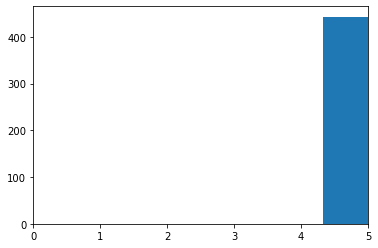

In [427]:
plt.hist(score_jm,bins=2)
plt.xlim(0,5)

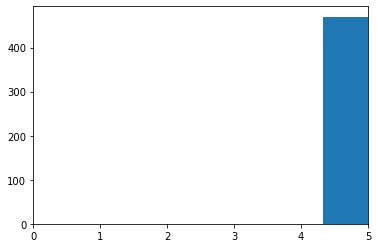

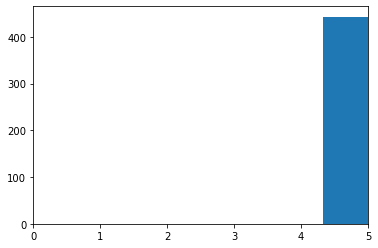

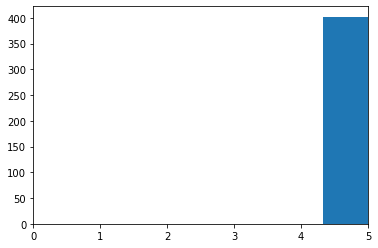

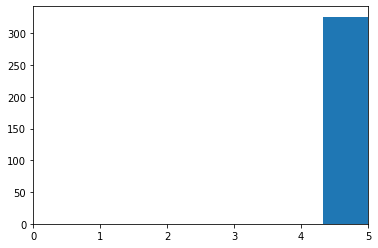

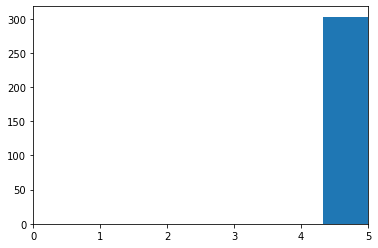

In [428]:
import matplotlib.pyplot as plt
bins=[1,2,3,4,5]
for i in range(5):
    plt.hist(score_jm,bins=bins[i])
    plt.xlim(0,5)
    plt.show()

In [305]:
#computing avg over all the score:
avg_score_jm= sum(score_jm)/len(score_jm)
avg_score_jm

7.043022015598781

In [ ]:
a=[]
for i in range(1,10):
    a.append(len(score)/10)

In [318]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))

In [321]:
split(score_jm,10)

<generator object split.<locals>.<genexpr> at 0x000001A9715FDED0>

# DP

In [303]:
mu =[0.001, 100, 500, 1000, 2000, 4000, 8000, 10000]
for i in mu:
    for que in range(len(query)):
        x, y = (len(doc), 2) 
        dp_s = [[0]*y]*x
        score_dp=[]
        for docs in range(len(doc)):
            dp_s[docs][0] = doc.iloc[docs,0]
            dp_s[docs][1] = print(DP_Score(query.iloc[que,1],doc.iloc[docs,1],i))
            score_dp=DP_Score(query.iloc[que,1],doc.iloc[docs,1],i)
        dp_s.sort(key=lambda z:z[1])

-3538.504495863205
-4118.010083505715
-886.1329177273852
-1949.6686788193413
-1660.793970417486
-2912.6813177522076
-6258.577206539861
-3922.707039468853
-7230.406713528863
-1266.6878377569394
-3098.299635253433
-3356.3837622848705
-3166.1439185935315
-11890.439499260003
-3729.704150812981
-3922.3015751940766
-3858.1326161489533
-2666.125170886653
-2188.9305144898563
-4575.474972740619
-1603.7070087453105
-3160.699917195804
-2974.032424191907
-5850.269962099168
-9960.094452830683
-1546.8768836622808
-3414.2916596423797
-3731.9906164458957
-5442.886404556476
-3348.9387230940315
-993.257163457216
-3796.007170297718
-7371.979276392955
-4577.819741678486
-3924.367672927933
-4120.448259617414
-3922.3015751940766
-2066.781919662868
-3411.8410034474277
-4639.674032523535
-1891.3513430860235
-6811.112858122486
-4116.428895509673
-8508.343415293915
-3793.7505342052605
-2066.781919662868
-5441.1534513030865
-2727.5203789682796
-9375.049903772247
-4116.092423844479
-3798.163730102574
-4248.334522

-2727.5203789682796
-3729.5500003712486
-5709.440986196341
-4639.268567970981
-1221.5021200960446
-1499.5775290847355
-3731.1639430512446
-4970.873427617486
-9375.049903772247
-5710.9724615875775
-5108.963002495934
-1833.560451124915
-2423.813907519047
-2364.2737975790083
-4182.742363437171
-2606.1940435151714
-7093.556835150506
-5240.03301036392
-5440.072635878709
-2484.2754716147388
-2129.7771668630094
-3223.0924297648694
-2727.702700191741
-4246.114450734657
-2912.1704934617715
-2126.0169130736417
-1949.668678819341
-8581.125167252987
-5576.390034989621
-4971.00695883154
-5037.685884986561
-7092.082788943533
-2973.695952526714
-6120.102174721456
-6880.949892293061
-2727.702700191741
-2666.8183168172154
-4376.855492158042
-3098.299635253433
-4443.5319401313545
-3098.522778304748
-5645.073392290575
-4838.026659261267
-2792.258805973263
-2912.1704934617715
-2545.19290396698
994.7167601734277
-2789.0029429898636
-3035.3831684794045
-3411.6868530056954
-2727.702700191741
-6329.7894050370

-5104.132288780334
-5105.623034652832
-6190.871333738486
-3478.066341583283
-3036.5871389504023
-1490.019277148027
-2974.032424191907
-1434.0003983892543
-2976.583178154268
-3036.076314659966
-3986.291734022943
-2304.1618235726796
-8221.80342991376
-3538.9099601379817
-1603.4193275061898
-5104.237649184881
-4441.84598151977
-5985.299223146276
-1387.892432561654
-3861.815008006797
-1377.6724136713842
-2137.426486836993
-1272.538485875919
-1783.9797949325432
-3986.514877324257
-1327.8201695567666
-2976.2265076388644
-1664.0268119054035
-1949.4455357680258
-1891.3513430860235
-2666.5951737659
-2669.7351025985304
-6672.098781546292
-3411.8410034474277
-4507.840506968059
-2424.373522235556
-3160.699917195804
-6396.679980109767
-2364.050654527693
-2605.6832192247352
-2727.9258432430565
-1433.7127171501336
-4376.45002760549
-1949.6686788193413
-3922.483896417538
-5372.561615190932
-5374.361180543791
-3859.821324236224
-2666.412852542439
-1833.2727698857943
-5575.233964788786
-5376.30857247770

-4248.205943404389
-5846.725631128191
-4444.225082311952
-3225.8097024126187
-2188.52505021508
-6260.965715146751
-4051.163789099376
-4573.479871417505
-4708.840570144223
-4117.914773416819
-1837.8094096288437
-1547.2823471037293
-6051.979167186995
-2544.633289250471
-6053.614758819953
-7583.991507354227
-2189.218195728977
-2545.19290396698
-13480.3676307241
-1894.7980815837054
-4054.156988764128
-5846.638619826958
-1266.6878377569394
-2126.0169130736417
-5846.725631128191
-5374.561851037233
-5510.81119431765
-5711.10599280163
-2851.003938740042
-4378.628389098028
-7938.3457465558195
-3986.291734022943
-4311.086773648757
-4574.676470155475
-4311.338087759578
-5575.128604384238
-2484.6809358895152
-3288.9234076591015
-5171.05827608615
-3796.3436419629115
-5106.31617683343
-5106.316176833429
-4117.540084626431
-3990.745653735356
-5712.792842783202
-2544.7874396922034
-4508.45482818603
-7090.495318870789
-6190.465869047044
-4441.951341924318
-3098.299635253433
-3539.941815251508
-4974.587

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'